In [55]:
import numpy as np
import matplotlib.pyplot as plt

### Minmax Normalization
#### 1. Why?
  * If features are **not** on a similar scale, the distance calculation will be **dominated** by the features with larger numerical ranges.
  * **Example:** Imagine we have two features: `age` (ranging from 20 to 60) and `income` (ranging from 30,000 to 150,000). When calculating the distance between two data points, the difference in `income` (which can be tens of thousands) will vastly outweigh the difference in `age` (which is at most 40).
  * The `income` feature would essentially dictate who the "nearest" neighbors are, almost ignoring the `age` feature, even if `age` is relevant for the classification task. This undermines the core idea of finding neighbors that are similar across *all* characteristics.

#### 2. How?
Essentially, this transformation linearly shifts and scales the data so that the smallest value in the feature becomes 0, the largest value becomes 1, and all other values fall proportionally in between.
$$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$


In [56]:
def minmaxnormalization(X):
  X = np.array(X, dtype=float)
  min_vals = X.min(axis=0)
  max_vals = X.max(axis=0)
  return (X - min_vals) / (max_vals - min_vals)

data = [
    [150, 7.0, 1, 'Apple'],
    [120, 6.5, 0, 'Banana'],
    [180, 7.5, 2, 'Orange'],
    [155, 7.2, 1, 'Apple'],
    [110, 6.0, 0, 'Banana'],
    [190, 7.8, 2, 'Orange'],
    [145, 7.1, 1, 'Apple'],
    [115, 6.3, 0, 'Banana']
]

fruit_mapping = {'Apple': 0, "Banana": 1, "Orange": 2}
data = [[*row[:3], fruit_mapping[row[3]]] for row in data]

In [57]:
X = np.array([row[:3] for row in data], dtype=float)
y = np.array([row[3] for row in data], dtype=int)
X = minmaxnormalization(X)

### Logic behind ```train_test_split```
  * Lets say we have 10 rows
  * Choose a random permuation of numbers in $[1,10]$
  * Choose first $7$ of the resulted permutations and assign it as ```train_indices``` and rest $3$ as ```test_indices```


In [58]:
def train_test_split(X,y):
  len = y.shape[0]
  n_train = int(0.7*len)
  indices = np.random.permutation(len) #random permutation
  train_indices = indices[:n_train]
  test_indices = indices[n_train:]

  X_train = X[train_indices]
  X_test = X[test_indices]
  y_train = y[train_indices]
  y_test = y[test_indices]

  return X_train, X_test, y_train, y_test


In [59]:
train_test_split(X,y)

(array([[0.0625    , 0.16666667, 0.        ],
        [0.875     , 0.83333333, 1.        ],
        [0.        , 0.        , 0.        ],
        [0.4375    , 0.61111111, 0.5       ],
        [1.        , 1.        , 1.        ]]),
 array([[0.5625    , 0.66666667, 0.5       ],
        [0.5       , 0.55555556, 0.5       ],
        [0.125     , 0.27777778, 0.        ]]),
 array([1, 2, 1, 0, 2]),
 array([0, 0, 1]))

### `predict_one(self, x)` – Predict the class of a single input using KNN

  1. Calculate the distance of the new point with each point in train data
  2. Get the index of smallest $k$ distances
  3. Get the corresponding class for that $k$ distances
  4. Choose the most occuring class as your prediction(most common class in neighbour)



In [60]:
def Euclidean_distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

class KNN :
  def __init__(self, k):
    self.k = k

  def fit(self, X,y):
    self.X_train = X
    self.y_train = y

  def predict_one(self, x):
    distances = []
    for point in self.X_train:
      distances.append(Euclidean_distance(point, x))
    k_indices = np.argsort(distances)[:self.k]
    k_labels = [self.y_train[i] for i in k_indices]

    labels, counts = np.unique(k_labels, return_counts=True)
    most_common = labels[np.argmax(counts)]
    return most_common

  def predict(self, X_test):
    return [self.predict_one(x) for x in X_test]

In [61]:
test_data = np.array([
    [118, 6.2, 0],  # Expected: Banana
    [160, 7.3, 1],  # Expected: Apple
    [185, 7.7, 2]   # Expected: Orange
])
test_data = minmaxnormalization(test_data)

knn_classifier = KNN(3)
knn_classifier.fit(X,y)
y_pred = np.array(knn_classifier.predict(test_data))
for i, pred in enumerate(y_pred):
  print(f"Test sample {i+1}: Predicted = {pred}")

Test sample 1: Predicted = 1
Test sample 2: Predicted = 0
Test sample 3: Predicted = 2


In [69]:
#Bonus: Simple accuracy checker
y_true = [1,0,2]
def accuracy(y_true, y_pred):
  return np.mean(np.array(y_true) == np.array(y_pred))

print('Accuracy: ',accuracy(y_true,y_pred))

Accuracy:  1.0


### Bonus Task: Visualize the decision boundaries in 2D using matplotlib

1. We have $3$ features but we have to visualize our decision tree in 2D.
2. I will use PCA to reduce its dimensionality

#### Implementation behind ```pca``` function

1. We will first center the data.
2. We will then form our covariance matrix
3. We will then find related eigenvectors(direction) and eigenvalue(strength in that direction)
4. We will then find direction with highest eigenvalues and project our data into that direction.

### Visualization of PCA

![pca.ppm](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAtYAAAKICAYAAABUlL1BAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAABmJLR0QA/wD/AP+gvaeTAACAAElEQVR42uy9d5hk513n+zmxQueqznlyTsqSZWVbWRpZNjZw8S6LycuSbC7c3QVslgs2mN2FNezCwmUvXFgMxgGQNSNpkjSanHOe6dzTOVQ86f5Rc85Ux+lQ1dVdej/Po0dSd3Wd9J5zvud3vu/3JzmO4yAQCAQCgUAgEAjmhSx2gUAgEAgEAoFAMH+EsBYIBAKBQCAQCDKAENYCgUAgEAgEAkEGEMJaIBAIBAKBQCDIAEJYCwQCgUAgEAgEGUAIa4FAIBAIBAKBIAMIYS0QCAQCgUAgEGQAIawFAoFAIBAIBIIMIIS1QCAQCAQCgUCQAYSwFggEAoFAIBAIMoAQ1gKBQCAQCAQCQQYQwlogEAgEAoFAIMgAQlgLBAKBQCAQCAQZQAhrgUAgEAgEAoEgAwhhLRAIBAKBQCAQZAAhrAUCgUAgEAgEggwghLVAIBAIBAKBQJABhLAWCAQCgUAgEAgygBDWAoFAIBAIBAJBBhDCWiAQCAQCgUAgyABCWAsEAoFAIBAIBBlACGuBQCAQCAQCgSADCGEtEAgEAoFAIBBkACGsBQKBQCAQCASCDCCEtUAgEAgEAoFAkAGEsBYIBAKBQCAQCDKAENYCgUAgEAgEAkEGEMJaIBAIBAKBQCDIAEJYCwQCgUAgEAgEGUAIa4FAIBAIBAKBIAMIYS0QCAQCgUAgEGQAIawFAoFAIBAIBIIMIIS1QCAQCAQCgUCQAYSwFggEAoFAIBAIMoAQ1gKBIKdYpsXQ0BCGYeA4jtghAoFAIFiySI64kwkEghyRTCZJJpOMjo4iyzKKoqCqKpqmef8IBAKBQLBUEMJaIBAsOLZtk0gksCwLgHg8jqqqOI6DZVk4joNt23R1dbFs2TI0TUNVVVRVRZIksQMFAoFAsChRxS4QCAQLiWEYJBIJHMdB0zRs2wZAkiQkSUKWUw41x3E4ffo0tbW1xONx73eqquLz+dBUDVmRhdAWCAQCwaJBCGuBQLBgJBIJDMNAlmVPQE+FJEkoioKu697PbNsmmUwSj8c9ke1+RlM1FFURO1kgEAgEOUMIa4FAkHUs0yJpJDFNc1Lf9HRVZ8dxvN/LsuwJbcdxcByHRCJBPB4HGGMZ0TVdCG2BQCAQLChCWAsEgqxiGAaGYWDb9pSTESeb6iFJ0rQpIa51JF1oW5ZFPB73xLgrxDVNExVtgUAgEGQdIawFAkFWcKvJpml6to2pyIRPWpKkMctIF9qxWMz7vaIoKY+2pnniXCAQCASCTCCEtUAgyDj3sn7MhnQryGwYL7QBTNPENE1isRiKooyJ9/P5fEJkCwQCgWBeCGEtEAgyiptNDcxLVGdD5E5V0Y5Go8iyjKZpKIqCpmnoun7PCZYCgUAgEKQjhLVAIMgIbmKHYRgZzZu2bTsrAnd8Rdu2bSzLwjAMzzriTobUNA1VUYVHWyAQCATTIoS1QCCYN5ZpkUgmpp2gOBWLxX4xPgLQcRxM0xwjtNM92u7Dg7CPCAQCgcBFCGuBQDBnHMfBMAySyeQ9JyjOZxm5wK1Yp6+HZVkkk0lisZi3vaqqeskjQmQLBALBRxshrAUCwZywTItINDJBgGYKV6TmSlhPtj6ukHbXy7WORCIRz5ud7tEWQlsgEAg+WoiZOQKBYNYYhkE0FuW73/1uVkS1y2IWpq7Q1nUdv9+PoiiebWR4eJi+vj4GBweJRqMYhrFoHhAEAoFAkD1ExVogEMyKeDyOaZpeA5Zs4nZXXAqM92jbtu3ZZACi0SiBQIDi4mKv8i0q2gKBQJBfCGEtEAhmxPhsalfwzjVn+l7IsnzP7ouLmfT265Ikcfz4ccrKyli2bJn3e03TxvwjEAgEgqWNENYCgeCeJJMpQQ13s6klScK27awJa5d8slCoqorP5/O2yTRNEokEMFZouxF/oqItEAgESwshrAUCwZSMb0s+3vqxEMIvH73J7n5zLSGu5SXdOuJOCtV13Yv5Ew1rBAKBYHEjhLVAIJiU9GzqyWL0XJtGJhq4fBQE43QPIW4e9niPdjKZJB6Pew817mRJXdORFVlUtAUCgWCRIYS1QCCYQCKRwDCMe2ZTZ9MD7cXt2R/NNI10jzbcFdqudUTTNO8zuqaLrpACgUCwCBDCWiAQeMylLXk2rRrC+jB2X7hCO9064gptNz/b9WiL1BGBQCBYeISwFggEQCqb2jCMGbclX6gGLrZj580+ztS+Gm8dcZvVJBIJT2i7vmxd11EURQhtgUAgWACEsBYIPuI4juNVqefSljybwnopx+0tJG6zmnRM08QwDOLxuPd7RVHw+Xyoiio82gKBQJAFhLAWCD7C2LbtpX7MNkfZFb3ZEmf5JqgXWsSmt1+HlNA2TZNYLOY9QLkVbV3Xhe1GIBAIMoAQ1gLBR5RkMulFu821OUm2K8puVrZg/qSLbNc6YprmmIq2mzqiKqqYDCkQCARzQAhrgeAjxr2yqefyffMlE5F9gpkz3jriOM6Yirb7e28ypLCOCAQCwYwQwlog+AjhZlNblpWRFtqZqihPJaqFx3phcJvRpONOZnWPT7pHO737pkAgEAjuIoS1QPARIT2bOhOi2iUTwnq6irUQ1rlh/BgxTZNkMkk0GvVSRtI92kJkCwQCgRDWAkHeM5ds6pmSiYqy4zjcuHGD6upqSkpKUBQF0zQz9v2LiaW8LemTIW3bpr29ncuXL/P4448DePnZrnVEeLQFAsFHESGsBYI8Jr0teSar1OnMVSzKsszAwAD79u1D13WuXr0KQCgUoq6ujsrKSuBuZrOoXC8eZFn2jovf7/f82clk0ntw0zQtNRHyjiAXHnqBQPBRQAhrgSAPmW829UyRZXlOgleSJK5evcrRo0fZsmULK1asQJZlhoeHaW9v58qVKxw7dgxFUbh06RLLly8nHA57DwdLUWTnq1XCcZwJk2DdyZBu6oyiKJ59xOfziWY1AoEgbxHCWiDIM7Jp/ZiM2YpcSZLYtWsXQ0NDvPrqqwQCAS9bORAIsHLlSlatWoWqquzYsYNgMMiFCxcYHh5GURTKy8tpamqiuroaTdMwTVNUs3PAdBnm4ydDuvF+rkfb9fm7Hm1N04TQFggEeYEQ1gJBHpGJbOrZIEkSjj0zUSvLMr09vex7fx+VlZW8/vrryLI86eRHVyg7jkNdXR3btm0jmUwyOjrK7du3uXTpEkeOHMHv91MeLqe6ppqKigqCwSCmaYrs6wVgpsfdHSeuJcRxHBzHwTCMCUI7XWwLoS0QCJYiQlgLBHlAprOpZ4okSdjOvUWsLMtcvHiRkydPcv/997N+/XoSicQ9K82SJHlCWVVVSktLCYVCbNy4kUQiQU9PD52dnZw7d45YLEZhYSHV1dVUVVVRVFSEz+fz9o+oamfn+M/lbyRJGjNG3bcsiUTCGy/pHm1FUYRHWyAQLAmEsBYIljjzaUueCe4lWB3H4b333mN4eJjXXnuNQCDgCai5fL8rwiRJorKyksrKSs8S0tPTw82bNzl8+DCJRIKioiLq6+upq62joLBgUUyCzJeJmLZjI0mZEbuyLKPr+oRj7HaFdP3Zmqbh032iWY1AIFi0CGEtECxhbNtm586dbNu2jZKSkgVf/nQiUZIk+nr72LV7F/V19TzzzDOzqhzbtj1j8eQ2MikvL6eiosL72eDgIK0trex7fx/JZJLCwkJqa2tpbGiktKwU27axLEsMpEVGutB2x4thGCQSCUYZRVGUu10h7whugUAgWAwIYS0QLEHcip6bpGGZuRGHUwlrTdU4cfIE58+f55FHHmHF8hUYppGx758O9/OqqlJRUUFVVRW2bRONRunv76ezs5P3P3gfy7IoKSmhqqpqQoZ2tirK+eT9TqWBZL9qnB7f5y7XTb2Jx+MAE4S2SB0RCAS5QghrgWCJkd6WvKCgAFmWsezcCet0sShJEslkkj179hCNRnn11VcpKCi4p6ieTgTNR4y6aRQAgUCA+vp6mpubARgaGqKzs5Pu7m4uX74MQEVFBbW1tYTDYfx+P4qiZNSfLZrdZGbMjfdom6ZJIpHwrCPpHm1N1YR1RCAQLBhCWAsES4jJ2pLnyrPrxq25y5Ykif7+ft59910a6hv4xHOfwDCNeQnj2aSOzHSdXdtIMBhkxYoVrFq1CkmSiEajtLa2cvXqVY4fP44sy1RWVtLU1ERFRYUnsgVjj89iYHxOuzvvwI1xTE8d8fl8YiKkQCDIGkJYCwRLgPQJiuNfc08VWbcQuMJaURSOHj3K5cuXeeKJJ6itrZ2T9WPi92dfALn7zufzsWrVKlauXAlANBqlq6uLixcvcujQITRNIxQK0dDQQE1NDT6fb1bRfvlWMV3MDxnjPdpuak48HmdkZGSMdUTXdNF+XSAQZAwhrAWCRY5hGBiGMWlbcsd2JtgxFhJJkohFY7z99g5M0+C1116joKAgo+szkzi/TJEuFoPBoNesxjAMhoaGPNvI8ePH8fl8VJRXUF1TTXl5OYFA4CMzGdJ9SFgKDwuudSRdaFuWRSKR8CIf0ydB+v1+cdERCARzRghrgWCRMj6beqq25JIk5UTMKXKq6nfi5Amam5t57NHH5m39GI8s5zaazt0WWZYpKysjHA6zefPmMRnaZ8+eJRaLUVBQQE1NDdXV1RQVFXndBPO1Wc10nRcXM26zmvTtsCyLWCzGyPAIN27eYMOGDV6jGlVRhUdbIBDMGCGsBYJFiGVaJI3kpNaP8ciysuDiTZIkjhw9Qn9/P1u2bGHt2rUZsX5MtpzFZDmYLENbUVL7v6enh1u3bnHw4EEv2q+uro7GxkYKCwvzbozmi988vSukbdt0dHSwYcMGYrEYsVhszO/dCZHCoy0QCKZCCGuBYJEx27bksrxwVVE39eOdd95BURSvMput5S+FZiru24KKigoqKiq8CZJDQ0O0tbaxb18qQ1vTNCzLIhKJeJnj2Yz2W6jxkE/YVmocK4oyoWtnPB732q+7QlvXdTRNE0JbIBB4CGEtECwS3GrobNqS2469YJMXNVXj5q2bfPjhh6xevZr77ruPnTt3Zk0Yut+7VIRn+npqmuZlaDuOQyQS4cSJE0QiEfbt24dlWZSWllJVVUVlZSWlpaUoioJlWUvGOrJUrSBTMZVvfCqPdjwe9yra6R5tVVHFZEiB4COMENYCwSLAtX5YljWll3oqZFleEI/1kaNHuHr1Kh//+MdpqG/AtFIPANkUvku5/Xd6hnYwGETTNMrLy9m4cSNDQ0N0dHR4qSOKohAOh6mrqyMUChEIBLx9KyL+Fo5Um3Zp2geG8R5t27YxTdN7yyTLspc6ouu6Z+USHm2B4KOBENYCQY5xs6mBWYtqyH7cnmEY7NixA0VRePPNN5EkCcM0PLGQCVHvCuh08ZFvFVFIWT8MwyAQCHgZ2oqiMDo6SltbG1euXGFoaAhFUaioqKCpqcnzcS82gZ2Px8e27Vlv0/i3S47jeMfZtY6kC213UqtAIMhPhLAWCHJEuvVDUZQ532yzVdVVFIXr169z8OBBNm7cyMaNGycsJxPLvld1MJ8myU02BmzbxufzsXLlSlauXInjOF6G9uXLVzh8+DC6rlNWVkZDQwPV1dX4/f5ZZWgLZkaqTfv8/NKuNST9Oy3LIhqNEolEPJHtpY6oqvBoCwR5hBDWAkEOSM+mnkuV2sUVApm2gkiSxMGDB2lpaeGZZ56htmbyhi+uXSFbAjhXUYK5YLoM7cHBwTEZ2n6/3/Nwh8NhgsHggmdou9XdfGvTnulqcnqqiLvfDMMgmUyOmQzpimwhtAWCpY0Q1gLBAuI4jpf6oSjKvES1+32KrGRMUMmyTCQSYdeuXei6j0996lPIsjxllF4+5zTnmvQM7VAoRHl5OVu2bCGZTNLb20tbaxtnzpwhFotRWFhITU0NNTU1FBYWenaDbHq089H7bds2spzdiYfjrSOTebTTE0cURRFCWyBYQghhLRAsEOltyWcSozdTpAzF7UmSxK1bt/jwww/ZsGEDW7ZswbKsaQVUtiuW+VYRne/4ccVXeXk5FRUVnr++r6+PWzdvceDAgUkztLMlsPPNK2xZFrK8sNs0lUc7XWi77dfdfwQCweJFCGuBYAGYri35fMmEHUNRFPbu3Ut3dzfPP/88oVBoRlVwIaxzR3rqSDgcJhwOT5mh7Va06+vrKS0tTb2FMIx5Lz8fJy+6QjdXFqR0j7Y79g3D8Nqvux7t9Ig/MRlSIFg8CGEtEGSR9LbkmbB+TMZ8UkEURWFwcJC9e/dSVFTEG2+84XUSnMm2ZdKGMhnpaSFCYE9/LFzcDO2amhqvIU1vTy9d3V3s378fy7IoKyujqqqKiooKSkpKUFV11hna+Xg83LG2WOxNrmBOF9ruw1MikfDO//RoP2EdEQhyixDWAkGWmE1b8vkgyzKmac7p765fv86hQ4fYsGED27ZtI5lMzkowSXJ2Ba8sycLDPQdc8QUQCARoaGygeVkzsiwzMjJCe3s7nZ2dXLhwAUmSKC8vp76+nnA4jN/v98bqvY6tLOWXgFsMFetpz7c7EZfjPdqJRIJEIuH9zvVo65qOrMiioi0QLCBCWAsEWSCRSHgVwGx7IhVF8VoxzxRJktizZw89PT28+OKLFBcXe57O2eBWy7OZCpIv5LrqblkWlmXh9/u9DG1JkohGo7S3t3PlyhWOHTuGLMtUVFTQ2NhIVVWV14p9sm3Jt+NjW/aS2yZZlr3263DXix+Px72HBE3T8Pl8oiukQLAACGEtEGQQ96ZmGMaYiK1s4cXt2TOrrsmyzODgILt27SIUCnnWj7kKvkyJxam+J9sV8Y/6WAXw+XysWLGCFStWeNaRnp4erly5ytGjR9E0jVAoRH19vZeh7R4TSc6zyYu2teRtFLIsj2m/7jgO/f39HD58mKeffnrMZEjXoy0QCDKHENYCQYawTItEMrEgVep0ZuqxVhSFSxcvcfzEcbZu3cqG9RswTGNewjXbr8yFt3phcPexLMsUFRVRUlLCmjVrSCQSDAwMeBnax44dIxAIUFVVRSQSwe/zoyipCmg+5I3nYxXetYe41yXLsjzrSPpkSF3XvXkgwjoiEMwdIawFggzgZlMDWa9Sj8edbDVl1ffO7/fu3UtfXx8vvPACpaWlU2ZTz3bZ2RYjji2E9ULjdoSUZZlwOEx5eTlbt24dk6E9PDxMb7KXvv4+6urqqKmpoaioyBPaS/GByLZtFFnJO1+/e32Q5Yl+a9M0icfjxONx7zO6ro9pvy6EtkAwc4SwFgjmgW3bXL16leHhYTZv3pyTG7IbtzcZkiQxPDzMzp07KS8vZ/v27TiOk7H1VBSFRDyRle0SaSCLB7exEaQytCsrKzl58iQA9fX1XoZ2PB6/m6Hd0EhRcZF3niyV81lW8i9RY7oH7/GWNdu2icfjY7pCupYRXddF4ohAcA+EsBYI5oibTT06Okp/f3/OqjquR3r88jVV49TpU5w5c4aHH36Y5cuXZ1zgLESOtWDx4R739Iq2O79gcHCQjvYOPtj/gZehXVVV5WVoK4oy7wztbGFZVl6OOfdYzeR8ncyjHY/HicViY9qza5qGpmpiMqRAMA4hrAWCWTK+LbnP50vduCQZi4X3mY73WEuShGVZvLfrPYaHh3nxxRcpKyvLigdWlmVsJ3vVSEmSsvr9uRg7+cT4tum6rlNVVUVdXZ03EfL27dt0d3fz4YcfYlkWoVCIqqoqysvLKS4uRtM0TNNcFPvGFaD5doxSHSXlOf2tJEljhLZlWZMKbV3XReqIQIAQ1gLBrHAzYy3L8iYo5jrzNn35kiQxODjIu+++S2VlJa+//roXs5atZWfzNb+wgixeHNtBUidWd8dnaDc1NbF8+XIURWF4eJiOjg46Ojo4f/68l6Hd0NBAeXk5uq7POEM7W+d3Plasbdv2vO/zPR/TbSOu0I7FYsRiMWRZ9iZA+nw+byKkePMk+CghhLVAMEOSyVSzF9u2x9xcPCtGjqLHXHGrqirHjh3j3LlzPPLIIyxbtizrgj+TwncyO8ti6oI37+OUZ81UZnPc0zO0ly9fzvLly5FlmXg87mVoHzlyBFmWKS8vp6mpiZqaGnRdX9Bqtm3bYzKh84XURNTMV5LTK9bumEivaKcLbXdCpBDZgnxHCGuB4B64bcmnyqZ220HnCrfz4o4dOxgdHeWVV16hqKhoQQSpIitZtcGIm/DiZj7Hx7ZtdF33MrRN0/QytK9evcaxY8fQNI1wOExtbS1VVVUEg8GsvoHJ24q1ZaMoctYfUKaqaLuTIV2R7Xm0NU1MhhTkHUJYCwTTkJ5NPVW+a7btENOhKIp306qsrOSZZ57xotIWgqy3NJdlYQVZpNhOZkSoO1bHZ2gnk0n6+/vp6uri8uXLHD9+3MvQrqyspKyszGu/nimh7dhOXo45t/HNQlurxgtt27YxTRPDMIhGo0iS5KWNuIJbCG3BUkcIa4FgCtwqtRs5NRWKkpvcW0mSOHPmDOfOnaO0tJQnnniCeDy+oOuwEB5rdzn50IAkn8hWfrn7YChJkpc4omkahmHQ09NDW2sbJ0+eJJFIUFBQQG1tLXV1dRQVFXl+3rmKR8vOv1QQ98EjEx7rTFwv0oWz4ziYpkkymfSOnTcR8k5VW7y1Eiw1hLAWCMbhTlA0TXNGHRRz0VDCcRzefvttDMPgscce48SJE1jmwgtPr0FMlvzl+eKxFlX3+e279Azt8vJyb9wNDAzQ0tLChx9+6AntmpoaGhsbKS0tnXVmu9sUJ9/I1OTFbJzf6dfYdKENqaLFeI+2QLDYEcJaIEjDzaaeTVtyRVUWrBWypmq0trXywQcfsHz5cu677z76+/pzJtyy/dpcVKsWL7mMpnPHXCgUIhwOs3XrVuLxOIODg3R2dPLhhx9iGIaXoV1bW0soFPIytKcas47joMj5FRfnVayXwHalC203xtEV2m7DGtebLSragsWKENYCAXerYjOxfoxnfJZvtpBlmeMnjnPx4kUeeeQRli9bjmEaWfc532vb7Qy0HJ/q5phPN818FAC53qb0887n81FdXU19fT22bTM6Okp3dzfd3d3cunXLy9Curq6mvLzca7+eXtW2bTtn6T7ZxLKsJZcv7VpD0h/eXH92IpHwfq9pmtdPQFEU4dEW5BwhrAUfedKtH1NNUJyOhajaJpNJ3nvvPSzLYvv27ei6jmEaC7L86UgJk+xaNfIlbg/yyxKyUG9pZrtO6Rnazc3NrFixAkVRGB0dpb29ndbWNs6ePetlaDc2NlJeXo7f7xdWkEXO+IKHbdu0tbVx/vx5nnrqKS/ez83Qnsv1XCCY9zgVu0DwUcbtoAjM2Pox4SRS1VTlzM68aJJlmfb2dt5//31WrlzJ/fffP6E6nssmKtletqg+CeaLG8+n6zrLli1j+fLlQGpycmdnJ1evXuPo0aOezWB4eNj7/GLpCDnfc2g21ralhKIoXmdIn8/npY6ke7TTo/3ycR8IFh9CWAs+kozPpp5PVSNbyRiaqnHg4AFu3rzJk08+SW1t7aTJGO7yc/EKeyGq9flS5c03i8FirFjPdL0BT2gvW7YM0zQZHR3lyJEjtLe3c/XqVS9Du6amhsrKSgoKCrKaoZ1NTNOksLAwr8afi23dbX4zmUfbMAySyWTKP68onsB2/1tUtAWZRghrwUeO9GzqTFQw3KqqnSFLhCzLRKNRduzdgSRJvPbaa/h8vilv6F4LaHvhBehCCF/bFokai5GlKqzHjq27GdolJSUoisLmzZsJhUL09fXR2dnJpUuXvAzt6upqKisrKS0t9TK0bdte9A9/+WpxATAtE01TJxyD8R5tt1lNIpEgHo97v3OFtq7pyIoshLZg3ghhLfhIkUgksCxrQlvy+ZB+4Z4vkiTR0dHBvn37WLlyJQ8/9DCGaUz73e4ErFyQ7Yr1Qni4BfMbr/mEO5ExPUNbVVVM06Svr4+WWy2cPHmSWCxGQUEBdXV11NfXU1hYmNHrQKaxbRtVyb/b/WwyuqfqCplIJLz2667QTm+/LoS2YLYIYS34SGDbtpf6MVlb8vngVYzneUNVFIX333+f9vZ2nnv2OcLlYW+C4kyWb+dAgMqSsIJ8FMnXjpjjq/DpkyFDoRChUMirUg8ODnoZ2vF4nGAwSE1NDU1NTV712/3bXOKJzyWWCjJTTNNEU2f/5nG80Ia7E9ndirbbCVLXdXRNz9t9KMgsQlgL8p70bOpszBL3rCD23Fo8y7JMJBJhz549+Hw+Xn/9dXw+34yFSy4rKrIiZ8QSoGma9z3pfnXReXFxk29xiDMZy+5nQqEQ5eXl2LZNLBabkKFdVFREZWUltbW1lJWVoarqtBna2SRfrSCZfmhwRbR7nF1PvRvv5xZl0j3aAsF4hLAW5C3zyaaeDekV69kKDUVRuHnzJgcOHGDdunXct+2+e1o/xuNWD3Nxw55vRVmSJAzD4MMPPyQajVJTU0NVVRVFRUXoup53lVGxLYt7e2YjQF3hBeD3+6murqahoQHbtolEInR1ddHV1cXNmzexbZtQKERNTQ0V5RUEC4JemtBCxElaluUtL99wty3TTGUdicVixONxAE9o67qOqqjCoy1IjQuxCwT5yGzbks8H90JqWdasqkKSJPHh/g9pbWvlmWeeobKyckbWj8XEfG0wIyMj7Nixg4qKCtauXUtrays3btzAMAxKSkooKS4RPsclcPzzhfm+fXGtH36/n+bmZpYvX46iKEQiEdra2mhpaeX06dPIskw4HKa5uZlwOIzP55vXeXQv8rViLcsylmkRCAQWZKyPtxGapkksFvM82uPbr4vr1kcTIawFeUcymcQ0zQXNbp1NZVWSJKLRKO+88w6FhYV86lOfmldknztxJxfVqLnerBVF4fz585w4cYJHH32UhoYGYrEYNTU1XhW7t7eXa9euMTo6yj/8wz8QCoVoaGigrq6OQCDgTUIV5A5Zyi+x5grrTJ1Ltm1j2za6rrN8+XJWrFgBQDwep6uriytXrnLkyBFPaDc2NlJTU4PP58tYhrZbFc+HBjGTYZhG1t5G3ot0oZ1e0Xbbr6dbR9w3cIL8RwhrQd7gWj+SyaRXOVgIZEme4A2eCl3XuXjxIkePHmXLli2sX79+3t7hXFd053Lz37t3L729vbz00kuUlpaSSCTGfJ+qqtTU1KCqKqdOneJjH/sYnZ2dtLW1cebMGS9juLa2loqKCoLBILZtL2ofdl5Wd/Mom9u1UymyktVlQKr9enqG9sjICL29vdy4cYMTJ06MydCuqKigoKBgXuPbcZy89VhnLPHkzu5xYg6ObSP5ZSRVAmvm65IutN2Hqng8TiwW8zK20xvWCKGdnwhhLcgL3AuY67dbSBEjyZI3iWbKz9y5Aezbu4+u7i6eeeYZqqqqMiYE3e9faPHmRv3NJENblmWGh4fZs2cPRUVFvPHGG96xm2y90/2nRUVFBAIB1qxZg2EY9PX10dHRwYULFzh27BjBYJDa2lqqq6s9f7b73YIsjPk8TWtZyG0an6FdVlbGunXrSCaT3vgen6FdU1NDUVERPp/POwYzWedMxosuNizLQtPn+WbSgcSVOLHzEawBE8dyUAoU9OV+AuuCyIUKzHJouPF96WMrvSukax1J7wopbG/5gRDWgiVPLqwf45kutcK1fuzcuZPCwkLeeOONMROf5st8Jk9mYtkzubHLskxbWxvvv/8+mzdvZvOmzTPyk6dbbNw3EpCKPguHw2zbtg3TNL1q38GDB0kmkxQXF9PU1ERtba3nv1wMQjDfxGi+iQDbtpEVOWfLdsd3OBwmHA6jaRqmadLf38+tm7c4evSoF+1XV1dHQ0MDRUVF056HbgObvG0QY5rzemhwDIeRXYNEL0RQC1XUKg1JkbCGTIb3DZK8FqfoqVLUam3W4nr8uTL+/uQmVrnXuvTJkKIr5NJFCGvBksUVWt/61rd49tlnKSkpydm6TGUF0VSNc+fPceLECR544AFWrlyZcXHl5VjnYILSTJanKAr7P9hPa1srL7zwAqWlpRmZpJmeMew283B/1t/fz61bt7hw4QKWZVFaWkZDQz319fUUFBR4D2KCuWPbS7/z4vjxtNgefNzxXVZWRigUAlIV2qGhIVpbW70M7YKCAqqrq2lsbKSsrAxZlsdkaOfibdbCjcN5+McVGN07ROTMKMFNBWOsTWq5hlqpkbyVYHjPAKWvhZEDmbUJpQttt9iSTCaJRCKendHn84mukEsMIawFS5L0J33IbSXQfX1nWxPzl3ft3sXAwADPP/884XA4ax7g+Ux+nO+2T7VcSZKIxWLs3r0bXdd54403vLzq2WzXTD/vfk7TNKqrq6mtrcWyLEZGRrxX6+fPn0dVVS/6rLKyct7+VUF+4J6zi1W8uONblmUvQ3vLli3EYjEGBgbo6uziwIEDGIZBcXEJ1dVVVFZWEg6HAfLSCuKK0bkKa6MtQfRihOCGgsnnC9igN/mIno4QPR6h8IniGXuu5zL+3Ip1+kPeqVOnUBTFS5jRdd37nPBoL06EsBYsKdKzqQFvAki6qM3FOsmyjGmZQOrGNzg4yO7duyktLeW1114DyJpwc4V9Lh8uxnd9lGWZzs5O9u3bx6pVq3jooYdIJpNzXsfZip10q01RURHFxcWsXr3aq2Z3dHRw+fJlTpw4QSAQoKamhurqaoqLi8dEn4muj9Pt4/yqgi6l4z0+Q7umpob6+npkWWZkZISuri46Ozu5du2a9yarpaXFy9D25kbkwfies39cgWRrEpIg+aafpOhvDpBsiePEipD07I9595quKArJZJLCwkKvwZB779N1ne9+97t0dHTwq7/6q+KCtIgQwlqwZHAch3g87nnqxnTls3NbbXQ91rIsc/nSZY4dP8a2bdtYu3Zt1ivJbipJrhrETLYvTp06xcWLF3n66aepqqryvKNz+f5MRY6561BWVkZZWRmbN2/GcRz6+vq4eeMmR44cIZFIUFRURENDA/X19QSDQSGuZ3n8l/o1Zqluk9sl0M3QXrZsGbIse9GebqKOJEmUl5fT2NhIRUXFmE6DSw03eWMuwlpSJMx+AyWgTF+FtkEukDH7DZy4jaQvbGxhMplMWUFkeYx1xO/388EHH9DW1iaE9SJDCGvBkmC6CYqLod21oiiYpsm7777LyMgIr7zyCoWFhQtmz7hXKkm2cF9Fpk8wfOutt7Btm+3bt6Pr+rzWK5six12vUChEKBTyZu0PDg5y69Yt9uzZc+e1ejH19fXeRDFXwMxlW0TnxcVNPqUyuFVtVzh//OMf94oT3d3dXL9+nWPHjnnWkoaGBqqrqwkGg0tmDoJbdZ/rMZNkaUaJRjiAdOefBcY0TVRtYtdMTdOIRCI5nVskmBwhrAWLmnu1JXdtGLm8CciyjK7rHD58mLraOp5++ukFb8U90xztbCzXzf7t6upi3759LF++nAceeMBLI5jNsZ7q+7M9xlxUVaWiooKqqips22Z0ZJTevl46Ozu5dOkSiqKk/NnVNVRUVlBUVAQwxu//USLfrCD5OKE1XXw6joPf72fZsmUsX74cwzAYHh6mp6eH69dvcPLkSXRdJxwOU11dnZEM7YU4ZnPyWFugVmjELkZTSsic4nMyqcp2kYIUWHhPczKZ9B6OxqyWLDM6Okp9ff1H8tqzmBHCWrBomUk2tetDy9VF37U9dHZ2snLlSh5+6GEM01hYUS1LOX24UBSFc+fPcfLkSR555BFWLF+RsdbsuajypvtXCwoLKCwqZOXKldi2TX9/P+3t7Vy9dpWTp07i9/u9iZLFxcVeG+OPgj97Kdsm7jXm8gnLsiZsU3qGdmlpKaFQiA0bNngdTzs6Orh48aKXoV1TU+NlaC+mMe6uw1wm8TmWg9bkQzmhYA/ayMUyTHYJtSDZlqTomZJ7erGzdfymenAYGRnxJqcKFg9CWAsWJbPJplZV1bt5LPSFfseOnSQSccLhMMVFxRkTlLPBsXNbtbcsi0uXLvGpT30KTdNysg+yun/TYv1KSkooKSlh48aNAAwMDHDrVipfOBaLUVBQQH19PU1NTRQWFua9wM7Xbn75Nn7vtV2TZWgrioJt294YP3z4sBftV1tbS2NjI8XFxWOWsdCkPyDM5fqnVWkEtxYyvHcQ//IAcuFEcR27FMW/JkBwU+GCi2r3IV9TJ78HCmG9OBHCWrCocByHRCKBYRgzbkvu3gAWCkVR6O7uZu/evTQ0NPDoo8/z/vvv50xQup0fTdNcuGVKEkNDQ+zatQuAl19+OSv2l8XqS3bHW0lJCVu2bGHz5s2YppnKF25pZd++fSSTSYqKirxGHrm2LGXjXM0nEZqvueZzzbB239qUlpZSVlbGli1bME2T4eFh2tvbOXDggNesprq6moaGBkKhUCohyTQX5Lyd95tKA4L3FeJYDtHTo1g3LNRiFUmXMIdMsMG/IkDR0yWp9uY5OMcsy0JRlUn3ZyQSoby8PC/H7VJGCGvBosEyLRLJhDfLe6Y3g/HNELKJpmqcOHmCCxcu8NBDD7FyxUpsx0aRlZx6EF0BuhBCVFM1Lly4wNFjR3n00Uc5ceJE1pYlS4u/Iurub1VVKS8vp7KyEsdxGB0dpa+3j86uu7FnwWCQmzdvUllZSWFh4YKKEMFHk/Sq7lyvUeljPBwOU1FRwZYtW4hGo/T399Pd1c3BgwfHZGhXVVVRWlrqvVHMxoOL+9Aw3we8wseK0Vf4iZ+NYLQnQYLgxgL8zQHUOh1Jk+bVdXE+1xbTNKe0goyOjoqK9SJECGvBosCtUk82QXE6HMfxKtbZFJWSJGEYBrt27SIajfLKK69QUFCAYaYq64qaW2G9kFX7vfv2cvv2bV5++WVCZSGOHTuWta6PbtOGpZgvHAwGCTYGWb5iObZtc/z4cfr7+7l58yanT5/G5/NRXV1NXV3dGH/2Uqmc5lvFOr0BSz4xo9SLOY5xv99PbW2t90ZmdHSUzs5OOjs7uXLlCo7jEA6Hqa+rJ1weJhAITEgSmg9uxOm8kqEkSLbEiZ6KpCL1DAdJlXCSDujkTFS7+2i68ywWi4mK9SJECGtBTkm3fsymSj1mECvqpBN0MoUsy/T29PLue+/S1NjEc8895+Wnpn8ml8I628uXJIlEIsFbb71FaWkpn/n0ZxbE+rKUhOZUuG9TFEWhtKSUhx5+CNu2vVi/Y8eOEY1GCQaD1NbW0tTUlHPv6myOj2BxY9lz70w442XciaD0+XxehraqqkSjUTo6Orhx8yYnT50EUh7u5uZmKisr0XV9Xue3e82b8ziUIXJkhOiREWzHwdfgR9ZlbMMmcS1G7GqUgvuKKHy0ePKJjVnGFdZTHb9IJOK1uhcsHoSwFuQMt4vUTCYoTjuINTVr/mJd1zl48CBXr17liSeeoKamZsKNwJ2VnsvItWwKa03VuHrtKocOHeKBBx5g5cqVnqi2HTvr3uF8qyC61o/i4mI2bdrEpk2bvNiz9vZ2PvzwQxKJBIWFhdTU1NDY0EhpWemYvxVknplM8luKzNVjPd99aRgGmqbR3NxMc3Ozl/J0+/Ztbty4MSZDu76unpramllnaM/rTZkM8YsxRg8N46vzj5m4KOsyvlUBrIjF6MFhlEKFwMaCBa9cu+f7ZPNXLNMiFot5kZ+CxYMQ1oIF517Z1LMlG3F7siyTSCR45513sSyTV1991ctznfREUlXisXjO9mm2xK0sy3x44ENaWlp47tnnKK8oH1upz5AHeqqbYz5UrKc7D9LHT7p3NRKJ0NfXl2oL//4+INUxsrq62vNnu02JciW08zVuL9/IhbCebJxLkkQgEBiToT00NERPTw83bt7k1OlT6LpORXkFVdVVhMNhgsGgtw2TjXPTNOc+adqE6IkRlIAyaRoINiiFCnqVTuxMBP/qYMoWskjOsVg8BiCE9SJECGvBgmLbNolEYkJb8vmgaRrJZBJZkrEykIckyzJdXV3s3buXpqYmHn300Wkn37gVhVy1Vc9G3J5r/XjnnXfQdR+f+tSnphW52RK/7vjIB3F9r7Ge7l0NBAI0NDSwbNkyAIaGhmhvb+fWrVucOXMGTdOorqqmtq6WsrIyNE3zBMZCCe18q5zn65uAxfYAlD6ZsqysjFAoxMaNGzEMg76+Ptrb2zl//rxnj3IztIuLi9E0bUyGtuuxngtGVwKjxyCwJji1zcMCpUwldj6K1Wug1uoLWrWe7qEoHk8Vcvx+f16O26WMENaCBWM22dSzGsRq5qwgiqJw+PBhrl27xpNPPkl1dfWMquELMYFy2uXLSsb2gSzLdHd3s3v3btavX8+2rdum9VNn4qY91Xd8lCui6fnZwWCQVatWsXr1aiRJYnR0lFu3bnH69GlGR0fx+/3U1dXR2NhIWVkZkN2HEfe4iIr14sc0zUV9nNw3mAChUIhQKMSWLVsA6O/vp6WlhSNHjhCLxQgGg158ZUlJybysIPaQnWpRrgHTuPjcmD1j0ECr9+FYC3d9d4/dZPeVaDQqBvciRQhrQdZJt37MNJt6VoPYbRAjz/3mIUkSyWSSt956C0VR2L59Oz6fb8YiOddxe7KSGY+1ruscOHCA69eve9aPaUX1nQztxdjuOF/PJcdxCAaDrF+/nnXr1mGaJiMjI3R0dHD48GFisRiFhYVUVVVRX1/vZQtncg5APvqR3cpuPjaIWWoZ6u66lpWVeRna6fMQDh48SDwex+/3o6oqfX19lJaWzsoe5SiAA5Ij4UxXhrZT/0iKnJP9MFWxZmRkJKMFKkHmEMJakFXcbOrp2pLPexDfEdZzRVM1brXcYv/+/axevZpt27ZN6embClnJ7Y1rvjdO98Fi586dOI7Da6+9ht/vv+d3ulFe2Yw5/Ci0B58L6dnCoVCI8vJyNm3aRDQa9fzZBw8exDRNQqEQVVVVVFRUUFxc7L3lmc9+zVcrSL55x+djl1gsx8Qd5+MztC9fvuyN82QySVlZGVVVVZSXl1NaWoqmaVPa+LRyDRSwY/a03mnHdJB8ElqFlvHowpkcu6kKUcPDw54HXbC4EMJakDWyZf0Yj3vxnCuHDh/i2rVrPP7449TX18/6uzyPtbU0hbUsy/T19fHOO++wbNkyHnv0MQzTmJFwcivW+TrBMNPYTmbsQo7j0DaY5GpvFAmJNZVBakp0gDG2EFmWGRkZoa2tjba2ds6dO4eqqlRWVtLQ0EBpaamXn+1+72zIx4p1vjGZFWQkYXK9J46mSqyrCi6Z7R6foV1QUEBJSQlPPfUUw8PDdHR00NHRwcWLFwG8DO3yinL8fv+YDG21SsO/LED8WozAuuDk7cpVMG4m8S3zo5SpOUkFmeqhaGRkBJ/Pl3fjNR8QwlqQccZnU2fa+jEe9/XfbG8OhmGwY8cOVFXlzTffnFdkXepvF66leDpu5N1cPNaaqnHy1EnOnj3LE088QV1d3azzqbPdmEekT4zlVn+MH//bKxxuHb67n4Bv/9hGHltWzMn2EWRJ4v6GIiRJwu/3s3LlSlatWoUkSUSjUVpbWzlz5gyjo6P4fD6qKqtoXtbsdXHLpwel9sEEV3tjrK0MUlWs33O8ZWOsJU17wnFZKNwc5PRz9Ld3tPDfP+wA4O2f3MQjy0qW5LF1k6USiQS6rnsZ2rIsE4/H6ersoqW1hRMnU91hy8vLaWxspLq6Gp/io/CBYsxeg8SVGL5VgbHiWoXE1TiSKlH4UHHqJFtgYT3d24bBwUEhrBcpQlgLMkqmsqlng3vTmKm403WdK1eucOjQITZu3MiGDRvmLQxVVc3t5EVF8SYAzRRZlnl7x9vE43G2b98+I+vHeFwhki0hJstyzvZppsmUmPqpb44V1ZC63w/HTX70/7vIv1zoB+AvfnANn9pScfczd84Rv9/PmjVrWL16NYZhMDo6SkdHx5hGNVVVVTQ0NBAOh1EUBcOY+AbDcZxF33L+bEeEx/8wJapWVwQ4/Mv3T/nZbM4TmO64ZJvJxJmddiyX8iOUZU1sfuNWtTVNo7GpkcamRmzbJhaLcfv2bW7dusWJEydQVZWycBkVa8spvV6EcTGJIzuggZWwcEwHX7WPwseLUSu1BRfVkiRhGiaaNvnD4NDQkEgEWaQIYS3ICJnOpp7VIJ6Fx1qSJPbv309raytPPfUUNTU1Gbmh5lr8zabarigKfX197Nq1i7raOp599lnvGM552zPgPRRV6XtztiPCgZspUV3iU/jGZ1ZRXayz79oQa6uCXO29m6V+e2TqNw/ug5CqqpSWlhIOh9myZQujo6OeP/vQoUMYhuHlZ7v+7PQH5n8800/UGmJddZAnVpYuuv11peduckL38L0fPLM1Bmd6XLKBm5yRb554d9L0dPea9Em2wWCQ5cuXs2rVKpLJJIODg3R3d9Pe28kl/RJaQKPULKZMK6O0voySlSX4mgI4PmdBk0DSMS0TVVUmPXZDQ0OiYr1IEcJaMG9s2/ZEdbYmKE47iFX1njcNSZKIxWK88847+Hw+tm/fntFuhbm8cXmduWYgbmVZ5sqVKxw5coT777ufNWvXZGQfzDfDW0xOnBnXemPef//Q/ZW8srEcgAcaUy3QP7m2jCu9USoLNe5rKJj58UtrSV1bW0tDQwOKojA6Okp7e7uXLSzLMpWVlSxfvhzTdvi5794CYFtdIbt/buui218PN5cQCqiMJGyeXx/K2Ric63HJBEt58uI9t8200PSZvxm1bdt7s+hmaG9SN2GZFn2DfbS2t3Lzdiux2GX8N/zUxGqoq6ujqKhozAPlQl2v3H4PkyEq1osXIawF8yIX1o8Jg/iODWMqYakoCtevX+fgwYNs2rSJjRs3Zty64OZY5wpZljHv4fFWFIX33nuPwcFBXnvtNQKBwLxFtSvq58u9cqyF8E7RmVZ1XVk5MRHgt15exldeap73w60rtHVd9zrluQ+n7e3tnD59eswxcec4ZPJhNRPUluhc/41HZuTTz9RYnoxMHZe5nFfzavu9yDEtE7/in/P1IT0rvqykjLKSMuSNqSLJ4OAgLS0tXoRlMBiktraWxsZGSktLsx4zKklSqi28qk36u+HhYSGsFylCWAvmhOM49Pb2cuXKFbZt27ag1o/xTJeIoSgK+/bto7u7m+eff55QKJSd1t9SbuP2FHlqYS/LMsPDw+zevZuysjJee+21CZOZ5kM2bzD5mCs8H+Lm3WNcoCtTnJsAE4Wk4zjYDih38t5HEyZXe+L4NJnVFQHv5y69o0laB5IEfRLLwwE0Rcbn87Fy5UrWrVvHt7/7Pe+zsViU7373uwSDQSorK6mrq6OiogJVVSf1Z7tYtjNmuYZlc7M/TtxwWFuVWuZ016CZbo/tgCJNvnxZGtvwpmUgQTRpsbI8gKrMbOzFDZtrvTF8qkRDmR+fKs/4uMx3P7gMx006hpJEEiblhRqNZf67dgllCdzq03fLDC9N97KCzAX3OlpaWkpZWRmbN28mmUwyNDTkRfvF43EKCwu9sR4Oh+851udy7TNNc8qK/NDQEIFAQFwUFyFCWAtmjduWPBqNcvPmTR588MHcNke5U41JtyMoisLg4CB79+6lqKiI7du3Z7WqnMsca8dxply+pmpcuXqFw4cPs3nzZjZs2IBlWRmtAC+Ev/yjXrH++W9d4VunehlN3h3jv/CPV/nid64B8PkHK/m/X13Bb++8xe/takWVYdfPbmVzXSGQEp0rf+swcdPmyy80ESrQ+LV/uuF93yPNxbz9U5sxLYc/P9jB13e1cTty1wscUGU+vbWC33t9Bdf7IrzwJ6dJGHctDddHZH7maMWdCZIjfLb5FM9WRyktLfX82SUlJWNyhb/y9k3+YE8blQUa5/6vB/mD3a38j/2d9MdSb178qsz9DYX8wRsrWFM51j4x0+0ZTZis+q3DxEybV9eH+avPr/O+47d23OLru1sJajItv/kof/hBF391pIDbe46ktlmTeXplKd/49CrKCiYXN39/4jZfe6+Va30x3BdmAVXmtU1hfv35ZupKUx7YqY4LMK/9EDds/uJgF39zrItzXdExerRQV/jZj9fxbMjCpy7ih1MF7FELa9DEitkoPhmlREUuVqadWekWVMZPXszkNce97miaRkVFBVVVVWzdupVoNEpPTw9dXV0cOXJkTIZ2ela84zjzikE1DIOCgoJJfzc8PExxcfFH+rq4WBHCWjArksmklz7hTpzItehxL7Duesiy7Fk/Nm7cyNYtW2ecyzxXFsvkxfHrsP/D/bS0tPCJT3yCcDiclQcgaQGq9R/1yL3bo8YYUQ1jq9ddwykRPHRHjJk2Yz6fNB3v839xqJtbA/Ex35UwUr/7rZ23+K972yYsP2ba/NXRbn7o/kosB4YTY9fFdsYur2rZap5/ooquzi5a21q9XGE37iwcDjN65ztuRwxe/bOzHLw5PGH79t8Y5sU/OcN3vrBxjBid6fYkTYfYnc8NxsdapUbu/H/UsPmRv77A9y/0k142jRk2b13o57k/Ps2Hv7htQhX6p755if99vGfSffV3J3o4cGOY07/64LTHBZjXfvjC317in8/3TTpmRpMWX32vhcP1Cl95snBxPpw6ED0ySuxCBHPATE0SVEAr0fAtD1DwUNG0zVtM05rUKpGta5B7/fT5fNTX19PY2IiqqkQiEW8ugjvWQ6EQjY2NVFRUoOv6mAztmWKaJrquT3q9HxkZob6+/iN7TVzMCGEtmPFFJZFIYJomiqJ4fsrFcLF2Kxa2baOqKrt27aK3t5eXXnqJoqKiWecyz4Vc74v0V9mub/D73/8+gUCQN998M8uReNn77nwU03PZpp/9eB0PNhax//oQ710ZBGD7xnI216WqWR9bNvPKlStCi30KP3h/JS0DCfyqzEDE4A/viOpCXeHr21dwf0MhHUNJ/vb4bf7+5G10RWJtdQH/6eXlnD53gW/eTD1c1xRp/Phjtd4yXtkQQtM0GhobaGxqRJIk4vE4nZ2d3uTZmzcKgJRH1BWTz64qZfvmci7fjvGXh7oYSVr0x0z+w1s3+N6Pb5rV9syG79+JwltbavNDj67gel+MvzzcBcC1vhh/d/w2n3+o2vv8P5/tHSOqf/C+Sp5aUcZwwuBvj/VwvH2ElsEEtu0gyzM/3rPdDy0DCQDWVAT54Qeq2FybGg//cr6P/3mgEwfY3WZxYxA2LboTAYZ3DRA5OYp/mZ9AddB7rrEjNiMfDmH2GxR/sgzZN/nxtCwTRVVytgnuxH1N02hubqa5udnL1e7u7vai/eCO0G5opKa2hkAgcM/Op66NZzphXVKyNPPH8x0hrAX3JL0tefoExcUirF2hMjg4yPvvv084HOaNN97IqI/4XuR6cpDbIEbTNK5du8bBgwfZsGFDRjK6Z7L/57uMmUws+yhXrB9fXsLjy0uQJckT1i+uC/PZ++eWh1xRoPH2T29iRfndCZAfXB/yrAQ/eH8ln72vEoCVFakovf/8xkr8Wmqc/+IzTXx75JQnrKuLffzS0w1THjvHccY08DBNk13/cBG6+r3P/auVBj96n0l9g8qPPLiMT6wrZ/ufncJ2YN+1IS7fjrK6Mjjj7ZktP/9YmI8H2/nEU/U4jkNJQPWq929f6PeEtW07/Me3bnp/9xvPN/GLadv+44/V8mcfdnDo1vCsRLXL//3ycn7m43cfUp5eVcqn/59zk+6HX3m2Hgd4ZUN4zPnx1KpSBqIG/3CqF4CrQ4tnQmnqhIfIkRGipyME1xekqtJpz+ZyUKZgayHRcxHUIxqFTxeDMfGatxgnZroT+RsbG2lsbMSyLKKRKD29PbS2tXLq9CkURaGsrIyamhpqamooLCz0JgynY5rWpKEAbgMcIawXJ0JYC6bFtX7IsjzhBJ9JzN2CDOI73R3fe++9VOrHho1Zt36MJ9cPGe7yjxw5wpUrV3j88cdpbGhckGp9Nqvh7puRfEk2WBQPosCffm71BBFalDYZcu/VQXpHk5QX3q2WuaLaZS7H3BXZsiyPyeD94tN1fGFLgK7OLk6ePEk8HqeoqIjNlX5OdqfG8IFbI6ytLpyw3Km2ZzZ88ekGfmJbgLNnO72f/ZuHqzxh7VptADqGk9zoT1XJy4MaP/Pxugnf9+OP1Y6p4M+UX3m2YYyoBnhmdRkPNRZx8NYIAPtvDHnC2o1bnIxnVoc8Yd0TW2TnQdIhfjmKr843QVSnBlfqX74mH7HzEQKbgyjF6qTjKZcT56fDHaeSJFFQWEBRcRGrVq3CMAwGBgbo6uri5s2bnDlzBp/PR2VlJVVVVZSVlREIBO50FDYmFdaKnGoIVlhYuOSvifmIENaCSXEch3g87nW2mqxauBiEjuM4vPPOO8TjcZ579jnC5eEFEZOLbV/IsuxlDm/fvj01Q32B9kMmhfVklel8aq+9GHi4uZinV5VN+Pna6iDlQY3eqMHlnhiP/MEJfubjtfzIA1VUFOlZHfPPrA5RXV1CbW0tqqp6tpEtN29ysjv1mQOnr/BcrUl5eTkg33N7Zrf8Umw7Nmab6kv9yFLKP94buRtzeD0tS/zZNaWTJoDMlaemaLLz3JoyT1h3DE3e6KZv1KBzOEnXSJJo0hrTHMecy/PcHFI6Zvq9Vr+J0W0QWB+cdoKiWqqRbE+S7EwSmERYZ3PyYqZxM7QBL0N78+bNWJZFf38/LS0tnDlzhlgsRiAQoKGhAdM0ve6z6ddIWUlNbCwqKsrKuhqGwde//nX+/M//nGvXrhEOh/niF7/Il774JWQlP6MbM4kQ1oIJJJNJTNP0PMtT4Z7suRA+siwzNDTEzp07aWhoQNd1AsFAziuCC718SZLo6elh//79BAIBXn755QVdB8dOVR9tK3tjIF+6xi0WK4s2hT3Bp8r8yWdX8fm/ukjMtOmNGnxlxy1+990WPr2lgt94oZmqYt0757Nx3rueVVmWqaur4/51Cv/rwlUA9GARN27c4NixY0RMGSj1tsdN/JnPOHH/1v23IksU6grDCYv0iPxrfXeFdXXxwnS+q0x7cxBJjJ2E+VdHuvizD7s43TmambEnAxaYHUnMYQtJk1ArVZSQOsGOMbcTAayohWM7SPewyjikJjM6EXvK8bJUhPVk483N0C4tLfWysR3HYXh4mJaWFizLYt++ffj9fmpraykpLmH1mtVIkkQikaC0tDQr63by5Em+9rWv8bWvfY2nn36a/fv384UvfIHdu3fz9ttvL8n9vZAIYS0Yc6K7HRQVRbnnKza3kr3Q/ldd1zl16hRnzpzhoYceYu3atfzd3/0dpmnmbN/lomKtqRrHTxznwoULrF+/nps3b+ZEgEqShO1kd/KiaBCzMHxiTYj3f34rX9vVyrdP9WHYNknL4W+O32bHxX52/dstNIUWLjs3Ztz1nAYKinjiiW2Ypknr7UE4fB6Avr4+3n77bcrD5dTW1VJZWYnP55v19SBlUVHGzBmY7KoWTd4d67K08PshLQyG39/Vwn/a2TJmfcqDGqVBle7hJEN3EkdmfH2SIXY6Qux0BKPHwFEcJFtC1iX8a4MU3F+EXDJ9DN69dzTIAQlJvve9Q0ICCyT/5J+xLAtFXprCeqoxCFBSUsL9999PW1sbzz33HNFolJGRET7/rz7PiRMnWL16NV1dXbS2tmZlPTZt2kRfX593bFasWEF3dzdf+cpXxEVyBghhLQDuZlNPZ/0Yz0I373A7Ue3Zs4eRkRFeeOEFSktLvRa1ubQMLKQAdPfD3r17iUQivPzyyySTSa5fv56zbc/mvs+nSYtL4QFhZUWQP/3sGn77pSR/fqiTP9zbTtSw6YuafOXtW/z5D61dsHUZiN0Vx3UlPs9rn/4KPBwOs2VLFV1dXd6r9KKiImpra9EKQzMeRylhfe+xVl9yt0rdOYUtI5v7ob7U7y3bFdUS8JsvNPFvHq2hyJe6re+40Mdn/9eFmZ9DEozsGyR6IoJapqZsGirggD1sEz0TwbidpOSTIZTSeUgHB9RSHa1cwx61UIom+S4FnISD2W9gJ23UUvXuU86dU8i95uQyFSSb1wnDMLAsC7/fTzAYpKqqiqNHj3Lx4kXefvttfv3Xf53f+Z3f4Vd+5Vd48MEHefnll3nmmWe4//77CQaD81r+ZB0dw+GwKHDMEGGWEZBMJolGo14Xq5kKGdf7tRCVYkmSGBoa4jvf+Q6KorB9+3aKi4u9i6ssy1hmbpvULESWtdvK9rvf/S6yLPPqq69SUFCAYzs5Sc6wHXvazpeZQlzQF56KIp1ffa6Jb//YBu9nF7ujk362NzI/j8CxlsltDP9y9m5Gc32pPuXfV1ZWsnXrVl566SVeeeUV1qxZw8DAAIcPH/Y+E4vFSCQS3nk0YSxbM5sg2xS6Kzr2Xh3AyKANajb74cDNIe9nn72vgp9/qsET1ZNdN6a/gEHsYpTI0VF8y/xoNXf2tQlYIBfIBDYGSXYkGT0wPG/lIPklfCsCJFoTE8910yF6LsLIh0P0fa8XoyPJyN4hhncNYA9bE14j5Gu7du/B4Y7VxbIsRkZGqK2t5Zd+6ZcwTZOTJ08yMDDAZz7zGb71rW/x4osvUllZ6fWayCR/8id/wpYtW8SFcQaIivVHGDeb2rV+zPYCJUkSqqpmXVTpus6JEyc4e/Ysjz32mBdhlI4sy5hW7qwg6RXrbIlbRVE4f/48J0+e5OGHH2b58uXefnBfq+YCWcoPD/RCjZHFyq3+GMNxm021Yzu9bay9mzzgpF07FCnVZTBm2rQOJhiIGFN2KLwXv/79GwR9Mj/2SI33s2+f6uFMV0rI+xSZx5qnz+p2/dmSJHkxZqujJhw8CEAikWDnzp1Aqvo2Olow5tjYjj2jY7SqMkCRrjCStOgcMfifB7r46cfvJnk4jsOf7u/kr492sevnts6oHflc9sNwWsOb2yNjH2yG4ybf+KBjzDk6LSYkLsTQK3XkoAzW5J8JbAgSvxzDfzOOr9E/r/FW+Egx1qBJ5MwogdVB5AIZa8gienqURHsCx3QIrAxQ+EAxSBA9HcFoT1L4RAm+Jv+YhJl8xM25Hl+wkSQpFYF75yGxtLSUL33pS3zpS18ikUiQTCYnzb6eD5/97Gc5c+YMvb29H5XL9bwQwvojimEYmKY56yr1eNyKdXp0VqZwLQbf//73SSQSvPLKKxQVFU0q5N0w/VyxELaYPXv20N/fz0svvURJScmY/TC+++RCkql27pPdIBfqTYAAvvF+B396oJNPrgnx+QcrWVUZYCBq8bvv3vI+s7l2bLxXbYnOtb5U9NwP/tUF/tWDVZztiPLkqhI+uTY042U7wC9/5xrvXBzgk2vLuDWQ4L+nCcPP3VdBdcnsrzHp46a0tJRXXvkYIyMj9Pb2MnyqHbf8efnSZfwVqeKCrusYhjHlmC7QFX7m43V89b2UDePX/vk657sifHx5CcNxk//v2G1OtI/iU2QsG7RZOBVmsx/WV9993b/n6iC/914LT6wooWUgwdd3t3Hx9t23C/eaJGhHLIzbSfQG3+Si2v0eVUKWJcxuA1+zf35eaxmKny1DKVGJX4xixS1i5yMYAya+Wh9ajU5gTRA5IIMNwU0F9F6NcnlnD6MPBulKmuy65eftb9+gYzhBx1CSTbUF/Nnn1uTF+ehaHN2Juem4iU/jc6x9Pl/G78Vf+tKX+OY3v8mJEydEvN8MEcL6I0h6NvV8MkDdk96yrIyLH0VR6O7uZs+ePTTUN/CJT3xiyiQCN5kil5MXXWE9VQvaueKmn+zdu5fi4mK2b98OTExiyaX4zPZDjRDWC4N+p7K681I/Oy/1T/h9sU/hS8+ObaH8ma3l/O57qazngzeHvc6B5YXqrIS1y9sX+3n74thlrwgH+JVnG+e9fW71r7i4mNLSUurPSXCrPXW9URX6+vswDIO3336bmpoaqqqqpvyun3m8lu+d6eHC7VRCyF8d7eavjnaP+UxpQEGd4+zGmeyH+xuKeaQplW9tO/Db77Tw2+/c/bz7NsE9h6bDStjYCRvu9RBgg6TK2LHMnO+ST6LwiWICG4NEDo6QbE1QeH8xSrHCQAH8+qVOOpMGXXGDjrhJ1L3uXXW/wQ+tqf3uU2T+9l+ty5vz0Y3amwzX6hEIZHci8Ve/+lV+//d/n4MHD7J161ZxkZwhwmP9EcLNpk4kEnOyfkyGoiiYRmYFrSzLnD59ml27dvHQQw/x2Mceu2dFVFXVnFas3X2RSVuMJEncunWLt956i+XLl/PsM896rz8n+2yuuhN+lDsiLjQB7e6+9mkT93t6prJPuft7TZVw/3eqdt8//Xgtr20IoysTv/e51aX880/c7WzojsGf/Xgdn7tvbPdHWYKGstnZBP7iB9fw0rrQGPtsQJV5dX2Y9352M3WlY6twM9me6T5n2zbp/W42rl3NihUrqKioYMOGDQwPD/Phhx+ClRIwChbxeNwb6yUBld0/t40ffaiaQn2sGg2oMp/bVsmuf7sV9c7Cpzou89kPiizxv354HZ/ZWjHm84oEDzcVs/vntlJwZ93GZ22PXx9Fl1Ntw+91+ZJTXl85kMEJgxYoJSpoEFgXRF/mQylRKVdVIpbFB/0RrkaTd0X1FPzbJ+pYFl64xJpsM1mGtXu9jUQiABm3fKTze7/3e/zqr/4qBw4c4OGHHxYX31kgKtYfEQzD8GYZT9bJaS7IkpzRRiSuOHzrrbewLIs33ngDTdPuKZjdCXSLwQqSqcqqoii8//77dHR08OKLL1JSUjLtfs5lLN1CTF7MZk72UuInP1bHD2ytRJYlSgITL99ffrGZX3yqHk2VxkxkK/KptH75UWJJe9K/A6gr9fH//sg64obN5dtRBmMmZUGN5rBvyklxhT6V//4Da/jqqyu42hPFIVVZna3XurpY52/+1Xo6h5Jc74tR4ldZVx1EmaLiO5Ptudfn0vdVSUDn0qUOVEWlqqrKq1Y/9WySlo7b9HW18u677+I4DmVlZTQ0NFBXV8c3Pree//KmwY3eKC0DCcqCGqsqAhO6VE51XOa7H6qKdf7sc2v4gzdWcK0nTty02VxbQPCOoL7xm4/xvX95mxcer5l+fUxQK1SsARO1SpvaDmIDFqgV2vxsIJN99bCN7B8r7v/T2lr2919l6B7X9toijV9+uj6vzvXpKtYjIyNZ9Zbv37+fX/mVX2HZsmV8+ctf9oo2mqbxj//4j4u22+ViQeydjwDuhAZFUTImqr0BpKoZsWBoqkZrWysffPABK1asYNu2bbMSqqn2r7mzgsBdS8R8BLYkSUSjUXbt2kUgEGD79u1omnbP78tV3KB7wZ3vQ40syyQSCQoLC5Fl2Wuc4P4uWznZS5HpRKssS4Sm+H1QVzzBNR1+TWZz3ey8lCUBlfsbi+e9bTUlOjUlM6vCzXR7pvpc+r7yzl157ANqgV9j/Yp65FWNmKbJ6Ogovb29tLW1cebMGVRVJRwOU1tby6NNlRQUFGBZ1iSTq6c+LvPdD5B6gNhaP/GYFfhUClR7QiTdhPXRwb8myNDOAZQSFck3SZtxFWJno/iXBfAt82e2GyOABowLnSnXVb60ooL/cLlr2j/97VeWz2gsLCVM05yy+c3IyEjWui4ChEIhfuZnfmbMW1hZlietoAsmIoR1HpOeTT2fCYrTDiBVxTCMeYlJWZY5fuI4Fy9e5OGHH2bF8hUYpjGr71sMFev5Vm5lWaajo4P333+f1atX8+CDD5JMJme0H3I5M36+/nZZljl79ixnz57F7/dTVVlFTW0NZWVlWZkUm0vyzSueTzdZNyN7smPmPjAXFRVRXFzMmjVrMAyDvr4+Ojo6uHTpEsePHycYDFJbW0tVVRXFxcXeq/pcZey781LueX2wIbChALPXIHoiglaroZZonufajtskrsbRyjWCj2RB0EmghjRitxKoNXer4UcGo/zxremTKJ5YUcobWyry6ryCuxXrya4Z/f39886qno5169bxjW98I+/26UIhhHWeMtO25PNF07Q5e6zdKtFbb70FwBtvvDEna4lt26jK0vZYy7LMiRMnuHz5Mk8//TRVVVWzyiJdiLi/6dZ9rlYNSZJ47733GB0d5aWXXiIej3Pr1i1OnTrlNfowTZNYLEZxcbG3jUuRfIoFy8fJpDONbnM71EKqshcOh703d729vdy4cYNDhw6RTCYpLi6mqamJ2tpab6LZQu+7GUfSOVD8ZBlygUL8QpTI2VEk5U7nQ59EYGWQgkeLUs1hsvCcEFgTJHZqFKvXZDgIv3mli293DU37N4rk8PVPrc67sQipe/hkcbaSJDEwMEBBQUFebnc+IIR1npGeTa2qata9UKqqkjRmH0bvWj/ef/991q5dy+bNm+d1w1E1dYx9YKGRJXnOlVs3UtBxHN58800vaWWpjDdJkrDs2a2va3n5/ve/T21NLc888wzRaJTCwkI2bdrExo0bsW2b4eFhjhw5wpEjR7Asi+LiYhoaGmhoaKCwsNB7eBTkhvm8qUqfT6fkuPDtVganevV+r3PAvfaEw2HC4bDXHbW/v59bt25x4cIFLMuipKTEG7/BYDD1NnEB9sNMH7Ydx6HggSKCmwoxu5OYQyaSJqNVaXe7LWbjdHNAKVcJPlTEP73Xxa8O9jA4g4f1FxtsNtQUZqUhSq5x3zRPRn9/v4i+W8QIYZ1H2LZNPB73qtTZrlzajo2mabMWtJqqcfDQQW7cuMETTzxBbW1tRjy6bu5nrqppsxXEiqJ41o8VK1Zw//33zzmLOtdxe5M1Mpju+F++cplDhw7x0EMPsWrVqjEPJO53yLJMVVUViqLwsY99DF3X6enpoaOjg4sXL6IoCuXl5dTU1FBZWekJFSG0s08mxtqvv7CMH3u0Bl1RaCjLveUnk2/3HMdBVVMTIWtqarAsi8hohJ7eHjo7O7lw4QKKohAOh/mxTdX8yP0bKS0qor5Uz+hDdfq5NPM/AkmX0Jp8aPiQuHNeZ/ny0jGQ5N+dvMW7fYMTfqcA/6a0jKNOghNDKSN2OKDwf6zN33Pdbdw22bnW19fnvcETLD6EsM4D3IqJ+9S+kDN2VVX1on/uhSzLRKNR3tr1Fqqq8tprr+Hz+TJyI1EUBSOZu4q1uw4z3RZZljl37hynT5/m0UcfZfmy5fNKV8ml13UqH+BU63no8CFu3LjB888/Tzgc9vyrU41td2JmMBikubmZVatWedXA9vZ2Ll68yPHjxykoKKC+vp6qqiqKioq880AI7cWJX5O9+L7FgG3Zc6pYT4frzwYoKCygsKiQ1atXY5qm589uuXGV0dFRAoEA/TU1VFdXU1xc7M0vmM/4dc+fOV0f7izWybKidhyHb57o4Ze/c43R5MTr5/pCH3/waCMPbA5xBYMn/vNJDNvmFx4rpdg/kLfnh2EYaKo2pcd6fHMYweJBCOsljptNbZrmglSpxy9bU2fmsXYn5u3du5c1a9Zw//33Y1lWRipfbnUoly3N3W2cSSpIuq/4U5/6VKrqP8/Iwlx6rGeTSPLWW28hSRKf/vSncRxnRn+Xvj/T/a1lZWWEQiG2bNmCbdt0d3dz8+ZNLl++jGVZhMNhmpubqaqqwufzCYGd4XM/H7cp2z748eO3rKzMs8H19fVx88ZNjhw54iXkNDY2Ul9f701Um+1+d8f8Yp1kerUnyr/9hyscvDUy4Xc+ReZnn6zl33+yOWWRcWAdGr/0dD3vXhrg1VUBbt8eycuxKEkSpmGi6dqkvxMV68WNENZLmPS25JmO0ZvxANLuPdlQ13Xe3/c+rW2tfPKTnyQUCmXcQ5zrVBC4d8ValmUGBgZ49913qaut45lnnpmy4ctsWYiW6tMte7ptkGWZ/v5+3nnnHVavXs22bdumbEs/FVN9f3pFsKqqisrKSiRJIpFI0Nvby82bNzlx4gSyLFNeXk5TUxPV1dVe2+qFvCnnU4KGuy351BXTsq2cTDB1x6/7oOg4DqZpMjQ0RMutFnbt2uXNL6ivr6e+vp7i4uJJY/0mOz/ciLTFdJxMy+EP97Xx1XdbSUzipX56ZSm/9/pyVlbcfaMh6alt+OInG3hzWznWUGdeTQieuI9MAmpgwnFzHIfBwUFqa2vzdtuXOkJYL1Ey1ZZ8PjiOM63HWpZlIpEIb731FoFAgNdffx1d17Nygc9Wa/VZnUzTJJNoqsbZc2c5efJkKlJwxYqsPAjMKFor0/teVqbc57quc/r0aU6fPs3HPvYxGhsbZ73ds5l45f5b13Xq6+tpaGjAMAyGhobo6enhwoULHDlyhGAwSFVVFbW1tYRCoZwI7aVMvlasc/3w4+5XVVUpLy+nsrISy7KIRqP09KT82VeuXAFSiSS1NbVUVFZQUFAwIf8d7or2xSSsT7WN8rP/cJmzXdEJvyvUFb70TD3/7sn61LGQwYk5xG/GMNoT2BEbOSjTVOPjupFE1dW8fRNlmuakBTNJkhgcHGTt2rXiQrRIEcJ6ieE4Di0tLd7ErVzjNmYZf9GWZZnW1lTDl7Vr1/LA/Q/MOpt6VgNZVXN+Y5SVyVNBHMdhz9499Pb28vLLL3vVpowu+46YzsXNU5Knvmnv2rWLvr4+XnzxxTlvtyTNLR88vbFBWVkZ4XCYjRs3Eo/H6e7upq2tjcOHD2OaJuFwmPq6esorygkEAp5vPNP7Uwj3xYtt2yjy4mkykv42JhgM0tTUxMqVK7Ftm/7+fjo6Orh67SonT53E7/dTXV1NbW0tRUVF+Hy+MWJ6MbwtiRs2f7i3ja++14I1yWnwsWXF/Nnn1lLrNsaRwOhIMPr+MMmuJLImIflknIRN7HyURCKCer8vFaWyNEKUZnHNkzCMyRvEuBXrbDaIEcwPIayXEIZhYNs2LS0tFBYWUlVVtWjsD+kXcVmW+XD/h7S1t3nWj0y1PZ9uPXLZedF2UokC449HMpnk+9//PqWlpXz6zU9jmEbWKiy5qEqlTy5MX49kMslbb71FcXExb7zxxpzTTlLjKTPbZdu295anpqaG2tpaVFUlFovR3t7O9RvXOX7iuJfmsGzZMi86TQjiifvSPdb5guM4yMritha4FemSkhJKSkrYsGEDAAMDA9y6dYujR48Sj8cpKCigrq6O6upqZFnOeYTn/utD/Ny3rnC9Lz7hd+GgyldfW8Gnt45t8mINmAzvHMSOWgQ2BSH9FqKC84GDc9gksS6KWq2Tb9j21BbPSCRCaWmpuBAtUoSwXgK4E16SySS6ruP3+xdNbqcrJl2BFY/H2bFjB8XFxbz55puzSoyY73rYto0syVg5Kl+kC2tN1bhy9QqHDh3iwQcfZOXKlVl9uMilxzoVdeh4232r5Rb79+9n8+bNrFu3bt4PEtlq1+6m6aiqSnNzM83Nzdi2TTQSpbOrk1OnTjE6OprqBllVRXNzM6FQaNJX7oKljTvGlppn1z0vSkpK2LJlC1u2bMGyLAYHB2ltbeXQoUNYlsWOHTuoqamhsbGRkpISbNteEKE9kjD53Z2tfGN/+6S/f2ldiP/26VUT271LMHpoGDtm4VsTGCuqAUwwyy2k2xLRoxFKXvPh2Pnz8Os2T5vM5un2ABAV68WLENaLHMu0SBrJMW3JdV1nZGQk5+vmpnG4kycvXbrEkSNH2LJlC+vXr89Y6sdMWAxNVWRZJplMosgKH3zwgVexLy8vz/q6ucI6J1YQScK5k2l+5MgRLl++nLF88vSxlu2x7G5LQWEBq1evZs2aNcRiMfr7++nq7OLgwYMYhkFZWRnV1dVUV1VTXFLsNQb6KFW1hcd68R4TWZYJh8NUVFQwPDTM/g/3s3btWlpbW9m7dy+AN4YrKyspKirKyhjee3WQn/y7S3SNTHwIrSvR+S+fWskn1oQm/Vt72CJ+PYav0Q9TvIi0TIui5iISt2IkO+Jo1bnPQs8Ubl+GyYS14zhEo1ERt7eIEcJ6ETNVW3JN0xZNxdpN49i3dx8dnR089+xzlFeUL7jIXajK+LQnk6oyNDTE9/7pe+i6zqc+9Smv8pBtXD9wroS1ZVns3LmTSCTCa6+9ht/vz9h25+KBwa0E6rpOdXU1dXV1yLLMyMgI7e3tXpMPVVWprqqmtq6WsrIydF3PWoVdkP3zJ19SJlx/tmGmmow0NTVRX18PwODgIO3t7dy8eZMzZ86MGeNufrZ7zs3lvOsZSfKl717nO2d7J57LwOfuq+T3t6+gQJ/Czy6D0WfgxBxkXZ72HFX9KoyC2WvmlbB2t2+qXHXTNL0IRsHiQwjrRUo8Hp+0Lfm9kjgWEldQOY5DLB7jzTffnHE2ccYHspL72eGO49DZ2cmaNWvYtnVb1n3l449FLh4u3Arf6OgoRUVFvPrqq/PyU0+1jFw/NLnRZn6/nxUrVrBq1SoURWFwYJCW1hZOnjxJLBYjEAhQX19Pc3MzhYWFY8RJPvmRIfUwuxhiLjN5jDPdICbXpNtb3ONUVFTE2rVrWb9+PQAjwyPcuHmDEydOEI1GCQQC1NbW0tTURElJyawE9vfO9PLvvnWVwfjEMvPqigB/9OZKHm4uuff57to6ZCZtoS7JEpa7bTI4Vv69QTFNE03Vpjyufr8/77Y5XxDCepFhGIY3SXGqhi+6ruf8Zubz+Th39hzHTxxHURSefPLJnIofRVVytnxd1zlw4ADXrl2jpqaGLVu2LKiohtTNSFGUBX240FSNi5cucuLECYqLi3nyySfnNS6nEtBjbrSLBNu2sW2bgsIC1q9fz7p16zBNk+HhYdra2ti3bx/JZJKSkhLq6uqor6/Pq8xdYQVZOL55/DYDUZN11UGeWFk663E61Ta514qCwgI2bdrExo0bsW2boaEh2traOHDgAPF4nMLCwpQ/u6FxSutTy0CCn//WFXZfHZywHFWGH3+khi+/tAxdvfc54NgOSrGKpEg4hoOkTL7+lm0iI2MbDkppfkkZtzgx2WRa922EENaLFyGsFwnpbcnvlU2t63rOrSDvvvsuAwMDPP300+zevTvn+y8XlTM3/WLHjh3IssLWrVvp6urKmehwLQgLUeGVZZkPD3xIa2sr69at49atW1lZpit2LHvxVkXTs4ddb+vWrVsZHR3l9u3bdHV1cenSJWRZxu/309bWRjgcpqCgYMEmkWVrm/OJxWgFMSybn/jmZQC21RWy++e2zurv3Y68Ey8WqaqvHbdxEjaSIiMFJWQ1FU1ZXl7Oli1biEaj9Pb20tnZyfsfvI9lWYRCIaqrq6mqqiIYLOBvjt/mi9++QtSY+FC/ra6Qb3xmFeurC2ZxIEANq/jqfZg9BlqdPmmcnm3bWF0mWlhDr8svG4h7fo1/g+L+3LZtr+W9YPEhhPUiOYlm05bcnai30Dc3WZYZGhrinXfeIRwO8/rrr5NMJj37Ry5vSgttg5Blmd6eXt7b9R7Nzc08/vjjXL9+PaciyZ3wkk3ch4ldu3YBsH37dm7fvs3NmzezusyldC6nZw83NzezatUqbNvmzJkztLW1ceHCBUZHRyksLKS+vp7q6moKCwu9m6iI9ssNSzEV5F5M2k1SAmvQJHp6FKMtiRNzQAOlTCWwoQDfsrvzI/x+P/X19TQ1NXnX//b2dlpaWthx+Dz/80ohV0cn2mcCmsIvPFnLl55pRJZnf/5KkoRvU5DhHQPIQTlVkU67tDmSAwmQHInAfQVIujSpZWSpkj4RdTxut2VRsV68CGGdY+bSljwXwlpRFC5fvszRo0d56KGHWLFixZjXjLkWAwvpjVQUhdOnT3Pu3DmefPJJqqurU2kgC2zFSGehUkEGBgZ45513aG5u5pFHHlmQbpdLfTKgOx9C13WKi4t54oknMAyDvr4+rl27xpUrVzBNk7KyEI2NDdTX1+Pz+Wb0kNY+mKA/alJVpFFZdO8s37bBBH2jBisq/BT6pr/8O46D7YCSJoxGEyZXbscp8zmTzqfojxi0DCSoLtKoLvHN6rt7R5O0DSbv+bfjiRs2V3piFPlkmkL+aR/EJltu3LA50zHEcGJ2D3Gm5XC1N4Yiw4pwYFoBadkOsjT2+1sGEkSTFivLA6hKhh8epdQ/VtREMu6cnzLgQPxKjMiBYYxeA3+jHykkgwlGZ5KB670UbCmk6KlSSDul3TkGwWCQ5uUr2NlVwG+euokxyXl5X5XCf31jBZuXVc3r3A2sC+KM2kSODJPsTuJr9CPrMnbSxuwwcG7bBLcXENxQmFdRe+44BSZ92+Da0AKBQF5tcz4hhHUOSSQSGEZq1vZM25K7EXcLGe8lyzLvvvsuIyMjvPLKKxQWFo7pauee7LlEUZQ7N0076/ti586dxONxXn/9dfx+v2dXyHXsmiRJ2FZ2tl9RFM6cOcOZM2d4/PHHaWhoWNB2yflQxXVFlftQHA6HCYfDOI5DIpGgt7eXlpYWzp49i6IohEIhGhoaqKmpwefzeQlBt0eS/Or3rvPe5QGGEnfF95qKIL/wVB0/eH/VmOUeaxnmyztucbo9MmZSWUOpj1fWh/iNF5fh18ZWxkYTJit/6zBx0+bLLzTx3JoQX/ruNQ63DGPeGWL1wQLCG4d4uLGQ2yNJfuW71/mnc71eV73aIo3feGE5n71/bOOPkYTJyq8cJmHZ/MH2FTzQUMT/9c/X+eDGsPeZxlIfP/RAJb/6XNOk+zJp2vzOuy38y7k+rvXGvGUGNZkN1QV85aVmHl1WMu02vbg+zK987xoHb44QN23AR/2pC/zmi8smNCtJZ9/VQb789i3OdkZI3DnfAqrM1vpCvvbaCjbVjrU9/NaOW3x9dytBTablNx/lv+xt5a+O3ObWQKpZSkCTeXplKd/49CrK7uQ5n++K8Pwfn8ZME4ynOkap//UDnuD9tYfq+OlP1CEXKXdzniVwkg7RU6Mkr8cZuTqIPGrT092J1uBDrdUY3TuE5JMIbi64W+XVQV/mQ0vqRE6OIgcVCh4umlAFPtoyzM996woXumMT9kuJT+EXHq/gk7UJOq6c4sbpGAUFBVRXV1NfX+9lwM/4GmlB8P5CtDqN6MkIVq+JmTCQdAm90UfCbxJ8oCjvRDWkqtKKoky4tkqShJFMHWxhBVm8CGGdA2zbJh6Pj8mmng3uK/9sT7ZRFIXe3l727t1LdVU1Tz311KQn+mJIbch25dzdF7t376a+vp7nnntuwmx597jkMk86Ww8W+/bto6+vz2vJPr7TYjbH4mKIUswG6dvk8/loaGigubmZZDLJ4OAgXV1dXL58mWPHjlFQUEBVVRXdTgk//o9t9EUnpi5c6ony039/BcAT13+4t52v7LjhieF0WgcT/MmHnbx3ZZBv/uv1NIfvVsCSpnNHbMLfn+zha++1EhnnoW2LKmz/szP86WdX8cXvXKN7dOyE3Y4Rg5/8+0sAY8S1YTqeIP2Lg538n9+7MaHy2TKY4HffbaVtIMl/+8yqMb+71R/jR/7qEqc7RydsU9SwOdI6wst/eoZfe66RLz3bOOk2/ePpPr6+u43hxNi3Am1DSb7wvy8RNy3+jweqJ3z/V9+9xVffa2W8louZNgduDvPcN07x339gFW9subu9I3ceZqKGzY/89QW+f6F/7N8aNm9d6Oe5Pz7Nh7+4DZ8q0x81GUmOXTfbgdG0n7WfGaa/RyewroDAtiByQMEetBh+b4BEWwKtXEMql5GDCpIkM3p8GONfkighlcL7i3CS4zbCBkmV8NX5iJ4Yxb8mgFKigpNax6/vauUP9kzcdoBnVpXyJ59ZTXWJD1mW2bx5M5FIhL6+Prq67mbAu/7siooKSkpKvI65U57fDmg1PkqqfTgxBydpgw5KUMX6p8XVgj6TuG8CJ5s7lEgmAIQVZBEjhPUCk55NPVPrx3jc6my2xcyFCxc4fvw4Dz74IKtXr5701bQrrBdDa/VsCVpZlj0bzAMPPMDaNWsnTf3Ilfd9/LjIFG4nzXfeeYeCggLeeOMNLMua8HZCVKwzg/uKV5IkysrKCIVCbNmyhWQySVdXFy0trfzSjj76oqnqcl2RyhceqaauLMjxtlH+3yNdRA2bm/2pG+/Bm8P8+vdveN//5IoSXt9UTqGucKxthL842I1h21zuifEf/uUmf/35dZOu19muKAAVBRo/sLWS4oDMf97TTty0iRkWP/LXFwHQFYnXNobZVl/EXx7q4kpvqqr59T0t/MB95ZNeq9zvDgVUfvJjNZQFNL57tpf9d6rXf32smx9+oHJM9fnn//GqJ6oLdYWf+lgt66uDdA4n+fsTPZzsGMV24P9+p4UX1oUnVJAhVf0FKAuovLG5nJUVQf7wvat0xVL79qvvtvK5bVVjLBoHbwzxO++2ps41CX7hqQY+uaYUw4Y/+7CD757tI2HZ/Mr3rvP8uhDBSXKaXVH9SHMxL60Lc70vxl8e7gLgWl+Mvzt+m88/VM22+kK+/EITScvht99pAaBKlvmR8jKUIgVkeKGyGCWpMHJwCKM7SfELpYzsHyLRkUi1ADfBTtjIARm1XCVQEmT48BB+w48VsZC1yf3kalgj0ZEgcSNOcGshu68M8PPfukrLYGLCZ6sKNX5/+wpe3Vjunafp/uy6ujoaGxvHZMC3tbVz7tw5VFWloqKChoaGMRnwE873O5cbyS8h+e/sUyf1c0nOrwjL9GvBVH7/RCJ1HETFevEihPUCkd6WfHw29WxJf6Wcjck2siyzY8dOYrEob7zxxj39nouhougK/OnipeaCoii89957DA4OetaPqaL0cr0fMunxliSJ7u5u9uzZw8aNG9myeeoIQVnK7nZn+/sX+zUDoLq6mj0dMjcjqYSI2iKV333YxImcRo7JfKq6kh/4fCN/dHjUE6G/8f2b3nf9qwer+M9vrPR8wD9wXyXPrSnjc395HsuBfz7fx7GWYe5vLJ50XVaEA/zLT2z0vM8NxSo/8493Rbtflfmbz6/jmdVlAHxmawVbvnaUmJES7jf74ywLT+4JXVcZ4B/+zUbqSlPf/aOPVPOpPz/H+9eHAPifBzq9bdp9ZYA9V1M/L/EpvPVTm9lQc1c4/9gjNXz2L8+x99oQDvCVt2/y9/9mw6TLbSrz888/sYmGMh+KolDef4ZfPFJExLBpHUxwoTs6RpT/x7fu7s8/fHM1P/xApff/jy8v4Yf+13neutBPT8Tgr4908xMfq510ub/2XAP/Z5rFpSSg8l/3tgHw9oV+Pv9QNQW6ws8/00AyYt0V1kGdf7eleqw9ww/BrSqx81EG/qGXZHeS4MYCr1thqvhyJ8d61EQv1TEiBkZLAt+qwKQT/hwclAKF/t44v/Gdbv7sQOek2/HGpnL+y6dWUhKY/l42PgN+5cqVyLJMJBKhtbWVs2fPMjIygs/no6a6hqbmJkKh0LT+7Hxr6DMed87O+Iq1285ckqQ5F+YE2UcI6wUgvS15Jk6G+XTFmg5FUei53cPuPbtpamriE594bkbVyMXSTtwVtpkQ1m6F5d1336W8vJzXX399WuHsXuQz3RxltuucicmEmqpx5GiqNbnbSXO6XG5JzszkwskejNz/z5cmJPPh/WuD3n//2ycaef3JeizLIhqJ0tnVSWvrFd4oGsG40crOnkoO3RoBoEBX+PKLzRMm131iTYhPrAnx9sVUFfX965ML6+oinX/6iU1Ul9ydHPnymhICCsTuHJb/9cNrPFENUFmk8+yqMv75fB8AncPJSYV1VaHGt7+wieriu9+tKTJffKbBE9Yf3Pk3wDdP9Hj//YXHaseIagC/JvPlF5fx1H87mfrbG0OTXhOqi3T+5Sc3UX9HzDuOQ5Fm8/L6EN881XtnnROesO4ZSXKkNbU/V1cE+KH7J3qwf/bjdbx1pyJ9risy6TH84tNjRTXAv3m4yhPWXcMGaGC0JIidiRK5edfLbI1axC5E8a8I3E3BUMEetVGKFAb3DFCwsRDZL3s2D7eJioMDsoRj26gBNTUZcPXUk9/2jkb41T299BoTLUdNZX7+8M2VPDnLTO30a6UrtFevXu29DR0ZGaGjo4Pjx497jWqqqqqor6+nvLwcRVEmxMzmW9Mld5tcj/VkvxsZHqG4uDhvHyryASGss0h6NjUwryr1+JMLyKjYSE+6ePjhh1m+fPmMbQ2LKbXBNE10XZ/Xd2iqxpWrVzh8+DBbtmxh/fr1M9oXuRaA883y9lqTv7OTWCzmVejvdWyzfXPL19e9s+V6X9z77xfXl3kPHQWFBaxevZo1a9YQj8fp7e3lrZMd3me3hiz6u1pRKiooLi4eM/n5tU3lnrC+0RebdLmrKgLUlow9p1RFIuyzabtjS3lqVdmEv2sovfs3g5N4wgFWVwbHiGqXjy0rwa/KxE2b26MGhmWjKTI3+u/ug6kmGG6tL6Sh1EfrYIKYYdM9YkxYxqqKgCeq02kK3f1ZX8RI2/d3981I3OS/7euY8LcdQ3fX7WbaeqbzzOrSCT+rL/UjSykPdW8kSfxsjJF9g0i2hFwwVjzFLkUw+wwK7ivCSdrEr8cxupM4pkP0SjSVS207+Jf5UUpULMtE1/RU05WAglKo4lgOVsTCMSc+cHQnDP796U529oxMvL5I8PkHq/mdV5cT0DIj6tJj5UpKSgiFQp4/u7e3l+6ubo4cOYJhGJSWlnr+7OLiYhzHybtOmS6GYaBp2oTjI0kSwyMjwl+9yBHCOku4M/3dtuSZFh+ZEnGSJGEYBu+88y6JRJzXXnuNQCAw4+92O/6ZppnT/a3ISsZynD/44APa2tt47tnnCJeHZ7UvcpkIMp/tlySJ0dFRduzYQVVVFZ/8xCcxTGPGD1bZ3ralHLeXqfFxvfeuuKspHisK3f2jaRo1NTUorTKQmsi4rLyQtrZ2zp8/j6IoVFdV09DYQGlpKVVpEX19kZmfw7Zj47uHtgr65n57URWJsoBC54iNJEEkYVEalLnec3cfNJZN7TGtKtRpveMJ7osYk4r3dNzowJKgmraNd8d1+kNN54jBf0zzrk9GNDmFhcF0UpVmVw/eif4r1BWGExa2BSP7BpGDMlqdTrz9boVWUiT8y4LEb0QZOTgEDtgjNlqVjhSQ0Fs0JE0icSuG2WtQsKVwrFdXBa1aJ3J2FL1ST0XypfGdrkH+/cVORiZJFlpXGeAbn1nFfQ3FWT1HXNuIruvU1tZSX1+PqqqMjo7S1tZGZ2cnFy5c8O473d3dVFRUTO3PXqIYyZRuGL8tqTepwxQUFCz5bcxnhLDOxklxpy35XFM/ZkImxIYsy/T19fHuu+/eySV+fk6T71xvb67TQeZbsTVNk7feeotAIMibb74JzO4i7VpFctUaea7CWlEUbty4wYEDB3j44YdZsWLFrFqyZ8uaNP77P+pEkulJLNN/NpqWdhEqK+HJJ7chSZLnaz1x4gTRaJRzI0EgZQmwnIVpMjRTYsadLnMOXhJFLC2ZRJlsJ8hgRy2SafvKnEEcm1c5nWLHGtbd76gs0FhbHZz2+37YjTyUwY7dXZfh9wboP5lEq9TxbyhAq9DAuatxnaSNhIQW1omdiRJti3u/tBM2xu3U3w5/OISv2U9gRfDO30uggGM5+JcFMTqSxM5HsUP23aq3DYHVQeKXo1jDJrKesozcjCb5Py+0c2AwOmE7dEXipx+v4z98shFNWXjrgW3bJJNJdF1n+fLlrFixAlmWGR0d5b333vMmlauqSlVVFcuWLaO8vDwnnXgzSdJITvqGW5ZlBgcHKSkp+chfDxczQlhnEHeykWEYyLKc1ckFqqrO68Kh6zqHDh3i6tWrPPHEE9TU1Mz5+xZDxRrwMlJni6ZqXL9xnQMHDrB582bWrVs3JyGX68mLqqLOWhTpus77+96nrb2NF198kdLS0lmPg4WoWAthDQ1lupcf3DWcoCk0tUe2sexuhbZzJOk9+ASDQdauXcuaNWtIJpN0f9gGZ9sBsAfb2b37NrW1tRSEqqddl2wfj6Rpew8SAVUmdCffubHMx7nulABsH4qzojwlcCVNInYlSuJ8jGRrnN7euwkWVR0W1M1vLDeW3X31/vjyEv7ih9fO4MsgenyUxLW7VXalQEGSJeLno8QvxSh4tIjg5sK7+9VycGyboX0DWCMmUkiFxN3fRa9HkHwyjuUga5KXaW0nbdRSDUmRsEZM1EqNxPUYVtJEKr+7TZIi4VseQC1UGDk9yt9FhvndoQESkxzPhxqK+aPPrGBN5eKpjrr+bE3TcByHp59+Gtu2GRkZobu7m1OnTjE6OkogEKCystLzZ2uahmEYS+Y6kkwmJ9UPkiQxMDAghPUiRwjrDGHbNolEAsuyvOi3bDJXESnLMvF4nJ07d2LbNq+88goFBQXzqlJpmpbz6oAk38n8NK1Z74/DRw5z/fp1nnjiCerq6ua8LemV21xUrCU5NellJsuWJIlEIsHbb7+Noqi89tpr6Lo+p3EgOi8uDE1lAU9Yv3NxgC88NrWwbk4T3e9cHCBu2Pg1ecybBU3TeOfa3Srlk1tX0tjo0NXVxfFzV4DUa/9kMkkikSAYTIlY961WJsb4zf44faMG4cKxIuLdSwNetnVDmuWjOeT3hPU/ne3nF54KIskSkUMjRA4NgypxvsCiw05dG8tkGengKMODNs5D0wvE6bZpWfjuOhxuGcG0nOm7JcqQuB5n5MNUMxbuWJYlX6o9txJSMW8bjOwfSmVFu+tgQ+xKDCTwNwcxsOHOfM1BzUEt14idjyJpErabQy2D0ZMksDyIUqQQuxRBK9dRwxpOr4MsKaCkJjnGr8covL+IWys1fuZvL3F6kip1gZaaPPoLT9Uv2smB6ZO0XX92WVkZGzZsIBqNev7s48ePk0gkJvizdV3PaTOve+F6rMdf92RZZmBggFAo9JG/Hi5mhLDO0ElgGAa2bWdsguK9mEsShyzL3L59m127drFs2TIee/QxDNOYt2hxJ0PlurKoKCqmNbP1kCSJZDLJu+++C8Brr7027weE3G//zOL2ZFmmv7+fd955h2XLlvHoI4/O2E891XZnE1GxTrGtvsCbaPiNDzp4Y3PFGEF6qz/GL3/nGi+sDfF/PFhNRYFGT8RgMG7ye7ta+Y/Pj02j2Hmxn3cvDwCpuLztW2upLdFZuXIlgzELDn4AQCQSYceOHQSDQerr66mrq8vY8WgdTPDqn53hez++kfLCVJU9Ztj83q5W7zNPryr1/vux5SX8y53kjf+xv503NoepHpAY+XAIvUYnWSTz1RNd3udfrynBvzZA9FwEwzf1Ot/rvKkv9VNTpNE5YtA2lODPDnTy049PHqc3mjApkBWiR0ZQC1Vke5yFwk79o5ZrWKMW0cNpEwUtBztm4VsewLEdVCT8SMRx6JRthi0bn1/GGDJxDAfHdjDak8hBmcDqAGpIAxni12I4ERtnwMa5bRMfjGLbDtp9BfypMczv/HHLpE2DHmkq4n/+4NpJJ3YuJtyHoPEJQm5/iJqaGurq6lBVlWg0SmdHJ61trVy8mMpcLy8vp7GxkfLy8kXpz04mkwSDwYkeayl17c4XYd3d3c2OHTuoq6vjySefRFVVzp07x/79+1mzZg2PPPLIkszrFsI6AyeAmzm5UKIaUiLKMGbug9V1nYMHD3L16lWefvppKisrZ+WjnQ5N1Wa1LtnbJzPz1cmyTHd3N7t372bFihU88MADGbmguhfn6cL9sz0m7iUQNFXj7LmznDp1io9//OPU1tbOexxk2wIjSVJetC2e7wPCTz5Wyzfe72A4YXGjP86zf3yKn3yslopCjWOtI/zl4S5ihs19DUX4NTkV7fbP1wH4+u5WrvXEeGF9iKAmc/DmEP/jw07XScBPfazWS/6wLGvM+RwKhXj99Sfp7+/n5o2b7Nu3706sZAmuATj1lm5uwuR8d5Qn/usJPnt/FXXFOt880cuJ9lQDF1WGn3ui3vvsjz1Sw3/b10bniEHniMHzf3KGz5eVsBKV28Mx/vb8AOciKe9EoSLz75ZVIiHha/QxcjYy7XpMt+6KLPHrLzR7nS1/7Z+vc6ZjlFc3hmkK+RmOmRxrG+W7p/s43DrMzs+uo6knSWBNEIam+FIbfMv8xC5FPUsHgBxUxvx/taxw804F/heKh3m5SOJKscUjkQif6NTQKnUC6wKpxA/TIbAmiK8u9b3ORQetXCO4oogTfoNfeO86V3snpr+EAiq/88qKCe3nF+t5ZJnWPZuCuf5sVVVpaGygsanRa3rV0dHBlStXOHr0KIqiUFFRQXNzM5WVld51NJci2zTNSScvSnLKCrJu3bolfz28cOEC69ev9/7/05/+NJ/5zGf47Gc/6831qK+v5+bNm0su/UUI6/nuwDte54V+ZeZWV+91s3ZTP77//e+jKArbt2/H5/Nl9KKhauqMLQjZZCYPG7quc+RIKqP5iSeeoLa2NuM2g1xckN3oqem2RVEU3tv1HkNDQ7z88ssUFRUteouFW5kSFWsoDWp85aVmfvk717CclI3i1+4I53Qq7viRf/SRat6+2M/uq4MAfOdsL9852zvh859cE+KXn6mf9hg4jkMoFCIcDrPN3sbt27fh1EXvM2+99RZV5SHq6+upqqoiGAzO6nrQMWLwn/e0Tfj5v/9E05jqqV+T+c9vrOTH/vYSEcOmayTJ10Z6JvxdoSzz9fW1lN9JJlHKVOyWacaQDNhgDdy111n9Bo7tIKmpzOjP3VfJ9872ed0T/+b4bf7m+O1Jvy4xkqoo3xMp5Z32hLQE5qiJWq55MZOv+gr4o1hKnZ/ymZxak/poraVS9EgxSpGaShlxT2UblCIFOShjbnWwnwzw1TO9/NG+diZboxfWhvhvn17pvTGYD5ImYfWaGHf2nVqoolZp3v7NFJZtzbrbrjuO3YmQy5Ytw7IsRkdH6e7u5vz58xw8eJBAIEBFeQW1dbVUVlai6/qC+rNTc7WMKedo5YsV5Ctf+QqPPfYYO3bsAOBjH/sYP/3TP82FCxdYuXIl7e3trFq1iv/9v/83P/zDP7yktk0I6wyQC0GpqiqmMb3HWlM1WlpbeP/991m9ejX3339/Vlpuq6qamrApyVjkzmvtWlKmOkaGYbBnzx6i0WhGvOXjcavUuWwQM76BgvvzkZERdu/eTXFxMa+88kpGfcvZrs7LsoztCI81wL9+uIaVFUF++dvXuNwTHSOU1lYG+cUnG7yqo67K/OOPbeB/7O/kj95vo33o7tiQJVgeDvCFR2r4qUksDZoqoUippBC/endcp/uz9Tt3D12ReOyRR+i53cXly5c5ceIEwWCQ4f67E6wCPnXSxJGPLy/hhx+o4j/+yw160nKjm0N+fuP5Jt7YMrGC+sL6MPt/YRu/9J1rHLg+TMyy0ZAwcChSZB4sLeC31lTREBj7Cln3yyiAxd1tSu0MiF2IoH8oY4fveo6NUxEGBnsoeLgY3zI/ki3xtz+6nr85epuvvtNCy0B8glBdWxnk09vK2VZRxCgpAe5LS9PwTZHJ7lMkMMCnyvgbAiRb42iVOnJQ4V8XFHPLMfhePJq+ytQX+1DK1NQGpe9WBcx+A8WncFqHn/7LVroiE6/LNUUa/+VTK3l+XXj+A1NKPZREjo2QuB7HvjPxVJYl1EqN4P1F+Jb7Myau59t12B2HsixTXFxMaWkp69evJxaL0dfXR1dXF6dPnyYej1NUVERtba3nz3YnTmarKJGK0jWnrNIODQ3lhbA+cOAAf/zHf0xhYWry7quvvsrevXtZuzY1MbipqYnf/M3f5C//8i+FsBZkH8dxUmLWNKZ8YpckiUOHD3Ht2jWefPLJeaV+3Atd14nFYrndJ7aDIk+eTiJJEkNDQ7zzzjtUVVXx6quvYllW1i6MuRLWk1WsZVmms7OTPXv2sHbtWh64/4GMWYAyzVQPqKJiPZbHl5dw6JfvI5K0ON8ZwXKgodTntQQfv+9+6vFafurxWkYSJhe7okgSrK8uIKhP/Xq1yKfS+uVHiSXtKVtW/+b9SR578hNokoVfk6koD1srJo0AAIAASURBVLFlyxYMw6C7u5uCGzd4MDiKbRloXWe4pTdRWVVJShbe5XP3VfLmlnLOdUYZTVqsqwxOmMw4nuZwgH/8wkaSXUlO/VUH0jKdoK5S75/67wodmYtvbETeWJDaJudO0sapUUYODqGYKj/6YA3bk2EkSaJYUUjeSDC8c4CiJ0vRG3SSnUm2a0E+9ZkNmKUK16JJhhMmZQGNhjKft6/M2wYxnww2/NrKKn6mqRxNkSgcL5ZMUDSZEz9xH7FCsP5pAF2TUQoV4jdiOD1JNL/Cf7JL+OVYgI6QhL7MT9VVg5KogjVgohSnTX7Eweox6e6I8TV9hG9f88G4YocEfPa+Cn5/+woKfSrM99SSwOgzGNkxQPJ2Ev/KAHJQTi0oCYmWOIPf76PokRKC9xXOf3mQ8flMrj/bje2rqalBURQSiQQdHR20trZy+fJlbNsmHA7T1NREeXk5Pp8vK/7s9OSTMfcW22F0dJRwOMxSJ5FIjHlASCQSrFixYsxnmpqaGBoaWnLbJoT1EsWd1TxZZybDMHj77bfRdZ1Pf/rTWU9VUFUVI7kIPNbqRGEtyzLnz5/n5MmTPProozQ3N2ftASPXE2DGVwQVReHIkSNcvXqVZ599loqKiqyK6mxut0gFmUiBrvBg08wbdhT51Fl9PqgrU4pvx3FQZYlwoUbyTjqFGzcKUFlZSWVlJY/cuR7dvn2bGzducOLkCaKWAtytZqdeeRtsrS+c5YADLaSxvDKALMko/qlvZ47hYCVtymr86LpK9Pgoo+1JEl1xIsdGUcpTyRlIUCLf+R4b9CYfRmeSnv+nE61GBwPcsrdSorBidZCCR0uQtLHXYTWkoVZpJG7G8S33UyZNsm4KxC5F8dX4KajVKZBgdFmA0aPDFGwqxNfox+hOYEVtkKG+rJDmSo34zRhmAQRWBTF7DRKtibvPKibsCST5tYFuBpITr3MrwgH+4GONPODzI52JEy9VUtX4O3aXOZ33CYfRPYNYQybBTQUpHe9ehqWUj9waNokcHUGv9aFWa/MW164HOZvXG3euTH19PQ0NDV6SUnd3Nzdu3ODYsWPIskw4HGbZsmVUVVVlJG3EcRxM05y0Im87qWjBfKhYNzY2curUKR555BEAfv7nf37C/fv06dNs2rRpyW2bENbzJFe+YjeXMx1d17l69SqHDh1i48aNrF+/fkFEnq7rqTQOeXF5rCVJYvfu3QwNDfHKK69QXFycdYGWS5+5oihYpoUsyZiOyc6dO0kmk15r8mw2cMkWbpyWqFgvLmbja1VVlfr6eurr6zFNk9bbg3DoPAB9fX0pf3ZVFXV1dbPOHJb0VC5z5PgIgU3qXUGXjgbJi3H8ywMofoWBb/eQ7EqiV+pYfRayKuGYDuoVmciJUQLrg55QdSyHZHuS+K04WpVOwX2FqYm0Nlgxi8jpUcx+k8KPFSMHZeRCJVWp1aDwkWKG3hrAaE+iN/pSXmqb1HcrkLyVQPEpFDxamPobBwoeKMLoTBA9G8G/IYCvJJASoRIkWxMMvtNPoj1BYEUAo8/AiTuoJSpajc7tQodfPd3Be7cmVvgUCf712nK+qJUhHUkwqieRJQkrbqNVaATvKyS4sTC1jrM6+SHRGifZliSwIcikTkAblGKVZEeSyMkRSl4MzUtYS1IqVnQhYm3Tx7HjOGiaRmNjI42NjZimSSQS4fbt21y+fIUjR47g8/kIh8PU1dVRVVWFz+fDNM1Z33fc2N7Jfu7aU5Y6X/ziFxkYGPD+v76+fsK2fu1rX+P9999fctsmhPUSRdd1RkdHx/ia9+/fT0tLS9atH+PRNC3nDWJsx/ZuyG53qj179lBaWsrrr7+e+swCVD0z1Wp+LrgX4sGhQd59912qKqv4xCc+kfUZ7vnUSlgw++M+o/MzzdOaLgpCoRAbN1bQ0dHBsWPHSCaThEIhampqKC8vp6ioaPqUBgeCDxZidCeInYviW+5H9t+t9Dmmg3EtiaTL+NcFGdkziDVgEtxYgGM6OBds1CoNx+9g9aZynh3JIbg59fvRg8NEzkeQVInouQhqiYpaoaW6GZoOjuXQ++3bjB4ZJrA6iFKi4t8YxLfCj1bno/DJEiL7h4meTf2trMvYSRtzyEQtUSn8eAlatc8TmpJPovjpMkb2DxE7E03F9RXIxK/FiVwYRQ7KlD1dhm9NAGxw4g6JWzH+7nofX+7qITJJht6GqgD/5cEmms8kkYIO+vqCu3d+G5IdCYZ3DWLHbQruK5qV6JU0CaMtMXby5KQDAHyNfszbBnbUQvbPL+XBFda5YPxYLikpYe3atSSTSXp6eujq6uLs2bMcOXJkjD+7pKRkxv5s27ZRZGXS7Y5EInnRIOYzn/nMtL+PRCK89dZbPP7440tu24SwXqLomk4ymUSSU6+ndu7cid8f8FpxL6S4SwlaM+eRaIqiEIvFuHnzJgcOHGDTpk1s3rR5QT3FufQDK4rCwOAA3//+99m8eTMb1m9YkG0fnyebje/PByvIYm22MRfm0yBGkSW3QIumyGMyhyORCG1tbbS2tnHmzBkURaG6upqmpiZCoZAnptLPMdknU/yJMkYPDnvNU5SAgpO0MaMW/mV+ih4rJdEWJ94ap2BrYaqyaqUsInJQwbJNUMDfECDeGkMr14hfizF0eBBFV7CTDtaoyeixYdQyDaVUxew1sEZM9BodO5FqHW72Ggy+3UdwfQHFz5ThXxVAq9KIX4phdhtYURM1rOFfFySwLpiqcKdfLhxQwiqlr4SJX4qR7IiTuBon2RWnaFsxvmU+lFI1ZUkBrieTfHGom2OTNHrxqzIv1ET4/RfXwV4DOaSilmspAZxWB9FrfVgFJtFjo/ibAijhWfiuHbBGLeTAvScSyj4ZM+HgJB3wz2/8maaJpmavs/FscG0jkiRRWVlJdXU1qqqSSCTo6uqipaWFK1euYFkWoVCIpsbUXIPp/NmO4yBP0kLeNE1M0/Qm/OUzxcXFvPjii0ty3YWwXqJoeurJt6Wlhb1797J161bWr1+fk2ppqpV2bjsvOo6Dz+fj6tWrtLa28sILL1BSUrLgojpXIlCSJG7dukUsFuP555+nuLh4wbbdtWpkq+OkmLy4+JjPGC8JqFz4vx5iNGFSXax73+e2cV62bBnLli1DkiSi0ShtbW2cOnWKkZERgsEg1dXVNDc3U1ZW5lX/lGKVkudDFGwpIn4rhj1qIesKaq2Gb5kfLEjsjuFr9N2trCqADo5p4yiO9zMrbjHywRBW0kbRFbRqHWvEQg7K+JYFSLYmGDk6jG+5n8CyYMqm0ZLAjtvoTT40Ryd6JoLsVyh8PBWHV/BA0d1x7D5VwOQC9o71w782QGBTkCHjTrrISr/3QGDa8JetffzOtS4mS/V7tKqQP/r0Ki6e34N1M4EzahNsLpjcKmODUnLHqnFmhOKny2YurCVSExUT9/4D27CRdGmCH30u1wPDMFC1xSlf3LEsSRI1NTXU1NR4iU23b9/m5s2bnDx1EoBwOExjYyO1tbVjbCOuBW487hwGXdcX5bYLUghhPU9yVYXy+/10d3fT19fH888/TygUyomodhwHTc+tFUSWZSKRCJcuXULXdV566aVJZ1QvBIqiLOhy3Q6Sb7/9NoZhEAqFCJWFFjz5I9sVayGs84uUoNbveW0JBoOsWbOGNWvWkEgkGBoaoqOjg4MHD5JMJr1X7bU1tZSWlaI1aGg1ujde3OZCdtTCGrXQG+4mp0iKhFqmEb8aRa6989pdSrX+NkZNAquCGAPJVDvwhIVeeaeBTsICGeyoncq5VqRUHnXy7jJ9jT5ip0cJbEzZQ3DSqpKzGMp21CbZlkAtVz3/8umhOF+60MaFO41w0im0JX6uPMS/VopR3h5BiYBVYaIX65OL6jT0Gh3rtomTvJPdPQMc00GrTj1IoDL1MmRSXvM634QGOHPBsqxJG6gsVtzEEXeugZuf3dPTw82bNzlx4gS6rhMOh6mpqQHA5/N5E9Ld7UwkUsc8mxGn8Xic3bt3c/z4cTZt2sRrr70mLlizRAjrJYYsywwPD3P06FH8fn/GM4nnNIhUNfU6LAdZw4qi0NrayocffkgoFEKSpJxdcBfaa+y2qN+zZw/Lly+nuamZEydPLPhxyKSonqxrZb5ZKPJlOxbiuIzPzi4vL6empgbbthkdHaWrq4uuri4uXbqUikqrrKKmtoaysjICgUDq2ninRC1J0gRB528KkGxPkOxP2eqwwRw00EI6sibfyWdOeYLVcGpypDloolXrmH0GVr+JVqWDk5pI6V2XSlUSrQkS1+PzipizkxZOwkb268Qtmz++2csf3uyZ1M78CDq/G6pg+YOlAFj9JupxmXhnHP+2e3gvbJB9CuaQMbt0EBt8zX60So1kSyL14DK+viODHbOxkhb+jcGMPCibponfP08/SQ5w79OSJI3xZycSCfr6+ujs7OTixYuoqsru3buprq6muroaXdOpqKxgeHg4q9fEQ4cOeW3EE4kEL7/8shDWc0AI6wywUBU1WZY9//CKFSvo6elB1/VJm4IsJJM1flio/X7s2DGuXr3KM08/QyKZ4OzZczmrcLqv72xrYSZJXr16laNHj/Loo4+yYsUK/n/2/jtMr+s874V/a+329jK9oxeCDSxiEykyIiVKFEWCpBUf53ISRXHkuMqfrUR2fOJ2XL7jEsdxThw7jp2cz7FjO7YsR2ZFYQcIEiR6L4NBmd7ett/d1v7+2PO+aAMQIKZgxniuy5fFmcHee6291tr3etb93PfZs2fnrXCy1uezteDfdGC88WK+Njw15Z94PM6yZctYuXJlVLA8PkHvyV727t1LuVwmkUjQ1dVFT3cPiVQCLa3hj3joDQboIJRApiWJNUmcjxy0gowAYCkgvkxHWJFpS6iHxFfGkXENf8zDG3KRcUlQCCgfLGFOWuhJPTJrqQ9Y0JN6BFSvY8hqpo6ISd4eLPAzfUP02Zeu9Q2h5P/MNvD4qI5p6BEwnlLiCHpC/OMe1eNVUs3G5UGzhKDiR4Wf14gKZFIj81COyVfHcU84mD1W/Zoo8Mc93D6X1H0ZrKWxGanF8TxvwdlcTxfn00aamppoamoC4H//7//NLbfcQl9fH729vXzf930fy5Yt4+mnnyaRSFCtVmeFZ7127VoOHTrE6tWrWb9+/YLcvNwIcRNYz0DMxcfe0A02bd7E2NgYTz/9NAD9/f3zXjAI5+gPcwmulVK8/PLLADz//PNomjYFLOePkiKEQEpJMMt8c03T2LJlC2NjY3UpvdqHZr42OLMZUkjUDTDOb/R+msu4kTY4QRAQBAHJVJJbb72V2267DaUUExMT9PVFzrPqiE/6cJL06RS55TnMjInRZGCuiGEutUhoSYI3FM5pG78U4BejYkaz0yL0QowmE+dslepJG78QYBgCoQlCN8Q+UCG2Ok5Q8JEtZgRep6zKhXZ973wy9PmV8hh/fGZs2t8/7pr8SnMLWU3DrlQwm8yIw117TyrE6rKwT1RIfzpTp6tMF+4Zl/QDU5rcH7eETamA1Ggj5ooY2afzlLeVsA9VUG5UzIcAs9kk/dksybvSM2IOU3vnl7P8XuhRo3vUstVCCE6dOsVLL73EH/zBH1CpVOjq6mL58uV89atf5etf/zq5XG5G7p3NZuuKI3NF7/z2t7/Nq6++yu/93u9d8PO+vj527NjBhg0bFtzaeRNYz0DMZiZN0zQmJibYvHkzjY2NPPPMM3VHqBtFKUHTtFmxSr/cvc6cOcPbb7/NihUruOeeey4o9pivjO35z1erEJ/p/qgVc23cuJFMJsOzzz57QaZ4vk4Oas82HY1jRq4tBeFNS/MbKqIxJ2/gZxM0NDaQj+VZ0ttF0SvgrfMYdobpPdJLmIP4kTi541kaH2hGa9VR3SExKxFpUN+VQc/riESkbV3aXcQfjygiZpMilJG6RWiExNck0NM65Z0lMg/kkJnIcTEoB5EKx/nFitcQmw6P88N/cZjB0qX1Ep0xg19KNHBvv8CK67inHay2KfOV85bAUIUkbklR6Jugsr9MfG3iUh60HvGfjWaD+O2JK4NqDbxhD+eAjdtXjRRBLInRZmKtiZN7thF/0I00tv0QLadjtBjIpDZjduaw8DjW1xIXr6NhGJJOp/n+7/9+7rjjDh5//HFee+013njjDf76r/+ab33rW7S2tvLNb36Tb37zmwuuvT/2Yz/Gf/kv/+WSn1uWxfPPP0+1WsWyrAXVppvA+gYOTdM4fPgw77//PnfddRe33Xobnu9dYJoRzLMaB5zbWMwWsKqFlJK9e/eyd+9eHnjgAVasWHEBDebiQo/5iNkCt7WM/Ouvv86tt97K3XffPS0F6HxO6ly+/9k0cVlMmd7FEjcsoDlvqChXMblpjGqfTXZ9LjpuX9JMeVeJQt8kRVVk6OgQp0+ewew20UKN8FnIOg2o/gC9wUB5isTtSeyjkZydX/RQvsIb8ZEJSWplAnNJ5FzonXaxD1dIfiqFd9bFaDWIrUhcHlBeBnAPFlz+1XeO8bf7Ri9dX4CvtOX4xbVthHttXOngnKoidEF8TeISky4hBHpGJ7Y0Bj44R6oYHSbSlIQiJHRC/N7om5J+LIdMX6GwUED1kE3prclo09CgYzSbKC/AOW5jH6+QvDNN6sEMeqcZbYhrpjgzuCSGYRipguiLE76oICp0vDg54zgO4+PjGIbBPffcw4MPPshP//RPA/Cd73yHzs7OBddWx3Ho7+9n5cqVl/yutbUVwzBwHOcmsL4ZMxe14/4vf/nLJJPJC5Qe6gWDN0DWugamgyCYVWC9ceNGyuUyzz33HIZhXAIsNTl72eKr74uZp2NIKdm9ezf79u3j8ccfp6WlZVpQPZ8Za2BWgfVNbvWNFdHm/sbb8KhSgCophCXwhjyqR+3IEVBBSAgmJD+VwmgzyIxmCbtDqn02dmeVvs4z7PL3Egz6ZA4maXfaaVjWSDiu0DM6iTVJgkk/clzcU0LLa8RWJurgUW8y8EZc3NMOQSkg8w9yUUHjdL42TohyI0lAYZ3rx7/eNcz/56+PMulcmjBZnYnxf8kcqw4GlPeM4I95BJWAzINZknekIvURddF8DCG0FWabRe6pBuy9FZwTNoE9VURnCWJL4yTWJzG6rCtuAvwhj9Lrk4iYiPp0KvMtkdEmxFGU3y8iE5LE3SlCb/bm7OWcCRd6CCHwg+ntzIUQkSmclJeYx9RM0BZaaJqGaZqMjIywatWqC35XKBTwPG9BUn5uAusZmgwz9eGvqX68+uqrtLa28txzz0177VqGcLazxFfbfpgdZ0MhBBMTkZNgV2cXTzzxxGWz0lKTc0ZJufxCMbN0FE3TePnlV/A8l+/5nu+5Io96vqy/a/rd13tvwzAiTeIpahGcA+uLAVjLG5Q6ccOHFjkM+iMuga3Qk5H7ITqgItm86gmb8nuFiN9bVmipqcJBSUR/MLgANJrdVl16z1xiIpWO3mrw1BeewvarnP5OL/0vn+XkWycRUpDwE+QyOZJBAqEE+ccaCQlxTlQJpUKL6ShPUT1pYy2LkXk8T/yWi7LVEuwDFZwjNv5ZD9/x0WM6RofJcLvkpz48xRtHL7UjN6Tk63e38g2RRp100e6Kag5UQVHYPoEqKPwhLyqevHhpkOAOusSXJDB6LIxOC1XOEEz4UYFjXo9MauCKWeVQhZQ/KBISYnZYl9JJFEhDYrQZkdHMivi5685whGE460mc+Qzf96fNWJ8PrMUNuKn9JKHrOj/yIz/Ck08+yeHDh2lra6v/7gd/8Afr+t4Lrl1/7xftGYiZOqo2TZPdu3eza9cu7r//flasWHFZkFa7p+/7N4RY/GxI/hm6wZ69e9i5cycPPvggy5cvvyJonS9geX7UQOH1As2aLfvGjRvp6uri/vvvvyLN43xDgfkC15/0/QsRuYdu3LiRSqVCPp+nra2Njo4O0ul0nUu5GMD1jVILMBPtmPWxJgAPyjuKVPdV8Cf9OtVDb9BJ3Joivj5J8c1JRv9qCG/UQyYlmq4RFCOXRWlqaIkCyTvTkZHJdHM2oxOc9pFI3BGH8ruTpM4kWbZ8GU5/lcKBAtVRm9HyCKfzVWS7Rr6lgcZcA6llacJRhVf0CbUQaUqyn28gfkviwoxtCKW3CpR2FDByBnq7gaGbBI7i/z0yzK++NYI9TWr77tYU//fSNlreKlGYHCXWFUPETKyOGHKdBAmVw2XCgyFoAmtp7Lxbhmi2REOSWJesc6dlUosoH1PPdTX877Cs8E67GJ3mFTnYRrNJZaiMc7pKfG1y1oZGTRd6MUZk165Pu04Wi6W6jORiid/8zd/kwIEDtLe3s2zZMlKpFEeOHME0Tfbu3bsgN1A3gfUNEDUnqTfeeINCocBTTz1FNpu9MogUEiHEDfGBrmXiZrKKOAxDtry+pa6CkslkPratNSrE/FJBrp+OoWkax48fZ9u2bdxz9z3ccsstV2X4Mp+yh590oa9pcW/ZsoWVK1eydOlSBgYG6nqupmmSTqdRSuF5Xj17sRgszhdyhGr2daxDJ4w40odszDaT+NoEQheEfog/6FF4a4LyniKFtyajIr01yXO0ihDcEY+g7FPaU0QaGsn7UtNmZYOijzfqIXYrRvYP4LsBiVuTWLEYSZEiuS7F5NsT6Akdc7lFtcdhZHiEI8ePEKiAdCZN47ImsskM5pBJvPOiAkEN7N1lSh8WokxuXEIAh8oO39x3hl1F+5JnihuSb9zWytfKCey3SvgTPvGlcZStqB60cU86JNYlSaxNoioB1b4q9sEKRnvEn1a+wh12EWOQeC6NsfwifelrmT4CgrKPX/Yx9I8x9SFEGoJgMvjERZtXE7WT2sVGEathAdM0pv1doTBJMpmctbnnui6bN28mZsWwbZvh4WFeeeUVYlaMRx97dNba/Xd/93e8++67vPbaa5RKJX7iJ36Cf/bP/tmC3UDcBNYzEFJIAj4ZwI0mS0T9aGtrY8OGDQRB8LHAQUiBpmnz6nh4fsyk1JvjOLz88svkcjleeP4FPN+7qmvXAPV8LraGfn0ulFJKtm3bxsmTJ/niF794Tdbk81m8+Uky1lJKDh86zI4Pd/Dggw/S3d1NpVJh+fLldb7dxMQEhw4dwnEcXnzxRdLpNMuWLaOjo4NYLHaTe71Yw4DKeyXs/RWSd6XqoDD0o/ettxpojTpn/mMfUpfkHmuIflcbghLMJgPHiX5QOVrGXGpiNJ0DhqEXUtlfpryvhBe4GJMaE7EJYstj2AcrEZDXBEaHidka/TvnuE26IUPTLU1IJJ7nMTI6wsDwIL3bjkOzIL/nFMuWL6OxsTGak7ai8mEJo9FAmhLPC/nDvlF+89gQ3jTI87EVWX7zgSVk3y2h5TSkKbG6LWRcQ8Y1aAJ/zKO8u0TqvjSp+zNoWZ3iBwWK705itJgIQyDbNPx7QpKfSsN15l+EkBcUhl4xQmaVqqCUWtRUkMvxijVNo1QqkUzO3knA2NgYGzZswDAMNE1jZGSE7/me7yGbzXL69OlZbfdDDz3EQw89tCje4U1gPY9hmiYfffQR+/bt4+GHH6azs/OaMtBSyhsGWAshCPzrW70N3eDI0SO89957fOpTn2LlypXXZM19IxSzSO1c1vxa+08pxXe/+10Mw+T555//RB+OGrCej53+tZi4aJrGG2+8wdDQEE8//TSpVArP8y4ohAVIp9P09PQwPj7OF7/4RYaHhzl58iT79u0DoLGxkSVLltDR0XFDmCX9fQkVqlkdY8GIj723THzlZeTfJPijHngRT1jZKtJfrj8gGI0m7khk0OKNuPijUy6JAaiqovxhEW/IRU9pEeA+AOlPZVBVRfVIBVVRJO9NISxBfHWC8u4S0tJw+qoYnSbusIM37JF0EvSMdiIygszTeUZyY+zZvYdCsUA8FqdFNZMbStN0bzMfjpX5yT1nOFq51I48q2l8I5njx760nOLbk6iYROiCoOJjNcQvaJueN/CGXapHqiTvS5G4I4lmSIwlFql70oikxDcD2CIQoYgKNz/xxAaZlug5PdKtti7/3gUC5YcR33sW97zztcbNdgghLkvvlFJSLBbrOtOzEW1tbRSLxVlv58MPP8xTTz3FN7/5Tb761a/S2NhILpejoaGBpqYmGhoayOfzNDc3X1LUuBDiJrCeicnwCXbnvu+zefNmbNvmS1/6Uv24+1pCSll3IZvPUGF0LOcH15epfeuttzhz9gxPPvkkDQ0N19wf52es52vRPb/w7mrD0A3O9p/ljTfeYNWqVaxfv/4TZWLn80NztRlrIQSu6/Lyyy9jmibPPPMMhmFcsb21I18pZZ177fs+hUKB4eFhDh8+zI4dO0gmk7S0tNDZ2UlDQwO6ruP7/s2s9izEbM4xYQj8MZ/ADbDyMUJnmvcnwR1yQYGyA1Q1QDMvBHMypWG1WFRP2aiyIigEIKP1urrPxjnrIE1BbHkCt+ojw2hTJ0yBtTSO02ejHdSI35LA7LYIXUXlSAX7qE1QDvAnfEIVEqoQPa5hZC3c7VW67m1n1ROrqFarTExOcPbt0xw41cv/LPTxt445Ld78bGOa31zXQeKQQ/WwTTDmY62OE4xFa2pIiLjA+WVq49DvoEoBWk4HHbSchtETFRc6ZXfGsroyrmF1x6jsKxO/bRot7Kl34pyoojfoWEtmz7GvtsYvRlUQiOgY0/HHa8B6psxgLhdzocLxxBNPsGzZMpRSOI7D/v37KRQKFItFCoUCpVKJcrlMV1cXvb29Nw1ibsaVQ0rJyPAImzZvoqe7h8997nNXRf24ZHFR4Q1HBfkkfG8hBLZts2nTJuLxOC+88ALwyTi0tck338Da9/2rpgdJKdm3fx8fffQRDzzwwMcWaH7suJhHbvnV/M3Y2BibNm2ip6eHhx58qK7LXouPU7mpKQIIIchms+TzedatW0e1WmVgYIDTp0/z3nvv4fs+LS0tdHV10dDQUC/4mW+q0GJwkLyu+BjebTDi4/RXqbxfwjleRc/o6A1GJFunLrxO6IWR2kdwjiJycZjdFmhQ3F7APVPFPxsjKAUUPyxgpHViKxIkbk8y8c5ElCA57zJGs4l71iG2Mo4wBNaaOFqDzshfDeP2u1idFjIh0RsNrK4YWk7DH/UYf2cMXwUk70/TYrWwMws/lXQ561y6VjdK+D+X5nm2uwXd1LE1F+UoVBiCmCo0tDRCWyES2iV9GXoKVVFoOfDLkfZ2rZ9qPPgZqTkRkLgvhdvv4BytYi61IlfJ8y7rj3oETkD20YYoqz1LZRA15afFqm/vuR7pTPqSn+u6TqlUIp/PL/g2/sIv/EL9f//VX/3VonuHN4H1HIamaezZs4c9e/bwyCOP0N3dfV0gStP0GyJjXcseXCvIl1IyMDBQNz1Zf+f6a6J+THe9+Y6aoP3VhBCCLVu2MD4+Xrcmv57xIOW5gta5rpj/uIy1EIITJ06wbds27r//fpYvX37N73o6gKCUwnWjzFxHRwednZ3ouk65XObUqVMcPHiQYrGIZVl0dXWxZMkSMplMfdzejE8+56/t5UXFiKGnEJaMaBvni2b4IaW3J6keqhBUFEHBp3q6irIDjEYzcjc831UwBC2pIXSB8tQVrcOtrhjVszbpe7PojQaqrLBaLdL3Z9Aao3kiDYlQ4gLgL2Ma3qBLUPLRmwxCO8TeX8Gf8Mg92hBZondZiFhkAR66IVpaJ9YpqOwoUm6W/NqOfv54+8C0z/UFx+RHioqgMMC2gRNYukmjaqBD70IyVRAcA7PNwumrYianMW+Z+m81EWDkDKxlschKXYj6SeLMvHDQUjqZx3OU3i1g766g53VkWhI6Id6wh96kk3k0R2xVfNZA9cXrwWILKSWu52Ia5rTtLZVKLF++fNG0d2xsjGeffZYtW7Zc8s3q7e1lfHycu+66a8G16yawnsMJ/uKLL+L7Ps8//zymaV4XiFKhQtdvnIz1tSqUmKbJu+++y4kTJ/j85z9PPp+/LlAN54D1fGp7X42UmhCCarVaL9CsWZPPxDuYD7BYU6hRwfRfU03TePeddzl1+hRPPfUUmUzmmk4krqX6v+bKZpomK1euZMWKFYRhSLFYpK+vj3fffRfHcUin03R3d9Pd3U06ncb3/ZtKI9cQtYzhx/aZhOphG+ewjdfvEjgBWlzD7LCwbokTWxEn9EIKG8ejgsE1CYQpCCZ8gkKA0WQSFH1KHxZJ3pnC6DDrTn5GsxFxjQfdS4D6uUkB5YMl4t0JGv5RC8ISVD4qRQYjTTpMLTkiKwjCAO+si1eJ7LiFOaVuEYB7zME+UqGwYxItoeGPe7hnq9iHK1jLY8TXnNOslnmNzb0l/s0fnmTUu3Qt6JE6v5Rq4H4zDi44Z2yMuIWLy0SuwM7+XbA3wLJjNDc209jViDFm4A966O3nbS4UiHgkuVftq5J+OItMnAPfn6TW4+PCaLPIPdNE9WgF76RLUPbR8jqxNQnityQiGb9Znkaz0a4bJZRS+L6PYU5PjyuVSjQ2Ni6a9jqOw9tvvz3t+/zzP/9zNm/ezCuvvLLg2nUTWM9yaJrGmTNnePvtt1m+fDn33HPPjB1H67p+wxRr6bqO7308yK9pFr/yyisIIXj22WexLGtGDXbmWxXkSkWchm7Qe7KXd999l9tuu41bb711xgHdvIBrqRGo4JJ37Xker776KkC92nyunq92nxpt5M477+T222+nUqkwMjzCmbNnOHToELqu09TUREdHB83NzcTj8U9Ez/r7FFdzFB+GIeW3i5R3FNGSGlqjjm4YhK7CPeVgH6uQejAT0cEOVoivS0TXnDIuMdpNnBM21oo4qj+yC9dbjIiyMfU3WkwjzBt4Yx5GjnP6zAAKvH6X0AvJP9dEGCr8EUWoQvAjrnVIBKD9SR/6YfLUBFpDlAkXWgSsxzeNIUyBntIRpiCxLonRYkIIQcnH3l8GBfFbEwxUPH5mx1k2TZQunSNhyFfcBD/d0UysRjuxwOqJU/ywQPqODHf/o9WQhH55mrFToxRLRc70n0EoQXI0QXo8Rbo5jZm0cM7aoIMqBqTuz0TqH+dNrZrZ0kyDUKEL4uuSxNcl69lxtKi/Cedm7NXm9WI8dfL94LI851KpRFNT04Jv4/DwMKdPn8a2bdLpNNVqlVgsdgFv/uDBgyxZsmRBtu8msJ7FEEKwa9cu9u/fHxmcLFt+3VnZWtQWzRshYx2GYQSsP6Z4saZZvHnzZlasWMED9z9wCcf2evt7NoxqriU0/VKAef7zfbTzIw4ePBhRgbq6Z2w81K4/fxzrS13CajKSXZ1dPPKZR3Bd9xMXZV5vu2rcbIB4PE7Pkh6Wr4j47KOjo5w6dYp9+/Zh2zaZTIauri7aWttIJBNomjYjm+HF4pZW688rTwSo7q5Q/qBIbHkckRDnMq2mRMvp+KMepbcLkTRehxnROWpTN4D4mgSqFOD2OZjtFu4ZB++si9ljoWyF01sl+w9yhF6Iva+CN+YixiTCmtK6LvggIXVvmmDMZ/iPBwiKAaocYB+3UZ4ieWuK4jsF7M0VZBA5GrrHbYQmELpAWhr+7jJmuwFtYLSY6LmIxxx6IUIT6DmDypES/1vY/MKZIUrTrD9rhMHPFVKsGoJgrIzXYkaa3G6IcgJiXTH0Jp0wGYKE/MONaC8JOhu70NZpFEtFRs6MMLFvgpHdI8gxSUyzyN/XgN5hkrw7jRQSFZ67dyRJp83OmqDOzc3a+5qrWMwZawDPc68IrBdDxvpP//RP+Ymf+In6f6dSqfr/tiwLwzAolUrs2bNnQbbvJrCexXjxxRcJw5CvfOUrUfbOn1k+9I0kL1ZTYLgcCKrxy/fu3cujjz5Ke3v7jPfHjBXqXEfUnRenAVGvvvoa1arNhg0b0HV9VtoP8+e8WLuvlJLTp0/z1ltv1R1Er3ecznSbapQRgHw+Tz6fr7+7/v5+ent72b9/PwAtLS0sW7aMlpaWeTPhuRHjSuBGlQMqO0rozXpUyHYx8PJBb4j4zpNbJ2h8uvkSCoFMSJL3prEPVHD7HdwRF3aX8Md9tKQkcVuS1ENZlB1gthejvzvjEDgBQhckbkuiSgHVAxUmXhuL5qSInBb9CY/h/zlEoXOCoBygzACBQAskYRhZg/vjHv6EHxVOArGuGNbKBEHBJ5j08Qo+oRNyyvL55XyFj05dii5NBP/ET/ITbY1ojRDkfNwxNwLnJkhLYjQY6I0G1WM2waSPltOxlsZIPZKl8kEJ+1QFq8OkLWghq6WpxquwHkpNZU4GpzjxnV5i78fp/lwPnQ90EzNjkalLEKDr2qIDobXi5cUYtQSAJqdXPKlUKosiY/2Nb3yDb3zjG+zevZsvf/nLvP/++4yPjzMxMcHIyAi+7/OZz3xmwRZq3gTWMxyGbnDq9Cneeust1q5dyx133DFrQEfTNDzPuyGOxGrAeroQQvDyy6/gug4bNmzAsqxZAyfz3Re6rl/QNiEEk5OTbNy4kY72Dj73uSdm/Rnm0yDGsizefvttent763zqq+XeX44XP1cf0dpzdnR00NHRQRiG2LZNf38/+/btY+vWrcTjcdra2liyZAkNDQ03jOTlXMfHjTG338Uv+sTXXUaaDSAALasTTAaEjoKEvMQdUFqSxPok8VUJKgfKGA066cfyGO0GWib6fGmmTuZzeZL3p/FGPFAQjPsUXp+g9GERYUbmJlpWRzmKoOhjdcfQUwGT706gZTREh4QCaO0awhS4wx56zkDZQaQBrUPlWIV0Rqe0s4hMS0Ta4C/zNv8hUcaZZojebVr8ksrSUQrRQqJnaNCRJQ8tqxFbGUeVIgnAWtFk6Ib1tsdvTUYSdwfKVHdXKO4qYjQZZB/PYfXEaI9phCrED3wmeyfpf+kMB04eJGwUNOYbSCQSSCkxTRPHcRbNhnAxZ6zrwFqf/qTBtm0aGhoWTXtvvfVWdu3aRS6Xo6WlZdG06yawnoGoTXIpJe9tf49jx47xyCOPXLPhy7VOQMMwqFQqN8RiMJ3cXs25afPmzfT09HDffffNqtyZEAJd1+fV5r3WDzU5xCNHjvD+++9z7733snr16jl5tvn4gNYA5osvvojneTzzzDMzxp2fa3rP+c8cj8dZuXIlq1ZFusSjo6MM9A+wbds2fN+noaGB9vZ2Wltb68eZ8+V+Oddz/rLgRoAqBFd26tNAFRX+oEsw5lN8v0B8eQK9UY/MRYLzLycQOYHRoJO4N018XSICu1Ma1gSRzrLeGBUzlt4vMPKng5R3l1CeInAUZpNB6IXo+cjkxBuONLDNNgv3rIOyFeTBH/XxSz7S0tDzGt54lH0HcE45hO4kelbncEzxy/lxDumXzudEIPiBUYt/oiVREx7VcQ9VVphNJkabidAlhfcmcXqrkUygiHjL0pAXmtyEIDMaqfsyeL0O6U9lsJZH2WiCSE4PQNd0mtY0kTUyyJwGD2gMjwxz6tQpbNvmu9/9Li0tLbS3t9PY2FgvnF+oQLtGg1ys8yoIgsu2r1AokM8tfLm989vzn/7Tf+Jb3/oWuq5TqVT45je/iW3bfOtb32Lt2rULsl03gfUMheM4bN68GSklzz333JwAPMMwrki/mNOBpOtU7WpdFUNKyeHDh/nggw+47777WL1q9YxTH6aL2v3nTSGjdn8p2L51O729vTz55JM0NjbOCaieD465kAJN03jvvffo7Oysa7MvFnBZ60/DMGhra6OzsxMpJYVCgdOnT3Py5En27NmDZVl0dnbS2dlJJpOpF44tVurIFbOGNVww3Z9IcI5VI+pD2Uf5iuqJKqEdFRJaPTFiq+MX0KnCSojyQswOkzAIcY5XqR6o4I97hEGIltAwl8QIxn3GXxrFHXbRGw38Ma9ehOiXAsyKgdFqoiV1qkdtjCadoOzjeT4iKxCBwGg00DKRuoVmSEJNRcYypqTQX+Vv1hj8l4yNmqb960cF33obOpJQTdgQgl+KNhlB0ccddFFVhV/wSKxIIJNRRzm9Np7vUdg8TvbzDVERZgiE4PRVcUdc4msTl+Uyh36I3m3gnLDJhc00r4uKcAcGBli6dCm9vb3s2LED13XJ5/N0dXXR0tJCIpGYVwrZJ52Pi9XOvLYpnw5YO45DGIYkU8lF094/+ZM/4fXXX+dnf/ZnAXj88cfp6+ujpaWFBx54gImJiQXZrpvAegbCcRz+5m/+hnXr1nH3XXfPCYAE6uD9RjgWqxUbQJS13bRpExMTE3Xqx1z0iRBi3jmwuq4ThiHf/e53UUrxla98BaXUnGbR5/IDKaWkt7eX/v5+1q5dy/r162e8rTfasW8QBARBQDweZ9WqVaxZswYhBGNjY/T29rJ161Zc1yWbzbJ06VI6OzuxLGsBrGRXH1ecYyGYjSYSUZezOz/sQxXs/WX0BgOzIYbyQ6QUaHkNaWqU95cIvZDE+mQEJDWw91VIrk9h9sSY+LtR7L0VtLSG0WFGUp8ln9G/GMIb9dBTOjIhKe8tExT8KAs8VX9hT9ggQW8yzhnLhCA1gagKlB5ipCKONQJkTBIMByhXsSsd8FsPwel0lYt3DDkffnSvxqN7FDIhQQMto0XXL/jYJ2zMTouw6mI065gtFjIegSflBKBB9oEcTq9D8c1Jsk9NHffXsv8hVz4BIOqnwFaoQkDQGuC6URFca2srTU1Nderg2bNn6e3tZffu3QghaG1tZenSpQumhqCWuFmMp0I1YD3dmmfbNgDpdHrRtPfNN9/kB3/wBwE4cuQI27Ztq4/btWvXsnHjRp544okF166bwHoGwrIsnn76aVKp1JyBargyr3muo6acYNs2L730Es3NzWzYsGFenmO++kQIQaVSoVAosHr1au666665zx7PYabeNE22bt3KqVOnaGxsJJ1Oz8q9bwTHxCtF7R3ncjnWr1/PnXfeieu6jI6OcvLkSfbu3YsQgmQyiZQaSilM08TzvAULDj5Obk/vNDE6LexDkYweASAhKAY4x6sYLSZaSqd6rILVZqE3Gzi9VYLJAKsjMkTRmyJ5O6/fI7Ymjtakc/b/20fpoyJmk4mW1ggqAVaPhZbWEYZAxASFPQW0eMTXlqaGlp7Kbobgl0KqJxwScQ0REwgZyeqF1RBs0JokqjI1ZzXw3YCyUvz3FYq/umP69n7Wt/iZoTh6X5kwJ9BSel1VRGiC2JIYzqBLdb89tXkQWF0R+PYGIznA+JokZqeF2WZhH6kQO1nFWvoJbcGnhpTv+xdkdmuAtKbfrpTCtm0GBgbYv38/27Ztw7IsWlta6VnScwEYv5GiRpVYjHJ7NWA93cahZjy2mLL1k5OTmGZkhvPGG2/Q2dlZz9YvXbqUwcHBBdmum8B6hiKZTM75JDdN85rss2czLMtibGyM73znO9y1/i7WrF0zL1xnKbV5ua+maezbt4/du3eTTCa57777rtqBcaZjtsdhjd7w6quvYts2zzzzDO9vf39W+70G5G7kD+n5z2aaJp2dnfT09OC6LhMTExw/fpz+/n6+853vkE6naW1tpa2tjXw+X98kLySgIMUVPvAhJB9I4U94uMcdzCUWQhe4ZxyUGyAqgtLO8ciWHAjKQQRGNUFQCnDHXNhRIv1AhvSjWYIJn8kXxykfKBFfHkeYgtAJcXqreGdd9FYD5SjMRpPCyCR6j4We0SIlEaaeU0RZZH/UwxtwIQSv4CPiEjEZgWZP+vVstbIDPkgH/N9PKkZSl4LqFgd+6qDBk8uzVCeq2DJyJwydEC15Xt8IMJsNgqKPqii8cQ9VUbhnHPSsTmxFPDK+mcrOE4J3xiW2MjLPkRnt47PVEBWDxiUyq0EQAevpKAXn60AnEokLagjGxsYYHBxkx44dOI5DLpejra2NlpYWcrlcPXExX+O0ZkS2WKkgV9qwFgqFRdfeL33pS/zkT/4kiUSCn/u5n+OrX/1q/d3u27ePW265ZUG26yawXsChadoNcWwnhODs2bMopfjc5z5HPp+ftwJCw9DnhWP95ptvMjo6yhOPP8E7774zL1nzuZAbrGXlX3vtNfL5PE8//XT0cylm7Z1fEcDdwKGUqisY5PN52tvbKZcr/IN/8BgnT57k1KlTHDt2DIDW1la6u7vJ5/OYplnPWN2oQPtjnysEo90i+9k8pfcKVPaV0TM67kmHal+VoBhgNJgkbomj54zIFnvURegCs9MisSZJ4ATkv9JMZWcJe38lMmlJamjpqc+WRaSHPeJR2VeOQLkdIJIyAqQpSTgQRlQTPQIrYoq3XD1bjXSzAxCWJCyGMAlkQUtIRqXit9f6vN51KQdDhPDFfo2fHLIwJ0OcQQd/IrI91wyJU3BQiUvHrBbXURUXs8Uk/WAGs8WMlE0kF+h3a5ZGMOnXb2u2WxiNRqTn3WVN72yogXvCQW830XN6ffzVsoEfN06jtTOijbS3t6PrOqVSiTNnznD27FkOHjyIpmm0tLTQ3d1NLpebt3EayQguTuhS+3ZNt44Xi0USicSiau+//Jf/kj/7sz/j+eefZ/369fzqr/4qAHv37uX06dPcfffdC7JdN4H1DMV8ZNMMw5h3YO15Hi+99BJSSjKZDC0tLfOmrS2EmHMqiO/7vPjii2SzWV54/gWKpeK8vpPZHIdCCPr7+3njjTe4/fbbue222wiCAEM3Fq0L2kxGBECiwquuri66u7uRUlKpVDh16hR79+6lWCwSj8fp6upi2bJlFyiN3Ght+dhQYHRb5LqaqB6s4A96FN6bJPRC0vdkMJrMOngUVgSoVTXAOVmFFTGCMZ/CK+NMvjWO1RNDlRUidmEmmDDSw3aHXLzRSB/abDVwBz2S3Un0Jh9vwMVsju7lFwOCcoCMSYQpiC2PUT1ZJWyFsBwSFH1ebxb81lqPwjSYtKci+JnDJncnYxhLoz8o7SkRVkP0bEQvMRoMZEzijfvIqQLMwFOEgUJLaGgZDbPVPLdBuOjVhr6qa2fX+iZ5X4aJl0frOtcXHFBOUUoIIH1fJqKgnJfZvdZ5qZTCdV1M02TZsmWsWLECIQTlcpm+vj52795NqVQiHo/T0dHB0qVLyWazczZOa5n4xem66F82Y10sFInFYouqvZZlsW3btkvnWU8PQ0NDC7ZdN4H1Ao755BMbusGx48fYtm0bd955Jw0NDbz//vs3RJ/MRbbc0A1O9p3k7bffZv369axduxbP9+pHr/Ox6Ne4eSpQs9Le9z94n8OHD/P444/T3Nx8wUd0NoueFotj4cUfzJq0lmVZrFq1ilWrVuF5Xl1t5K233poqgszR1dVJV1cXqVSqXjw5n3E1lubntzu+LonqDph4ZQwZExit5qWZ1xCkpeGN21S+W8bsthCajGTuKiHOiIOMScwOC1UM8Ed93HEXVQpQVYU75GF2KMxWi2AiwB/3SKxOYCvwRjxCFaJcBSIqWpTxSLPaarPwkj4DwwG/s8Tng85p1hUV8j2DBv+y14RRj3BFiPIUMi4j/ekwKoIMyyFmj4We0VFlhbIVIQrT0vDGXZxeBy2mX2i9fn7ooNwQo9WMCh8BFFjLY2Q+k6O8vYh7ykVv0pGxiA/ujXkYDQapz2bR26f6Vbs8FeRaozavY7EYa9asYfXq1fi+T7FY5MyZM2zdupVqtUo6naazMxqn2Wx2Voq2axuGxSq3Vzvhmu77MTE5sSiA9djYGKZpXuC2eHFkMpkF3cabwHoGJ/xcg6n5Wlw0TeO97e9x4sQJHn30UTo6OhgZGbkhFEoMw6ib5szaPXSDD3Z8wOHDh3nsscdob2+vf0BqC/98chDPtzWeiQjDkM1bNjM5OcmXv/xlksnkBSBaTWVhbzoSXl8fQ1SQ3NjYSGtrK0EQUCwUGRwapL+/n/3792NZVl2TuKGhgXg8Pi+axGEYXtuGR4A37EUKHT6EwfTA3OmNJPh8JyB/SwrNklhtFma3ReAE2EcrdR62P+KhnKl2TzkleiMu/tIAq9NCi2v4Yx5mp4U0JXafjZpUaPlI8zq2JIbVYsFSwV9S4j+tFFSnadKaouRb+3SWDilkWqE3mriDHu6Ah9GkQxjxsT0BUpPIksR3QaYleot+Xp8ZVOwK8bVxpCHr/PJ6SCK+eF7HXHIR5SOE+O1JjBaT6mEb90wVVYkUSNJrssRWRcWdtUx2GIYopdA1fcbfe22cNjQ00NTUxB133EG5XGZoaIiBgQGOHTuGEILGxkY6OjpoamoiHo/X18brXd9838fQjUW5DlyJ5jIxMbEo1IXWrl1brzu555572LNnD6lUikQiQSqVIp1Ok0wmaWho4K//+q8XZBtvAusFHDVpt5kGUpcLIQSO47Bp0yaEEDz77LMYhlHPIMw3JzQMw1nVD699GF5+5WWq1SobNmyot78W890PM6mbXHvfr776Kul0muc2PIfne9Nef1Yz1ovUZe1K47imxJBMJVmeWs6aNWtQSjE0NETfyT4++ugjHMehoaGB7u5uWlpaiMVi9cKfuRp/V3sfIQTBhI+eN5AxDa/fxey06goWQFToOOQhDIme1NBzOkEpMlsK/ZBYVxx3wKG0p4Q+JVWnpbQ6bSLUIJjwqe62MdI66bszeMMufiHiK+uTPonlCeKr4gQVRequNEcmqvxsaZRdXNoOKxD847M6/2ivAF8hNEG8J47eoqOqimDCxx/2Cd0QPWugPIWWkFEbLB85LtAyGkZzlEV2BhziK+NoyahdMn4erUURPeukT/aJhkvpHlN/ozcbpDoM8DOEQYjUJaEWRrKGF/19EARITc7qu6+tffF4nCVLlrBy5Uogykr29fVx8OBBKpUK8Xiczs5OOjo6SKfT13WyV3MmXIxxsZLL+TExsTgy1n19fVSrVQD+5//8n/T39zM2Nsb4+DiTk5OMj48zPj4+76dy1xM3gfUCjrkEcVJKhoaG2Lx5MytXruTee++9wGGuxveuuYHN24DW9VmRhxJCUCqVeOmll+ju6ubzn//8tBP/fGm4+QCEM6XvKoRgdGSUjZs2cuutt3LHHXdcUUpytjPWf9/527Ux3djYSGNjY10GbXBwkBMnTrBr1y6EELS1tbF8+XKamprqZkXXNxCoc5kvxp7XMr5DIvMXJCRuT1L+UGEfr0QFfMlIns7pd/DGXayuGHpnLLINNwTBgUjHWcQiCTt/2CPMh8R6rAhMhhB6IVpMordZhH6IfdxGJjWsTgtpCLSERmyJRfruLP64Bxmd/25U+I3S4HRS29wnLf7VPo383ioiroEQSF0j9FWUKY5JZItJMB6g7ID8w3ncIQ9/xMOYooGEXkj1pIM37qNNbRa6vrUEISX23jJBKUBLSpQfElZDzE6TzON5YmviXFHkaeqBhRTRenuZaXd+wmOux2k6nebWW2/l9ttvJwxDxsfH6T3Ry7vvvovrumQyGZYsWUJXVxfxePya3EoDP8CKLS5d+PPf2eUy1oVCYVEA61gsRiwWIwxDNm7cyPd///cvKm1uuAmsZyzmA0TNlZanaZps376dI0eO8Oijj9Le3n4JiLpRFEoMw6BcLs94+w8cOMCOHTu4//77Wbp06WUBy/kuZvMxJmZiPJimyc6dO9mzZw+f/exn67SEK4WU8obRVP/7ELXCtI6ODjo6OlBKUSqVGBgYYNeuXZRKJZLJJG1tbXR3d9PY2Ahw1VJpQhO4Z6t4ZyM7bmEKtCYda1ksAnTXOr4D0BsirWmZkKQ+lUE/buP1u3gDLmEQEoz7mG0WwoyoHs5xBz2vY+QMgkl/SndaRioiQUgwHtS1or0xHy0jiS2PE18dp/BhEVUOMDsjvrPQBeVdJbxRl32axy/oBQ6fuBRSpxH8kJPkn3U1UrQKTFZtRFaAFGgxiV+MLM/1tE5QDvAm/MipManT+HSWsZdH8QbciCZjgp7S8AsB8dvitHy1jfQjOQDityRwTlYJJnyEJtHbDazuGCImIJypMTL/DoW1b0I+n6ehoQGlFI7jMDo6yunTpzlw4ABA/eSlra2NRCKB7/uXPRnzA5+UkVp0c1oIged5GIYx7e8mJycXVfFipVLhh3/4h/mBH/iBRfcubwLrGYr50JKWUs6qrmdtom/ZsoVqtcrTTz99Cb/2/GeZS1rKZQe0NrNUECklb7/9NmfPnuVzn/scjY2NV7WBmA/b3RrYuZ4NjhCCLVu2MDo6Wjc9uprr3aSCzE+cr0mcTqfJ5XKsW7eOcrnMyMgIZ86c4d133yUMwws4r8lkZIt8yVwRoKqK8rYC1QMVlIroBqhIts5sM0k9lLk6XeWL52aridURwz3mYK60iK9LEFseR1UDVFnhDEYa196Ai9Fm4o24uGcdAieI6BYZnaDiI0yBkdbRc0ZkRz7pYzTpJNel0JsNpCEJKpFteBiEoEL8UkCp5PHHTQ5/RAk1jcT8/Wj8RraNVJ+Lc9ImFIr4qjjehAduCCkNgcAd9aieqEYZeAF63qK0p4jRYtL05WaqJ6o4fTZ+JUBaEiRkH86R/VIjoR3NEa1BJ9mSBgWhDBFKRM86gzkSpW4cWbrzT1Yty6Kzs5MlS5bgeR4TExMMDAxw9OhRdu7cSTwer2u853I5LMuqc8ZrY3axFi9eSfFksQHrZDJJZ2cnhUKhvvFfLHETWC/gkFLWM4VXo1d6LSGEYGJigo0bN9LW1sYTTzxxxSKpWvZ8vrPWuhFRQa53oyOEwHVdXnvtNTRN49lnn72q9tVA4Hz0Q83S/ZNkrGvtffnll0kmk2zYsOGajmdns83nnwIs5JiLDUJNMcQ0TTo6Ouju7kbTNCYmJujr6+PQoUN8+OGHJBIJOjs76ezsJJ1O1zeBylUUXhunetgmtiaOTMq6YQohOEdsChsn8NpdrI5pPvIXN/G8VyZ0QerBDBPfHcU95WB2WAhLoBk69qEi/qSH1CRmt0WsK4YwBcKSyAkfZ8DBG/Pq1AuR1xGWQHqS5JokVreFlpoqJPQUmikRzSaJ1UnMpRZvj5f5qbEip+xLpUCbpMYPDgd8UY+TKnsoH0R8KjPuhpEzYxAiE5GEHipEy+mEVUV8eRyz3cIbcakcKKNKitT9aZKfSoEfZf79ycgQJiyruldNjb4SvbSIKjPTMR+b+6uN8+sIcrkc+Xw+optN0Zv6+vr44IMPcF2XXC7PkiU9tLS0YJrmVetzL8TwPO+KxYtXUtJYiPGHf/iHrFmzhtdee42Ojg50Xb/g/xZqseZNYD1DMV+SYDPCo5zmmjUXwQceeOCK1Ifz/w2ckwuajwjDsC63dz2ZcyklI8MjbNy0kVWrVnHPPfdcNWicT2D9SceDlJKxsTFeffVV1q1bx5133nlN17icBe/NmP+oAe1EIsHatWvrTmbj4+OcOH6Ct956C9/3yeVyLFu1nPyZDM6hKsn1qYi/exFbwloZxz3hoHb6iNbzaEcSgoKPc6SKPxmp8uh5A2tVDJnQIoCtQG8zSH8+R2V7kcqeMiIu8Ic8ygfL6EkDZ8hBJjXK+0vRZWMaRlbHzJuRXF5F4R/1kQlJWDnn2mgfshHxyI0RCV6/i4gL+j+a4P85avMnIxPT9s+XWzL8+h09nHxvH8EBHxUP8cZdECb+mAcCMg9kIYTKwTLKUOitJsIQVE87yJiGchQyoRFbGad6zEamJYnbk5Gs31TNSeiFhCqc0+/EjaDSdC1rSM3/oKWlhZaWlnrSqFZHsHv37rpXQWNjY71Y/VoTADdq1Nbu6TYNuq5TLBYXVWa3UCjwxS9+EaBuBFMzxwF47LHH2LRp04Js201gvZAnopD1Yr14PD4j1xRCsHnzZgqFAk8//TTpdPqqqQAw/65YF6t0XPO/1w127trJvn37eOSRR+js7LwmkCyFnFezlBrX/WqfwTRNdu/eze7du+v8+U/Sf5rUZkU/e7HFfAOA2v3z+TwN9zZwl7oL27YZHR2l70gfB1+cRJqS7OEsLU0t5HN5NF0j8KfGhAJrWYzwmEIbi6gQQghK7xeofFhCVRVaMgLSlXIZ7X2NxN0pEnen6gWQVk8MqytG8e0Jyh+WKO8vo6pBvQgvDBRGizlF44DqmWp9bVKOQpgSISVhqNCzBmiRfJ97ysEd89BSGlaTxfbl8AvBECMjl47nzlDnF2N5Homl0A9V8Yse6S+10Lq6jfG/GSG2Mk5QDph8cwJ30MWf9HCGXPSkhjAERpNJMBkQlHzCQGJ1WAgpsLosvLMuamkcOeW+GEwGaFkNYQnmii1Yo14sZOvvWsa9o6ODzs5OgiCgWq2ydetWTp06xcGDB4nFYrQ0t9DV3UVzc3NdbnWhAm3f96f9ftaK55cvX75o1sJ0Os3Q0BCe5+G6Lr7v47ourutSrVYXtLTgTWA9QzFfmQFN0/A9f0auMz4+zuuvv05DQwPPPPPMNVE7pJA3hJZxZJpz7V+vGhDd8voWxsfHeeqpp8hkMp+4PfMlFXQtoF4IwZtvvMng0CBf+MIXyOVyn7i9UpME6vo1aq+3TYtrUTl3EhaqmeXfns95jcfj9PT00JXqZPhgP9UWj9HRUY73HsdxXVLJFE2NjeSyORLxBEIKdKmjzgb4ox6ldwtU9pexllrEmqMNfuiGhF6IP+pRfHsyUgO5O1VX8ShtK1A9YCMMgZbVQEHg+BgZHX/IBy/iIfuTXr1IMLQVVrdFGISU95VI35NBxKNiP3/MI/RDzGaDgaLHv28p8qbmw0VLowT+j6Yc/9rMYkwGGHmDzAM5gj0Quy+JJWIYTSZGk4l7qoSqBgRFHy0dFV6igzfk4Y55hG6IGlPEl8YwGs3I4Cam4Q25BCUfmTJBgl/wSdw190f4SimkWPgnSeerLGUyGcIw5L777iOZTDI8PMzAwEBdfjKXy9He3k5zczOZTKaeaFgIfSClvGySTEpJuVyuO1wuiuVNCJqbmxfl0n0TWC/kgSkFuq7jeu51gQ8hBMePH2fbtm3ccccd3HF7JK12rdebDVrKNQ9oXScI/Gtuf7Va5dVXXyWZTPLss8+ilPrEIHM+ueZXs7k5nz+u6zrPPvsswHUXPd6kgszUxI4ysMGojzfqQghGg4nWrM8alUAphW97oCCbzZDLZJErVuK5HiOjIwwND9HbdxJNShpSDXgnXWRBMNw/QPHDAlZbpEkduiHugIt7xsEb8VBepP9sHyrT8oMdxG9JUv6wSGlbgdjKOEgovDeJ8gKsroiz7Z51UI7CP1HFnwyQaYnVYhIUgsiyvN3CPm5T2DFJYmUCLavjDUWclVebfH7rNofSNF+2Vej8kszx0O0tCEOgigqnr4oIBWEOJBItpyMTkuL2SdwBl/TdGeyTNt5pF6EgsBWhE0bmNLZCzxtRMeOpamRKk4143vjRe3QO21id1sdL6M1w1DPW2sLNWF9prNbWutbWVtrb29F1nXK5zJkzZzhz5gz79++v/76np4d8Po9hGDf8OhUEwbSqIFLKukzhYopSqcSv/uqv8id/8ifous7x48cBePHFF/nMZz6zYDnlN4H1DMV8ZayvV7dZSsmbb77J4OBgPUt7Jb3iy7ZfiivuuOcqauD+WrK2Z86c4a233uL222/ntttuu25QPF9841pW50qbGyEE4+PjvPrqqxfokc9Ev99UBZmJAQxObxX7ozJObzWiQ0xpSVvdFvE7U7MG0kRCIgwZWWkLCFSkNtTS3EJraytCCsr9Zfq3nqFy1qWYLzJ+bIKcmcVqtKgeqjD59njkqmhEGsuhHeJNRBuE8u4yucfzqKoieVcq4km7EY9bxrQ6VcRst3B6qyAhNZXpFabAPevgFzyy63IkViYpfDCBP+QTFAL6Qo/fvEPxYebSjjGAr8Yz/FgsizrloIoBWl5HpiRGm0F5R4kgFSCkwB1wsI9VKLw9idlhRUYuCYmW1an2V8GPnlXGNYQuSN+dRkiBfaKCN+qSvC0FAvyyj7fTw+qxyDyeP8czn8NYSBzrawml1AV0CaUUrutiGAZLly5l6dKlSCmpVCqcPn2aPXv2UCwWicVitLe3s3TpUhoaGup9dKNEzVVyOo61FNG3NZVaPHrPQRDQ1dVFT08Pv/Zrv8aP/uiP1n/38z//83zta1/jh37ohxZk224C6wUcoYqKN2pFH9cStaOlTZs2kUql6i6K15P1llLOCC3leuJaDBE0TeP999/n2LFjPP7447S0tMwIOLxRM9aGbrBv/z527tzJgw8+yJIlS2bUpfFmxvo6w4DqAZvipnFETBJbE4/oByqa6/6Qx+TLYyg7S+KO1NUDtZrBy8fNh6yO3mTgnXQxl19oqR2qkMAJ8A+7NJgNVLscsityxM5YFGSBEwdOwFnQx3UszSS1JAXF6L5mm4GR0/EKPpNvTyA0gTAFydtTaJlI3UNNBBc8ZxhEVBKhRzzu0I/cF4WKlEKEJsg+lGfywwJ/nXL4nbyPIy9t5J2aya9kGlkhI7Biq8iMBcGUtraBd8hFKnA+spk4HDkpaukICMuEjAomJzwEAmuJReiFBIHCzEUZ9tiyOHpWxz5ZobynhNlioaU04p9KEr89gYzPPaheDBzr6aJG6/g4uT2lFLFYjNWrV7Nq1So8z6NQKHD27Fm2b99OtVolnU7T1tZGZ2cnuVwOmH+g7fv+tBlrTdemMtaLB1j/xV/8BZlMht27d+O6Lj/yIz9S/93DDz/Mtm3bbgLrmzE/YZrmNQNrTdPo6+vj3Xff5ZZbbuGu9Xd9IurHxVET75+vOF8V5EptuVif+9lnnyUWi80oyJwvs5TLbSyEEGzdtpXTp0/z5JNP0tDQMKMfkbnYTMyX6c5Mx+XaEIz6lN6dRMQlZteUq+BUlwopMDpNhCkov1fE6oqhNeiXB2wS1FRxHT6QlOi5yCjlck59SIjfnaTw4hhBwUfL6NHfTmEY/5SHN+JGoLQRZEojaSXJNuawVZmCVsSJVXGrHkMHhhEpQTwTw1IxNE1ipPXItTAtcc44kfb2p7NYbRblMY+gGKCltUhBIwgJBShfIU2JP+6hNxqocoBAEEz67B0o8wvNRQ4mLh3H8QD+Sa/BD6TTWH70vCERoBbmRSYsYYg8InBjVTJr0gSlgLir8Ao+/piHltSjZ/JCnDMOZrOJ1WqhpTVUOepMo91EbzQobJsg90Sehv+jBaGLSFIvvPHG2kKNmo361W4YamuSrus0NDTQ3NzMnXfeSalUYmhoiP7+fk6cOAFAc3MzHR0dNDQ0kEgkPvb0bzbiSsX/rusuKo71kSNHuOeeewAoFosXFCtallW3PV+IcRNYL/DQdR3Hca7674UQ7Nixg6NHj9ZVID4J9ePiCMMQwzDm3X3v46ggterqV155hZaWFp588klc150xUKhCNb+qIFKrV9PXPgpKKV577TXCMGTDhg3AzGZmahua8wviZjL+XlBBJFSP2ASFgPhtCab12Q5Abzbwhj0qu0ukH8tN01kQVkKK2ybw+lz8og8KpCUwWi3idyWxlsamB3uKCLA36kxuGkcYEr1RR280sJbEcE5WcUc90uszEIscD4UlcSaquGMeOhp6OomSCt/3kY0aFadCpTCOGBNouobpGohhgTAE3rCLjGsYbSbGoBnxqkd8ZOqcdraqKLyzLnrGQOgCLa1TOlPlj9xJ/qDBJphmbNw/LvlXxyw6NA2sEPtoBb/gY7VZGGkDmdYu2FwoXxH2Kax7rUjJIwQto2N2xPCGXLxxj8BXmG0moRMiYgItNXUNOfWc5QBv0CXWE8PojIoW6zrV8xCzNRfnO2pt+qQGMbV1Lx6Ps2TJEpYvX46UksnJSXp7ezlw4AClUqmu897V1XWBzvts9mlt0zBdxhpYdBzrpUuX8sd//MdAZH5zPp9606ZNfM/3fM+CbdtNYD2DMdeASoUKwzCuemenlOLll18G4Pnnn5/xYkNN066L7z0TUaNCTJfd1DSNo0eP8t577/HAAw+wfPnyT0SjuZpnmK8jRaldaC1eLBZ55ZVXWLJkCffff/+s8qCDYGa42oslM31tHQjeWTeSqrvSFArB7DDxhz1wiQjE510jGPMpbBrHOe0QX5XA6JriawbgnnaY+O4oqQcyJO9NXwiuBXgDDuV3irh9LrFlCbwRF+eUQ3lXGS2jEaqQ1B1pUvemEQcFQhcYLTqV98ooN0DZCqUiJZDQDREjkpSVRPkJfOURWiGO66IKivJABT2p4231abqvGaPBiKzJJz2CQoBfiYxgpIjuE9g+wUjA/nbB/8UYfbmQi91oMh780FiMZwd0vEkf0SiQSYmW0vCGXfxxn8yns1HG+ryhGpQVoQrRWqPPoZaO/l5vFJElei5yfDQaIjdIvcFAVRXeqIs0JNUzNkbaIL4uiZzKUgvErJi+XPW34TJr4EKP8wsXZ+Jbe77O+7p167j11luByIzl5MmTvPvuuziOQzqdpru7m56eHlKpFL7vz8q3Xil1WWBdUz1ZLPG93/u9/NN/+k957rnn+KEf+iFyuRxBEPCDP/iDfPDBB2zZsmXBtu0msF7AUcsSFwqFK/6dpmmcPn2at99+m1WrVnH33XfPCsCqCfrPZ1zuQ6JpGu++8y6nTp/iqaeeui5puavph/nkWNeME44ePcr27du5//77WbFixayC/YgKcv3Xv7gw6ePe60KKK7YhBFUJkLGPOeJWICxJMOFHhiPng8sASu8UcIdcErcmIwqHoK5QYS61CMZ8Ku8XMTtNjI5zPGo1EVB4bQJVDiJesB4VMYZexG0OKj7FtyYjebspLnSoQqyeOFZvlfKeMkHBR+iR1rQ0ZZSVHvfw+31kg0QPjMgRNR4gqoJABkz6k4x+MIqe10moBPnWBtIrktgnbAhAxCLDiJLn8//eAf8/s0w4TTd+pmzy030GqVFFoCvMtgic+OMeetqIeNUJRawnfg5Ua+CecNAzGmE8clhEgdluUj1ho4oBMqmBIRCarOtqm40mMiWpHpPEb0kQWxJDpjRkQlLZXY4oNJI5VQG50tq/mOJ87vhsrGc1sFxzg7zzzjuxbZuxsTFOnz7N0aNHUUrR2NhIZ0cnrW2tpFKpOkC/3rVPKTXtOwvDsM4LXyxhWRZ9fX0899xzPPnkk0B0At/S0sLOnTsXtMvkTWC9wBeZjxPEl1KyZ88e9u3bx0MPPcSyZctmJUt7PYWUMxk1YFnjqtWk9DZv3oxpmrzwwguzygeezUX/atuvlOKDDz7g0KFDfP7zn6epqWnWn2emMkjTZaxvFPOhmRof04XQBFpSxxv6mPkjATtEWrLOfa79+/KuIoV3JpAxycTxMRCgNxnElsXQmw3wp7Shhz0qu8pk26c4jQJKHxYiveV1yQhMhyFB2ccf8nAH3UhGb9zDfdMj1hU757apQoJxP5KfKym0rEY4EaJSimDCJ7ADMInAvT5lFW5EFJKaepAW0/EyPpVUhZP7e9H+TsMo6mhJDTEo2d0Bv7LaZdC8tO+aPcG/OmPxmIijtACViDLcwhCokkL5CrfkkFiZJAwU/piHmY6kAb2zLqGvSNyeRhyV9TGnNeokViUo7ythCBMtraNlNILJgJCI/+0NuyTWJUneE6mAhHaI3+9Fbo0K/GEPLadfdeHoXI2zhR5zpXRyPpUmFovR2dnJkiVLCIKA8fFxzp49y7Hjx9i5ayeJRIK2tjba2trIZrNYlkUYhtf8jbkSsK4ZqCw2ub3u7m4++OADzpw5Q29vL/l8nnXr1i34dt0E1gv9Beo6vu9PS0MJw5CNGzdSqVTYsGHDJyp0vOpFIVT1Z5nPqAGzGjibmJjg1VdfZcWKFTzwwANzAvzlFM95rkOISNf8wIEDpNNpvvKVr9Q3GXNx71qf31QHufYIgxC9w6Daa0er8uWmkQCn3yGxPhkphkwxIuwDFca+PUxpdxEtoaPcIDIwcRR6Tid5W4r0p7MIKTCXxPCHvIhqEdNQVYV71MFsN+vW2/a+CtXDFexeG1VVEUBU4Aw4iL8WhM0KtVZROlrA7rOJr4njnHJQtgKTiL5RCggnQ7Q2DSGjgkMtq6NnIqDq9nvoWQ1VCrB0k7bVbRRPTVLMlvBWeQy6Nv+52efN1kuBhgjhC+MG/zaVR9pV9HYdhI7WpRFUA1RVoTRF6t40waSPKimCqsIb8qb43R5Gs0HmM3ms9hjhXymEK+qbAGt1HKVCnONVvFEXzZK4FScC0EWfxOok8XWJiGJzyqF60sY+YmPkdYrvTGLvLGN0maQ/nUVm50cVZDHGfCUswjCs0xyz2SzZbJY77riDIAgYHh6mt7eX7du343ke2WyWJUuW0N7ejmVZ9Y3Ax72T2ndrugL0WrsXU8b6F3/xF5FS8m//7b+ls7OTzs7O+u9+93d/l3/4D/8hra2tC7JtN4H1Ao/pdKxrWsUbN26ku6ubJ554Yk7cp65XU3smoraI6brO/v372bNnD4899hhtbW1zlk2Xcu7l9oQQ2LbNiRMnaGtr4/HPPj4jRanXcv/ZLJha9JxrBbFVcZz9Nm6vg9ljXareoU1lQlMayTunPrASnJNVSm9M4px0IACZlphxAxVG1IWgFFB4d5LQCUk/mkVqElWNjE6Igxr38Us+xhKTMAwp7yxR3l8irIToeSOSnhPRvQQCp6+KGgvwxhxs3UbGJEZzVNhXPVnFaDdACkJX4U16dfAfuiEEoGU09JwRGVw1GASlAH/Eo3raRmY0MnelebMl4OfLAePTINKOAnzzhOQhM062J47jACG4Ix6e5yJ0iXIClKvAh9RdaYJKQGlHAWEK9KaIDx27JY5MaBimQdgGXq9L/M54XY0lvjqB1RnDOVNF2Qpv3CdMhsRXJ0jclgQD7H0VyrtLKFeRuCVB6t4MwhSEfkj1mI0/4ZF9ogG9xZhTcF3b5C5GjrWU8oYwI6t96xobG2lsbKybuIyMjNDb28uePXvqv1+6dCnt7e2YpnlZfnYtKTVdcqJSqQBR9nyxxNDQEG1tbdP+7hd/8Rd57LHHbgLrmzH3UePSnq+CYegGu/fsZvfu3Tz44IMsW7ZsThagGi3Ftu35H9S6zuuvv06xWORLX/oS6XR6zoBuLeMwl5l7Qzc4dvwY27Zto7W1dV4W32vRD7/W+PtSyKhldZIPZyhumsA5amMuiUWUD0C5CrfXgSAk9ZlzWdDQC7F3lHGHXdxBB2/MJ6gEhBL0pIbRZEb0DN+gfKCE0WqSuDOJjEmEdV4mTYDUJdVjNu7JasTdNiIQXDNuIQS91SD0FHJC4u138VpdlKMQUmK0m1EmesgjKPoEk9G6E0wEyIwEHYwGHS0VFQPGVsQx2yNZwdLuIjKrMdah82+OD/B2+VKlIxmGbDil8c/eDpDdLkPuMMPvjxDzLCxiJDuSaKZBECjCMUWsPU5Q8Cl9VCR1d5r4qiS5ZxuxemIIKc7ZxCsIVoZoFQ3neBVrRSwCN0GIzEoSuSTVgxUanmwkcXcK50gVp6+KN+RR3lfCarOwlsWILY/X5QyFFMTXJnCO2BTfmiD35abohGEOvw2LMWqnszfimlCrD+no6KCzsxPf9+uyfkePHmPHjh3EYjFaWlpob2+npaUF0zTrVE6lIkWpmg37+etfqVSK5sAi0CX/9re/TSKR4MSJE+TzeY4fP046nSYej5NIJBgZGWF0dJSWlpYF28abwHoGYz6OwXUtol/UCge3vL6FsbExvvSlL5HJZOZsV18DlPOZsRZC1Hf2NavuT8J1u96YS+dFTdP4YMcHHD58mM9+9rNMjE8wODQ4L/0/221e9BQTBdbyGNLIU/6wRPWYfS7bq0KsTovE3WmsFbF6YZw/4WMfqVDYOoF90iZ0QrSkVjeUcc44xHpimB0Wnqso7SniT3roDQZun4vZZqLnTLSYxJ/0cE5Fjod+0cNssS7Se4bQVSRvSTG+cwKZjgoUdUsnvjyOV/TwnKmTMRXJ/oWE4ETa0UJGYDX0Q+LLEuh5A2UHEf2EkL+2i/zaxCRl49L5utoW/J8DSVY7GtV8FVGSyJwkKAS4nsOEnGD82DiGbxAP48hAIkyJ2WgSlAMmXx8n97lGYiviqIpCOZEhjbAkxEDpCr3VwP2gin2wgtFuYjQZCAT+hI/ZaZJ6KIPZHSO+Lkkw7jPx3VGEJYjfkkDG5aX0nSCilNj7Krh9DtbK2JxlrRczFeRGB5e1740QgnQ6TTabZe3atbiuG2lnn+1n586duK5LPp+nvb2dpqYmNKmhadq0m4ZyuXyBzvNshOd5vPnmmxSLRe644w6WL18+K+Pyx3/8xykUCpTLZV566SV+5Vd+5ZK/e+aZZxZsthpuAusFH1KLjsQqlQqvvPIKuVyOF55/Ac/35hxQ1sxZ5mODIaWkv7+fN954A4B777133j4utU3OXPTDq6++SrVa5bnnnkPXdSYnJ6PMh5zb7NhMtHWxZ6Y/tn1TPGaj0yLXY+EPePijPiEKI2egt5+TzosmHHhnHCY2j2H32cS6YviFIOJrx2RksFJW2EcjhY2gGuAMuXhnXdL3Z5h4cRQ9oxNbk8DotqgeiYA5AqShRYWS5+s92wp0cEdcxEjkhhjIAKELCu9P4pciW3A9pSEyOjKp4R516kC7plKivIDKoXLd5vt42eHXljnssi9NApgK/vGoxddGrHqtppbTCd0Qb8hFGIJ4PoFVjEVZ8nhAxajgx3wmeyeJ98VI5pOYOQu92aD0dgHnpI0qRbxxmZGIqsD4UMNtdxCWxC85VN+rIpOS1Po0mc/liK9NIjRRt5gXViSnl1iXjLLUlzugmtLjdvurxG6JR3SYOZyTi63moQasF1KbakWJQghaW1tpa2vDMAwqlQr9Z/vpO9XHvn37EEJgmib9/f3k8/k6yK7VCs02v3rp0qUUCgUSiQRDQ0P8/u//Pl//+tdnfA08deoUAC+88AI/9mM/xmc+8xmq1SqVSoXJyUnS6fSCzlbDTWA944NmrsMwDIIg4G//9m+59957Wbly5Zxyay8YTPNUvGiaJlu3buX48eN84Qtf4LXXXsPzvLrqwJz3g6bP6sJfy8y/9NJLtLW18cQTT9TvN18fnfP1wxfiPJrXdUMK7MMV3JNV/NGIk6zldayeOLFb4ueynBd1rdAF5XcLuIMeZqOJiAlkWeCOe/gTYSR5pwuQUD5cRotr6BmdxNokmUdykTujrShum4zMT1SIO+KiJWUEqs+7X+iHeCMuQgq8URes6P56o45zxsU5WcXssDDyOiImIvAvARNCJ8Tv90ndl8JoNnHPOvh2gEzq/GWnx3/ucXCnSUKuL0h+djhOt6tdNNYEgYqUUfxRn9AJI7m7pCQshcSNGFJoKBXg+z5j/eOotGLg/xkgtSxN+60dJLuThEHI5NZxKnsqiBiETQp/MEAaglhPDH/SZ/KdcdDAyBsYNTdMIgpO6IT1/gWmd7RUoJlaBOTnMOYrwTHbUTudXcgRhiGu66LrOt093XT3dCOEYGBggA8//JB9+/YzPj6GaZr81//6X/nxH/8GhqHPqvzcgw8+SDab5cyZM4RhyB//8R/zz//5P+f555+nqalpVu75l3/5l/V3mUgkSCQSs3avuY6bwHoBh5SSPbv3IKXk8ccfp6GhYd70k2t877kE1jXZvJdeegnP83jmmWdIJBIA89YPcKlJy0yGoRscP3GcrVu3sn79etauXXtBW+dLQ3smwfDFcnuLMfNWb6sbUnhnnMqeMnpSj+gVUuCdcbEPVIifSJD6TAYtGWkjC22qX1RkBlM5XEGmJQTgDfiEXgQyw4qKVEFsFcnOOQrZLTE6DGJr4vVrSEuSuD2JfaCC2WriHLbxRn2Coh9RSoJIdq8GGmVcw2w0UGMh6OCPRX8rkxJv1CWo+OgZA+WoSNd66nlDQipHKuiDLnpW51iT4FeXljmauvSdppB87YTGC6c0jOyUUoc411/umIuWiDYIpV1FpCFJ3Z5CVRTugENQViAh0ZFAzxoIUzC5fQJxWuIuddlzcg/hyZCslyVxJkbu7hzaq5KSXSRzTy7aGBDZlJsTJpVdZYQU5L4c8bMJQVoaworcI8NqVJQp4xItr0da37Xku4TADbCScwsGF6vJ0kKggnzS9wVRceLnP/85isUig4ODNDU18c//+dcYHh4mm83yEz/xE3zlK1/h05/+9Izd23Ec9uzZw3/8j/+xvt5+7Wtf49/8m3/Dr/7qr/Lv/t2/m5U2/+iP/ihr1qzhG9/4xgU/f/XVV+nr6+MHfuAHFuz7vAmsZzCkkATMjbRZpVJh06ZNmGZ0PJzNZucVTAL1Qso56WspGR8fZ9OmTXS0d/DQpx+qF3FqmoYK5m+DMVvgVkrJzl07OXDgAI8++igdHR2X9Leu6/M2Dq733QshkFJOC6IXI0gQUkSgemeZ+NpEVEw41YVao47pW1QOlSGE9GezeP0eXr9L6Cm0rA4h+CUfq92ivL+EkCL6OSDiGoE3pfyhoqyukIJYRxwjb1xA8xBCYLaa0X0ezlJ6v4gqBvjjHjKmYTSYEXCfcNEbdVARJzmshtinbdSkQqYkYSXEG/PwznhIQyKSESjWkzpCEyhbUQ0Vf77E4793uKhp3ukDyuDnx9LkXZ8wO6UZXfCRQqCCkKAURKB6dQKMKHOsN+tIU+IOOEhLojfpBBMBwhDIjMQf9pFIEq1JEl6CNSvXUrEqDGw+y2RlkqGPhtGQlKol9DGDRHsSKaaszbM6suDhDbhUdpSwumKgQVDycY5VsU/aGLlzih8yIYmtiEcAXFDXsTbarTm1OK+pZyy2Danv+/O6xs1222pqJ4Zh0NXVxf/4H/8DKSW/8iu/wu///u+za9cu/tt/+28UCgWeeuopXnjhBTZs2EA+n//E961UKpTLZW655ZYLfr5q1Sq2b98+a+39gz/4A8rl8iU/v/fee9mwYcNNYH0zolDh7E92IQSDg4Ns2bKFW2+9ldtuu40///M/vyHaXwOUs72YSyk5fvw427Zt49577mXN2jUXHH0KIQjU/Ekx1VRBZrofNm/ezOTkJM8++2ydAjRd3wTB/GSsr4drLYTAcRy2bNlCS0sLS5csJZVOLeqCxeoxG3t/hcS65KVOfQEgIL4mQfGtyYj/zFQW0ogoHKEd8Yz1tBEVCxIiat0lomy0UgqhiajQrxqgJbRI+u2iIWI0m1SPVEh+KoOqKIw2E/d0FWtpHDSoHCgjzAhsVk5WEIOCsBoSjofnVEWyEiYBPTJMCSdCjE6D2IoY3rDPe7rNv/8HIWfil9qRN+oav7SunSf9GGN/N4pfUmgpLZLjs4PIBTEIMVuMenZYOZGcnpbS8EvR5kHLafXfB5MBRlNUiCliMvo3gaJ8vETythRNsSaM20zKh0ucrpzGFwGnj5zGLwQkE0ka8w0kEyk0Q0fGNdxTDk5vFRkTFDZORBSRjIHRakY26UAw4VPeWSSwAxK3JXGPOJhtJlZ3bE7l9mrr8GKLxUAFuVy4rothGBdsGorFIpqmUalUWLduHS+//DIAx48f57d/+7f5qZ/6KT5176euC1gPDkbF7hdfI5VKcfr06dlZ+6pVpJTTFmQ2NDRg2zZBECxY59CbwHoGY7Yz1qZp8s4779Db28sXvvAFcrkcnuddAGrmM2rFi7MJhgzdYMvrWxgcHLys8snFckVzPg5k9AGfqfdRrVbrhanPPvvsx99bBXM+Fq7WBOFyzzw4OMjmzZtZt24d1WqVN996E8/zyOXyLFu6FCll3UlzoYLtC+gtmsA9WY0K+gzq7n2qEqlVyFRENQgGfNwRF1VRZD+Xj7LaIRCAP+YxvinAm/BJrElQPe3gDrloWT3i/gZRZjWcQnR60kBr0M85NtZ41AGEMkQFIVqzTvLeNMVtk4hBiX2igtkYGccQgH2wgjfmRSC2MbqQqkbFssFINA+FLpAJWadwFF3FH6z1+F+tMB26/LwW59cf6KbBijLp6Xsy2Ccq+GM+1T4bachzGwU7ysLLREBQ9NGbon9Tp53UsvC6wK8EKE/hjfnoaQ1pSvQGAzUZoKpB1D+uT1AOCLUw0iLWJeZKk2K5xPDoCCdP92FUdNJ+moZEI6mBDP5g1P70w1kqe8pUjpQxMyZao46W05EpjeqRCv6oR2JVkvRnpuglc6xjvdCK/K4mFjLYup62jY2Nkc1m6/+9fPlyfvd3f5ff+Z3fue6Nxnzghlgshud5nD17lo6Ojgt+d+jQIZLJ5IJ+zzeB9QIJ13V5+eWXkVLy7LPP1m1Ta8d9taO/eR1Mmj5rGetaRvOll14iFovVs7bT3Wc2Lcuvqh90fUYy5pqmcerUKd5++21uu+02br/99o+lW8ymnvSV4pN+xE3TZNeuXezevZvHHnuMfD6PEII777yTUrHE0PAQfaf6gChj39raSmdnJ42NjXVO/0ICD7VnDcMQf8TDyBgEYz7Vk1W8gcg6PBQhWkzDaDOpHCzjDjh40oXXIl1ps93C7LbQWwyStyQZfXkUq80ieWsS95SDO+oRVhRokTZ14AVoSY3YUgv3tIOqBihbocV0jGYdvcNES2pIKdBiGtY9MbQmHXtHmfKBEtXjNm6fg+8ESE1gdVuUxyqEeoiRM3GHnLredVAIkFPZ4dAP2d4S8uu3lBmdRimsXej8vMjxmWSClGVEP1SRNF/+cw1U9pWpHBW4Z5y6hbuaUHhjHn4pwMjqpO6MCroqRyuIEOQUlzkkJHRrfRzxnrWEhjAi8xYhJcIUBHZAqCKFEBFOmUtJg4ZsAw3ZBgIVUDxRwE5U6R08ydG/OUa8GqPh7kYay42k7khj5S1Kh4q4p5wIPEvwiwFGo0n2iw1ojfqcOy8uVi6y7/vznjiZrXBd97Lr9+jo6AXA+vx193qjJms3Ojp6wc8LhcJ1ZcI/Lr72ta9x77338md/9mc88sgjCCF455132LBhAz/90z+9oN/lTWA9gzEbEme1bN6WLVtYuXIl9993P57v1SdfbbcZBAG6Pr+vU9O1WeFYSykZGhpiy5YtLF++nAfuf+CCPpju7+fTWn0mFn4pJQcOHGDnzp088sgj9HT3XJXaixTzm6W6lpMTIQRvvvEmA4MDPP300ySTSarVav13yVSS5enlrFmzhr/9279lzeo1DA4Nsn37doIgoLm5ma6uLhobG4nFYvO+oTrXMCAEVQ0ijrMEGdNAu6hfJLiDLt6Ai6oq9MaIcoACf8Jj7MUR3BGP2FILYUpkShJUAsq7i7j9Dsn1aVL3Zph4bxL3lEPi9iSx1XHMqoWqqIgL7QRUjlSwOqzIDfCUTSIeScT5RQ93qIreZ6A3G5idJlpTBAKtZTFkOgKielpHsyTl/WX0vI60NChGQFTPafijEuVNAflE9KEfj4f8+1t83uyapntC+PKwzr/tasGY8NG6zkn7hYSggbUiTvG9AqEdkr4rQ+iGBNUAoUfXF3GBMARmi0lQ8bE6LJyzDl7RrxvnSCmIL0/gTXiRLXleQzkBwhTIuERmNKr7qxCA8AWqqjCzRnR6UFPZEZKYYdF6RxuqoHCVy3hxnInCBKfPnEZKSWNzEw2354m5CXRfi/jkQoEHMj33dua1ebgYOdZBEKDJxZmx9n3/ssmiyclJenp6ZuW+8XicTCbDnj17ePDBB+s/P3ToEP/iX/yLWWvvf/7P/5mnn36axx577IKfP/300/zMz/zMgn6XN4H1DRyaprF792727dtXt+WeDlzdKEd+s/EcQgj279/Prl27ePjhh+nu7v5YgFmjpMxnP1wPwJNS8uabbzI6Ospzzz0XuXNdpYSi1OSsWotf6T1dyz3DMOTFF19E0zSef/75y/ZXGIbnrIObGulZ0oOu65TLZfr6+jhw4AClUol4PE53dzdLliwhmUzW/+2chwBv3MPeUcLrd/FLUYZNa9BwcpU6tVhoAmFIyntKmK0mZvd5ZixT1whViDQkqqQweky0lI6WAlrA7XUof1QkdX+G9J1pijsK2EcqWD0xpCmRSYlf8AmKAVarhW8HGLogviIR0SfUFCNEgj/kUdpVpO3+zohq4oO9p0z5vSJBIcDsNtFzOpWjFZSv8IY9KAEZkDGJ1qDjj0TPG/ohr6+A37k7oGhe2j1LyoKfPWNxy6hEjZWh2yLWE48y1brAOWgTTPqM/a9hnLMOWlqj2leNihJzGmbeQFUCjCYTq91CeQqjxcIb8zGbjUjj2g/xxzziPXHMDmtKQlBHS+u4pxy0nEZ5ZwnvrIs35OKN+ciSxGtxia+M1zdGCHBPOZgtMURM4o+4WK0WralWerqWIMLIEa9/cICjJ4/iuC6JRJy2ljYaM41wRoETgjm3NJAb5QRzttql6YsPWAsh8Dzvsq65ExMT02asZyIsy+K+++7jl3/5l/n6179O4Af8+m/8OqOjo/zcz/3crLXZMAxeeeUVKpUKH3zwAWEYcs8998yqrOBcxU1gPcOTYyavVZORq4Gr6cBHjXs6nxna859lJsGMlPKCgr14PH5VgLVWNT5f2Zra/T8J5973fV5++WVSqRQbNmy4ZpA833J7H5exllIyOTnJq6++yrJly7jnnnuu6nmFmLKgJnIIM02TVatWsXLlSsIwZGJigpO9J3njjTfwfZ98Ps+SniV0dnXW+XyzPhY0qB6yKb05SegqjK7IlCSiSPhU362gWwL/MT8qQHQiSobeaFwAqoMJH3fYQUtGhXjuiBfZZddsuBWYSyycPhvvjEvqvjTeiIvZauGNuvhOWOdRGy1mpPBRCKiOVyOHQAFmZ8TNcE86OMMOoauY3DiGltEQccnE340hkxKj1SCshPhFHz0fPWdYCRFDUREljWC1m+BB33iV33485MOuS9+/rgTfc1zwtb0SQw8wlpkRJUOT9exzcVsB+2CF+JoE/qhLfFkcGdPwCx7uoIsW10nclyQ2nsA5XEWYAlUIiK+II29LM/nOON4ZF4wpEOaGuIMOmQeyKFdR2R8prIS+QlkKo8MkndIo7SoizgpUY4hzxkEYkUukM+hgtVgk7kpSPWqTvCsFmqC6vxIVqvsQj8VZvmwZK5YtJ/ADCsUCA4MDnDpyirCoSO3IsWTlEjo6OrAsa27GIYu7eDEWiy3KouYrZawLhcKsAs7XXnuN22+/HdM0SafTjI2N8e1vf3tOvCASiQSf+cxnFtW7vAmsb7DQNI3hoWG2vL6Fnp4e7rvvviuCKyHEvDoeXvzsMxFSSgqFAlu2bKkX7F1L22qqHPPZD9eaMdc0re4cuW7dOu64445PlHW/kQuWztfgvueee1i9evVVt3E6kHA+HaqhoYGmpiaUUhQKBYaHhznR28uu3buIx+N1bnZDQ8OscbP9fo/SG5MIS2AujV+g8qE3GlhrY6i3FcW3Jkk+lgYPYitiOCdszJ4YQo8AnTviRu3VwC8HGPlIw7q2sYgaH2lKO/1VUp/KEF+WwFoeI7akCeUGVA9XcQeqCF1SKZWxuky0uI7yAsp7StjHKggtsuuWZsSHHv5fQ4z87xFCR2FkDfRGPdK/Tki0jI4/6UVgf4q2EYwGBMkABXx3bcjvdgmq0ywBa8cE//qgzvKixK96+E5I0BIQWxbHG/cof1gi9ELs3gqpT6Wx2mNMnKmiJS2QYDSZ6FkDb8DFL/gkb02hGRL7qI0/GeCccUjenkLZGQofTEIAiduSxJfGI8WOpMQ96aAndaqnbRAGWkrHH/UI3RBziUXgBRimTuVYBX/MI3FLksTqJHpexzleJbYiTur+LO5ph9L2AqYbnqP+TVFYpJTk83kamhuoWjZ+Y0Cp2+bo0aN8+OGHJBIJWltb6ejooKGhAcMwZq1GQAVq3uotZjMWc/FiTUpwuqhUKrOWsa7Fnj17eP/995mYmODuu++msbFx1u4VhiGVSoXf+I3fYOfOnViWRTqdJpPJkEqleOqpp3jggQcW7Lu8CaxnMK43QyCl5NDBQ+z4cAf33Xcfq1et/lgKQE23uXZcPp9RA3XXs5hLKTl79ixvvfUW69at4+6778ZxnKu+Zo1bON9UkCAIrppzf/57f/jhh+np6fnEz6/rkevjBSBsjsb+ld6REILdeyJa06OPPkp7e/s1gWohxBXlLMMwrF+vtkCvXbsW13Xp7+/n1KlTvPfee3Vudk9PDw0NDViWNTPcbA0q+0qErsJcHr/Q4lpGzoWhFxLmQ+w9JfTlBkExIHV3muqxKm6fQygV7oBH5XAF5QbRNSQYGT3iTNcoCrVbxrXIFOWUQ+bhLDKhYR+qELoh9vEKZrOJOxwpiiRvTWL1RJbawaRPYcckKNAbdILJAFVVkRyfgGAiwBv00JsjvWhhRMBbS2iEToieNQhbQ8So4Kjp8+vrAvZZl25kYz784+Ma3z9moWuCwFDEumMoP8RoMkmtT2MfKEfA3gpJ3pYicWuSYOSia4VTLo8NOtXjNlZ3jNiaiNJS3FFAGAJnwEHEJdlP5wldhXJVpArS7xAGIbGeOJlGHX2vjt5oEBSCSIYwLZGNGu6yE7Q2tlPcX6C8v4SqRokKoQlSD2ZI3JmKON3LLeLLE7i9VaxVF26eokcNCcYDAjcgv76R9hVx1q1dh+M4DA4OcurUKbZv347v+zQ1NdHd3V2vEZiJ9bMWfuAvOgAqhKhrPC+2EELUCzOni7kA1gCf+tSn5qy9a9asIZ1Ok8vl6OvrY+nSpezYsYNUKsWqVatuAuubcf1xPu1hw4YN0bHhVfBqhRDounFDUEHqAOgTHkNKKdm1axcHDx7k8c8+TlNzE47jXPN1DN2Y1wx+DdxeTWiaxptvvsng4GD9vV/PpqDW5rnQVL/4vld6r2+88Qajo6N1NZfZpqvUbIMB2tvb6ejouICbvXfvXsrlMolE4gJu9icFNqET4p5waL//NSbGPo8i4kqGhHjHXJz+KtWRCsaoRvlsmUCouhV28p4U/phHYWsRdzTKVmuxyBpclQPs4zYIiHXH6sYwtWurskL5isSn0vjDHhyD4tYCoRtdX4tLYkvjWEumeMyGwCt6CARexUcYAuWoSGrP0jDyBqocFd55pz2K5SKx9hhagxZtFCVoCQ0vFvLtu+G/dbr48tL+umsAvvmhoENI9LyIONINOnpDJI/n9FbxhlxUGOL0VXHHIv5yRZSJrYwj4xqqEiBT54CGTGqEQy7+kIdMRi6HeoOBmTPxqz5GVkdmNPDAORMBaqsjRurhDHqzwdhfDhFfk0BvPQ+YqShTKHYLHBWtNVpKxy8GoEdUmvgtiUinOpwqqn0gRWGTj70noq1gnHetQQ931CX9UBZrdYzQi8ahEIK2tjba29vRdZ1KpcLp06c5fPgwhUIBy7Job29n2bJldQB1PWvXYuVYL+aMtVJq2k1DGIbYtk06nV40bf2jP/ojYrEYBw4c4D/8h//AgQMH+L3f+z3Gx8dpaWnhi1/84oJu301gPc8hpaRYLPLaa6/R0tLysTrF04VpGhfoWc9XaJp2XZraL7/8Mp7nsWHDhstyyq9qUBt6HVjP1zv9uGevbUD+9m//lmQyyfPPPz9j9w7DcM5cQM+PMAwv+aArpfjud79LIpFgw4YNn/i65///T3qN87nZq1atIgiCOjd78+bNKKVobGykp6eHzs7Oj+fETulAq0pAUPAjmkL2ELFkH8O9T+EGyyjvKVHttTGbTGReI/RBS2pUj9gIPXIj1BMa5QMl9LxOfF0iojxM+mhZjTDQsQ/aOGcdygdKpO5MI+MaoRdSPVHFaDKIrYxT3lrAG/HQUzpmS2RaEhQCvHGPoBQQqhCBIHRCgokgAoM++IUAPanhTUSg0jnr4I2c29AH4wGV8QoyH0noWe0W+xI2v7hOpy9x6RhPVUO+dkCy4ZgWcaelwCv4GCICwbU2u4MulUMVzEYDvclAuQEyLrEPliNjl0YT96yDldMJg7C+mRCWxC/5mFh4wy7eGRfN1Ejckowy+lNDz+gyCSYjHWxz0IqKGu0wkr676DTBOVlFHhZ4S130BoO4KRC6wFoewz5SwR/xSH82i9EeFZgabRa5pxspby3innbwpyzfNVOiNxvkvthIbFUcvMuPQ8MwWL58OcuXL0cpRbFY5NSpU2zbto1qtUo6naarq4vu7m4ymQy+71/1elhbWxa67vt0cSW6xEKO2qbhcm1TSs0J33muYu/evTzyyCNAVJhZc5DO5/N89atf5U//9E/58R//8QXbvpvAeh7DNE0OHjzI+++/z7333ntNnNPzJ+SNUrz4SbPUY2NjbN68ma6uLu6///7rPg6db1WQj5Pb0zSNwcFBXn/9dVatWsVdd9014xncuc5YX+69bty4kRUrVnDvvfde9Tu5eGNWOwmZKYBQl1KTksbGRpqbm+vc7MHBQY4dO8bOnTtJJBL1LOPF3OzQC7H3l3EO27ijLu4Jh8L7kwSf19CSRdrW/AUD797KyKG7ia/NIKRAVKKMLzpYXTFCP6S0o4iIRUWJRqsZ0TJshTfiEdiRdIfRYSI1gTsc0UTMZhOhCfS0RvazeYIxH7ffJQxCyntKlA+VsYYtzGYDq9WiOFCgesQmsTZJ4Pl4oy7euI8/6SEtiV/wUAVV14m+pL8IUeOKctHn91cF/GVPOK0d+adLOj+5VdDZFcfJuYRVhbAkYVVR7atSPVWNCiAFKE9FetcJDbPDxOt3kQkNa0mc8sFSBDTsAGfAIdYVQ8tpaIkoWy8MgSoqyh+WEKYgfnviHCXjvMfXsjpWAPZHZazOWOQI6Sgwp9C3BFVUOIeqaKbE7LBQvoqk+mISzdKI35LAOWxTerNAbkNTPXOtZXUyX4j63p/0CVWIlpToeTMyg1FXPw6FEGQyGe644w5uv/12yuUyI8MjnO0/y+HDh9E0jaamJjo6OmhubiaRSBAEwWXXjBpIk2Lx6VgrpRZlxrqWjJkOWNcSFjXwuRginU4zPDwMRE6L7777bv13xWKRkZGRBd2+m8B6huNaAMCbb7zJ2f6zPPnkk+Tz+U8MBk3TrB83zvfioOv6VZsTSCnp7e1l69at3Hvvvdxyyy314/vrCcMwsG173vrhSkVDUkqOHDnC+++/z/3338+KFStmdBNQA/XzIbcH5zjuNWObq60VuNrrz3RMx81ety7ixA4MDNDX18eJEyeAyEihu7ubXCxH9Y0ybm8VEZd4/S5e0UPP6ShPRoIcIqTt03vJLj1D36ufJUx1REVuYUhYDtFSGrG1ccr7S5R3lbE6TdwBB78cIKVAJjX8sajP9CYDLauj6wKrzYp42b1VUg80IIRg8rVxvIKHNwWug8kAu2pj99oYDTpmm0W1z8ZoNHCGHdwhD2UHhG5EGao5JgJ1l8YL+h7BhysEv/2QZDB56e9bLJ1f6mnh00ehkJ1ElRRaXBIICKuKwI6uH3oh3qlofou0wD5pk7w1hdlmUYmX8Ue9yGWyqHCGHfSkhl8KqB6vYrYaxJcl8Ms+wXiAQxU9axBbFeOyBzMKtAYdZ3cZd8jF7LCo7C0Tv0WvA99qr41ne4SZ6O8RoMoB1tIYoQjBh9iaBOW9JapHKsRvTdY6KppveT1ysxScA9OfcE9bG4fxeJzunm6Wr4iy2aOjo5w6dYr9+/dTqVTIZDJ0d3fT1tpGIpmorzfnz/kgCBadLF39NG6RWppPt2movVOl1GWl+BZifP7zn+frX/86AN/3fd/Hj/3Yj/Fbv/VbpNNp/vzP/5zXX399QbfvJrCeh/A8jxdffJF0Os0LL7xwXRnaMAwxDOOGKF6sZRavpsBE0zS2bt3KqVOnePrpp0mlUjMCqmvXDvxgXugQtftPxzMXQvDuO+9y+szpeptnOrN+PdbiM7Kg6DofffQRhw8f5ktf+hLpdPq6QXWtXXPRpho3WwhR52ZLKalUKpw8eZI9e/bgvmUTH47R8lAr2f4M/ohHYmUSJ6YR+hcuqfHOcVZ//7cZeO9BysdWExYU2lINs9Mi9ELiS+KU95dxhzzCIERPagTFqPhOWawejgAAgABJREFUmhJhSKQQ+MM+Ii5w+h2MfpPUPWmS96QZ+A+nsU9UIopCuxlZmUvqknHuoAdu5IxY3l+KQHUpICgEKEchODdGpwPVRTPkjx4QvLhu+r7/YtXkFxpb0N62CbI67oCL8hVGixllwgcVWERZeT8krEbX0RIaelwjqPoIXWC2WUxsHqtTOZSt8AVY7Rb+hIc77FE9M07q9hTphzIYHRaltybRch/zCVOgWRJ/wCVxW4rqwQqhHSKs6HmCcR8tr8MYUT8XA7S0jtlu1ikjoQrREzreWZfEHamImnLBoGFWdKpra3oulyOXy7F+/XqUUgwMDHDixAn2798PQFNTE8uWLaO1tbUOzBZrZvdyWd3FEEEQoGuXts33fYIgwLKsRdPWT3/60+zZs4cwDGlsbORP//RP+eEf/mFc1+WXf/mXefTRRxd0+24C6zmM8+XG1q9fz5o1a2YELJimWXesm++oSd1dCQgppXjxxRexLIvnn39+xiXiDN3AD+aPGlNr+/ltUkrxyiuvoGkaGzZsuKxe6UzcG5g3W/ONGzfheW6dJz9TzzFfXNFaRtuyLNasXcMyawkj+4dQd4ScPXGW4fcG8dMByd4kuWyOMLwUzAhD0f7wOyS7TjDWt4bYqngEgAGMiFqgJzTQwB3zEFJgZPQp6kKI8iMXQX8yIHW7ScMLzZg9Fm6vQ2l3kTCMivRqoFRLargjHkZex2wzcM96KFuhCAmKPqqsIkdIpgfTtdi6BP79o4KJxKW/ayuF/Os+g8/k07iHJrDPROYqeouBP+zhD3kEQwEiKZCmrGd0VS2dKyGxJok/7FE9ZiOkQPkKVYw2FEZOryuB6I06wXiA2+8gpCB+WzKyJg+uskh6SpVF7zBI3JWm+N4kRrOB3migXBVRNwS4oy5+xSd5eyoqEj2PXiJigqA4v3S72ia8ra2NtrY2lFJUq1UGBgY4dOgQ27dvJxaL0dHRQblcrtOXboSky0zFYt4whGE47SlD7XeLKWP9h3/4h6TTab73e78XiLLW3/u937toVF9uAus5Ck3T2LptKydPnuSxxx67JrmxjwvLsigWivOWoa2FEOKKUnfnazWvXr26zi2eacBUs1afDYv5q5pU56mCSCkZHR1ly5YtLFmyhPvuu48gCGYNJM4HAJVS1otnE4k4n/70E8AnA/eXe/75aJfQBKEXRjbYUiIygmqfjdQkqXyS2IRFqatI2AqFyQKj46NUvYDL5ZUyS8/y2L8apjjZSHlyVTRW4xqhG+JrAVpMEuu0ok2ZE7kYiphAC6ac+3xI3JokvjqJ8gPcvirOGRez0cDrjzLFaCANiRaTBIUgMnlp0ylvLyNSgviKOCqncIdc/KEIKIqkiJRApmIkAf/xEcHWZdO8axXy9H7BPz3k0bwmgTfuElQUelYnKEU0FrPNpLIzcpkUYcQfl5YEHURRYHQbUxrcDvHlcdxBB1VRaAkNfzwAqVB2iJ7Q8Cd8QlchYxqZB7NUT1QZ/5sRGv9Ja6QcUlbI5BWoARICW0VqJCEkH0gjU5LKByXsgxXcURcPD21cIhoFqbvTGB3mhfQSCbgg8zcGoDufmx2Px1mxYgUrV67EcRxGR0cZGBhgcnKS8fFxRkZGaG9vp7W1ta4qMZ/1J9cbixVYn/+9uDhq34vFlLH+gz/4A77v+77vku/IYqH53ATWMxwXAwAhBI7jsGnTJqSUdbmxmVzcDMPA9dwbov2X09SWUnLgwAE++ugjHnroIZYuXTprC3yN5z1fUVschBCcPHmyziGv6SrPxb3nSm6rtnHYuHEjAA8++OAnVoX5uHk1d5MYVDGgsq+M1+cQ2JHmsdFi4p6MbLbDMMSv+AhNYBomLU0ttDa3YhkfAcXLz9WYR0Psf2EY9zMx9lnQIyAcuiEyK/EmfVRFEQZRH4ZERiSqHIAJ2pT8nDfoMblpHLffwR/zCO0Q5SmEFMikjLShCWGEyMylGlGjqr3VSBFEO5etFu7UKQchG1fDf/q0pDLNN3z5GHzzA51VxxXVrqhANpgIiC2LUdlfQcYlQVlhthporRrKjsB6WApRelSsqOU1tLSOlpQoOyCo+DiDQcRTn/SjDYGvUJUAUhp6VkdLahh5ExEXmLaietQmrCrMHovyzhKJ25OX5TWHTsRnN7oj6g1A/I4k1tIY7mkXoQkmeydQLZB9JE+gBZdeSwO/4hNvSd6QChu1IkZd12ltbWXJkiW88847JJNJdF2vy0uapklnZyednZ1ks9m6itN8OLVeT1sXK7AOw/ASmksNPwCLKmP9zDPPsHfv3kX3HmtxE1jPcJwPAKSUDA0NsWnTJlavXl1XRpjJxbnGsfZ9f96VIIBpNw01je5CocDzzz8/4xuL6Z9h/vpCSokQgu3bt3P48GGeeuop0un0rIPq2niAuQHWUkqOHj3K9u3beeihh9i6dSue511XZuVyAFqIObJql+CddCi+M4l71sXsMjGaTEIvxDlRpfxREa1Bx+yykPqUxbiIeLiRMc+VP/qBJ+k/cyte9X4MU6AmFVo6AtZOvxOZtuR0lD+VsVaCsDrFudYlqqwY+/YQI38xROnDIsFYgEKhNWoYWYPQD1GOwq/6hHYYuSdWo35TtgIT9P8/e/8dZtd133ejn7XWbqdP7zPojQAJNrCoURQl0qIoUqTkJNdJ7Dh2ipw4iUtu/Fp5nnufRIkT269fx0mcem2/Sd7IcWxZigp77xUkQDSiDYDB9H7qbmvfP9acgwEwIEESgyEm+OnRQ2Bw5uzV9trf9dvf3/frnK2zrkPN6ULC794h2NNz/vjbEfzkOwk/fVSiyhrVqSAPuhQjbAvlKoS1wKGOE+JijFWw0Wlt2o42hZJCg8boV+cs1FpFbbBGXIqN0oYnUU0KGUoiWyA8gUwETufCetLmLUJciQhGAzI35QhO+4TDAXbv+VnmJEqo7CuTuzWP3WGfAcyx0cT2tqVQuTaq/71qMtKOJA7P35ei4RCVUribvI9cmHg5I45joigilUqxdu1aNm/ejBCCmZkZBgcHefXVV6nVauTzedauXUtfXx+pVGpFip4/6r6z2qJek7NU3+o0z9WUsf75n/95vvCFL/Ctb32LX/mVX6FQKJzV95UWYvi4cRVYL1O4rssrr7zCkSNHuPPOO+ns7Fw2MPlJKV6UQqKUahR/CSGoVCo89thjtLa2cv/991+WdpjiwXhFb86649+DDz64bHzqpeJycayVUo1CzHqR4ssvv7xsfZLy8mTW4vGI+WdmSUhMJnTBvlvYAnezR1yNmXthBqfHxW6xSbQ+C2zp5MLAujLXw9NPryed6WFq/F3ECUh3p8l2Z3DKNtG8kfILRgPj0hglJIGhg9htDroWM/7/jKIjTTQXEc6Yez4hIZoymW6ZluhpbSy285Jw5IwOt9VuIV1pNK09gdVmEc1rvr8t4T/fIgiWaPr2MfilpxPWVCWyICGHKRi0AR+sZgsUWE0KXdQIVxBVYlMwOGP2O2EJczCIJDIniasxwUkf7cdIR5K9Pkc0ExLORkg/QVc1boeLalb4Yz7YGIMbQNdiZEpBZDSps58vUHpmjsqeMk6ng8pb6FATjYdoX5O5MUvmU/mlAbEGu9fF3eGRPJwQjAeI9kV7RgLBCZ8kTMjeUTBFjlcAsF6sYw1nMtr5fJ6dO3dy3XXXEQQB09PTnDhxgv379yOEaGi4d3d34zjOstmtf9Ro8JBXYca6bnxzoTfewKpynPz617/OgQMHOHDgAP/8n//zxs8ty0JKybFjx+jt7b1i+3cVWF/ikELiR4b6EQQB9913H5lMZllBQT1j/UnYBOttsW2bY8eO8eKLL3Ldddexffv2y0bPWCkqiJSS2dlZnn76aZRS3HvvvZc9CySFXHY+staap59+miAIznJSXM7rXg6OtbAF5b1FopmI1I4FbeTFt20Ibp+L15OidriKe5eH0+HhD1VxB4yzYRJfeEt13FmSCY/1ubX0N/UQX5sw11pkYs8I+pjGkhaqKJG+MWOxshYyq7ALxiSlsi+gPFzG6rdQnoXMxCTFRZnnqm7QLwDiuXPuAY2xJ68Zqb2jLfBbd8Hh5vPbmgrhp/cIHnw9NsYyC1rWdo+NXbCgarK+Mq1MtjmtkJ7EHw7QNZOBToIEYQmTkY5AtStkyvxfdAj892rEVky81lBqoukQ5UrsTgdrQe3DarEJpkLsTgc0SFdhtdnInCKJEtx+D+s+i+r+CsHxGuFwABY4PS7u1hTexg8w1UhA3eTAsCAJNbX9PlIZcK2jBLvVJn1HznzPlcOYuKBDYf0echyH7u5u+vv7CYKAubm5RhHkW2+9RTabpbOzk+7ubpqamj4Rz5jF3PLVFnWJ2qVqlMrlMqlUalUB6+eee44wDKlWq1QqFarVKqVSiXK5TLFYpL29/Yru31VgfYljanqKxx57jJ6eHu6+++73FfK/VLHShiiLw7Zt4ijmjTfe4ODBg9xxxx10dXVd1vathJazlJKhoSGef/55brrxJt7d9+6KcRffr4D044QQglqtxqOPPkpzczP33HMPQRBclnH+yMB68TP4A35dFzXBUR+nfxGtoP52cmEqrRab9NY0U49P4p1Ikb4mQ1yLCEcC7HaHJDwDZvxSP25qBJQpErS8Cht2ncAu3I7T7JHalqGwr4JTEMzFc0Q6IrQjQi+ACGzbIpU3ltnBWAg2JJXEtEUt6Po2G8B7frfP8KYb/Qs0lCLinOL/GQj5b5s18RIFvreOC37xyYT2OX3WACY6IZqITCa9J8HtdYiLEUooEJAaSKOyFuFIQGV/xXCTpyOkLZFNRjowCRPsgrFrD3ICq2AhXIm3xiMuGvdFq+VMZljYgmRGExdjdC3G6fHw+jzs1jPUDlWwyH4uD7fl0bWFQtP0QsHnRdyCOtbILTZtt3RSPFZEz8cgjAa2O+AZU5grCFQDDRe/97tn6i6QQgiamppobm7muuuuw/d9RkZGOHnyJMeOHQOgvb2dgYEBWlpaGpSEyw2y69dbrRnrpQ4MUkrm5+dJp9Orqr9KKZRSeJ5Hc3PzqpvPq8D6EsfU1BQ333wz69atuyxgss6xXk6liYsNnRh3qHf3vYtt2zz44IMfuLkv102rtTb818sQtmXz+huvc/jwYe69914KhQJ79u5ZliK+D4q6EsqlBvVCCKanp3n88ce59tpr2bFjx1mc8ctBQfnQ3y1Bz8foskY4wkioWVwQJMVzEbEf42QXuIwK4ukIf8RHlxYKA7MSt9cjsy1LMORDAtKVVI5WmH1hluaOAMtuZvT12wjtzXR/9jVy+TMUmU3XHGf4pVlq70pmfzhNMFYjVhqZU6hSguVYJhsrEoJ5n/lj82hPo2oKq7JQbFbTCBmTxIkppJxP0OfUFAglGj+rZ5yFL3inW/M7u2KGcuZfFke+Bt88aXP/lAMbwB/xiadjRMrI0VFdUBCpahgDnddYyiIcDbDabJJIk7+1QDDuUxuuEZdNtluHGmqQBBq73QYF/mkflVF4az2snIW71sPpdZl5dIpwJGjYn6MhrsT4Qz656/MkMsHdkkLm1HlvExAYmgjwYcSRtNbIxJjypLakzwxLfbldYaC63qcPu/cs1nDv6emht7cXKSXVapVTp06xb98+isUiqVSKnp4e1q5dS1NT02VLYtTB56WWZ13pEEIQhiFKqfOSIlLKxpivtgiCgJdffrnB9y8UChQKBbLZLIVC4Yru21VgfYljy5YthGF42bOlKw2s6+oQg4ODNDc38/nPf35FTUou17WllDzy6CMEwRnt5nrUs0aXOy51pb/jOOzZs4e3336bL3zhC0u+gagfIpYrS19/mF5U5lqCf7RGbX+F4LRR9SAGq9UidU2GzM25czFl4/ca/SGhtreKP1gjEQkqbQBbMBLjH60hbEF2V45gIqD8bpl4OsJusxh/4wYGv5dCWjaZ60Iq8WfJybdBGydQy4lo2fk608OfZ/65WeKyJpwICKeCBaqDJJoIQZgiQ8sxHOZgPiAODXc6nIxQrkQiUQWFzEsomSLEeuhYNwC1alGUleYPN8V871pBskTfP3MUfvmQonuNh7vZwx+r4fV7eJ9JEU4GVI5ViP2YJDLSebIs8U/4RCpG2ALVZOFuSZHohNqRGm6Pa2zZ3RiryTY25KWYcDbC8hROp2O+x1XgQHDKJ/epAk13tVB6s0g4bizOhS0QC46TIi3IXJMlfVP2koLd8w7AVzhmq1tgf9zMbl3D3XEcNm7cyMaNGwnDkGKxyNDQEC+99BJBEJDP5+nr66Ovr49cLmcK6ZdhH6gXZK+Upv1yRhiGSz4rhBDMzc2Rz+dXVX//6I/+iJ/92Z8ll8tRLBaXXHtXclwF1pc46uoAlzMWW9quBP/MtmwOHjrI7t27aW9vJ5PJrOjmVwdhy6mSUn9F9+STT9LZ0ckXv/jFxhzUuXKfBD7ipVhbzz/3PCOjI9x3333k8/kLPjSXe84v6rslVN4qUX5lHhKIA000FaLLmtrhCnMvzJJ9JUf7z3YhC+qszKZqsrCylnH6OxVQ3lcyahdxQjRrpOBUs2W42HtKRqfZFjgdNmp9yhQGJnlyPRJdjvFHfaZ+ANZtu2jd/FzjOtnm15l+71qCSZN1lkIaykNtQWEkSUhCowgCEJ82cn9Ozka4grgcQx6isZhwPEIgUJyvJiBcQeInvNGu+a3bEiZT5+8N7aWEv/cc3HIS7C5B9XCVYCQEBdnrsyhPUZ2NEJbE6jb90lWNmBPG3bRNIaQgmgypHCgTzYQIy7RFugrpKVTKGMQoRxKVY6xWi+x1OcoHSgQjProaE5z2jTReQZHZmTVSfDMxSaQRSpC5IUtmVx5vy6XP3OlYrzre7qUu8msUwFoWzc3NtLW1sXPnTkqlEmNjY4yMjHDw4EFs225ws1taWkilUpeMDlnPwq9GjnUURViWdV7fpJRMT09f8Rncc+Pv//2/z+///u/z0z/902SzWYrFIocPH+Yb3/gGf/Inf3LF9+8qsL7EsRKmJHVAUy8avNzx4ksvcurUKe655x4mJycZGRlZ0TlYbo61lJLTp0/z7LPPsnPnTnbs2HH267uFAsKV4lhfKoCrteaRRx5BCMGDDz7YyIRd6JrAJbvuubJTF3tQ8QdrlF8rInOK2rEq4VhgdJPzypi9FCPG/2yM0t4ivb+2Bm/9GaAm0xJ3c4rZR6aovFeBGJLYmJMgICqGiIkQmZbIlKJ8sITT7pLohHCqZkxd0AhLorJGgi6ajDjxnTU0/VoO5dYzMzHNPS8wMnkT0lXYfQ6pmqb0dgmhhNG1dhLjkFhLkM3S2G8XY+ycjUJhZWys7ohoJEKjidENPrVCIm3JfJvgX2+FZzYtYbiTwD2HBd98E1Lz4G7xyN2UIxwNiIsxUTmmdqhKVI0RjsAbcBeKMxPi+Rj/SNCgalg5RTAR4o+Yn9mtFkmQYLUo7FbHaGbXEoQSuI45QMTF2CibzIXYbcYF0e50CKcD9FSA25cie32e6qEKhU0ezQ+1NxRaLnXoRK+6LOhy6z3X97t0Os26devYvHkzWmsmJyc5MXiC3bt34/s+hUKBNWvW0NXVheu6jfv6o4z1hXjIqyF8319SPaqesV5NwDoIAorFIt/85jcbWEFKyQ033MAPf/hDvvzlLzM4OHhF9/EqsF4FUQcdl/vBEEURjzzyCLZt89BDD6GUYmZmhihaWevf+ua7HMBWKcUbb7zB4cOHuftLd9PS2rIkl36lgfXHubYQgmq1yg9/+EPWrFnDbbfddlH1Asv50BNCNDjzQokztBCdnHl1r6D6bhkdasLjIeFkgLc+TTDsUzlVQZeMVJvb41LeU2bo24O0/4VOcp8vID0DvDM35Bj7z8PUjtbI7Mwg1JktUuUUuqapDlaxs4ZuVD5cxmm1sZptRH6h/wn4p2vG6KWaoHXC8OM30H/fmax1ru8gXvM6dKobYlB5CxwMFzxtkYiEJAzRcxoiGjt1PGUyviijuyw9SVJLsBYy1snC/54eiPk3n00oeufPSX8R/tERl+vmJTofk2QTrIxR90CYA4aeMjboSaixUguFgtIUT0blmCSVoNot4okIa1MamZYkvpHxc7pddFVTfrdMOBlht1gmA68EMi2JSzFRMUTaktS6FMFMSGqDKdK02x0Q4B83h6Lc7XnyX2puWKIvR1wuM6XLFfWkwuXsU13utbm5mebm5gY9cWxsjOPHj7Nnzx6EELS3t7Nx40ba29s/9D4VRdEFlTOu9AjDENs6PymmpHmmtra2rpq+SikbBbD1Z0Z9/eTzeU6cOGHG4wpWQbkKrFdRXC4gJ6VkZGSE559/nk2bNnH99def5Ry10sB6uagxQgieeOIJqtUqDzzwAJ7nLW2/Lc3rypXa/D/OtW3LZvDEIC+++CK7du1iw4YNH+q7lm0NSoiqEdU9JWpDNeL5CJlS2J0OziYPu81Gl2Oi4ZDET6gcK5Nak8I/XaN2qorKWNhdToNb7fY46Iqm+OIcaCjc2wJANBOQkJDamCKaCUEaSgMxRnfZU2S2ZageqhAVY5Oh7XAMKE0gCROCMZ9gPCTxNdF0hPAEJ/9HN203FUh1zy1MUsKab7zDiR/1oEnQ1Ri73UHIOvUkRM9qwzG2Bc5al3AqIBqL0JHGytgkloB0ZAoDF04X41n4vTsEr/efD6qUTnjgPcHfOCbJZCTRVIj0JF6/Z8B0TSNsCdrQL3TFqGMkkdGWjkox0WRoXCHLglhE5nCzwO1O/AR3nUcw4qNSFsISBKO+aX+7TaITdE3jD5ufFT7VBArsVockSvCPV0GCSAx1RAcxqeuz5tCxjDmDj1Lo90mPyw2sLzSm3d3d9PT0EMcxlXKF0bFR9u7dS7FYJJ1O09XVRV9fXwM4vt9es1jrebVFEATYjr3ks2R6eprOzs5V01fLsgjDkNOnT9PSYvbdP/iDP+Dnfu7n+If/8B+yZs2aK15a8CqwvsSxUje9EOKyAFqlFPv27WPPnj3cfvvtrF+3njAKz7tpVvK1an0OLlXxYL0y+6mnnqK5uZkvfOELH/iGYCWBtZQfzaVQKcU7e95h37593HHHHY0H4sWO+bK9epagpiW1l8rMy1mEZ+TUopmQ8KRP9UCZzC054vmY+TfmCCcDdEUTz0cEEyF2k4VoOZNNRoBwZENForK/jPQkmV05au9VQUN6W9pkVmcjI1PngteRMoYoEqrvVYhmQrw1Z9sM+0O1BeAojc6zb+zJEyE4+qfXsuMXX2h8tmnHacZeHqI00k1ciVEFhVKS2nANmZZmdw5BehK7yTLUlJqR14vsELvFRnkK0SqIpiIe3i74D7dBdYln0qYJ+JVnBOvmE6JUwJxfQwmF1+mheiykloarnVX4syHajxuHkHg2WrBMj426iCXANUBauIJw0tA5GhbpCPyTNVIbUihXEs6EBDGIlEAiSIIElbaISzGpDSkyO00xYjwbE/sx0jaSe8F4gJ6LlwbVCkNNCRMDxu0FSbyPsO2sVG3KcsVK1tu8X1sy2Qyb8pvYunUrlUqFiYkJRkZGeOWVV4jjmLa2Nnq6e2jvaCedTp+3h0ZRtCql9oCGY+25+3bdMXP79u2rqr/f+c53qFarpFIp/vzP/5y/+Bf/Ir/8y79MW1sbL7744hXfv6vAehVEvaBjuTPWSZLw7LPPMjU1xf33308qlToLVMMZhZKV5ixeqvEQQjA2NsbTTz/Ntm3buPGGG8/r81LxUcHtSvVdCMFzzz3H5OQkX/3qVxtFRx9mbSz+78eJ+gGxnp2KpkKSN2MQCd6taZI4OUML6IbS7iLT/99BklgTTUUmi9zuGEAbGU4wSYDd7ZwBG/GCIcy+EnaTRfVohdqxKrWjVRI/QVc0dodjstHQAOR1MCekQLBQSCXMv0dTEcFIYIr2Mga4C0ugZzW6opl6rZuZd5tp3jHT6Gvv519jzz+9h2AiMFnarCIJDFiMJ8z4yx7jluit83D7HPyxgHAiwB/zEYngVCf89pcU7zadP+duBH/pHfgrRxV2XkFeYM1GRkqQmOpoleJEEZmVpNpSFLYWsCo2/ikjJZiQkFQSVN5CaAmhRmYl+IAClVKEc6GxH89Kozfta5Pp9yTuBg973jFKLeM+cdkcNOo605mbcqgFiTzVYjXGEkDNG8rI4p8hDKCvHioTngjQFfPWwGp3SG1Po1o/fHa7TgVZqft1Ofbp+v3zSQutNVprbNump6eHvr4+LMtibm6OU6dOcfjIYXa/vRvP885SGql7NaxWYB0EAdlsdsn9c3Z2tpHZXS3xkz/5k40/f+1rX8P3fWZmZlaNpvVVYL1KYrl5Z77v88gjj1AoFHjwwQcvWBxoWdZlN2c5byyEvCQPSqUUe/bs4d133+ULX/gCHR0dFwWq61qrK0WJ+bDAWmvNj3/8YxzH4YEHHgA+GkD+uEooYRg2iq7iOCaKjCNf5aUiejpGXCcR+gzXOpoNqe6vUD1aJZwKcDpc7A5J9XiVqGaUNKy0QqYl0UxkHPk6XQOCp0MSEqy8hb01TTwb4/S61AarRHMh5f0R+U83LSnDJmxhTEOk4XubzkM4EZDoBJWRiAR0LUH7pgBRCIEoCPb/6WY+vePVxldmN02TW3+UkXc6kTmJWpCzE47EUhi3wyYbbyAFlgHvhZsLCEtQHq/x390q/765RrjEW/+dIwm//Iygew5kM1gZi7imTZHlTIJqV7hZj6SmDcUkjjndPUxkRXieiz1s7IVFaLSrdcVIeupQI2ZN1jq2THFjNB+TW59eUPnQRk1FmwNIHERYWRun2SaSETYOTotNOBFQfrNI/jNNpsGLty/LKCw1xrc+xqM+pRfm8Y/72B02Kmuhw5jy7iLV/SVS12fJ3pb/UOA6jmOkWD0c63qR8ZWQhddaEwQBqVSKzZs3s2XLFsCAyePHjvPiiy8SBIHROM4XsG17SevvKz3qqiDn9ilJEubn52lra1s1fb1QrCajmKvAehXEcnKblVIcP36cV155hZ07d7Jt27YLgra6xNNKa2rXlVk+zngIIXjqqaeYnZ3l/vvvJ51OX3Sf6q8+V4IKkuiLv3b9NeOTTz7J+vXruemmm1Yka1d3gNNaY1lWg76jtcaf8fFP1Cg2lcjE2YaBhYgElb1ldFk3AHPiJ1itlinEA8LZiCSV4GQlVpOFLmqSloRoJkSHGqvJwu52kK4i0hEkYHc5pAZSVE9VKe0uktuVP99sRBrescpayKwkmoqwWi3CouF9i4VlEs2EoMFea6PyknAmYv69Fiae6ab982eUczb+9f2MP90JGHm8JDLuhE6bja98Ij8mmPSx2xySWKNyiv12yLdEkcPq/DWeCeBn9woeOmWROAmJl6DnNTW/hmpRqBZF7MToeY1oFcjmhUxxBQqjBWSbotRcwp+q4VeMvrZdjZGxNCYxaUGSTZA5iYgXTFxKkTGsabKonfKxmyykIwknAuKZGLvgIJTE6XFxFmgh8WxE9UgVlbPIXJc9T1tcVzVWq90AyXo2pvjkHLqiSV+XaeiOSyRWm008G1F6eR6ZlqR3XrzWdZIkSLW6gHWdY32lgc96e5uamrjxphvRWlOr1ZiamuLo0WPMz8/x53/+57S2tjIwMEBnZyeO46w4/fDj9jkIgiV5xYlOKJVKqy5j/Z/+03/iN37jN5ibm8O2bRzHwXVdHMfhF37hF/g7f+fvXNH9uwqsL3GsVJZgOTLWUkreeustDh8+zJ133nlR1uQrmaldPAcfNWMthKBSqfD000+TyWT42te+9pEUV+qZ+5VZC+oDr62UYnBwkJdeeoldu3axdevWs5wUP+qYf9g1qLVuVISfy4e3LIvSTJEDBw6S25ajt7sXrTWx1lQPlvHHazhdDvFQhN3sEFYDVFrhDniU95exPEVYDElajPZ0HGqCMeOiaDVbSFfhtDimKDElQYLT5hCkfLI7c5TfLVE9VMHpcBDugtJMVaPLGitv43S72Hmb6rEKfjUiqWpERqFrCVEpRAeGNiE94xIYj0WICcHh391G+2dHDE8YSA2UWPMzI5z+3lricox0peFTRwnegEfiJ8bSPADd7/B7VpH/XJlHL/FW/LZZyS89m9BaEcgWhZVV+Pgk8wlxJUZkhSmQrJpsun+0hsiYAkmA0p4S2euyJmPdY+FP+qhOC3+6RliL0J4mtCJ0RhPPxlh5C7fLJY41wYhPam0K4ZhrBGM+teM17CabuBphFWzcPpdoNiIYChBS4na5+Ceq2O02Tr9rDjEKgpM+VouFt9FYOQslKO8uEowFBlTHnAecVcHC7YXqO2W8dSlkVl30GlxtHOv6PXklg8162z3Po7+/f4EukGbjxo2cOnWKvXv38vrrr5PPF+jp6aajo4N8Pr/scqvL8by6kDyiTjTlcnlVye2NjIzwN//m3+SXfumX+PSnP00QBJRKJcrlMjMzM1x77bVXfB+vAutVEvVM8aWKJEl4/PHH8X2fr3/96xedBV1ps5p62z8qz3hmZobHH3+czZs3s2vXro8MNi9XMelSIeX7911KyZ49e9i/fz8/8RM/QXNz88cC1Yv7fNHuiJg3CvU1de5DpW6M8Nwzz9Lf3MPm7VuIgshoOIcJtZkyTpdj+NCRJtZx42Ga2ZFFlzWVoxV0SRNORKiMkXmzsgqVN7rUTpuNarYIhnzcAc9QR9pt7B4H/3gVp8s1FtzSyNwhQWYkwhLk7ygYgOonOD0u5X0lKrpCMmsk55IwQdoSXdaEQUA8L43FuAPVk3mGvzdAz9dPNvq75oF3GflBH5GP4YQLcLvT2N0O0VxEcCDktc6Q38yVGaqefx+2hIJfnUhx+57QvLUoCJNFDjRWi01Q8o29+IQ24NoR4NOgdQgEpIAAyofLZK/JoXIWwjWfFSWB02cTzIb4kzWSOCFwQnw7IHZibN/wqMOZCLfdIbMjS3WwiswqstfnUDllLOUTTOFiMaZ2okp6WxqhTLGj02ckuKLxkKSqyX6xGeGdyYj7x2p461IXtivXhqft7ynjn/ZJXZO+KGvz1Si3t9oiSRJqtRq2bdPS0mIy2jfeSK1WY3h4mBMnTnDgwAGEEHR1dTXs1utZ4E8yyF7sQXFuO8MwpFqtrirnxe9///vcd999/M7v/M6qW6f1uAqsV8tEWrbhpH7MLIUQglKpxMMPP8zAwAB33333hwLs9UzxSlelSykbmdCLCduyeXffuw3b7s7Ozo8FNleqGEon71+I5TgOjz32GMVikW984xuXtOj1w6y9KIoaVf7nrpM6/ej111/n05/7FOpZiCpRY7dKgoSklmB3OmhiLMvwLiNCtJMQxgHezR6iWVDZXSEuRtjtHkobi+ykauT03LUpovHQGKDUjWI0pK/NkMQJpd1F7Hab3G0Fkiih/HaR6vEqQgqsGRvtxwTjAU6HQ+fPdmMVFPNvFbE8RTAZLMjXCVTGIi5F6GljMx4Tc+wPttF932mEa+4tu7XGwDeOcPQPNqEDbbLJowHRXEQ5J/j3N8Z8t91fcix/InL5x3YTaq5CNTDXVUIhlEC4RlEkHAtIqgsFppXEFBAiUC3KuMXOJo1/JwIE5G7OE44G1AZrhDMRcTUm1Z/CzltMTk3RNtBKXNFU5soUwyJzvkbNKnKbcsihKlJJstdkcXrdhYmr3xyg0hJvTYp43iiBJDMJVsFGRxq32yX3xWa8zalGVjqej0h8jczJ9wfL2nDg40nDz0/iD16POtarqiiufj+vNlm6xcWLdfqElJK+vj76+/sbbxuHhoZ45513GpJ+PT09rF+/nlwu974mVysZdY3upfq82oD1pk2bSKVSq6Y/S8VVYL1KwrY/Pse6bk3+xhtvcNttt7Fu3boPnQX/pGzmH4aWoJTi6WeeZmpqivvuu49sNvuxNt9EJ5f8DcLH7bsQgiAI+OEPf0ihUOCrX/3qslz3g4B1PTtzIU1ax3F47bXXGBwc5J577qHQXGDy8BjVI2VS2zJGqUIkDT6uTCmEJ4jnY5wmF6/ZZJ611ngbTIFhNGaUJaQjSG0wMnpWm01wwkdmJZkdWaN0sTDlQhoL7aRmDoilV+epHKoQzgSkN6bJ7srjrvXQviY8FTD/6hzT/2sSoSTxXERcjlCuRTQfIS1J4uvzwKBfSnHyextY8xffa/ys78FDDP1gLbXISOuFcwEvFSS/tTFkyjl/LHtCyf8xneamU6Caa8SVhNSaFLWTNeSC82MSGAWVujSeajImN1RAdSicJofIjxEdC3UJEyGpjSmcDpPps7sdqscqpDen0ZUYb42H3ZZn/K0JpC1RlkLPpki5aexOizCOqDbVmBiZxJ6zyKQyFKqabDqLVObAFw4HqLRF/rNZAILRAP9EDW9jCmeti7vOQ6bVWVQPgUR/iIrE5MN89kO8ZbkSok5tWW1GKlEYkclmlpyn+ltSz/PYvHkzmzZtIggC5ubmGDo1xPPPP08YhjQ3N9PT00Nvby/ZbJY4jj8RY3QhxZN6cudKB6K+7zfm56677uLXf/3Xefzxx/nSl760atbn4rgKrJchLvcmXS9e/DAZ2qXa/OJLLzI0NNSgB3xUjnI9K7CSr1cv5qEihMD3fZ544glSqdTHUsRY6vofZz4+7vpbPHdKKSbGJ3jyqSfZvHkzN99080Wpm3yUeL81Uy9SrK/XpeLJJ5+kWq1y3333YVkWcRyTu7lAOBYQjhrJPOlI4/RXz8D6CdUjVTLXZkxW07ZQjsISFjqlyX05TzBs1CpUv0XwdkAwHZDakMYb8FDNlsnSLh5DhLEQ73CMgohIyO3Mo0PN3POzqNclVsE22e5NKcLhAJmWZK7JEhcj/BHf0EK6FzTVp+OGK6LAUEVO/JfN9H75OFbezIVKhwx84wAH/+l2ZlsE/+Z2yXMd58+TTOBr4xZ/Z8TFmonwSzFiUhCXY6y8jbAFuhij8hZJZHSnFztXJrUEkRVIR5lCzKoGW8AiJ0unxyMY9snuyqEKJuOtMhaJNqolcavG7U4hJhO8/hSZa7NgQTAS0P1zfUQ65OTvDzL12gTD5dNExGTsDGkrRbYrR9N1TbgdKbSOjYFMh0Phyy3mMBAn56l6yLxEuQpd1kjvffYVaegtdqtz3pxeKGIdX5GFfu93n622SJKEKL44Hev6HmTbNu3t7XR3d6O1ZnZ2ltHRUU6dGmLfvn14nkdXVxc9PT3k83lc112RjHb9UHBu3+pZeeCS+DGsZHz729/m29/+duPv+Xyeu+++m97eXrq6usjlco3//+Zv/ia9vb1XdH+vAutVErZlE4bhh85SCCEIw5BHH30Ux3H5+te//rE2lzqYXsnXbYlOkPL9M8ZCCGZnZ3n00UfZuHEjt95y6yUFm+oiCgiXKxZTQYQQHDt2jJdffplPfepTrF27dtlA9fuBE601URQt+QABk7F59NFHyefz3HvvvWfevmiwehzyn22i+NIc1XfLOH0eMqOYe2EGQtCBRmUk5X1laserWHmL1IY0qkkhHYnyJdnNOZrvbYOcYO65aYqvzmFvdYl0TFIDqaSRXNNm/cw9PUMwHZC9LUc0H5LZkkE4knDQSPvV5mPcfg+vz6O6r0w0ExJMhGSvy6KyitqpmsmWz5ztjAjmzzKUhCWLY/9pM5t/ZV/j3/oeOM7//cQ6/uW2NCXn/PW7IVb86luSbTMSVUhQLRaRJYiLpjgwnAkgMOA5mouQaUk4J02Wf6FviZ8gsxIhBVElJi7F5qBSS0iChHguJhwNSNDGlfKWAlOPTBJNhybrnVaoKUmkQ9K9aVJb0lgdNuFQQGpzCtEusYVL788M4OHiNDkElZC56hyz8SwjqTHUCUVbqZ2uzk44kZDdlUc45sCx5P2Ut3DXepTfKZG+NrO04ofEHIZabexeu3GQ+KBYdRzreHVSQep0iQ9zcKgf5gFyuRz5fJ5rrrkGrTXj4+MMDg7y6quvEoYhTU3NrF+/jo6ODhznjOb9ch9U6omQpdZgrVZr7K1XcnzrW9/iF37hFygWi8zMzDA9Pc3MzAxTU1NMTU0xPT3N3NwcU1NTq2KtXgXWqyRsx/7QGVIpJZMTkzz51JNs27aN66677mODwcu1GX3gwrbUBakxtmWzb/8+du/ezec+9zl6enouKdjUiUZZasUy1nVgrZTi5Zdf5uTJk5eE4vLBc7/0Q69O/VjKnVEpxezsLE888QRbt25lx44d589bnOBtSuN0e5R3F/FPVAmHA5IwMVblPQ7xbIyYNjJ61cEq1RNVrIxFdmcWd1OK3K4CVocNGlo+346qKsoHSrhbPBKVUJusEZyqEc9qgkGfYDig+TPNhGMhuqKxem0qh8pEU6HRwu6AcCygODFPXDSa2cGwj99k4Q4sWN17xiQFz0jCxTMxeiFjHQcxMpGc+s5a1vzUMdzuqhlDW9P2D/ZSevrWs9eshr9S8fj5CQ/pxlRmKjidNtKROG2SWlUTTprsVv2aOjIUlHA8ICknYIOeN/MvXUkSa6SnUBllONeWwO51UM2K2qkqwjIHDXdDivyuJopvzpFal8LOO0StMZmbs2T7cybrHSaEsyGFm5ob9u7uWo/sLXmqhyrkby+Q03n6GSDRCdValZHJUd594V0iHZLalGXgvTX09/eTSqUah7B6JGFC+sYswbBPMOjjrHfPzkgriMsxtaNV8nc2mULJDyG3t5pAqE50o4h8NUUcxx/b6nox0G5tbW3oQ8dxzOjoKMePH+ett95CSklnZyfr1hmgvZzyqfV5Wgo8+75vtOSv8PXpeR7d3d10d3evqjV5obgKrJchVoKv5zgOlUoFKSTxRZTCO47D7t272bdvH5/97Gfp7e29pEVsK5mxrj9YlgLWtmXz/PPPMzo2yr333kuhUFiWtq5U8WKSJEghCYKAJ554At/3eeCBB3AcZ9nX5LlqJEmSNIxepJTnPThs2+bo0aO88cYb3HLLLaxZs+Z9H14yLync1czMj2OcAZf8ZwpM/mACf7CG3ergrvGMNXhWERdjnC4Xd20Kb10Kp9c1QFMJhCXI3p4nrkX4h33CsQB/1De0iYzhZTvrHQI/pPpalSRIELYgmgyNE6OCeC6meqxKEiW4Ay5CCWRaUjtZMwYp0tiDq7yFLsfGFl1h3CAXwLUONSA5/G+3suPbuxv9/Ftbxvidt2c4PGMME7bNCP7xZIr1gUIoTRxoVEERzcY4XRKSBdMa+8yhNvETZEZitdpIIYgLGl2L0TWNjrRRDkGgA00SGGUVp9tF2gKVslAFhX+iRjQXYXc72K0WdoeD1WaT3pYhijR2vwuO4WWHIyGZ67OkdmTOGOlIQe6OAroWU95bwm61sZptUOAENn2Vbvq39+Lc5jGXKXLqxCn27duHbdt0dnTS09tDZ2cntm2SBqrJIv+FJuafmaWyt4xVsFAZhQ410UyEVILcZwpkbsxdNKh+v2zhlRr1Q+xqirrK0qWep8Wgtre3l76+PqIoYn5+ntHRUd555x0qlQrZbJbOzk76+vpobm6+pFS/xfKI50alUsG27VUxn7/xG7/BK6+8wve+970l+/N7v/d73HnnnVfl9q7GhTeByx31h8/FtE1rzZNPPsns7Cxf+cpXLmkm83LZq39QnEuJqRfvPfLII9i23eDwLlc7V6pwSAiB7dgcO3aMrq4u7rrrrsum6Xrua9olixSVgDBBxLBnzzu8d/wwn//C52lvbf/g8dIQjof4x2tkrsnin6xh52zcm13imYjIj7GzRlfZarJIwgQrryi/VcTbnEZ4kvCkT/mtIsGYsewOJwIq71VQBUVqfQqZUYYvnZOIgsTXUHq7SOxHhjoxF6HLMf5oQFyNsVudBudXpc12Gs5F6JrGbnGIKxEiJRFxYnbbc7p4vAV+0enjv08e4qa2ysIcwr+4bR9/+Yef4WeOSP5qMYUUwtA5XNCRcYwUUphMvSXQtRirxUYoQTgRgA1Oh0P+tgJWwaY2VKX0donUBpu4GBNMGut1JFg9Ch2a4kZhC1ReGXpIRhJXYnRFo+OE9p/qRFc0tfcqqCFBkKmhiVBpRfazedLXZ8/mRicgs4qm+9qo7C3hH6oSnKihdYJKKdztKbwdGewOm3zSxPp16wmCgPHxcYZPD/P2228TBAEtLS309/XT2tZKpi9D69c6qRws4R+vmnbakvT2jCl+HPAuSgnkk7BnL1esNl3ueiy3pfliY52mpiZaWlq49tprKZfLjI2OMTwyzIsvvghAe3s7vb29tLS0kEqlPlZG+/1UXFYLsNZa8+u//uscOXLkgn0plUp85StfYXBw8Io/6F4F1qskHMcxcnvywjegEIJarcbDDz9Mc3MzDzzwwLKArpXK1p61sNXZKilzc3M89thjDAwMcPvtty8r6K0X5wV+cFn7LIRgcnKSEydO0NPTwx2fu2PZ+NQXun593oMgaDgpNsYlTqi+VcQ/6XNozyFmi7N85jO3k5lIkTRdpEzfdGCysZ7CHzZOglaTjd3lnAF1AtDgH6+hChbRTEjtvQrEMP/SLMTg9LoEYz7V41VqQzU4Cf6JGul1aWpjNVTOwuv3SLWnCAs+laMVUwxIQDQXoosakRhuc9JmIZRApSU6SEhq2rQhMSYv0fQCFUPUmyeIsoI/3pzw32+SRCrhV17exjNffbPRz4fWTvOoKpMcbUZnNUiBKiijjy0Wsuq9LjqICYcNXYUE3A4X1ecRx8ZWPJgK0OUYZStSG1Mk1QRvh4c4LLA7HIQtkLYknA7wTwUIRxob9kDjdLlUD1YMcN6VJ3NbDgTokZjwT2NS12dId2Rw+zxEWiydJU5AOILMLTkyN+XQc7Gpgcgq8zuhmauEM4VaHR0djUx1uVzm1KlTHD12lN1v78Z1Xfr6+li7ZS0tN3cYCosUJCqBiI8EqlejQcxqysDX+1TfTy7X22CtNVprHMehf6CfNWvXoJRibm6OwcFB3n33XSqVCul0mv7+fgYGBkin0x+aDrlYxeXcqFarKKWu+Pn8/ve/z4033siGDRsu+Jm/8Tf+Bt/61reIogjHca7o/l4F1ssQF0vHuKQTuaCgcKFY7LR3ww03sGXLlmUBv/WM9UpKGCVJglrgWEspOXz4MG+88Qa33377B9INLtn1lSLWl28MlFIcOHCAt99+m9bWVnPQii+vQU09S7/YnhxMYWAw6TP/zCy1Y1X2Tx7AKljc9rnbCKcCpn4wQea6KoUvtDRsqpe+wIKGNYbWEM/H2O1Og9N7ZgI4Y48dmcK36sEK4USA0+0Sz0XMvzpL7ViNyqEKMitRriScjKilakZPuaKpHqni9hiecjQa4Xa6SNvYeutsTFyLicOYYDIEBW6HUaKoHo2wsjbRbGiKFiNj4V1XMdnfCf/n5zWnmkWj4c8O9fLo6SPc0zvX6MZNX3mbt579InExgryF1+EQnPZJ4gTpSWRKovIGbMe+xu12cHpdk8V1jZFNelsGK2ehmhTClcw+PEVUjlEpRTQVmstbYGVtMtdm0PMaXTHjai+MQ/b2PN4mk5ULRmrEQxFiThh1kRCEJfhAdbuFW0EWFmUcw/e/h+o2z+vXr2f9+vUIIRqg5vnnnicIAgqFAmvWrKGvr29JbvbF3q+rCYjW/QxWU9QP7SvZrzrQTqfTXHPNNWzfvp0kSZiZmWHw+CDPPvtsowhyzZoB+vv7cV33A9dkneO/1BoslUoGWIsre30ePHiQNWvWvO9n2tvbG87NV4H11fhEhOu6hGG45MZjWzavvPoKg4OD3HXXXXR0dCxbRrmera1Xpq9E1B+UcRzz6quvcvLkyY8lIfhRop61vxx8e6UUL734EkOnh/jKV77CkSNH8H1/RcZ9dHSUtrY2mpqaGprVUSli/slZ5ofmOFA5SMf6Tjat20hCgtPvYnc4lPeWQELhzpYzoPjc0CBzCiGlUbeIkwsD8QTjlJiWRFMRpbdmEEpQO16ldqqGXbBJogTlSpx2lyTUyB5JMBEaIGybjG55fwnpSKx2i2AswM7bJKHhUAshsPI28XyEylvIFmX+3GURT0ZE4xGyIBGe4VsXayF/uE3xve2QLHGf/veHd3DPz7/Y+HtmYIrOz5/m1Hfa8Po9vDUe8UxEMBaQ6kwZTrVcOMwutBdAl2PsJguZUTjdDsISRhdaQuqaDCqrqL5XWaDCGKdGK2sZTvYWG7ffJZwKqR2oEvsxpVfmKb1oijSTSON1p7AmJP6hKuG7Ps5uh8ytebzNqY+UMf4w66tQKHDDDTewc+dOyuUyExMTDA0NsXfvXjzPo6Ojg97eXtrb2xv0uA+6/7Q2dQmrSW5vNVJBLmT7vZLjDNDS0kJbWxtxHFOpVBgfH2+sScdx6GjvoKe3p6E2cu6avBAnXkpJqVQyxYvyyp7P5ubmD1T8KBaLn7g5/qhxFVivkrBtmziOz7ph61J6Tz75JEEQ8NWvfhXXdZdZGUJc9mztUm1wHIdDhw6Ry+V48MEHUeryyt9dDo51/c3A448/gdYxDz30UKNI8LIebASEccjGjRt57733eOKJJ3Bd1xQDre3DPqSY2D/OYY6yfs061vSvOZNNX6AKpLdnqB2skr4mwO3zTKHhUuu8zTGFezOhkYgLjJrFuaErGqtgEU4GzL08RzwTkdqUpnqoSlyNiKZDgqkQKQ0nOakl6CRBBzHBNNjNluFTlzTaMkBaVzR+zUcXNUmYGCoD4La4YINKjFW66rEoz5dQ3Yp4PkblFW9skvz2OsGYe36fWmvwS28rPlvpZfqGflpuOtX4t4EH3mb0kbuxmm2SaoJIS6yC2bYTnRBPxPgjAdrXBGM+SZjgdLr4wz5Wwab42rzhOrsS4QpSm9Jkby8QzUakr8uYNVSKIUgQnvlM+a0SwZBPWAzJ3ZAntSVN8cU5Kocr2HkLt8MjatM46zwcx8YfrFF8ahYkuOs9WEZ8Wi+IBUin06xdu7ZhBjI2Nsbw6WHefPNNwjCkra2N/v5+WltbSaVSZ7nCnrVWdIxUq6t48ZNAx7vU8/5JLTI9d02uW7eOzZs3n1cv4Ps+LS0t9Pb20tHRQTqdNuot2iSjlkrClMvlxr9dyfGVr3yFb37zm4yMjFxQGeR73/sebW1tV7xmN1wF1ssSK3G6XKoQb35+nkcffZTu7u6GNfnlyMrUFTlWQh1FCEG5XOb48eO0trZyzz33EATBZW/HchZG1vtZq9X40Y9+RE93D5+743ONfgohLs/BRoKuxQSzATrRtLe20/uFXgSC8fFxjh09xovPvoh6DpJIM7C9n96e3vPapiuacCygcqhM8l1N092tOGs8Q7s4d21lFJnrc8w8PoXVbBOOBzhZ9yx+bxInBCM17BaH8r4SQgrsHgeZliAhvS6DP+wTFSskVWOlrdISJaVR7VjQck6iBH/CRzgCt81FdkuC6RB0ZAoGA42VUVitFtFURHDSR+WNzFtSTBCJoJQT/Odd8OOe898giAS+NAh/d58kJyRaxBz5z9dwy84hsMx69bpL9P/UEOWZG4nnI7x+D7fTpfjaPOV3ywhHYDXbyETiDwdIVxJMlnDabbI35pCeyf7ockxpbxErb2O326Q2pym9VASHM7zntESXNOFMiJW3cLtd3PUe1UMV/BGf7HU5kiChsr+MWlAgIQZ3jUcw6FN+eR6n10U4l2//W2yi0dnZSVdXV4ObffLkSQ4dOkSxWCSVStHX18eagTVkc9nG7y7+72oJHWukXD0W7fVY7uLF5ViT9XoBy7LwfZ9Tp05x6tQp3nnnHSzLorenl6bmpiWBtRCC+fl5MpnMZW1/EAQcO3aMH/zgB+zbt49f/ZVfZce1Oz7Wd/b39/MX/sJfYN26dbzwwgvs2LGjAaCjKOKJJ57gp3/6p/n93//9qxnrq/HJiUbGesFO+8CBA+zevZvbbruNtWvXXlbOs1If3179o11Xcfz4cV5++eWzXgVf7qhTUZYLWCulOH36NM899xy7du1iw4YNjY0clr94VChB6a15Zh+donS4SDgfoTyF1+ORvS1P/jPNNLe1cHtnJ88/+TxzwTRrb9jA6fFhTpw6ibvwerSruwt5UlA9ViEuxySBprKvgq4l2O02meuzpK/PwyJ6gY40qe0ZwqmQ+RdnjRqII41GdQTRVEhcjnHXpIhmQnQ1IbU2TfV4hcrBCtGE4RUH4z7Skmhbo4MYK69M9lyaIsSoZA4MJMbZMarE2PXMuAWqycJG4I8Zq95oNjJc5hYL6UpU2uLpQsDvXp8w651/7/UW4ZdeFlw/Y74znAmRLRJ/ronRJ9fRdc+xxmf7793L2MznSN/cSu1wlWDQJ/E1tdO1M7SZgjGjiUsau8kyGe4wgbQxi/FHffK3NKEykvnnZwGoDVbNWPW7WDmbaD6k+Oa8KTbcliV7cw7hCMKxAKfDAQHCFcicRA5KiBJQgAZnvUt1X4Xa0Yqxnl+hWMzN3rBhAxs3biRJEubm5jhx4gTPPf/cWTzYNWvWrD6OdRyhVlEG/qy95wrM3Na1s6WUrFmzpsE1rlQqDA0NNah7jz32GD09Paxbt46uri7A0CMymcxl7fe//tf/ml/91V+lp6eH4eFhHnzwwY8NrAH+x//4H3z9619n165dZDIZXNdtJIjK5TL/5J/8E775zW+uinV6FVivkpt/sSHAiy+8yPDI8GXnFTcWlaUue/Gibdm8+tqrHD16lLvvvpvp6WlOnTq1IllzWD4qSF1/fP/+/Xz+85+nq6vrvPldTnOIJEqY+v44U382ThhGuN0uTqdHEmqCcZ+JPxmjerhC60PtPH30VUSQsHPHdXitKXr6evADn/n5eSamJ9j7gz2oEYnb6dHS1UzKT+G1eGSuzxOM1ph/ehYhJJkbcguaz2ci/7kmnF6HuYdnmN89R+1UDZmW2E02mWuyhHMhtZM13G6XaC4kmgmJqzE61kSzIf6YAdYqZ3Sm47Jxb4wrEdoXxNUYQoycnS2gCWRGkunPEI4HxoAma6MyFnFRk0SJ0VXOKk5P+/zGDQEvd5x/30md8LXDkm+OutgyIYwCwxNfwKLRTMjgn+2g884TiAXnRStbRb35FBX7XnKfKhCeDsjckKPl6+2E4wF6JkYnCdX3ylTfq6LyFtF0SHlPCW8gBRakt2ZIbU6DgpkfTWIVbJq/0kow4hMOBUSzIeFsiPSkke2zBTKjSKqJcTNsP6O6YrXYiIMCXdJQp7YkoBxFPBU3FFE+CVG/D+ryaXVu9tjYGKdOnWLPnj1IKRkaGsJxnMar6I9SBPlJidUqtwerSxYxnU6zfft2mpqaOHjwEFu2bGb49DB/9Ed/xD/7Z/+MnTt3kiQJuVzusrbrZ37mZ/hrf+2v0dra2hAjuFTxZ3/2Z+zevZtnnnmGo0ePkiQJW7du5ctf/jIbN25cNXN7FVivkqhrXf7oxz9CKcVDDz20YnrS9ez55QK1WmsefexRfN/nwQcfxLIsZmZmVpRjqNTyHC6eeeYZJicnuffeey+oP764gv6Sjr+E4kuzTH1vgsRJyGzLIhLR+EfVbIr25nfPse/EfvIPNfPpuz/N2HeGCSZ8nD4Xy7JoaWuhKWlizp0h3BkxX5lndGyMaDjC3ejSOdJFU6EZWzqU3yji9LiolvO3Km9LBm9DGvcRj7mnZvDHfIKxgHA6JIkT7LxlAF9WkdqSpvxuCWkZHrF0JXE5BmshC2sLaqdrJGGC3eYgappEGjMXp9fB7TPujrpipPSkIwlGfVSTMoYqjoXISr4bl/i/NvtU5PnjvnEm4R8ddNlckihHoutzUwGZkyS+4Wr6ZZdTP9rMwIMHGr/bcdteDn/3eoQWhEMBzoChv9gdDnRheO5jAdkbDRVFV12CcfM5d42L1WJDYpwXo/kYp8tD5RWpQhpvXQpd09SOVVGuxNuUpnK4jH+8hrvWM4oe5yZAtVFoaUSCMcCJ9CcKWDeadw4Pdv369WzZsoUwDHn88ccJgoDXX3+dOI5pb2+nr6+P1tZWPM/7ROjyf9j9cDVyrFejjGAcx/g1H9d16Onpoa+vj5tuvoldu3bxne98hx/84AeMj48zMDDAQw89xINfe5Cd1++kqalp2dpUd6NcrgL4G264gRtuuGFVzeO5cRVYr5KYnpomCAL6+/u59ZZbCaNwxTIulrIIgmDZswv110g//OEP6e7u5p6772noNtdle1YqLrUqiNaahx9+GNu2eeCBBxoPmqViWQo1BcTTEdOPTxHrmNTG9CJQXW8kBNmQk/OnaNUtbHOuQaPJbMsy/egkTr/bkMYrHyuBDel8mnQuTXdbN366RnhNzMjoKIePHMFyFG3zrei90HVXjwGMi/sVJsw9Nk3tYIX09gx2l0P1vTJxWeOfqhEVY7LXZXH6XZS20LMx83uLSF8gHYVQpnBPpRXCEQglsFtNZrZeEGm1WQhboquGexxOhljNFtJTWC0W0XBEEAbM3JLmtzZWeVOf/zBytOCnDgv+8nuSVMYirIbE85HJwtdoaECr9EIhk1CMPr+d3p84jkrVzHpyQ9q2v8bkq18giROcdQu88oX/60ijK8aRUXrKUDQE2E0Lboex2e39MfN9SawbEnhCCVROYedtAmkcKJ1Wh2DYx13nIdwFvWn37PUg1KL5l5AEGpW1PnGgeqmoU0bq9+eWLVvo7u5ucLMPHjzY4Gb39/ezZs2aBtf1k57JrhcvrsZYjZn4MAob+tx16uLNN9/MXXfdxU/91E8hpeSnfuqn+K3f+i3+3b/7dwRBwI4dO3jyySfp6OhYlfN8pcdVYH2Fh23Z7H57NwcPHkQIwXXXXXdZTUGWbJNjLzsVxLZsBk8M8sILL3DLLbewYcOGs/pdB5crtRHXH9gf9yFc1+597LHHWLduHTfffPMHfue5DoiXKsqHivjjVexm2xToLrqEkpKxyXFGRkdYs3EAt+xSO1EjvSuHuyVF6kia0jtFstcZWocuxlhNtgFklYTa6QqZrVla12fpTDoBY44wsmeY3U+/RXnuJZpzLaxbu5aBNQO4KZfpJyapHiojC4qpH05SPVI1/bZAz8dE4wa8JjohszWLtyVN5MeU95SJSiFSSeLpmHg6RkcalbGwskaWLokSdC3GKTjIlKR6rGrAb0EhbbWg3SzRzYI/Xyf5g+uqBEucZW6MHf6JaiI7OEdci6hOVhFpQTKfIPLCGNzkDb8ZsaD0UtVk25qYOnQzHde/0Piu1u37mTh4LbXpLG7kocQZR0shjfReQz4/WQCA5+h76+KCVKAyhZyNok9tsubY5nMyo4jGQkNxabWJJkLsbseA+JomsU2xY+OrF1RV7D77igDWi6N+r4RhiOM4bNq0iU2bNqG1NrrZizSKW1paWDOwhr7+vobE6ScNaK9GYF1/nqxWq/YL6TbPzc2xbt067r33Xu69915qtRrTU9P82Xe/e9FZ6yRJOHHixPuu01Qq1eB1X42PH1eB9RUeTz71JHNzc9x///38+Mc/Jo7jFZersSzLFGssk1GO4zi89tprHD58+IK63HXDnJUw64FLA26VUhw7doxXXnmFXbt2sWnTpos6sNT53ZfqIZQkCVEY4c/4CCGRjjwLPAkhGDo9xPTsDFs2bMaxXWrzFcLpwMjSpQT5LzUjbEH1YBmAaDZCRppk0qiYpK7J4G1NnzVmqVSKNWvXsDa9DvfuNKPDo5w8dZK397xNJs7Q+k6BpmwTlR+UCIZD7HYLmZIgINAh0XRENBlSeqdksrxtDk6HQ9QfEu4OiHSEQJCQEE1ExDomnAjwBjystCICZFaCNrrWdWm6eMJHFiRHWuC37ow40nz+OKcF/KON3fxUmGb+5Tlm5kL0jHFDlLaEdiOBl4QJ2o+NbKAjiGdinFYHb2Oa2WM7adm0Byszv7AgNL23v8XxH95BHMfEieEzCymxlMJqtokmQ2ROoSsxcTEmKkeoGYUqWA21orgSYzdb5+mFWy02dqtDMOTj9LoNoO+t8yiOB8QzEVaLjT9cJWlKGiorANVDFTLXZ3F6vWXVsl6OOFf3ub4GhRA0NzfT2tpKHMcUi0UmJiY4PjjIO3vewfM8urq66OnpobW19RPBza7TVtQqUwV5PxOVKz3qxbZLRalUorW1tfF3z/Po6e3hF3/x717095fLZa699lpKpdIFP/OpT32qYdd+NT5+XAXWyxCXgwJRqVR44oknKBQKfO1rX2tI1IRhiOu6K9p/x3Eol8vL0u84jnnssccol8vcf//9eJ63JO1hubK2FxuLwe1HaYeUkr1797J//37uuusuOjs7L/otwKXkVtdfTyZJguWcn6kGOHbiGGEQcs3Wa8y1I5MplY5sqEaotKLpvlb894xCR22whpACZ72L0+GYAshztbcFhKUQrztFNpdl48aNbN26lSAOGfzxUU5Pn2LmmWnUSYXdbyNSaRwljZZ6WmK324RTIcExnyTWeL0ewhYEo4vebHQoU6inFNjGblyHCXa7QkQaQohqMSplGWMYWxB2SP74evivAyF6iXv99ozi92/ZRrstKL9bMm0pOIQ6wOv3sFtshJSEswHRTIyOjVOiyllG9i4jF+T8JKOv3kzfF55qfHeu/xDNW24mnilg9djEQYzWmjAKEZ0C/7hPcCAgWjB+UUck/okaVpNFelsGoQzlxenzOO+8KSG1LUVcjqgeq5h2ZgVWwRSElveUqJ6skhpIoVUCQUI0GxKMBHibU2RuzV1xoLq+xi+0Zy/mZudyOfL5PFu3bsX3fUZHRxkaGuK1115rcLMHBgZoaWlpKB6sBM9Za42yViewXpVUkCAknU4v+W/lcvksYP1RIpvNUiwWV924fZLjKrC+wkJKyejoKE8//TQ7d+7k2h3XEkahsT29DKYkFxO2ZZ8l/3apoq7b3NbWxle/+tUlzR7qcbkNYS7l9aWUPPvss8zMzPDQQw996ELI+rU/brZea93g/CnHwmqxDOCralSr0Ys+dOQQnutxzZZtRAtt1FWTSbU67bPNWzS4m1OkrslgZ22Kr82RujYDMeeDajCUjFDj9nvG8Eab7A5K0OK0IFKaudosujfBt2rMzc0R6xjbsvEiF5lIpCeJqhG6YkAxGuJShExJtG84wU67jXAFSZg0nBr9kz5uj4uwBNFYDakkSZSwp0/w2ztjTmcW+6abKNQS/s68w9/9me3oOMYfrOEfq+H2pxC7i+aw4ZmMW4IxsEnCBIogMsKYy9gKmZKEowH+mE/xtV5atzST6p1pXKf9uhc4/drXESmjYV0/6ARpSbEyT+V4BbvNwtuWxupwkFoSjYfMPDmNyirSm9MkcWIOSYuHXYMqWGRvyjH96BRJmFA7WEVagtjX2J0OTo+L3Wyj3pb4J3zcDpfcpwtkdl1e5YJLGR+mKG4xN7u7u5uenh4sy6JcLnPixAneffddyuUyqVSKgYGBBjf7cu5FOtbYjr2q9LkXv0VYTSGlJAiDC1JBSqVSo5jwcsdqVZa5HHEVWF9B4TgOL7/8MseOHeOee+6hpaXlPF7xSug2nxu2YxuDmEtklFOXw3rhhRfYuXMnW7du/cAH1XJKzl1smz/K9bXW/OAHPyCfz39gkeKlvvbiiKKIKIpQaoHHGye4m1KkNqUpvTFPOBlxbOwYHe0ddLZ3NkC1kIJoIkJmFelrMqDEWTrU9UK71A1ZaieqhMMBTp+R6zt7AqG8t0SqP427IWUAoCXQ8zHBYI3q/jKld4qE5dBI/qVz5LI5Ep0QRCHV2QrRVEziJViWQkeaeDYmnIuMQ2Dvgobq6RpxWmIpi3AmwgoWDFUijXQl3roU1WNV5mohf3gjfH9dQrLEsv70ZMSvvu7Q1eWhkxhhS6pHKwSTAdWTFXTZjI9/2kemVSPzr4OYeD5GB4b7nFqbgggqRyqGhmJJhp64mU0/83jjWl7bCTK9Q1RnBigPl3C7XaSrKL9VQgpJZmMGYQmSssYfrJlag0SABU6TQ3ZXntr+Ks46F1VQUK/xlRgazXBAy92tpG7MEk9F6GpsDiD9Lla7DQHUvhvS8hMdOHnnirZbXqyg81Gi/kbHcRw2b97M5s2bieO4wc1+6qmn0FobbvaaNfT29i47NzvWMa5c2beWlzq01qvCkW+pftXpm0uth0uRsf6wMTk5ybe//e3GM/YP//APeeqpp/jMZz7DN77xjVU3B8sRV4H1FXQD/uhHPyaOIx544IElrcmllJ8MYG1fuuLFenHmgQMHuOOOO+jp6bmo714uubuLjQ/7oFZKMTE+wZNPPcnWrVu5/vrrP3L7P+4r6PNAdX19pSQtX2pn/NA4I2+O0LO9h/auNmJtQGGijZayjhM67u0ygPgcaoC0JP5QjXDIR9c05T0l5IEy6W1G1UNXNXHRcKO93hS5Owsm0ywE1d0lim/MkZQTwpkQfzxAVzTBeIjTYiOzhgbiOg62a1FtqqIDTdwUU9M+lbiKFVu4bQ4yLxG+wG11cbpd7FbLuC6GCd5AyliAW5Ik0ry5XvIbGxOmUuePVUcN/vZQwJdVK3EmRtc0s49OE0wFzL88BwnYLTbeWs84TE5HBCM+STlBehKRESR+AmLByGXSR1Ut3F4HEQisvEXEFirD+0n3nG5ct2Xts8z2/22isiY4VaO0v0gwGZC7MY/b7yJcSTQRossxWiYoV0GLwB+uEToR9i0u1XcqyNMSO28jlECXNXEtxu33yN1ZwGqxSTYtFEAKzOEmMfKESRZU3rqiQfWljjowklLS0tJCW1sbcRwb3faJCY4ePcru3bvJZDINbnZzc/Ml52avNhBaL/CTUq6YL8FyRhBcOGNdrVYvO7AO/IADBw4ghOC+++6jVqtx8OBB1q5de/Umv8i4Cqw/4SGlZHZ2lscee4z+vn4+9elPLWlNXndc/KQA6yj6eKC2Dg6ffuZpZmZm+OpXv0oqlbposHklZayllI0ixdtuu43169d/rEPBxynwCcOwYR181uFAgvDh6MRRTuWHWL95LWJMUJotItOKJNSEMxFul0vb19oofKHlbJrBwhqde2aG6r4yuhYj0wpvwKNytMLEn40bKkRGoVyJuyFFrs/FztkkUlB5ZZ7Zl2ZMAeJaDy/QzD4/Tc2PjZPiTIitLZOBTSAOYqyCUduQWuIoB7fgUpooUR2vUTldNRnpLhfLs/G2pHF7UtQGK4Ql87ZlrkXw200lHr12aTvynxhK+OuHQ3oyzYTViCRMUELin/aJqzEypfDWeUbWbzYiKsUkWp9R4IgXiiJtgcpa2AWL2nANXYvxuj1U1hRjRjMhIy/dyoZvfLdxfacwhjiym/yX7gBg5geTeAMe7vqU0ZJOQOUV0aQxyvHHa3DcZOKDco32X+zG7feoHa0SjYcQg9PvkBnI4W1NI5S4IF+6rjYiWT2g+lK/9l7Mzc7n8xQKBbZt24bv+4yMjHDq1ClefvlltNZ0dnbS399Pc3Pzx+Zm12U+V1uRn9a6sSetNmD9foIDpVKJlpaWy9qent4eHn300VU1xpc7rgLrT3AsVoW4GMBVz3ys+KKyLOI4ItEffQMMgoCHH36YbDbLAw888L586qWi/mDRycrwrC/2AaCU4rXXXuPYsWPce++95HK5j51p/yhUEK01URRdMNtVeb3I7h/upjxc4rpN1yLSgigfkvgJVrPJFjdvSFH4XAuqzTJ21+fE/DMzlN4qkt6SMYoS2sjaxaEmrsTEszHpTRmyN+WI5yJmn5+hNlQjsyNLaXeR1Lo0MmWyyChIb8xQPV4lURrLtQhmQ1wlzHcnhuvttDrEvjb25vMaFSiyOQerySKWmspMhbHZMYbs02SbsrT2teLOunwvnuV3WorMLQEu19QEf/edgO1zktb+dnSkSYIElbWMvB8JxOCt8bDyFtIS2M0GNIejIe4aj0Qn6IpxdbRShmZh5y3C2QjhCqwWG+mZwkqn28FZs4Xq3FZShYONdhRanub0/28Dzro0cTEyMn51So2E8jsl/OPG9txqsRGeQM+ZtwTpH8yRv7OZ/E80EYUhURCh0SRxgh/4KKWwLOt/C57l+xUvXspr1LnZPT099Pb2YlkWpVKJEydOsHfvXkqlEtlsloGBAQYGBkin0x+JCrYajVRW42GhPlcXooJorfF9/7I7L16Njx9XgfUyxcc9WTuOw9NPP83Y2Bj33Xcf2Wz2fQGXTgwgWo6iwQ+9qBak7j5KSCkZGRnh2WefZceOHezYseMjZW9WehO+mIy5lJLHHnuMIAh48MEHse1LU3AkxYdzXauD6vrcnf1lMPvYFLv/9C3sfodbvn6rASEakjChcriMtzZF00+0IjMLY34OqJZKUhusGEC3NYN0DahGQeUd4/CX3pwhCROiqZC4GGF12GTbbfzBGmN/NEwSJXgV45RoNdnYnQ7N97RSfrdEdbBKOBJCANFUaCT3YrCabVRGEYwFuF0urfe1M//SLP5wgFWwEKWYtE4TlyPsUw5xEPP23DD/Jid5e9P5W6OlBX9hzOIb+8tkYpt8W55wKoQIrBaLuBbjbUhh5S3KQyWsFpu4EiML1oJKigIZEpci7BbbSPpVYrCNuUpc1XgDLtGM4ajnby80aBjRRMjQwzew6ScPgTLj67QUyXa8zfjjWwlHA7x1aexPOQglqRwoUjtSxel1zyogVRmL9MY0cTlm7vFpmu9vx2qysFyrAeLiOCYIgrO0g+tAe7WGFJd3v6hzs13XZcuWLWzevBmtNTMzM5w8cZInn3wSrTVtbW0MDAzQ09Nz0dzs+hun1RSrsU/1dXChvlUqFYCrwPoKjKvA+hMWdTfBH//4x6RSKe6///4LFjacN5mfgIx1kiQNYP1hs8W2ZbNn7x727NnD5z73Ofr6+j4WQK+3Z6Xm8UJZsLpc4pNPPklLSwt33XXXJW2rVBcPEqIoasgCnnsYUUox+twwu//nm7Re387WLVuI4oX1JQ3XNnNdluq+MsWXZyl8qfU8TjWYQ19lXxkrZaEyFnExIi5FBCMBpb1FvAHPcHVdozTij/hYHTa6rInmI+ZemMVuN+YkSZyArmJ3Oth5C7vLoTZag8rC+isl4BoTk+CkTzgbYDXbNN/dgrAE6U0Zaid9qqeqqLQBvE6Xg67Bj5Tg37S6VJewI9/iCL7lpynUpsiRxct66EBjNVt4fR46SvCHajgtDnE5QmXNgzLxE+JAGxm/aozT5ZLEGh0kkCREMyEq5WK3O7h9LtFkRGmqSDgaNNQ+kjChvL+ErhSYG9xBYcPeRrta1r3MxIvrCKdjKkcmieZD7DaH6qEyKm9UR4S9IJEoIZ6PsLuNTnbl3SLld4o0faEFHevGmpVSYts2WuuGMkydd18H2fV1vBoiSZIV5Yov5ma3tbU1dPlnZ2cZHx/n8OHDvPXWW2QymYYSSVNT0wW52asNhNY51hfSer7S116d5nJu1GrGJdXzvFXX79UeV4H1JyiklIyNjfH000+zadMmbtl1y0W7KGqtsW37E8Gx/qj85ueff56x8TEeeOAB0un0x6JE1NuwksC6Pi/nzvHkxCRPPvUkmzZtYtfNuy65U+bFUkHCMGwoIiwFqsfGxnjtu6+w4ZoN9G8dWPrQpsFdm6J6oEz2pgKqWZ3PrQ4SYy7SYVM9WKZ2oko0G1I7VSOeN0YmTpuNuzaFTEniqYjETyi/XSIcDbDbHVRGYfc4DafG0p4iwYiPTEucvENkR+iaRocLJixZSTwZI7Qguy3bAJm6YjjO8XRMPBcjHMFgs8W/3BKyv+n8g2BKSX5hazOfSoaJD8yDZxP0haT7MqSzaewmhyRImHlqCmEL/DGfaDokno9ReYXb5RJOR0alQydIWyBshd1qaB92u0PhtibjaigMiDbOj9oUDArMAWE8wNuQZvLALeT7DyAcMxcqU6Pzs/uYyN7C9I8nmXt+1miHx+D2e/hjPk6zg7PGRZdjk/nv90giI59XO1oh/mxhSWAppURK2chU10HcyZMnGwmAxZSRKxloX0zbRTiLKh8DIYlz20iWQXljMTe7UCjQ1NTE9u3b8X2f4eFhTp06xbFjxwDo7OxkYGCA5uZmHMdpHHpWIxWkXkz9ofbB6jCqfASEImq6mUR98pRS3g9YV6vVVTWH/zvFVWC9TPFhqSBKKfbu3cvevXu544476O7u/tCAq57BWOkCj0bG+iLpCEmS8KMf/Yh0Os1DDz30oX73/cZ/JR/0S11bCMHhw4d5/fXXueOOO+jt7V0W+/kPKn5KkqSRqV7q9b5lWRw6dIg9L+7h2rZttG/peN83ITIjIYTwlI9qyXCeg0wCaCi+NreQedVoXxOMBSAgrmpqgzXUwTJ2qwEItZEa4ViAN5BCV2OCMR+r2QIN0VxEMOzjj/sIBE67g52yiasalZY4HS4yK7E8i5kXpvFP1LBbbYKxgLnXZ9Fz5vqRhD/dCP/15ohILWH04qX457k2rEPTjE4GbGzfQOxHzJ+aY+rkFKPJKNKWpFMpvNjD6XAblujBREhwJCAuxaisQs9rklpCFIUIW5hse97C6XINqE7MOKnmBV5zAEIZPnkwHmC3GOAdTKUYeXo7Pfe802hny8a3GH50A1ggLGMAk0QJqkkhhcAf8QlnQuwWm8y1WSOZp0HlLMLRgHguwmq1zzsQnRue57F//3727dvH3Xff3aAmLKafKaWuyMzixewV3tB/wRn+EwCqm75F0PHlZW/XYm52b28vfX19SCkpl8ucPHmSd955h0q5yJrcFGvaFS1rb185YJ3EWPN7kLVh4sxG4uyWS/bVS6kUfeB8nfoD7IlHAKhs/ZeErZ/+xK27uhDBUv0qFourMkv/v0NcBdafgFBK8cQTT1AqlXjggQdIpVIfCRjbtv2JOOXWgf3FcIwnJyZ56umn2LZtG9dee+0lk8irA+s4jlfkIVPfKOtj4NgOzz//PEOnh7jvvvvI5XLLZhrxfv2tczsvVKToOKadk1OTfPFTd1H+4ZzZJd5vKgUIRxqt5iXmXNiC4u55Zp6eMbrNJaPkkZQTEmGyyEmSkJxMsLtCcjfmjSTfZIQ/FqBcSVzWVA6UCWcinHYbmZI4zQ5RKTIye5Ygmo9xezyyN+eMDbkSpE6lqA7VmH1xlmguJB6PsbosjnQofnNnzPHM+e3NacHfnU/zd768noOjB5msznBN/zWmEBDIrcvTsT5F7XSN8ntlaierzKRmoQh2p03KSkFoxiWJExKd4PZ4hFMR4WxAqjuFu84jmo1we1yjH70ArPV8jN3hkLo2Q2VPEafHWzCuUSSRoYSU3t5C5x2HUJ5pj3BCOm9+i3D+U8RzMTqIqQ3WkMdrqCYLFESzId56D29r6ozj4gJ/W1wEv9hxHF5+6WVGx0b56le/iuM4jTVUz7rV11X9Ffa5Ge9Palxs8aJYvLZXqCi6ntH2PK/BzRaTL5I/9DtQhODt71Ap/z2OHj2K1pru7u5l182uhzX7Opn9v7rwUCswd+sP4BJw1z8qFeRKeH9SfwbU1VwWx+zs7AUdGa/GJzuuAutliovZqKWUzM3N8cwzz9DS0sJ99933kbPNdW7zJ0EVpE5FeL9Kbtuy2bd/H7t37+Yzn/kMAwMDl1R3uv5QXylgfa401COPPkIURXzta1+7ZEWKHzT+58ZiJ8VzwU59rB5++GGkVHz5y19GT8WUmSOJEoS68HoWiTRqFGlACBajcGlJ5p6bofjGPOFUYBz/LIF0JTrRJMUEPaMRTQLVpIjGIvxTNaL5GKfdPEijmQgrrdAVjd1iEZdionKMWHh0JkECETgdNnEtIpoIsVptEhKkpyBOUAWJrkn0Gpv/vCPhj/si9BJd+tSE5NcGXbo7XN555W10N1yb2YF/pEZ6W4ZoNjR0i9iYu1iuoml7E9FkRBTGBMM+Rb9Ikk2QSDytsecd7BaHzLYMc6+HhDMh1liA3ekYTvmxWsMwJpgOaPpcE+0/00P5nSK19yqEYwGJNi6RwhF4Ay1MHbqVjp3PNtrd8an3GH99OwEFUq0plKyQv26UwN9kNLltc/CJ5+IG/zuej1CFBYlC/f5r+amnnqJWq/HlL3/5PBBQpyDUX2fX3zjVedmLudn1+/JqfPyo3+N2PNX4meNIPM8lnUpz6NAh3nrrLbLZLD09PXR2dtLc3IxS6pLqZjfu9WB8UeNC3v80/uEiDMOLrjW6kuL9kivz8/NX+dVXaFwF1isUQgiGhoZ4/vnn2b59Ozdcf8PHpgVYymoUoq3kBlQ/VFwI1AoheOGFFxgZHeErX/nKJZGYW+oaH9co5VK0oV6k2N7ezp133onv+8s+N2cd6hb+eJY9+Tl8vvqr5ccff5zOzk4+/elPGzDUIrBabcOPbrtwtiiuGDdDp8c7L2MdjPtM/vEY2tcGnCdg5RZsuJXhOgNQhEQlJHFCbaiG2+EinDP9SIQBz7qqiX1NOByAY5we/dDHaXfw1qcMxWQ6aLQ3iYzpS1zW7O4W/MvNIaPp88e/pZzw9/Yq7iw5yIxg9NAoVmKxde0WKsfKuGvNA06mzNjVhmq4vY4xebEEsiCRcwl21cZNeQZ492mqfpXKbJX5ffM4aRu7zYEqhJMhSZwQDPkkIiHxTd+dHpf09TlUs6LprhbiWwtYbTblvSUyO7IUX5tDphWzR3fQsmE3VnbedEBpeu58i+Hn7qDr82/R8vNvMbtvLRMnthvQLFngfi8UVioIJwIyN+WRtkRH598nUkqiKOKJJ57Atm3uueeeizq410F2/QAZx3GDelT//fpnVpqytRqssqPcTpAZ0FV0043E87B+w3ra29up1WoNbvZ7772HUoquzi76B/ppampqZIEvxZ60uB1R4UYQl66AMo7jC5qoXMnxfsmnubm5q8D6Co2rwHqZQgpJzNJgUUrZ0C7+0he/RGtb6yXh2tqOKV5c6YfE+4HaJEn44Q9/iOM4PPjgg8tWYCiFXFFgXXcJe/jhh7nh+hvYsnULvu9ftmsnIiEsh9RGq8RBRJITuG1uI8u7+LMTExM888wzXHvttWzbtq0BfoQlSG/LMPvCjOHlLjVNCvwTVVLbMjgdLjpeNN4Sii/MUTtVQ6UN91ilFHElQjoSkQjj4rcAKolB5iXxVEyUi5E1ia5qrHaLeCZG5iXhbGT0n12BnteIgkB6pmArmg2xmm3iUmwKBYVEhzHFNPzHTT4/7F96LXzpJPy9d20yIei0saNO5T2a7RYm/tcYwhZkUxLVZBGNh6i8AYThaGiyvZh+RXOx4VdPGmdFq2aRcgzITpIEsUky2z4P72qcYYdMa4ZMPmPmREF6Uwa71aL6bhmnw8HbnkGkBPnPNRmVEG1oNboaI12bif23033LGSOHluuP07RtBLlAEUGEJJUEkRKN+Uj8xMjx7Stitzlkrs8tCarBaMk/8sgjtLW18elPf7pxaP+we4FlWY03JPUDXhzH58n5fVgO7aWI1ZAB1ek1zN3+KCQax/VITvwAIQRBECClpK+vj/7+/sYBenBwkLfeeotKpUIul2PNmjX09/eTTqc/tF/AhdrBJZYvDINwVdIi6m9zlorZ2dmrwPoKjavAepniQvJNWmseffRRtNY8+OCDOI5zyTb3j6MffSmjrgkbRRGuayqxpZRMTU3x1FNPsXHjRm644YZlB731V56XOxzHYffu3SRJwh133EFXV9flmxcBei7GekcyNnYav+iTaCO55g2kyFyXxd2chthQhw4cOMDevXv57Gc/e347NaRvyhFOhpT3lHAHPKwWs2UIIYkrEdXDFbyeFNnbCmeDagwNpPpeBZmShFPG9txutomqMYlvCgiFEIicQBc18ay5dkJCOBUQz0Y4rQ6qxyIajwhrEU6HjbAcornI8IjTErffFPZFM5EpAMwaGb1g2Oe5fMS/2BgyvYQgQHcRfukZuHFGInPGlbDm+3i4pHNpM5YVTVSKEXYZp80mmo+xmxxiJyYuRYYfXjOW5NFUiC5pQ73ICKQjkVkFEcTliCZZoKe/l1KlSK2nRrGlxMT8JMpR5HsLZLfmybc14Y/7lN6axxnwkGmJ1WaTvSlH8bU5hJREcwFWi8380GZaNr6J2zLZmPsGqAacVklUDNFj2rgwFiOC0QBdiXH6PfJfaEJmQFaGEZVBhA5I3Hbi7CZKlYAnnniCTZs2cd111523fkVtDFU5SoJEZzeROBdhu5zEWLUhnMpJEumg0wOEVvt5lJE6GJdSIsIiqnIUEc6jU33EqX6QF357IoNJiAO02wbSZDiNOsRhtNtOnNnY+LlZx2LJrLkMJlDF90isNHHumo+sACJiHxFMkagUidNsfhZMocpHEDogzm5Gu50X3R9ZOYWqHCORNnF226LvnEbENZDtDaUfAKF9hD9FolxipxXP89i2ZT3XdleJgiKTQRvHhmc4ePAgQoiGbnZ3dzeO45zhZicxsjqEqp5qzJ12u87v70I7EruJxEpfsnGI4ghLCWTpMLI2htA+iZUnTq9vfN+VGO9HVbwKrK/cuAqsL1MopZicnOTZZ5+lt7eXW2+99WNlB5YK27bNjfo+2fLLFYuzxbZlc/DQQd58801uueUWNmzYcFmAZp03fDmpMVJKnnv2OSanJnEch3w+f1mz5uGoz+zDU1inJdZOG7nG8Fq1r4nGQ2YemaRQbiF7c543X3+TEydO8KUvfYmmpqal50RA/ovNWK0W5XdKROMhidbERY0ONKn1KTK7sqj8wmvfxV3VEM2E2AWbcCwwmVGJUc5IK6JqDDJqqFgk1QTpmYeM1+0ZUxVPEk2EBDMBwhLE89LwtJVo6DMntQSZlaiCIpwOkVnFyJTPP5WzPN1fO3+OkoT7Dwh+7iXwbAEWhGMhETEWCqfPIbUljfQEusMmKhvpPH/UJ5qJ8NanEJ4g1Z7CH/OxsjZxLUYPVpBZidvjktRMG60OC13RuD0OtdM1aqdrZHfmcLMua764Dq00s/NzTE5O8u6hd9EHNM1NzRTGczg7PNpu7SAOYjK3FZBpxfxzs1SPV0gOVShsH0Vw4YOj3SrI3ZInHA4IRgOUo0hvz5C+JoOz0cMuv4b36u8gaqfO+r1EpNk3/2muvfZn2Lp161kSns7wd3EG/yNEc2dfzGmjtuGXidrvPL8hOsI98QfYp/876LPf2ujsNfgbf5kod02Dlx3HMXLkYXKn/wAZjp27kxI376Ky8dfQTtvZ8+qPkXvj6wAE3X+BsPlW0kd/G+GPLFrPFkHvX6Y68POwaI+qA1Fr5lXSh/8FIpw463fCjnv5KOVwqaO/jT3xMCCZ3/XnpAf/DdbEk2fdKIndTmXTrxE133rB/oTdP0ki5IIqidnLEqeL+V1/etbnktx24GsNulfqyP+JPfFjQFDc9eekBv891uRTkBgllzywLrWW0p3fZiooMDo6yoEDB3jzzTfJ5XL0dneymSfJTX13ybmrrPv7xPnt57VXZ6+huPM/XpJxEP4EW4P/Sc/Q28ihynljHLXeRXX9L563Hq6EqAPrpZ5Pc3NzpFKpK65PV+MqsF62WJwBEUJw9OhRXnvtNW666Sa2bdu2LA6JS1UWr1TUQS3Ay6+8zIkTJ7j77rtpaWm5LKBaSHFZM9ZCCMIw5PHHH0cpxf3338/3v//9yyt/mMD8S3Mm+zuQsO/4Pnq6e8nncihH4Q6kiCZDii/P8eaxtyinKnz1q19tqKdcsG+WIHN7gdT2LMWXZym/XUJXNSIlTDHfozPYvWXyn2pCtVuNZ6VOEsNJTiLcAY/ye+UGKEaAciQxhjctbbN2VYuCBLzNKXRJE04GRHMx0WiEalPEFU2iE+JShMpYOG024VyEnDfa1eFcyKMk/G4yQ1GcP+YbypL/46jNugMRcRQjc4ZHXAfVZvEuUARigUorkjAhGPZBgD/qE5e1sSvvtwmmQzMOI6GRsMvWKQ8JyjIOldrX2B0Odqdk7sVZ7C6H1LqUKa4UkpZCM+3NbYgtglKpzOjYCCOlMY587zjpqSxrB9bS09NDZmcOb2Oa3JY5MtYjZPqG3n89xGaM7GtdtJ6n+f42w9v2NXJ2P6m9/xCS8+8PkVS4oe0oesuWM6A6SUjt/xZq6umlrxVM4h34dcLK38Zf8zNnfq4j0m//LWRp/9L7RGk/qXf+HqVPP4JSNkpKUu/9M9TYjy7UKdTMK+Te+quUtv0WcWHHomudWcPOyJ/gjPwp54uqRzhD/zckmurav3XWfuWMP0Lq8D9f8nfssf/10faFBn9Kk3v7ryPCqfM/E06QOfCPqGz5NmHrZ5bsjz3yP8+/3esZ4UWfI4nO4u2KRl8Ssm//jbMPDPXrVwfJ7flbJDf9MS3XXMPOnTsNN/vUSfqHfp0cJy84d9l3/wFzt/3YvEU4px2XahxS+36NDPsvOMbW1JNk/BGK1/2HheLpKycuZOYjhLjKsb6C4yqwXuZQSvH8888zPDzMV77yFbLZ7LLZjtfd0j4JIaUkDEMefvhhkiThoYceuuyc58sFrIUQFItFHn74YdauXcutt97a+PnlypQLKagcKlM+VCK1Pc2tA7cwNjHGkWOHqdZqpDyP7q5uOjs72fPSXjJBhq/86leI/IscH51Q2V+iuq+M3WaTuT670EdJojW1w1WmfzRB4a4Woz0da6Ngsc6jcqhMakMap8MlmAxw21yjuewYgJ2UE5IgQbUro+KxkKm20gpdiwlGA4QtTMa6EmE32Qhl4631DG2g1fC/j05X+Je3RuxuPb9ewdbwUyct/upBgWNL9AI3OiyGxJHGxiIhQSCIxiOqByukt2eIS7Fpwxi4PQ4qaxHNhMQtFv64j521CCYC/GEfp9M1/QlMwSQZiOYj7GYHK6fQQYLMKIKTPoXbCmccEYFYx6DB81zWrl1Lj+rG7nQIro05fOgwe/bsQUpJd3c3N2wvkSmNffCUlX1mn5omiROavthC9sY8ccWAH/fUdxrgRzffSrThmxwbPE158CluaH4X281SXnTvWOOPLQLVgqjvLxG2fNYcmk7/MXL6JTPOJ/+AoOvLJG4HAM7w/zwLVMdtXyRquRURlbHHfogoH4GkYugD0jbXWQSqde46oo4vEUsPObsXd+KHGIefIqljv8P8df8JeUHjEA0yQ9j2eXSqH2fku4gF5Qpn5M+o9f0VtDQZQZkEpI7/Gxqg2m4h6PgKJDH21NNnZ70/6j26ACbj3PWE7V9EVk/ijH4fEh+SiNTg7xO2fPr9waHwCDvuQQZjH7j/nn99A6p1dhth86eRtaGGzjO6jDf6XaoDP9fgZm+0X8VdBKqn7V0cK3WTBEW2ZPaTl2OQVLEIiYWzbOMgwlkAIqsb3XM/YXYLkOBMPoU9btaKLO3Hmn3tvGz3Jz2iKLqgHOXs7OzVjPUVGleB9TJFvXjk8ccfx/M8HnrooY/sSHixoZT6RABrIQWu6/Lss8+ydu1adu3atSJFQkqpZc+OK6U4duwYr776Krt27WL9+vUNJ63L+QYhSRIqx0tG09kW2IlNf18//X39RGHEfLHI4MlBjg0eR7qQn8kzOjRKV3dXI2N9wbZKiMZCym8aXWXVYjSVo/GQuBgbKbiMhS5pii/MYt1vE5yq4R+v4Z/yCacCopkQb8CjeiwhnAsNhSNJ0POaODDSeVazjZVVWM020WSE1WyKFu0WGztvI3MS4QjCyQiroLCaLaQSVId9/mdXxO+v86ktUWF5o+Pxj/ZZdOz3QYN/uobICYIZA8Add8EwJa+wWx3C6YDa8RrhTGiy69Jk7YPxEKUkSUrirvEM/zrSDa1q6ZgMdThbB/amjU6H4QRLS5hCRpGQ2pS5sBpZYqTwvE1puns66Oow3PdSscTQyBBPf2+a1PiNfOquQxS6Zi98H1qRAfkkqLRlihgXplhWjzU+F235h7y6b5xTp0rcffc/ppZy0fGiw4mO8I7/h8Zfg/V/j6DvLzX+Xmm6mfSeX0TOvQlJgDP85/jr/hZENZzBP2h8Luz7q/jrf+HM9/T+JM7Qd1Bz75DYOdAh7uAZ+kDc9iWq2/4/DXWJuPs+krZb8Q58y4xu5T3E2FPUWj6LEAL73EO000Zx+++h0wPmeu1fIvfmXzJScLqCKh0gzt8IgDv2Y4gWxlKmKW3/XeLMegBqAz9HZv//GzX/5se+T4O+n6O65mfPjH3+OtKH/rGZr9pJrLm3iJpuusB9mKV03b8lzmz4wL3gQgVxQc9forru7zb+npYu9tj3zXjOvAkDP2faEvu4J/5w0Vz9Fez1v8AmrQmCgJGpScYG/yvp2kGef/RZWltb2dDlkluGcait/dvs3buHru0/TVNza+NZEjXfSjacRs28DIBVHbyigHX9LedSwFoIwfz8PLlc7orpz9U4E1eB9TJFpVLh+9//Pps3b+bmm24mjC6DQH/drCFZOXCtlOLw4cOUSiW2bdvG9TuvXxZ3wYtty3JmrJVS7NmzhwMHDnDnnXeeV/x3OQ86URARlSKs3IJzX3JG8cB1XeLZGcqVMts2b8UVLqPvjvD6i68TypD29nb6+/tpb28nk8mcZasMC3J8e4sQgtVqE476VA5WiGbChu02Mci0JDmWEI4GhPVCwhZFZkuW8qES8Xxoss5lw88W0iiCCIxbYFyJSK1P4fV7VAerVPaW0XGC2+cQjoaEMxEqLakzNoIxn6Np+KdryxxMnX+AygjBr2zp5OfXtVH2ikycHic46aNDTTRtwLxCkvgJ0jbc7WgmRBc1QgvC4RCZkw3XQ12KIasQnqR2pIrVYhOXI9KbjLJHkiTomkaFFsqTWDkLK2uKNQlNcaSVU8iURLjGVXGpSBJTDOmtSxFHJpMthKDQUsA5YdEWNxH1xxw+uo3muZfYsOk9YzJz7n6QT2j6UgtCCSr7irhrXFKbMuhYk6hcgzE88drvMlG+iy9/+cvmrVfCWQV+sjoEwULG1ukg6P3Jsy8kBEHvX8SbM8BTVgYXfu8E6NLCl6QJBv7aOb8nCfr/MvT/ZfOR8hGEP7zwbxa1Db94nmRb1P4F9NBOZNE4T2aCwwjvSw1zmjM3X575a/4VOtXf6Kd2O4mabsWaecFcIjhDR7Dm3278Oez4iQaoBkiUS2n7b5J79x8gi3s/8j0adv/kWWASMNn0U+uRlWML7dh3QWBd2fRrFwWq63vPedfv+vpZoBrA7/5aA1jLRfSMc+eu1vfTJAvj6zgO3T29WAP/mDAMuXV6mpGREQ4fPsD6BeaC7/uUS2Wyuex52fMPOw5Rxxc5GcX0qPOLVqOmWxrAWvjjXGlRp4Kciw2UUpRKJbq6uq64Pl2Nq8B62SKdTnPnnXfS3dV92YBl/QZdKQkpIQRvvfUWR48exbZtcrncioHqRCcopQiD5bv+c889x/T0NPfff78Br+dkx6VUZxV+LUs/F5wUkyTBSlv4k2cX6ympOHLsCKdOD3HjzhvIZrJE8xHrNq7jUw/2U6wWOX78OPv376dcLpPL5Vi/fj09PT14nmcoPZMh1X1lpK2oHipTPVyBGJx+90w9l4BoMmTmyRkACrcVAAgnTbbX6/cIxkPCqQjpSZxWh7iqiUSIlbNJbUyhK7EBnWlB7oY85VSJYMgnHDfFi0ktQUgDcqulmP/W4fNf+gPiJbJzd6TT/ObNA/R6Jhsdz0XYGYtkIKE6N48za6NcBTVIwgQdapg1iiQa3ZAllJ7EW++i8hbSk/gnjJlLZluWYCpA5Yy5ivQU4XiA0++Svd5BZRXRZIQux+gEVEpitXrUbIlyTUFmnU9+5gYy/6kdquBtThur80VY0T9VY+7lGawOG6fgkhEZ4omvc/SP99P/1adwcsWz14YIwTbqLMq1qOwp4240r5bjphuRC2CyV7/Ag82nCCeqhB33nKXmACCri4obg3G8I//qvPGW1cEzf64NL/zsDAc8Ltxw3vee/x1nPq8LN5C47Ut+Lmq/E2cBWMvacEOqTyZnXpvHbidV1Qm+f5acn/Z6ztwb0XxDQUP6o2e62Pq5JRrnEme3fjxgXbh56f403YazAChlMLHkZ3RqHWHb5z/UXnze9ZtuOf973TPjUadcXMzc1fcdgJaWFtra2rC3dMCrv2uuFYY89fRT2LZNd3c3N6ugATY+7DjUzcYsJVClg4jaBCKYQiY1VOnQmfYnnwwa5IdaE++TsS6VShQKhSuuT1fjKrBe1mhra7uswLKepVgJYC2l5NFHHyMMA77xjW/w+OOPr7j0n23bRPGlz1gnScKPfvQj0uk0DzzwwJLqLlJILGt5qSiLQbXt2DhdLuV3SrgDC+tBKnbv2U21WuUzt3/acL5FQjQd4vS5xMpYI2/bto3t27ejtWZ8fJz33nuPd955Bzuy6JzqoKPcRrjbR6YVtdNVhC3x6qmphW7riqZ6rIquxVh5C5VVxqQlgaSaUD1ZIYk06c1p4vkIu93B6XFIyglRNSK9NWOKA4/X8HpSpK/JEk4GhJMBqTVppCcJZyKkEry7Dn6jq8YJV3OuUkOzrfhHTa38lZs6DSgVEE2ERLMhvhMwNzdHrikLesGxMQeUQWhBXFvQVUY0+NZCCYQwfG8EqLwFMWRvziFTitpQFf9wjfSONPMvhqTWp8xnkjOFjHXr8HguQliC1gc6CGcDwokAd52H8IzcYDDkUz1WIbUxTfbmPNgCYjPA0pZUD1fQQYxq9kz7ZYI/XqUy0smJJ/8yXdc/R27tGT6z1gHPv/wC6VSKzpZOWkdbaCmDyEjCNT9D8fgTtCjDoRW1EzhHfhPn2L8l7PuL+AM/C9K0X9bOLpK0liikOyu0qSFRi8BZ4n6wYoOqnj7zFe8jvZZYZ16PC1274H6UyWSI45ggCBpyfk6S4kwuPmnQJha7Bmqn47LuU4m9+HX/BfZuefF23h/GdCexMheYi0WHnIuQUqzrk9dL7bLZLA987gFKpRLHjx9ncmKSgYUujI6Oks8bXerFDpAXGodER+y0H6fznX+F0POslqgbMC1lfCOlpFqtXgXWV2hcBdarKOqmJJfTxrteuPfEE0/Q09PDrbfeSpIkjeLFlYxLTQURQjAzM9PQ9/0gLe7l5FjXH2T1bJyONd7WNO4+k+W1+mxef/11Ul6KW3bd0sjA6qomCRKjurGIiqC1UeboaOugM9dBbabG2KPDTI1O8V5ymCTSZIbSOOM2jusQng6wOiy89SnsDodgqEZw2ihnaD+htKdIemMGVTCcaafFofpehdyGNHJDCiEE+c83kfgJ8y/OEo4H2B0OVsGidqqK0+sSTocozzI84VqCuCbFv/bK/ElLQLIEbviJTJbf+fI67NfKZ2XSw6GAaX+GeTFPS74F5iFYMOsRCKx2cw09og0fuaCgCrg0HAudDpuoFCMdid1i45/2yd6YI70lgxSC9r/Wg1U4zfyLc6S3p1GFM+ooQgnC8YDqsSqtP9FGy/+rg/C0T+mNefzBGtUjFfxhH2EJ3G6XuBIz/WcTpK7JkNmVMxKEGoLhGlazfeZ7kcS+NmY5kcPwG18kN7yWrhufRHo+jiv49K2folgqMTo+wvCB0+z+3h7aN3QwNTVFf9+vc2vHUcTgf4N6cZ4uY5/8A1TpIJXtv20KyBYfGlUOnd3yvmszbL/L/CH5kEXaZylJvF8B36L2xLUP3ANSqVTjTZ5YtC/WjWqklBB/8F6VLJPihFjUB6Grl2yvuvgEi+BcQC/4+Hu31pp0Os21115L6mAPTOwBTFHey48+ilKqQUPr6urCWnTNxjgkCZnD32aL+8qitzcCrCYSK2+KSpPlEQO4HBGFEY57PrC2lEUQBGSz2Su2b/87x1VgvYxxua3FpZSNgr3LAayVUpw8eZIXXniBG264ge3XbCeMwobBw0pnrJW6dFSMepHiyy+/zG233camjZs+8G3Eculo17V+hRBnzbNwBPnbmxn5/hAHfvAWrVva2XaLhfuGAACAAElEQVTNVpO118bAJBwNyNySJ70lewZYK0E0FlDZVyY4VUNXNOX9JZJawto71rGheSPDp4aYeXeamvQpqhJKKNxhh6AaYr9n4Y8HxjClqrFbJdF0RO1UDTEsjK6zTlBZRTgVktpgstZEhped3p6hvLvE/5+9/w6z60rPO9HfWjueXDknFDIDCBAgmFM3c+qgZKtl+45mJNsjW5Yle2SPx1eWLMmSJVn32rJlOWhkj6xrS2oFdzdJkCAYwAiQyDlXACqnk3dc949d51QVqgAig2Djex4+RFWds8NK+13ffr/39YZd9FoDb8yleKQQ0TK8AH/a4+OOkH/ZMs2ItrgdG4uK/8vP8HS8huRoiDNv6ItA0H+sn6zI0bt+Gc5Rh8JQxB1VjkKLawghERYIw0eEs/rYctYOXSn8ckB5sIyejpRIZFwjyPsQQJDzI5pIQtLyNzuQpmDm/RmELtCSESD2C1Ff1b/YQMOPtaDKIXqTQfrJWqa+PYZeZ5Bcn0KvM5BxDeWHBDMBuc9m8Kc9ap6vJ1BBpNedmLs5RYhmRRzxSuSGVlD4bjPtD75FvG0I3dCpq6ulIV1HOVFm+q48+47vI5PJcKZvgKnpRjrbf5PO2BnSQ3+IyB+Oxu7kh2gzuwlq7iW0W6vHD1NrKK7715c0TucbiFyI4rDg8/NoGhdTvZDu1FwbxNoveS2urEuVMAyDvXv3EovFCIxatCDS5hbOCMwWPC44xnVay4WXnddmzVd1rPkW7Vez5gRm82X13UX79bzkwp133snymgeYmJhgaGiI/fv3s3PnTh7NHKJLzrWDpmkwcxh97M3qd92OH6fc9oMoIx314egbxI//ErdiSCnxA5+EsfitgZAC3/dvFy/eonEbWH+JovLwCIIAwzCu67mklOzdu5fDhw/z9FNP09C4kPZSyRbf6M1FJUIVous6xWLxmtzrrl27OHbsGC+88AKZTOaSKD7XQ5WkkmVbyv5ZIplJZNlt72XFHctpKNeR2zcDEkJXYdQbpB+rIb5pno21LijtzTPz1iTlwTJGk4nQBGExQEvqTO+YRPkKTWkk65NIPXIVLDsOhaECpbNTyKxEz2todRpSi8BkUArRMtE1lgfKEY0iqROWQ8JZygUCCMFssRAbBaUjRfL7c1Hme3fEfZ6JKf51m8uWjsXtKBQ83y/5qSOStnutaDPghVitcy55+/buw8s7rL17LZgRPaY8WMYf9SM1j4wicKONh0gIpC4j50RT4s3yumWdQIvpxNbE0FKR+gmKWWMZl/i6SCc81ELa/n436YdmyH+awx1xQUKq1ST1QIbEulTE5QaQgsLHOZxRh/SDNdVCRjX7dy2tkViXpLAvj/6xQeqJGrSETlDyoaYyyMFoMOFYsUo3AXCnbPrfeYWWZ49Hx1SKUl+ZbCzH3hP72bRxE6tWraJYLNLX18fJ06fZnc0St3+AZ9P/nWRwIroGbxwlJeE88CqzhxB+HqV/fiZtPiCX07sQXu681/2f83l3EmXWLX5ojb4+7zudVzyXzpw5Q6HcwLPPPgt7vgPlM9F9j79PIXY3Ukp0PSoGlkEJbWbXVc1dY+pDvPqHF/5SBRhT26s/zge0V7NeXa01/Py+0C6h7y7r+sa3Q80D1NfX09DQwL333ku5VCC1499Xs9L7jo9Tzu7hzvje6vf8mgcpdf/4F+Z5ey3C9/0ln9VSSlzXJZ1Of6nu9/slbgPrL1FIIatZ2uspLK9pGq+/vgXXdfiBH/iBJSkPhmHcFDvxSigVWXYHfnDV9/rGG29QLpf5wR/8wcvaKFyL88+/n0qmeqliF13XOXjwIAcOHOArP/gV6uvrcQbL+CNulC2u1TG77Eg7utJVEvIfzzD6+0NR4WBcwymWcYYdwkJAfE0CaUmyu2dIrkthtloUTxQxNB0zNEBLoLSQMBXi5l1c1yO0QzThYhR13BGDWEcMvU7HOVNGWAItrhPmooxtWA4pnykRTAd4oy7OmEOQjXjIwhBsSTj89kqXmSXcpDtm4Gd3CO6ZFEhb4M34aGkNbywCsyIt2XNuL8l4klWrV+MXPHTdQK8xSKxNEJR9vD4vkskTkURh6ISggd1hI2KzPGshMFoMzFYTLRFxp8NigN5oUD5aQq8xSG5K4wyUKfeXCLI+0tBIPZjBviMeFUgGUdauCqqBcDqgeDiP3RO7oDoIAdidMcrHiyQfSGN1W+Q+LkOHBQERj7tex2y28M65GJ0mqIi6YnfFKOQ2RWDbhaHhIU61nOHJl5+kriZDePp/YNRupre3lxUrVgAwPTVN+cDrVCDz0SMHsby76GjpAS0NQRbCAtapf0d55T8Acd5bMRUgi32Es7bjYWI5CDN6VR+WsU7/LuWV/3BOnzgoY536HfTh1yg88BeEyZUgExAWQPnYJ36L0ppfrHK9AcyBP0IUTlZmJ95STo+XGGEY8vzzz+P7PmFmA9r0JwDExl/Ha/sGZdEaaTr7OWpP/jNk8eRVzWFj5C+JC41i79+vtoHd/1/BHa9OyAtK7V1GiGtAWQnivXN9pxxifb9HcfnPLei72Jl/hzHyGtn7/uyyQPf8dlCA67rEB/8QPZyutkPXhh/i+JDDYN9xamfnf5Drx/d9YrFYlLQpDhAb+L9v2ee1EOKCHGtm2+U2x/rWjNvA+svWobp+3TLFUkoKhQJvvvkmzU3N3P/AU0t+Til1QzSkPy80qV1x8agQgnK5zBtvvEF9fT1PPfXUZbVnqCIt62tRvFqxeq5sFpbq8w8++ICxsTFefPFF4vE4YRhidJgYnfNQaaDmdIx1iXOmzNh/G0Z5IfYd8WqxnnJDHCekfLqMMARaSsMdd7E7bbxJN9KCHnYiveViABKMBoNY2kAJhee6eHGfscFxZFES74hjxUzEjEAaitAJQBlkt0/PDhgoD5ZQgcId8xhPCX6z1+Oj9OKNmRYqvnlM43/ZB5YQyJiMAHp/xFPNbM7gC589b+yhaWMTK+9bRW73DM7+AL3OiOZFoLDbbcyMSVAOkbpA2pEEnpARoA5mAsxGAz1jEOR9vGkPLT2XgY+Zglh3nOTmFPlPshT35RCmRItrhIFDcW9AYU+O5OY08TuTC838ZMSXVuWwqipywTmXlpTPeHhDDvaaBMXDBdx+B7MrAtdCF8TvTpDfmcUdiDjuZouNtTyyhPeHPM4cPsNQzQhPfeuZKANW6Mc68esgdILGp/HqHkJpcZqnd6AFn1bPbTet5/CRI3zyyQzr049wt/FqNN6G/5xE8RRew5MRfSMooGcPoE+8C+44pbv+FUHdgyizFr/tG+hn/0f1e/HiaYKa+xBhAX1kC3gTEYATAqUn8Tq/hdEXaVlr49tI7BnCr3sIpcfQpnajTX1QvT6/5eWqRvWlrl/z5/DKlSspz27+3daXMfr/U8TzDgukD/0M8doHUcJGn3gb4Y0vOJbvL3Q4vNQwhv+M9MwuvJrNSGcEffLduWPWP0EY67iqtaJS3zLf+faKjmPW4rZ+fdZCHYyRvyBZPI2f2YQIC5hjby7ou8uNz2sHu2EV6xoFciIPh94CwArOMvTeTzFIO+m4Trfajghzt/Tz+mIGMbcz1rdu3AbWX6KIbLz161I0qGkag4ODbN++nbvvvpu77rrrogu3YRgU8oWrXuCvNJRSaFeoyqFpGiMjI7z99tusWbOG9evXX/FxrureJYRBiFtyQYFu66AL8OfAQRiGvPHGGwC89NJL1d9F/4AorRmB5SDnVzOd3qjL+B+PUjxcILYqTpgPIjULiACmKdFrdMrHSugNRkRBAGLdMUr9JYyUgYgJnLMORp1BUAoRmkDTJaqkk2pNoUxFKVfCOeuQn8kjpyRGv058bYJYOcBuslFhVOjoZX1CN+Qvmz3+/V0hpSVWppVj8HMfSlYrDUwIpgOCQoDeoBMUo3ub2j/FZNMULXe10OA1MPrHwyhf4ZxzcMYdzDoDPa0hNAutU1IaKCGkwB3z0BMaSAjyAVa3jfIVdptN6AfEehP4Mx7lwTKJO5LUfb0eqzdO7p1pyseL2CvjkQHLLCVDKEl5sMjMrPygvSa+AECHpQCM6LMLNKgVC+rIhJjle5cU5nKT9CM1zLw1hXOyjNFiIm2JltSI35kgtzNLMO2j1xmUjxWRQuPU1Gmme7I8/ePPETPtSF6uolGtfLTR19BGX1vU1kHTs3Tc8RTdd2sUi0WGz21g6swxaoloIiK7FzO793OHsNP519HGP0A4kcqEzO6pyvzNjXMLRNThbsdfRZv8GJmLCt1E/jDGLO97foSZjTjL/talTyUpo/s4doy7YiycJ4Ay6/B6fhLj9L+LfuGOo498Z+FB9Frw5/jdrutWkwiV+pZLyRaL0hnMefKE0fmbKXX9xDVY965Nxhqg3P5jGBMfVvtOy+1Fy+29YN9d9vPqIu1QKTYNM/cSxFeiFSNaU491EDgYrWPnRaWY+0Yac11tXIy2WS6XbwPrWzRuA+vrGDeDX2wY1x5YSynZt28fBw8e5PHHH19khLLkwNL16yJ1dzlxJcBWCMGJEyfYsWMHDz74ID09PVcMjitvD65s8EDpdJHcvhmCGR8ZSmRSw+6JYa2NoVs6juPw2muv0dLSwsMPP3zBfi/tzVM6HBm6uOMu7lkHb9zDHY0ynE6/Q7mvhDQ0tFoNVVaE+QBZF2Wgg2kfvSGibpidNs45B8/10W0NLaGjp3VQPt64h95mYXfahH6IyinkpCSVSCJikRNp0BkwPTrNVP8UelwnkUyguZLBWvjVLpcDdYvnixnAt/bCj+wEPSYICMAEjEhxQ8/ohJ7CdR2KhTy1QzVoM4JSbwEkaCkds9Gg1FeiXAhIb65BxiTFo4VZznRAfEUcu8NGxiTloTKlY0XMZgu/6JNYk8RsN5G6IP1wDZmn6hAxSfHjLMUTBRLrktGDft4wUYRYHTburPqHtTwWuThWxmZCBz+yc3fHIuqNMCRGrYmsk1UVFxWqWf63JPADrNVxauKS4u48zukygROdVLM16l5swO6dRY0+7Di4k/IKhxdfeonAm3PWVFYTbu9PYw7+MbjD5032JF7HX8Hp/BYEQZV61NHVg77sjwjOfhtx+veR3uKCttDqJGh6ClU3p1OszDqKG/8L9snfQht7G+arXgiToP4xnGV/C6VF1DWl2RTX/zus/j/EGPo2LCicEyirHb/tZZyOH1tERVFSp6JwoeZZbEspyeVyvPHGGzzR0RgpvkAECueF0/nXCI001pn/MmeIAyi7G6/9hwjiXcT2/3S0zloJ4vE4QRDgeV5Vzq+y7lS42fOjvOxnMKY+RJvesbANajZSWPF/osza8xYwo3o/51/rhT6nhLEgi66EMa99LmA7LszITlxbeA5l1pFb//vETv0rjPF3QJUXfMeve5RS909W++5Sr/ey2kGaTPb+IuXP/hmd1rH5AxWVXE22838nc+jvgQg503+O/adfo729ne7ubmKXcu83OcIwXDJj7XkejuPcLl68RUOom+Um8n0Qruve0J2zaZps27aN9vZ2ent7rwmol1KydetW8vk8zz333AX5YOfHsWPHGBoa4itf+cpNyVgLITh79iz79+/nueeeu6S2kFLy0YcfMTA4wHPPPXdVUkeapnHgwAGKxSL33Xff5Y0DAZNbx8ntmkG3dYyWqKAwyPo4Qw7x3gTuXT4fHPyQ9evXs3Llygu28cy2SQq785EyR6DI78ohdEH5XBmnv4zyFNKS+NmAoOhjNpgYTSalkyVCP0BqGkHJx6qzMLpNUuvSuIMO+UO5CICHkUug1AWBE2I1mJidFspTFA4W8CZd9JRB6AbElsVo/qutTL45gTNUpnS2RF53+LNu+KNVOt5iszjWT0t+die0DUW0E2lJcIAYCDuirugpA8cp45Y8Euk4UmqETkB6cwY9rWN2WMTXJhBCUDicp7A/j9lkokqK4skCYSlEz+hYLRYiLlFOGBVfJiRms018bRwtrWOviGGtilVB7/h/HwYfjGbzon1Z2Jun7vkG7LsTER1HQpgNGfjlU/iz9u7S0FCzmtVmm0V8dQKtViOYCghKPg1/tSVSK6mMVU3izXgE0xGY0+sM5KwKiaZpvPbaa8TjcR5//PGLzj9ZGkK4o6AClNVKaDctcjtc8rb8IpozQOhkGZ1yODaQY3iyhGmatLe3s2LFCurq6gjDcO78KkSWziKcYZSeJox1g25/znnyyMIZAMJE7+eazIigBKGD0pJVbnZ2JsubW99kw4YNrFi+HOXOAOKivGDhjCOLZwjjPQs0uIWfBxVWVSnmR+VeK9ryADWnfx1rMlK1KK75dbz6h5HOCLJ8DqUlIi6z1C/rfi72uamcz649+3juuedwXRdUiPCzIIwLalaL0AG/GP39QgB0tu+kO1LtO6VZl3y9iWO/jD72+hW1QyFfYNvb2/jaC19BFPsRoUuQWFG9HxGUEMpD6SmyuTx9fX0MDg7iOmUaMgadXb20dq2scrO/KJDHMAy+853v8MQTTyyqiTJNk3g8ztTUFDU1NV+I670dlx63M9ZfolChwjTNaEG9yqjwqd966y0ymQwvv/zyIo7i5y0aQRAghYwyjDchLueVoFKKN998E8/z+NrXvoZpmle9AF8RDUaDyXfGyX42TWJlEhmXVWqAjJvE2uOcev8kAx8P8PBPP0RbT3t0DhmBLT8fuf0JU1I8kKe0rxCZr2iQ+zALOhitJuWzZfChfKKMSAmMGhPN1nHHIiUMLS5R2TCiWABBEKKXQgqH86CiTHFiQ6Ka8UZCalks0lsedSmdLuGOOUhLomc0UBpGo8nMB1MEhQAjY3JqmcE/M2c4EV/cR3EP/tcD8MN5C2EI3JSLKqmowBAQJQFuNOZLuSKBCEnUxtEsndANsLtthC4wOyy8YZdCSZF6IE1qU5r4igQz709htlvojTrBdIBzzqF4qhjd151J6l9pInZnHLPDjqgdukBqkjAIq8DYH/ewey4O9BCgp6J2tdXsZ33IfTQd3UsA9qp4tY+Vr/DGXXKf+iQ3pvCGXBL3pxGWWEglCUK0pIaRMQhnHeckEsebe4uxcePGzx1/YawVYq2Xv9bocXx9NSSgqUHSvCp6IzE9PV2ljHmeR319PZ2dnbS3t0cZXr2HIN55GedJEmTuuvTPazHQoqy9ruucO3eO9957j4ceeojOzs6oPYzPf72urAaCJUxtLqaGUuE2G4aBUmpR23ueh+d5aEYj8hJl9ebfz6V8zg/HF/K+hUQZNRf/rrTAtD5nHEvCeCfh5/TdpV4vRJJ6lyIvGISRXCVGiiC1dslzKqJzptNp1q1bx913302pVGJsdIzBs4PsPfQ6pmnS1NhER2cHjY2NGIaxYBN0o6NiLLaU/XzlGR6Px7kdt17cBtbXMcR1MhS4aIfqV08F0TSNc+fOsX37dlavXs3GjRurfMLLuQ7f9xHyxrcBXHoBZcU69q233qKhoYHnnn0Oz7/6xbZSaHg5VBClFKXBIvnPssS7E1VjkPnXeuTYUcb1Me5supPkYJygM4h0qEddinsLuINlgmKA8kJKx0rEVycQZmRQ4o25WL12pGc94uJlPURCRNz8WX3koAyl/hKx5THsThtnxMUdcpAxWTVLUaHCbLWwuiMg7Qw6CENidUZZF282C2s0mFiNJjKpodfo2J0xiscKTB7L89/Wwx9llrYjf2BK8nd3BtTMBEzrM5hxA83WkM0SxkAFCq1BQ2iCctkBHWJyln4y5aHV6Oi1RhW4mh0WzqkyxSMFEhuSeGNuxA2vN6l9qgEVKpQfonwV0WWGXLQ6HWtlHDxVlbELg3mcXH+2ELTyTJSRPKAKIyWR+dllDKrKH1KT5HfPUNiXp+YrdRT25nFOldEbdbS4jtAEZotF+ViRyS0TNP5AM8nN6QsWOFauSUpJNptl27ZtLFu2jA0bNtwwVZ7K5lXTNOrr62lpaWHTpk1MTU1x9uxZTpw4we7du0mlUnR2dtLa2koqlULX9Ugt5Tq81dN1nb6+Pj766COeeOIJmpubb+ibs4pm9vzX/JWNfuU65sv5XatnReRhoPFlijCMCsEvZU2ucLMBbNumq7uL3uW9eJ7H6Ogo586eY9euXbiuS319PR3tHTQ0NhCPx294PVBl7J8PrIUQZLORtvmlviG+HV+suA2sr2Pc6GxtqEIMw8CZdZW7omuWksOHD7Nnzx4effRR2tvbrygDXslY38zQpLak3XglhBBMTk7y5ptvcvfdd3PPPfdck2x/9fyXwfGuKH+UT5TQRMR1Pn/o7N63B9dxuH/j/QRTPqW+IomH0ziHi2Q/nKbcV45ULVRkW148WsDLefhFH82KgDEK3MHI5a8Cfv1JD2/SQ9papFmd1giyIdIKIyvvNovkXckoK17h/mqQ35PDqNNJbcygghDndBkVhARZHy0lwY8y21pcQ/hQOJjnE8r8ymM+Q4l5wsuzUevCPxiJ8dVpg7JfJhRhZAVeCHCKLiof2YzraMi4pDhTQrc0TN2M6hlChTfsYXVaGBkdL+tXiwHNdivaTAy4lE4UsbuiTUDozjWy0AVGo4meNijsymL12Jgd1mJQG4JMSmRcIyyHSDNSWHHHXEIniO45pWN32+jNBmE+wEhFfM+gHFA6WsTqtJAxSXJTivJRDWfQoTxaRCBRhBgNJipQxNbGP3dzKqVkcnKSbdu2sW7dOtasWXNTpS4rG/tkMsnq1aurhc6Dg4OcOnWKgwcPIqWko72D3uW91NTUVMHFtQDZUkqOHj3K3r17q5Sum70WVdZEEY9XpTN936+uNxUH1UstgLxQRBr38qbf67WMqzE8U0pVx2NTUxPNzc1RYX2hwMDAACdOnmD3nt1YlkVHRwddXV2kUqlqH1zPbHZlE7DUpqFQKFxQLeR2fPHjds99iUIpVVXjuJKQUvLOO+8wPj7O1772NWzbvuIHnaZpN70yW2pRhmipIlJDNzhw8AB79uzh6aeepr6h/pqC6gu2gYjUW4K8T1gMo6x0QlQdK1U2rHJlKxH4ATt37SSZSLLhvlnL+ISGO+Dgniwz884U5b4SwUwAGmg1UQGiChRBNiD3cRaz1UQYIspWZ33MVgtnyCUoRJzDIB/gjXgoR0XXVOMTDgeYDSaJ1QnSm9JY3THc/jLOiEOQC0isSRIUAqwOC6PRxOkrMbltAn/Cj/jW7SZ2Www/7zOZ9fjdToc/tZa2bH6uaPIzR3XSviRUYSTj54LRaGIKEzkmUboinA7xCSgOl6KfbUUwazgjDYnRYiANSeCGER97tn5JmJFOdflMmdCNONUX3HDZAqFJSgcLmJ0259s9Q1QsaPXa5HfkCIsh3qiL3qCjpfSIzjHs4gyUsTpttKTEXB4B+SDn40/5UZHhLKUmdmcCa2WMcCYgdKIxodXpOMfKBBM+rFyoBHP+GBscHOTDDz/kscceo7m5+aaC6qWiAmza2tpoa2tDSkk+n6e/v5+PP/6YUqlEOp2mp6eHZcuWYds2QRBc0fqhaRq7du3i9OnTvPDCC9dVz/+S1mTmspFqtthSCIFhGFU1iCAIqkC70neVbPblAsrAvzGuu5ffDnJRO1zyPV1DJ2GlFK7rYhgGvb29LF++HKUU2WyWM2fO8MEHH1T1o3t6emhvb79u3OxKXy/1fMrn8yQSiS9cP96OS4vbwPpLFoZh4HqXDxAdx2Hr1q0kEgm+8Y1vXLWiiWEYNx9Yz756XQpUb9++nZHREV566SWSyeQ1XzSXpKJoUD5Songoj3vWIfRClFRojRqJO1Mk7k6hxNx1VF4J7j2wj872Dnp7egnCSiFY9Pfi4QLFYwWUozDaTIQuCGZ8/HLkLCikICj4FI95EchLRBQKoUCFIWE5RHkKs8kisH38GR9VUARTATIpia2JY9abhK5CpiT22jjW8hjlE0Ua/0Yb/oRLcV8Bf9JD6BKzxiS9uYYwH0Qui07IO2GJf9FbYlwuHg8tjuDnB22eSCcJWxSFwwW8MTfilptEhis1BlpCIxgPEBmBmlGYcQOj1sSZLOPMuAT1AbJZEtNsvKyPNqYRWxGPlDgqTRqCP+2hJTX8GZ94bzzK4i8xTI0WE3/Ci6gg+uLPhH6I3Rlj/I9GQILVGyPMB1WDG73ZAB+yO2aoe6Yes8mKaBseqCAyoqlel4o2BbJRVkUVogEAfjlAIgiXAPemaXLgwAEOHDjA0089TW1d7RciM/t5EYYh8XicO++8kzvvvJNCocDY2Bj9/f0cOHAAy7JoaWmhs7OT5ubI2vpSNr26rrNjxw6GhoZ4/vnnicViN30NKq/8OWTXXwNhENotS36mkqmu1HVUgPb8bHZFzu/zAGYQBpdVC3OjorTi5yh3/NhF2+Fi4+V6KWxVjpnJZNiwYQP33HMPxWKR0dFRBgcH2b9/P5Zl0dTUREdHBw0NDdeMmx0EQfVNxfxxWnmTehtY37pxG1h/ieJKeL1SSsbHxtn29jZWrFjB5s2br0nm9guRsT6veFEIged5vP7662iaziuvvHJdJRErtu4VTJT7cJrcjixSlxitJkpXBE5AMOYz89Yk3qiHUWPgHC8jdY3RoREOHT3MmlWraWtpWyBfGBYDZFpSPFwgmPYjYFcMKPeXCQshoRvg5wNUGNE+/KkAabtIw0LoAnfaRXkKvS6iKoSlgCAXoAoKYQlkRqJchTfiEpZD7O7YnMZySORuqAliqxJYK2KEhTDiX7shsTsTeGMup96b4leYYlvbYs6/VIqXT2v87eMamSYd13OJL09QTpYIPR1pRODAaogy7ZqtkVM5HN0lkY6jcgo9pmH2piLO93KLYlikMFSg2FcimxCktDQ15QymaSGFRJoSRZTJR4HRZi5ORs8CW+WEOEMOpcMFjHoTrVZHxGWk6gGgCdxhF6PFxB10mHl/Cqlpc+wWAdKSJFYlIt3wmQjQC0sirYhyM19+L5rAzF2PjAC4ntIIlxifuq6zc+dO+vr6qiDyVgDV86NyvbZt093dzfLly3Fdl9HRUQb6B9ixYwee59HU1ERXVxcNDQ3VYq7z71XTND788EOmpqZ4/vnnq/ztmx6afckmNhWu9fkFkPP/q3zmQtzsiAryxeNYK2mhLsPMZ35UJOmu51o9v9g0FovR09PDypUrcRynys3+9NNP8TyPhoaGKsiOxWIXTOBcyvi/UF9NTU3dBta3cNwG1tcxbkbh3uUUL0opOXnyJDt27OCxxx6jo6PjmtEhdD161a7Cm5c5mb8QV4oUX3vtNTo7OnnkkUeuiSvi57VvGEbGKaVDRXIfZ7GW2QhLEnizTooJHT2poxxFbucMqQ0ZNFPj5L4TnJ0+x333biIejy/UBJfgjbjE70hGQD2uEeR9yqfKqEBhNOigdAhnJeriEjXh40/6kaJFLsokGxkDf9pHy+jggZwthDNbLaQl8MY9yoMOYtBFtzVkTEZmMVM+WlpHxEUEXkKQMRkZlmQ0gpmA/+kV+afJcbJiMbhZVpL83E7BmmGF2agTOiHupIeW1rE6bGoeieGNRqA1tjyOFtM5ufcExf0llj+4HOlKcp9k0RI69jKbcn8ZHY2kTBKLx3CbHESTJO8XOHF6HCUU6SBNfWc9MStG8UCB1OY0er2xEFiLyBymeKSAc7oEPrPZZBHJ7q1PzBm9uIryiSJCSpSIuOrKVYRulF0TWsT51up0gnKAc7xIfFMamY7a0Bt1MduspVgmUXggTInRbM2B+Xnj6t133yWbzfLyyy/flCLpax1hGFbXnqamJlpbW6umLqdOneLAgQPk83lSqRTLli2js7Oz6jCqaRpvv/02ruvy0ksv4XneLWMQ8nnr1/wCyDAMq/d2Pje78pkK+P6yhBBilt5yYzcLFcqIEILm5mZaWlrQdZ1isUh/fz/Hjh3js88+IxaL0dHRQXdXN8nU5b359DwPKeWi/qpkrG9rWN+6cRtYf4miwrG+lMyVaZq8/fbbjI2N8fWvf73Ka7xW8UXJWFcsfvv6+vjwww/ZvHkzy5cvv+6gGuaKJ0MvJL8zi5aedQycBdWaPvuwUCAsQWx5nGDc54hzlPKhEg+++ABaXFuwORG6pLg/h9lmgyEoHi1EgHAm6ju9SSf0NKQh0BsNwrMhYSFEmAJnfNYQZtipKlqoQEEu+reeNAitABUovDEfFc6Zw8zsypLdl0ObVSqJr4hHzoTdcey1McwuG02TjDQK/sEnp/mwXDq/NhE9FPzICcHfOCjRQoXVYiPjMioaRETqI5pEddgk70ljrbYxNINde3fhaA7LurrRMRAJEek8xzRkWkMb9ygPlDHbLPQmHavdAgnmkElTooHACMkVcgycG8DNu8Q8G78+xPZjWKZFEAZRQdmER2F3Hr/gQwjJTWns1bGIqz7hM/3qBKlpn9QjNXhjHsXDBfysR3ztbGYpiCgiVVUQAU5fGb1Gx5vxQSmEIUmuTzH5nTGCGh0tri0G1xLye3MkN6Sw2u0FaiRSSt544w2EEDz//PNf2rWskqE1DIO1a9eydu1agiBgcnKSEydOcOjQIZRSNDc3k8/nSafTPP3001dVuP1FDykllmVV1/oK0K5wsytv5L4w2fprFH7go+s3NwtfKYI0DIPly5ezYsUKwjAkm83S19fHe9vfw/M8ampq6e7uorOzE9u2L0oZ8X3/ghnr8fHx266Lt3DcBtbXMW6K3J6mX7TQorL4vvrqq8RiMV555ZXrwsmrZKwrGrs3s/13797NsWPH+OpXv0pTU9P1e+gIIkAVRm8rpBllrL1hB3/Sw1xpRcBLCuR5BTwCATHYtXUX9qNxNr6wicKePMISkXGJJQiyEWVDbzBQXkh+dxZpaATlKBOtJTWCiYAwX8ZstiKDk3aL8vES7rCDFtfQ63QIoDRYwqyx8PMe3piH0Wpg1OqErqTcV0Y5Cr1eJ3TDWfMXhTft4uYU2BH31xlyiK9JED+aIPlwhv+an+EXPjhFyV/cvndmJT+7Q7AiMBAZgdlsYLZZBPkg4jJLSN6doniyQGxlHGuZTeiFfPjphyTiCe577D5yO7N4o25kN+4prLU2sVUJkvekKBzM4w44lE+VCFMheo2GMASlMyWUq0gvS9P9cA/2AwmGPzzH0J5z9Nf3o2s6dXX1NDc0wZFIQk+zNURGx+yyIIj6Rm8wkLZGfmcOvclAS+k4Iw52+7ziOC0qmJ0fRr1Jub9UldsjUJjLbVIPZMjvzOFbArPNiughYUSn8YZd4isSpB6qWQCqfd9n69atZDIZHn744S8VeLpYVO5TCEFjYyPNzc14nsfExATbt28nmUwyMjLCa6+9RkdHBx0dHWQymar6xpf12VLhZlfUJVzXZXBwkO7ubkqlqEj4cqzWv6hRoUx8kXjjSkWymjU1NdTV1bFu3ToK+QJj42NVbrZt21Vudn19/SJutu/7F+TMT0xM3DaGuYXjNrD+koWQopq9OH8hklIyMTHBW2+9xbJly3jg/geuW+a2spDfzId/5TXbwMAAL730UvXV8XUJBd6QQ/lMiWA6QOngJTxUUeEXAkI/ICQC1Uu9+isUCuzZs4e6bA3dZ7rx6qJXvd6IizvgYLSbJO5KEuuNUz5Tony8SGJdEveMw8xH08iYjLjINRpBLsAdcbA6IwCqgqg40W630VIasWXxSC7OlugFDdd0EUjcCQ9/OlIG0WqiTKpSiqAQ4vY7kX50oxbxnz2FM+ziT/kcc11+cWCA/f7ibKEdCH5i3OYbuwJUPkClQqwmG7PdQgqBrNGRpsQdcrB6bMJCgHvWRbRJPv30U5qam1mzcjV+4BNflSCX9XHOlFFuiHJCigdzhF5EqcmNZSN6TUZDs3X0tEHy3hRWi1VtBytu0vuDK2nMNFIeLpKPFRnPj3Nw+0H0w5J4XYJ0Q4r6exrRYxHPNQwCCECmJMISlI4Uid+ZiLL+n7OCyqSM3iaoeZz/EFIP1qDV6hT3FnBOlqpzVUvrJO5Pk9iYilRNQqqUiK1bt9LR0XHN6iBuxajMX8dx+OSTT+ju7uaBBx4gl8tx9uxZBgcHOXz4MJZl0d7eTnt7OzU1NQsKA79soWkapVKJt956i/b2du6++24cx6kWQXqetwCIfxFVQy72HLlYZvdmx/wxlUgmSKaSrFq1CsdxGBkZYXBwkB07dhAEAQ0NDXR2dlJfX1+tidC0pdWJJiYmyGQyN/x+SqUSIyMjxONxmpqavi/XmGsRt4H1dV4UbniHzr4GXApUnzx5kk8++YSHHnqInp6e60qHqIDaSkX3jY5Kdk9KyYsvvnh9C19cxfQ7k5SPFAndAC0ZSa6VpktoE5CPZwlEGD3QlriEyYkp9h/YT3epEyOnQzxy47NW2Agh8UYcnGGnymsuHy8SW5WAABLrk2R3zeDnArRU9PDRUhrBdIA/7RNko4ydUa8TXxlp6MbXRAV1yldMfzJNWAwJAx89qSMMgVFvoic03HEXLabhjbggQW/QsZosVKgIPYVsNfh9q8h/jZfwl5CDe9iM8X+OxUjuL0bgtzEyO1AqKh5EgDfl4w46aCmNmXemkUlJYdc4/fIcy3uW09neUeWXazUa6c01jH93FPesgzcZKXCoUBEWA0I3pO6ZBmJr4qggsmoX5qxjoQDvrEv2vWnqfqCJ9Mu1aJ/q6GcM0uUUZa1Eqb1EsaXEkDnCqZN9pPqSNIYNpIIkIoyOJWLR8awOG6PRIJgJ0NL6BQ1cgryPiAnM+oWFkmEQYq9JYK+O4094hPkAYUj0egMtrhF6YRVU53I5tmzZwt13380dd9zxfQuqK1EqldiyZQsrVqxg/fr1uK6LZVn09vayatUqIHqVfuL4Cd5//32CIKCxsZGVK1fS2Nj4paNKOI7D66+/Tk9PD/fee2+VQjNfzq/CzT7fnOaLDrKFENX7uRViPje7paWF1tZWdF2nUCjQ39/PkSNHyOVyxGIxUqkUhqFX73P+82lqaoply5bdsOv2PI+nn36ad999t/q7e+65h+3bt9/mel9B3AbWX7JYitZh6AbvvvcuQ0NDvPzyyySTyev+YKks2L7v3/BFcWZmhjfffJPu7m5Onz5NEATXT2xfwNQb45SOFoitTUQcYQFCgShLgu0Box+PEJdxcBbOOE1qnDx9koFzg6xJrEKOguzWIsUQL+ofRRiBrbRObscM5WMGMq7BrAOx3mRg98bIfZrFn/Krah0qUJTPltEMGRUWNppR4WI+Op7eYJDflUNPaBgJHUUkzUcIWq2GN+bh5/3I3EUXEYVERPcrNMEB0+Nf9jiciS0eRxkh+ccdjXxrRSPKVQxPnMPtd5BpGdFVpgP8cZ+g4OOOeVjNJmZbZOCSLxSZHphmWW0XLXc3E8ig2s6EEfdYKUX9cw2ImARPIWKScn+JsBBSPl1CCUVyQyoCu5XLU2B0mpQOFigfKxDfmCL1WIbUgxmCQsDMm5PE8nFaOi2Wq5UUj+cZ2zvG1Pgkg9og0pAkjSQZlcbWbawuG7PNIpwJcM6UsXrsheBaECmlTPhYrRZajb5YMm+2KFGvNaDeqH4/9OacDM+dO8cHH3zAI488QktLy1W7qt7KoWka09PTbN26lXvvvZfe3t5F7VGhftTU1LD5/s1VHvLZwbMcPHiQ6enpasHZ8uXLqampqfK5b8VwHIdXX32VO+64o8pDX6rd5hvwnC/nV/lMRXnjixZfVKWTS4kKN9s0TVauXMmKFStQSjEzM8OhQ4eYnJzk29/+NnV1ddWi3Y6ODmZmZm4ox3p4eBhd1zl06BAtLS2Uy2UefvhhNm7cyLFjx75v15wrjdvA+ksW8zl3Uko8z2PLli3ous7Xvva1qozT9Q4p5CK5uxtx75Ws/P3338+yZcs4ffr09btfAfnPspSOFIjdlajypoWKXDCllLStbGPg1CDhsYDEWIKGBxtpqG3ANE0OHj7I9Mw0m1ZtxN1dxhNu1flv0alMgd0TI78jS/yuBGE+pHSiiDvoRDQDU8PPBhEITmqRyUwBglKIrmsEOZ/cnixaTCe3c4awFBIUfLSYRliKTEmUpyJdZx+CQogW0wgKAcKIgLpm65Q0xX/scPmTNo9wiYfw43mDf2bWUX9MMj0wiZ4xsFvtSJN5xCOYCVCOoniigJ7WsWcLDd1Bh9xIjiIlWu9tJZaMMfPeFPYyGzGb6VdhiJ/1yGyuIbYmgZodW8pVlE4UI5UPCc6pMkbGiMDu/AhB2hreeFSNH/ph1VBHrzfwJzyElLgDZYqHCtTUZ6hfUU/ohxTLRbLZLEMTw6j+kOG3R6iN1VC3vB6j36DcVwYzKkIlgKAUIDWJvSyGltSWVPc4/9rmh2EYHDlyhH379vH444/T1NT0paQxXGrous7Zs2d5//33eeihh+jo6Pjc9qisPYZhsHzFclasXEGpVGJycpLBgUG2bdsGQGNjIx0dHbS2tmJZ1oLM7hd5na8kEO655x5WrVp1SXxyKeUCOb/5SiPlcrn6prGS0b7ZUXmGfRmk5+YrVNXW1lJbW4tpmtx5550MDQ3xH//jf+R3f/d36e7uplwus2nTpht2bR0dHWzdunXB737rt36Lb37zmwR+MFdofzsubb263QRfrqi8UhJCMD09HfHu2tp56OGHCILghhaAVHScK5Xs1zOklOzdu5fDhw/zzDPPUF9ff0Gu+TWLAMonSpitc+APIpOGMIgoMMt7ogf6eHKMqekpBncOciJzAt3SCYKAe+/diBwBd8jBbLcimsZ88xARAUflRdQGP+vhjrqUT5TxJlyMZpNEu4lmSYoni5EyRTlEs7WomM4QGM0mMiYJCyHx1XFQUDxWQEvpaCktKm4ccjFqDIJCBEb0tEagi0jb2o0KFne2h/zGSpdha7EdeX1Z8DMHJV9b14DVZaMCRZgNKJ0s4s/4xLpiFJ0oW+6NuwTlELPRIshG6iM5N4cX+tSn6tBcDS2joTxFbE0Co84AA7yRKDsZW5OYKwaEiD/tq2o2Xc/ouEMuZo8VFYVWPxgVl4ZOuPDyhcBsN8nvyhIWAopHC2i2hsxokcmOECRiCdLJFE1aI36PT07kGTk3St9wP/byOHVtNaTcJJqnIW0Nq83CbLPxxlxiqxPoaX1BIeLnzZv9+/dz9OhRnnrqKTKZzPc1qNY0jTNnzrBjxw4effRRWlpaLrs9Kp83DIPm5mY6OjpQSjE+Pk5/fz8HDx5k586d1NbW0tPTQ2NjI/F4vJqo+CJRRzRNq9bKbLx3IytWrriiIs35vGtYmM2ucLMrxY83swAyDMNbhgpyqVGhjJimSTweZ/ny5fzbf/tv+aVf+iX+9E//lH/yT/4Jv/d7v8dv//Zv8/TTz/Ctb/0ojzzyCMuXL78u17NU3+bz+WiM3AbVlx23gfV1jusK7JaICgXj9OnT7Nixg02bNrFy5cob/mAWMsp63IiqfCkl27ZtI5fL8UM/9EPAnFtXhed9PSJ0IkULo91EzAPVgR9lK4UQkVOiB7GWGOk7M3Rp3ez6n59hJ21CM2TXX36KPqGT0dK0r+1ErzWiTKyIAHLpeBF/3CMsRYWPzrCDe85Db9Ax0gbesIu0JUaTie0r/EkfGZe4gw7SltjL7Ehmz9ej4sWMTlgI0VJ6pDCStEjdnya3I4uW1JBxiV4X0RKKR4rgwYwe8vsbBd9rW5qG8Fyf4O/1WcTLzBqbRBxqmdKIr04wtW0Cf9pDrzMikB5EGX1vwkXP6IxnJ1CaosbMYLZaJO5KEk4HeCMuQTag5qUGlK+YeWMisgw/rz+FHimwKC8yXRFxiT/lgUfV0jz6IKiyQkvpC7nugcJeEcdeFqOwP0+QDzA7rEVZZL8UEJQCUnemqW9ppO10GyIpGDk2wlhygn5tEMPQaW5upr2pHfd4GasnRvL+9GWB6h2f7ODsubO8+OKLXzo+8JXM7ePHj7N7926++tWvUlNTc03ao0Ihqag6aJqG53kMDAxw4sRJPvvsM0zTpLOzk+XLl5NOp78w/TA2Nsa2bdt44IEH6OjouGZr7PxsNlAF2BWwXfmMYRg3FGRfVyrfTYqKOlfF8Khiq24YBt/61rf4xV/8Rf7gD/4Lmzffx2/+5m/y8z//84yMjLB8+XJOnDhxQ67xV3/1V9m8efP37dpzNXEbWH+JoqJjLaXks88+4/nnn79mD6IrWTgq4v7X8xwV6cC6ujpeeeWVBZuYyjVct42NPwsiZ58xfuATBmEVVM91TMSnzrt5dmq7WP//WkeLaMbLe0hbozhVZOCjPg6cPYDfF1BTk6HFbMHo11A5hWzQ0GcLE9UBReF4Dr3ewGoz0Uyd0AsRusBsMNHaNLwpD2fYwWq1UFrUDvYyG6PZnHP3U2A1WXhTHnpao/aperSMRmF/nvKZUuQSqAveW6H415tg2l7cj+1lwd9/H+7NaoSei0rpFA8XEIHAaI8KFTEg3pugeKJA+v4M5b4y5SEHEQpkSjIyPYopTZJeApmSJNYkEJpAa9BREw75XVnqfqgxundXLbQor/SzKdDrDJz+MmaXFfV5EKmACENE9BYBQkhCL8BqjWQPFx4EUg9mKB4u4JxzIvMWba7/gkkfP+sTXx2PQDeRHnnN5nrMVpvG0434WZ+SU2Lq6BS79n2GW+eTSdXQO7Gcjo4OTNPE9/0Lzkdd19m2bRulUulLY/xyNWEYBrt37+b48eO88MILJBKJ67KWhWFYPW53dzfd3d0EQUA+n+f06dO8++67uK5LTU0ty3p66O7pxrKsi/bl9QgpJUNDQ2zfvp3HHnuMlpaWyz6/Nr0HffIDANy2b6Ls1gt+dr45TUW60PO8qlb4fJfI67nG30rFi5cTlQ3DUs+nYrGIrms0NzfzG7/xG/zLf/kvmZ6eZmho6JKP/8knn/A7v/M7F2w73/f51re+xbPPPrvob48++ijj4+Mc2H/g+3oNutK4Day/ZBP1vffeQ0rJCy+8cH3l5T4nlFJRFug6KY9omsbIyAhvv/02d9xxB3ffffeS96rr+nXL1gtboqU0Qick1MKIh7zEazPDMBgY7Oe01scj/+sjtLa1EqiwqowRH02gjQiWJZaRG80x0TdB/6EzhCrEXGaRKWeoMWpgRhEWQqxWi6AcosoKkREIKVBlRel0EaPZRFiCeG8ce0WMmifrcAfLlE6WCCb8yJrbFlXetDvkYGSSJNYl0TIa8VUJ8rtynD4yw69u8Hi/dvGiL5XiB8/q/C+fCaxgFtjaOunNGbwJl8LJPLFyHLPHIpjwUYQEuYD83lwk9SclruMwPTxNwo4TC2OIpCB1bxqtdlZhYxb4+5M+wVSAVqshExphvxMB5fO61F4ewx2K9MKlraHFoo2BPxHxukMn0t22umxkWiOY9JGp6HMVkG112aQfqcHpL+EOOQvOIeMyku7rtKuW7gDSlqSfqSU+lsAf9QiLAZ2pbmS9Rtl0GBoe4ujRo3z66aek0+kFEnAwV2ynlOK1114jFovx/PPPf19nqStzZseOHZw9e5aXXnqpyn2+3jFfMzuVSnHvvfeyfv16crkcw8PD9PX3sWfvHhKJBK2trbS3t9PQ0ICUkiAIrts16rpOX18fH330EU888QTNzc1XtK4ZY1vRh74dPS8SK/AvAqwXrHVCVJVGKhsRz/MWWK1XaCPXWmnE9/0vXcb6YvellMJxnAW88vm87EuNUrHE1NTURYF1Nptd9Psf+ZEfYc+ePRw8ePA2DeRK5+vtJrj1QwhBLpdj69attDS3VCfLzRbU13X9ulBBNE3jxIkT7NixgwceeIDe3t4lHzKVxb5CC7nW7SFMgdFuUTiYxVoVW3IREkJwaP9hJgbGeOxnH6O2uZ7AW3itIiVxZ1xyW7OYTSbJsQS2YyJqBKWRMlOFSYbFMOYRg5hmk+xKoud1ikeKuEMe0q5ohivKfWXiaxNY3RZCjwB07M4EMq5ROl3E6SsjdEFYCiPTmIxGfFU8omn4IUE54E+9HL/WOkNBLm6v5Vn4+QMWK4ZCZEqL5PwCiPfEsdospBnRVYpnCjgjDmgRLUhLRUWSuU+y+I5HkRKZpgwx3UZL69jddlR8OA+XBKUAYQrCUoCW0bC7bIq7cyhHIfTz3gikNOJrExQPFXDOlbCWxSjsy+OecwiLAe6kh3JCyv1ligcKxFfG0RsNrOUxkuvTkT27H2L32CTuSmK0WNV7k7GIHiMsMXd9flQwKpMaBAq9zkBvMpGISP3DVyQxWLN6DXfecSelUomzZ8/S399f1VmumJnEYjHeeustWppbeODBB76vlT8q83v79u3MzMxUpTJv1kajsn4lEglWrlzJ2rVrcRyHc+fO0d/fz/bt25FS0trSSld3V7UgrZJpvVbr6JkzZ/jkk0946qmnqK+vv6mc+wplZL6NeoUycr6cX+Wt4dXEl5UK4vs+hr4Y9FbEB0zTvKpzPPHkEzzx5BOX9Z2/83f+Dt/97nc5fuw4be1t39fr0FXN2dtNcP0n0PUEuEIIhoaGeO+999i4cSNrVq/hT/70T74QGa8Kb/Fa3+9HH31Ef38/L7zwAqlU6qIPmUom6XqEChTWOpviiTz+OW9JXu5ne3cRHg948IcfJn1H7WIKgoLsG1MoVxFbGYvMRDTQ2wz0uIaYlKS8FCpQlGpLFGIFRs6MIjyBoRskMjpmjYUKQ4QpISDiF4cQX2VUqRPWskgizp/wCIoBsdUxSsdL+DNRFluFISezZX5uRz+fKqeaka2EGcKP9Wn86AGJJhRmu4WfjxQ+jIZIyq9wsBCBTw/cUQ9VciKAL6MiyFhPnPzaAtk9OdKTKWo6M+gZA61RX0TxUGHExTZa5x4u9vI49to45cNFYnclFrb17D0qV1E4GNFZ/JlI6k6Ykcyf3mhhtJv44x7umItea5D7YAZv0CXzdB1aRsNosiKOuaOwuuzqsYG58wlwTpcx2sxIKq8SvlokqVcBG5qm0dXVxbJlyyKjpvEJTpw8wQcffFCV4+rq7qoWjN3o+Su8HLJwEuHnUGYdQXIlyIs82FWILA0gi30oLUaYWI4y6y58fGcMEXqEVkP1uLJwClk8gzIbCJOrUJqNlJKtW98iCHxeenQ5avwdlNkQXY9mX+TY/uyxDVAhWv4Iojwa3UtqNUjrMtrhBMLLEsY6CONd0TGJstkVjeL29nY62xrR/WlyJY/j/VN8+umnuOUc3alpOtsaqO15ECPVcUnrjyiPoBVPopCEyZUos766flXUYZ577rmIDlMcRp7flqVzyPwxlN1EkFixuO9CBxG4iCA3d05VRnizP0sdpcWueJ2vFEBWKCPXUs6v8vbzyxZBEKAb+qJ7rfz/RhT9z4+/9bf+Fn/wB3/A0NAQNTU1C1RMbsflxW1gfQuHaZp8/PHHnDx5kmeffZba2lr8IHKpqryeu1lZaxWqKGPtXduM9ZYtWwiCgK9//euXJB14vYB1JUNj1JrUPFlH9v1pCvvy2F0xZELiuz67tu8iFSRZ+9IdpB7KwBImKoVPspSPF0nelyIshxR25ykeLSAMEZmLIHHzDlKXpHvT1MRqmBmaRiXBjTnMuDNM+pOYpkkqniIRTyB1SflcCavFgsrzVRGZvDQZ6BggQEvqTL8zRfGsw3/Oz/CbZ0ZxxOJr3BAa/PNYHcuWG0yPTuEOu6BAtzX0ZTHs3hhaLELiIYrSqRL+lBdlxgthVYN6rDBGsa7E2r++lqn/3wTOqIO9Mh6B+PkqKL7C6SthttuYLWZUbEhkqpJ+qJYwF1LYk8fqsKIst4CwFOKcKqFldNIPZigPlon1xiJpvwMFZHxWyxswOyzcQYfyQJnUA2mcE2Wy701R80I9IiFJ3pdm5vVJsAV6rb6AEiI0iXO2hDAFqQczEQ/7MjBwBWjX1NbQ1dVFX18f9957LwB79+4ll8sRj8fp6uqip6enqghyvTaHMneU2PF/gcgfXfgHEcdr/wGcnp+oAksA4U5hH/91tKmPITzPaVOvxVn2t/FaX154qPIwiR3fiOZN+1/Bz9yLfeI3wB2b+5CWwln+M7y636DZnuTB9PcQnx6fdxQNr+NHcZb9bZj3oBflIRI7vgmA1/XjBInl2Kf+NTgj8y7AIKh/nNLqf3JBcK6PbME+/Xvgns9h1QjrNlNa+Y9RVuPC9ffob6CPfpd6BPEHv8N9+p+hjb0FyoVxYBxyQQOHY3+T5pUP0tzcXF07qsc492eYZ/4D+DPnLe4NeKv+IbuG6jl+/DjPPfccyWQSVTy3oC292vuxj/8Gwjk37351vI4fw+n5yWpbxQ/+I+TUxwtOYR37NSx+rTISKDz0JkqPX9V4mk8ZOV/Obz43+1KVRirOhrr25ctYX0ifu3LPNxJY79u3j9/7vd8jFotx1113LViv9u7dWx27t+PS4jawvgET6HqEUootW7ZQKpX42te+VuUgVnhu1xrQXtHg0nRc7+pd4oQQ5PN5tm3bRn19PQ8//HD1ddnnfa+yybiWUeEWVh4M1qo4tbU6xX0FvAGH8TMTHDt1jM5VXax6ajXmGjsqojs/WR0oSieLGG1RUaG0JKlNabzhyOkQGdFNtKROfl8O5YSIRGQ1rksNw0qQ1JPIZo1iqUgun2Nsahy7aGFqBtqIRpNsASK1kuiklcaBYMZn6PEEPz8wyoG+4vkKeiSQ/Eyyhh8VCcqnSpQJsFptgkKI0KLiQwS4Iw6xZbHI3fCcS5Dz0WsMlBtidduosmKccYKakF56EFOCzAM15PfnKJ8uosV0pB0B86AcgA+xVQlUoLB74ug1etU0RaYlNS/WU9qXp3ikQPl4qSqjZ6+ME1sVJ/vBNIm1SWRaUj5Sws/7WMvsBWYxZptV5WSbvRaF/Xlia+LE1ySxV8dR+ZDcjiz+sIdWq0Wc9LLCn/bQUjrpx2rQm43LAtWVqMjH7dy5kwcffJDOzk6UUixfvpxSqcTo6CgDAwO8+eab6LpOS0sLnZ2dNDRE+ufXisurj23DPvILoJZYK1QRY/D/AS2B0/03ouue2U/s0D8Cb3LpA/pTWMd/FX1qB6U7/vncPFRz16qf/e/oZ/+YRQ0X5LCO/TKb4k/SGb4PhfPXjSC6Hmni9Pxv8449twYY/b/PkmxS5aGNbyXujlFc928WbBRQitixX0Eb+d4FWilATn5E4tNvUbrrXxFk5kCHqO64FLHPfhzc0UXfTmnjbHL/Fd/b+VPkXIO6ujo6Oztpbmqi/syvIMbeWvq07jjGgZ8nVnycZ5/9hWrhpryUtlQ+xsAfgApxev929KvPzdiHS4+Dq1y3LybnV5FDnU8budCz7vzM7pchwjBckuLi+z5KKWzbvmHX0tXVxX/4D/9hEdBXSt1Qo5ovS9wG1rdYCCEoFots2bKFhoYGnnrqqUX61JqmVW2gb9qioUJ0Q79qKoiUktHR0WqR4oYNGy7L0rkiV3YtsvcVF61FC+Isx7b22Xr6jvRx8MMj3PvSvfTcuYyAMMpUn4+DJIRTAf64h71qXpbIAqPFxM96VRUPoQm0hIaX85G2ht6go8oKd8LD7rQxTJ0ao4baTC1uwSWXzeGsdRkaHWH4f4zStL6ZhvYG4vE4UmqETkD2VInf9bP8+8Pj+EtgtMf0GL+YrqdV1yO5v2KIP+Fh9dhoCQka2D02/nRA+VSJ/L48ZrOFc85F6hp6UsMZ9nEGykzGp9C7DVauWEnohThny5itFtLWMFtstLQWUWAAq9HAbDRRfqTbnbgvVQXV1aaLS5KP1hDfkCKY9iP78qSGVqPj9pUJcyGyI6LFOENltKS2ZPsrVxFmQ/QGgZE2cE6WsddEFJPYfSn0FpPS8SLeOSeSKEzqJFbGiK2KozeZS76B+LzQNI3jx4+zb98+nvrqU9TW1S7IYBqGQXt7Oz09PSilGBkZoa+vj507d+J5Hk1NTfT09NDQ0IBlWVfM5RVBGfvkb8+BKbMBr/1HCMw69JkD6CPfA+UiKiBaBdhHf2UOVAsTr/2HCRLL0dxx9JHXEMVT0T2Ob0Uffwa/4dELrQ6gpfGbngYjhT7w30B5gKIz2FZpKYL6xwjTazDO/kU1k2yc/VOczh+7YOY56tsEXvsPofQ0+vg2ZC5SNpDZvejjb+M3PTO3Poy+sQBUh6l1+E1Po7Q4WvYA+vBfRtcb5LBP/haFDb+/IGNejVlQHSbvIKh/BFkeRBt5dXaolXjxzhkmGv4q/f39nDhxgqkDf8gjqQqoFnjtP0LY+MQsKP4j5OSHAKxLfERJLxCEsQu3pUzgNz6JindhnPt2NVtvnPtT3K6/jtITeM0vEabvQBt7D5k/GC1bDV8lTEUW8ErGUcb1BVDnm9NUQPb8bPb8THaFW19Zv79MUaF7LZWxrjzPr5ZjfTlRU1PDT/zET3yp2vhmxm1gfYtNxqGhId59913Wr19/QQtby7LwPO+mUkFgziDmau73xIkT7Ny5kyeeeILW1tbLAtUQAetrwfOuCPpXjrnUefbu2suxY8d45mvPkEqnLi41KAShGxKGamGmOASz3cQbcatgUCmFnoqy/6EboKcMSELohigvxB3yZvWjQ5SvqLu7joZvNFE8lCdoVQwdPMf+z/ahNEU6nqa/IcOvuiVOl5xFl1Xjw89MxHnJi2GkfcIWSXkgKnjU6w38cR9vxsdqMFElhZ/1EIbAHXNxx12CXOT+GLoaQhOMlyZI3ZOiq6cLP4hcHKUpEZrA7rYRpkDqAnN1DGlpBHkfZ8QhtixO6vEMWkafcyyUEEwFhLkAdNAbDPQWc+7vvkI54VxW3oOwGFapJIv7gCrnXc8Y+DkP5UV64fgKo9XE6rSj7HAA6CIqTgzCKwLVhmHw6aefcubMGV566aVq9nmpqIzZ+vp66uvrMQyDcrnM6dOn2b9/P7lcjkQiwfLly+np6SEWi13WXDMH/we447ODt5bC+v+IsqO3G37zC8iOH8E6/bv4mQ3RtY98F1Hum+0Hm9K63yFI3xl9HnBbv0Fs/89UQazV93sXBtZWM4V7fhdlt+I4DicPnWNz8o35Kwfltb+C3/h41BYNTxPf+YPR5AhmkIVThOk7lp6nVjuldf8fwlgHAG77N4nv+d+R+UPRfZ/7szlgHXpYZ/5D9btBw9OU1v4CiAjseC0voNduwj78T6Lhkj+CPv4ufuMTS57b7/hRyr1/t/qzLUz04b+IfhjfQazzx1m9ejV3rl2N/dG/hdnp91nhSQ7t66K1tcTq1as5Wfwr3Omfo1E/A8pFH/w2wbK/eYGObKC47t9GXHDAbXyaxM4fjjYqYRGZO0RQex9+wyP4PIJdHq0Ca6/+UfzmZ2/Ks0EIsUjOz3XdBbQnIUT1TeyXURXkQsY3lbl/oznWt+PaxW1gfYuEZVl88sknHDt2jKeffpq6uroLPpSvR9Hg5UZFU7uQL1zR9w3d4N333mV4eJhXXnnliqUDrwUVpMITrBxv0bUaBm+//Ta5XI5XXnmlKkn1OQ0UZVlNDeXP6jNDVITXZeONeTinypjdFtKQCF1gt9mUB8uExQBpaqTWp9EyGkF+Hs1DQeLOJM5AmcAJaX66jbZXOnH6S4yPFfiFXWf4k/5ploKFzxRM/o+ZBDWBRPmK0tki5aESYTFEWIIgGxA4YeSoWCrhZX30uIae1lGBws/5SFsS5kP8sk8pU6a2s5amjmb8YO4aZVziT3rYXTY1L9QTTPq4w9GmwWg0SW5KY6+OI0wRgWZNUD5SoHiggDtYJvQUUgi0Gh17ZZzEphQyLqNEaEKvcraVNqseUun+Wa53MO0TOAHepEdQCkBB6AdoCT0C1fP7vpLOF0CwuDjxUsM0Td5++20KhQIvv/zyZRcoep6HpmmsWrWKVatW4XkeU1NTnDx5kkOHDqFpGo2NjfT29tLa2lrVeL9QyNzBuWO3fbMKqqv3He+mdOevzT0oxrZX/+03v1gF1dXhrCdwen6S2P6fjpqrcBIRlFHnZ5a1NMV1v4NMdDA+Ps4777zD5nv/OvRtpbKTLK/+p1VQDRDGWgkzG5Azn0XX7owtzcDRUpTW/WvC2Dw1A2nhdv417MP/ePa+D4FSIERUpFjhJgud8vK/WwXV1Xtt/Arh4D3I3N6oHXIHlgTWfusPLgDVAG7bN6rAWlQ2MUCYOwPOLJfbbGL1o79EZ8lheHiY9957D9/3MVMPRMAa0Mv9+EutY1p6AagGUHYLQe0DaJPbZ887cUs83yoguvLsqGSzx8fHCYKgmijSdf2ay/ndjAjDEKXUonsRQlAul4HbwPpWjtvA+jqHFJKAq+f4vvHGGxQKBV555RVisdhFM9GWZd10jvXV6FiHYcj3Xv0eQki+/vWvI6W84sy7rl1dxrpSpFjhAi7oWylxXZc3trxBPBHnxRdfXGA2gQSpyXn3peayq2EEMM12C3/iPEURBYm7kwhD4Jwpo3yFX/BJ3pXCHXdx+sok77Yw263oHDENf9rDG/eQlqB4pIA74aLHdSb/dIzYnQneESV+7o1TDBUXt0VDEPJ3z8EjfQEym6eciNREhCVwhhxQYHfa6BkdZnxoNAiyPt64SxjXEDORnXtQCNBsDb/g4xoeCRknbsQXcbeFJvGnXIx7TKxlMbS1kZa0CmeB8GzGmBDQBcWPs2Q/mkZL6Vi9MTRbR6mQYCagsCeLNzar6pHU0Op19Dodb9DF6IxUO9whBzNt4Y97OGcdgkIQuT+6AaUjBYLpAKVC6l9sROpysXLLNYgtW95A0yTPPPPMVR2nMrY0TaOpqYnW1lY8z2NiYoJz587x2Wef4TgO9fX1dHZ20tLSEhW9zao1VMduaaD6b6/+kc9fx+Z/vmnpewhqNoGWglnlCVE6i0outGBWsVZEsptz587xwQcfsHnzZrq6u2GovlrMGNQudnsLrdY5oZpg6c26irUtBNWVj9c9MO9DHsKbRpm1yNLg3PEzGxYVJ1bXgMYnMWeBtSidXfoztfcvvh67fW7Me9NLtiXuKNbx/y8xKfCGh3ko5dLa2kqYOwERviI7fIh95U/p6OigKaEWtOV8UD33+7nzSm/mlntmCiEwTZNiociHH37IhvUbMAwDz/Oqbw0rtJKbabV+tc/HC6mdOOXoVcaNpILcjmsbt4H19V4k5JVPeiEEpVKJN954g3Q6zUsvvbSIT71UGIaB67k3fcG5XHWSSpHi66+/TntbO48++uhVG8zohl69hsuNCqiWUi76vpSSbDbL1re20tPVw8a778WZcJCGhoxFHGR/1MMdKBPkQ7SExGi10FtmJfB8EAhid8aZfn2CIKujpbQqjUEYgsSGJFarRW5nluTKFLFVkenLzNtTlM+W4UQRYUqkEdl5Q6T0ocV0DF+RvC/FtAU//ZdH+V5YWtzeCn6YBD/jJinsH8NXPl7BRxQFRkLHKBkE0wEYER9ZWQrlKsx6A9cDGVd4fS4iFelUK0fhhA5ewicmbchG0n8qVHNzQUKYj2zfE+tSkU71LJAVcrbAM5wbK87xIrkdWcyOiIutXIV7row75hIWQ2Rckts5gzQlNS/Xo9kaifUpJl8fj9wp2y3ccw7uoIMz6IABZr2BM+YQWxnH6rZxTpXx8z7qGq+GlY3X1q1bSaVSPP7449dU133+Jq6+vp6mpiY2btxINpulv7+f48ePs2vXLpLJJMuWLaOtrY1YLIauaYjynIqEMhsufiIVIpw5tYzQar7QBAYtOQesw/KSHxscHOSjjz7i4Ycfpq2tLVrTpM1FZ6h25dk7pdkgjFket6zyyrV5IPmC9wQoPTV3ixe4p6W/l1h6XJQHF67Xw38CQDtET+SxhZ9PxAzCIGTnzp2Y3ihfn/UIqWQ8z+fZKy05/ypurQfmeWvrfffdR29vL57nVbnZ84sfzy+ArDxHvuhReR6eD6yFEJTKperm4nbcmnEbWH9BQwjByMgI77zzDnfccQfr1q275CIO0zSrxSA3dXBdhuthhT/+zjvvsGnTpuh19zVwbbwS58XK4n0hYwJN0xgcHOTDjz5kfcs6GobrGfpskLAYIAwZFeNlI4pBUA6QpgAXMECvMdAyegRU/RAto6PXG3gDDn5KYrXZ0awMwR/3KA+WyXylFj1tUD5dxBv3MNssvKyHM+KQWJvE7olROlnEbooRlgK8SZf42jjfo8Q//ews00tQDlbETX7BybBqv0tpcBrTtrDaI950edyhnC1RzJegGG0AOFfEzFjEemIYtTrOkAs+mCss/DEPVVS4wkMFilRtCn/KI5gMKKhIOjAa1JFbZZgPqH+pgfg9yYtnhw1B8WAhKt5MaQRTAYVDebwhN+Jm2xJvIiTMB4x9ewSrzSJxXxr7jjjJsTT5z7IY9QZGg8n0u5OYrVGG3xl1sJosrA6bcCbiZMfXJCgfLmL3xhZqU19FOI7Dq6++SldXF5s2bbouZknzo8JPtW2bVatWsXbtWpRSjI6OcvToUfbv34+Uko62Vh6/LAUIBWq+5qC4+GerF7QYhLquy4cffsizzz5LOp2+cUYnqrKWhIjQja5yQRtc5J7Exe/pc1ZyFoHb+UkGLcWE11R11lsqARE0fpWNbRujepHp07Dr9wCYnp5m63e/S3d3N729vaRSqdmN1q1b6CelZHpqmje3vllVzJn/xnG+nB/MaYvPL4CsgOwvMmWk8ixfigqSzWZJp9NfCsrL92vcBtZfwDB0g127d3Ho0CGefPJJmpubL4uPaRgGhULhmtFQriSUUpdcOGiaJp999hlHjhzh6aeepr7h2jmLVYq+LjXCMKzKHS0Fqg3DYPfu3Zw4dYIHa+5H3y1x4w5Gi4nQBcpRzLw7RamvRGpTmuSmVLQZUlDYl2f8u2MYGZ30QzVoGb1qVqLFNYQUOH1lQi9AaBI9rZN5shZ/xCP32Qz2shhmiwU6xO+KXAYLh/Lk9+fQ4jpWp4WW0siuj/P3xkd550x+iQmv+MllTfxseyOFrZMUSlE2X09q+GN+JPEXCkxpEngBCkVIiDPmUkyXmM5Mk8qnkLqMigOzASpUlEMHmiFjp3GGnMjevVEjGAsonixG3GcBYTkg1h1DSEnug2ni96ci4L5UX8wEuAMOZrtFWArJ784SFkOsHnuhgY2Ewu48I/9tiGZNYK2Mkf5qLVarReFAniBXABFtVJSKDG1kTMM5U0amJIl7ksRWJMjvzeKcKGE+ZC1SIrmckFIyOTnJtm3bWLduHatXr74pTnmVczY1NdHU1EQQBBQKBQYHBykXktgycmgdOr2HxpVPVgsgF601QgOzuarMIcsjBFbTEpM+BG/OInkpWkaxWOTFF1+84pqJKwnhTs3/iXD22kN77vqkO3Lh/pz3/fk0iyuNcJ6N+JjbyB77p3jkkUcofM4Y8X1/QYazpqaGB5Y9wJkzZ3jrrbcIgoCGhgY2pbLUV+72FqJJSCkZGxvj3Xff5cEHH6Sj4/PNdaSUVVm6pcxpLkXO72bEfLnW+ZupCrC+kVJ7t+Pax21g/QWMd959h6mpKV566aV5WYhLD9M0L1s947oMrkvIFgshePvtt5mcnOSFF16o8kGvVWiatgRQmP3/eaeZD6qX4r5JKfnggw+YmJzgidWP4b3jIJs19Lo5E5HiiQLKU6Q3Z3DOlCnbGrF7EpQPlSifLJG8O4U36uKOuqS6Yqi0htFi4pwqo9k66edqIq6xIdBSOqWDeYrHC8TvTERUCUXEz7YkyY0RPWT0D4exuixSD9Xw36am+dUTZygGi8fMnaHBr7U0s2F1bbQBmPEJ8yFGzWzxYTkgLAZoSR2z3sQT3qw2tYemNJLNtYhOjZkDM7gFByEFRl6PqC4xSdJI4ow5BOMBMi5RQqFQoCC2IkboBEipYTRFBYYzH04ThorUIzVz3PP5/VEMUF6IjEnye3L40/P0qFXUj2ExxBtx8ac83GGHINdPamMGq9cmsTFF7SsNBFM+sRVxhC0I85FtOwr0tI7RaCJTEhWGGHUGzqBD4irGn67rnD17lu3bt/PAAw/Q09Nz3TPVnxeV8S+EIJlMctddd2E5vTCzJ/r98Ft850ieRCJBR0cHra2t1NfXV82VwjAktFuRFcm70TcJMncvvvfx90AVZ+eYiZqlV8zfoKbTaUq2fV1AtSieRRZOEyaWLfi9Mf72vMWxfs5JcR7AldO7EO7kku6R+ujrc21pd159f8wD53XyHI8+sH6uuPdy7lcIGhoaaG5uJggCpqemOTd0jvFz49TPNvno6ChaJk8mk1lcIzKvoPJmh5SS8fFx3n33Xe6//366uroue95cijnNF4WbXaEYnm9gpmkauVyOZDL5hemb23H5cRtYf0FCCIHjOLz55pvEYjFeeeWVhYVwlxgV/csgCAjVzbU1v5jygRCiyj/VdYNXXnnlkkxfLjdM08T3/Ch7L4JIu7gYASsRE0hLi7KZ3lyR4vmgWkqJ7/u89VakO/viSy8y8e1RQhVi1lhVUB06Ie6Qg94YuQGa7RblwTJ6nUHpVBGz2UKYAqPFxB108Jd5aDXRuazlNoW9eYxT5hzQDKB0pIjVZs2B6vkRzmaXW0xOei7/fH8fu4rFRW1gC8FPxWv464U4ZhDxuCt85lApNFPgnnUx60xI6/j5AD/vEzoh0pJoddFDyJvwqQ8zJJclmB6YwgkcSkYZkRR4pk++kEdTGtZqGxxwBxyEJvDHfJy+Mql70pidFv5MVGiZ3JCiOOugaHYuztAIQyI0STAd4I96UbHmvOEU5HzKp8pRMaIGiTuSEX9dh9LBAt5Zl9Qjmchkp05Hi2tRpnv+xiqkekwZk4Sl4Iqk9CB6KJ48eZJPP/2UJ598kqamppsOqpcK3/fRU2vRZ4H1cnMXrU//BIMzNqdPn+bYsWM06wM8knqDoP4x1NqfJaxZj8zuih4aw99Da/oqQeaeub5yRrFO//u5vmn8KogIOOzcuZOH58376xZhnvjen6J4z+8QJnpnr2sMc+C/zl3XvMLIMLkSZALCAigf+8RvUVrziyDnHovmwB8hCicrPYzX+ORVX2ZgdeKFMQxZQhNl1PF/g7/yH4A479W/CpDFPsJY50JTm/m3PO8Zkc6kqamtwU6shNPRWpXNZvls61ZM06S9vZ17LIMKZNPzx7j56Ze5NzzvvPNOlf5xtfPmQuY0nuct4GZfqgPktY4KsF7quqenp8lkMl+4deN2XHrcBtbXOS51wk5NTfHmm2+yatUq7r333qt6dWwYBq7r3fR7v5jUXTabZcuWLXR3d/PAAw9cP8vmWVAc+iHZD6Zwzjh4E5Elt5bSMDtsYhviiIxcskgRoFQqsWXLFpqbm3n44Ydxxh3cIQer217oZJidzQA3RgumMCNL7+LJQpSFTkRgVljROfyZOWANYHfHcPvKqPtChCnwJzycMYf4qsQFa5ACA/6TXeDfk8NbjKnZjMUv1zXQpRl40y7SiNwSFSpS+VAQ5IKI66xFRYoAQkqEGeli62kDLSURUlA8XsSo0XEdl9LZMvHeGGZgEuoKVzqUyw5Fp4Re1NFTGmbaRNoa0pJVJ0k9Y+CNRjrdKgwpnyhjL48Tugs3YVqtht6oUx4oERSDaMNSiRDcfofQDTEbDZxhJ+Jh5wOUp4jdlcDtc8h9OBPJ6RUCtIR2UafEoBhg1JlXpAyiaRq7d+/m1KlTvPjii9i2fVPoH5caTvuPop/9dmS/7WeJ7/5JeltepLezFq3mIGLifQD6hob4+Mif01TbwbNGEqnyoIrE9v00ftNzhIllSHccfeR18Gal3YRJuecn0DSNt99+G90pgHV56+EVhz9FfPePE9Q+hLKb0cfehSrNQ+B0/Fj1o0pP4nV+C6Mv0rLWxreR2DOEX/cQSo+hTe1Gm/pg7tAtLy+pwnE5oZTie1ve4v7Gl1nm/DEA+vCfEy+cjKT97DYICujZA+gT74I7Hjk+1j14ScevAMgKZFuxYgXLun+Q6elpTp48ydG+GTbOes3Isa3EQhfi7YjsUYp3/ybIGyvxVqF/vPPOOzz++OPXbTM635wGImDrum4VZFfmsKZp153bXEkqVc41f52QUt4G1l+CuA2sb3IYusH+A/vZu3cvjz/+eLVK/qqOaRj4/s0H1rquo5RawCOrZPU++eQT7r//fnp7e68bAKloaXszLpN/MUr+RA6rK4bdG4vEARxF8WiewskctV+tx1oVX5Ct1DSNoaEh3n//fe655x5WrVoVgfR8JNcmTQ0Vzukcq8p352EHYQr8cR+ZlAtBnYzAnj/hgRbpL2sZDee0R1gO0SwdVVKReoi+NBjZM13g5w6e5ahYXKia1iT/sLaeVwY0LC2y3g7KPkZ9snp+s8XCbDYoHS+hPIU37UeFgqYEG5Qf4md90H2EYZC5P41ZYzLRMMnU0Ax1Xg2a0gkIMVI6RpDATFsooXCyZXw7wHHyCCmwpIkckVitdkQT8RR+3kOvNfCGHcIlqCAIQfyOJKUjpYUbC0FEp5l0sdosvEkfs85ErzEiTe9ZqojZY1E+XELEBP6Ej9F0kSp7Cf6UT/Ke1BWN8/fff5/JyUlefPHFqqnFFzmU1YDb85OYp/8tszsP9HN/vOhzvSvX0dDyEmNjY+w79Qrrwv+BlEFkXDLyP5doR5vyyv8Dmejg9ddfx7IsHnnkEdj52zfu5kIHbeLtRb/2On5sEU3E7firaJMfI3P7oqGVP4yRP7z4kJmNOMv+1lVdlud5vPrqq6xZs4aWNS8S7jk5p82d24c5ew3Xeg30fZ90Os29995LWOqET96KNlSEaBPvwAQoTGampmlo6ahe6/WOSsH6+++/z2OPPUZTU9MNmzeaplVlayu62Z7nLTCnuZ7ZbN/30XVjiSUvyljX1dV9odeP23HxuA2sb2IIIdi+fTsjoyO8+OKLpNPpa7KwVDLFN9N1EViwG68UA+7du7dapNjY1Hjds3q6rhPs9SllSsTvSUU0CBVZritLYa6w8AZdsu9NU1droNXq1e8dPXqUPXv28Oijj9LW1jaXSZmdNWo+1UaBtKOsrApVRLUQQDALjOdntqd8SqeK+FkfPRkV1QhbYLVbCENWDo5MSKQmUJ6aU9YASmHIb50Y4T+cGV8yAft0Y5pfv6ONek8yc3YK5UQOiUaTGdmkhxEVRK/VMFssSidLhKUQZh2Ng1n3Qj2pY9QYlM+VCcsBWlzj7OhZZhI51n59LVO/P4FyVIRjPUVYCAkKPlpGx6q1sULQEhJfBLjSYXRkjJH9oyQ7kiScBGmZQdcNgpKPCsLFRYyBInZngvjxIoWD+YgPnYwy7kHOR4vreFM+QgrMdgslVVUfPPo+yHSksW02mnijLkaLyaJ6Xg28QRez2cRaFb/sbPW7775LqVTiueeeu2zjl5sZbue3COLLsE/8NsI5y/zdi7I6cDu/hdf6NSwh6O7uRi77WQoTL2Ac+RdYpaMI4eMrC104KBEjTN9JsPYf4eqtvPG971FbW8vDDz9MUDhHRR1DiQtsbqpyehLEEo+l+UYzF8iqquRqvJZXME//+6rkHwBmC86y/w2v+cXF39Fsiuv/HVb/H2IMfbuqpV2ZrMpqx297Ocp0n0fVUGIOGCl5gfuSJoQOSpq8+uqrrF27tuqYW1z3bzDP/Rnm4P9TtSFfcHy7E7/xKYKae+edR7+EtjQXtVV1TJp1lNf8EvaxfwHBnMa1S5IPP95BoHbS2NgYaWY3NVWLTK/1Oi2lZGRkhA8++IBHHnmE1tbWm0KbqlinSykj/4fZ4t2l5PyuZTbb8zx0fTFo1zSNyclJ6uvrb4k15HYsHbeB9U2Iiivam2++ia4bfOMb37giPvVSUQGwX4TX0JqmVcG9lJJ33nmH6elpvvnNb14TR8TPb2gQwwp1JiD2A/GqnnKoQgI/2nhouobVY1M6GDn7pZ6oQUPy6aef0tfXV1UwmL/o6/UGMhm5B1al2RRoqcicJMwHaGk9ojqgMFusyKJcA2/ApXiqgHIVdncMLR61UZDzye3JYdQbEfALQWY0jFaTYMav0iDeG8nx84fPMeAsZkfWI/mVVe281FMT/SIGVo9N7rMsVpNFfF0iAuiz+MnqiVE6GulbG/UGekJDBRE4FYZApiIXRaPOxKjV6f+wnyATcMfatcisJLk+RflMibAcYjSYBEUfRkCv03HOuiBBz+iIkiDTnsYvBqgaRd7LM5Iboe/QABkvTevaNmpowJBzElrz+7D2pQZKx4qUDheQCQ2hzxnXGE0mVpuFVqsTTgeImIj6ZPYetZhOUPBJbkgz894UYbmM2WpV3wIoT+GeiY6VeaoWo8a4LGC9dZa/+vzzz990t9MriaD+IQr1DyH8ArJwClRAaDej5hX2wZyUn0gvx9/8n0ATaOVzTE1nGRgY4NSwS3ncoSF7imx2D42NjTzyyCNRMbDVROHhtyKAqS1dlFXY8PsIP4+SMdAX8+3Ly34K0fnXQGgo/cKFXW7bN3FbXkLmTyCCEmFi2ZIFiQvXCQ2n+2/gdP8NhJ9HFs5E4zDRi9LjF/xaedXPI3r/NgjjgprVxYffoDAzxpvvfMTaO+ZA9eyDALf9B3DbfwDhFxGlPoRfQBlplNWCMtKL1/dLaEun41u4La8AAmUsfgPjNz5OvuERZHkI4U6g9BQi1cvXdJOpqSlOnz7NgQMHKBQKZDIZlvcup6W1Bdu2q8Dyap5VlULF9957j8cff5zm5uYvRC1CGIZVykil4LbiADnfan2+ysiVZrNd162+0T0fG0xNTXHXXXfdcmvJ7ZiL28D6Osf5E68ip/P666+zatUqNm3cdE30mueHpmlLy2bd4KgAa6UU//N//k/S6TRf//rXb2g23e/zEHGBMATKVwThLEBAoOmz/GYfjAYTp69EjajjjS1vEIbhBTc8WlwjvibBzPvT6PVGleIhDIHVERUhyqSGP+FhNJrEVsRwBx0Ku/KU+0sExRC70yaY8iMKiRu5DiIhdEPyO2bIPFsXGcisjDP97hQ5S/GLe87xp6Xckvf5g+11/MqmdvQTZQr78qARXZeE+Mrooa+IqCVokZqGc6aETErsLhtvzCcohwR5P/pcCOqsQq81yGxO068G0A/rrHp6NbXP1KM3GAghGPrdQbI7pmez9BEPO8gGmI0GYTkkKAToNToiLlAzilgqhh3YdD7Yib0uzsD2fk6Xz7D7z/aRTCTp7e1l2bJl2LY9x320NZp+tJWxPxmedbOczeKbUaYaFfWhN+GRXJ+KstqVglI/iOzg1yWQNRqFT3M4p8pVZRAtoWF12iTuS2E0m5cMqpVSfO9736OtrY3777//lgTVC+5HTyyp9HHBeRUofKOVeGMrqxtXc4emMT09zZtvvkkmk+Hs2bP8+Z//OZ2dnaxYsWL2bVxijjp1fkgDZdZebCFFGZfIO5UmYfqOK2yHJEHmEkGNkCij5sKXISXZrMsb2z5h06bN9PT0XDCZoPQ4KrX20q5Ri4EW+5y2Sn/OtWuEsQ6IdcxOFAhcl0QiwV133cU999xDEAQMDQ1x8uRJdu/ZjZSS9rZ2VqxcQUNDQ5VCcTkhpWR4eJj333+fr371q9TV1X2haxHmF0BW7td13QWqWxXu9uWAbM/zMA1zia6LgPXtjPWtHbeB9Q0M0zQ5cOAAu3fv5rHHHqO9vf2ag+rKRK8A2pspKVQB1n/yJ3/CHXfcwV133XVDF1EVKsJyiG9FIMoPfMIgRGpLOCnGNQp9eb7z7e/Q1NbE5vs3X3BjEnohsfVJnHMOhb154msTCFtAALFVCZQTkv0ki7AFyY0pgpkAb9ojvzeH0CV2p4W0Jbk9WZSv0NIaoROi2RrWvSlyH2eJ35XEaDVJbsrwl3tG+cfvn2FCW7wZafM1/lmQ4etP9ZJYn8Lf4OOdc/CnPYQuMJot9EYD50SJ4oEC7jkH5SlkTBK7M0FiQxp/wiOYyhMqhdloRqBVF2gJDWUp+k72k+hIUNNRQ80TtSQ2piIAKgT132ygPFhC+Qqr1yJcZuMMOIROQFgOQRDRTxSRG+VkZN9ur4njHCnTflcHd319PYEImJiY4NSpUxw8eBDTNGlpaaGnp4fmpmbivQlqv1pPbscMylNYnTbOQBlVVniTLgQQXxWP5PgqQ0xCMBVgr4khhcDstKpvAILpWVWAGgMtrVVNeS5lbuVyObZu3Vp9rX+rg+prsd5U9Ifv3XAvy1csx3Vdpqen6e/vZ9u2bYRhSENDA93d3bS3t0dqPV+Azf/1XPtGR0d55513eOSRR65J7cyNjMq1tre309HRged55HN5BgYH+PjjjymXy2QyNXR2dtDd3U0ikViQ1b3QOBkYGOCTTz7hiSeeoK6u7pbqfyEEuq5XM81KqSovu1wuVykj8zPeFwrHcdCNxZ9RSpHNZm9zrG/xuA2sb9CEFELw/vvvc+7cOZ577jlqamqu26JSAbQXcg68EWHoBqdOnUJKWbWlveEPFjFbQOkp/DCIQLUuF3F5NamRzWbZf3Qfy55Ywd0b1n3uq0kZk2SerUP7cIbykRJoIA1JGIQgIX1/GmlrlA4WKRwtRJnRJgthCIQhcUecyH3RU/jjPvbyGLHlMVRZkT+ew35nEvX1Bn76vx/hu4cnogz0/PMDfzVM8I+WtxC3JPnPsphdke13bG2iWkAZBiGEYN+dwF4dJ8xH2XFhC/SUzuRfjOHnA2qerKV0vEToBxGlxdYo4zAyMkJSJUhPpjFXmOjNZlRoGAIoEpszNP6Qy8Sfj0a26rNqK8pXGC0mqhxJECpHISyB2ZHA7o7hnCqj1+mkn6xBszVEIGhtbaWjowPXdRkfH2dgIHqI+75PS3MLXb3dpJ/NwMmQ/JEchSN5OAdWp43ZYWK2WQu47GE+nNXQji+wTddrDfSG2WxRpWjyEqairusMDQ2xfft27t1wLytWrvhCyundyNA0jeHhYbZv387mzZtZtmwZnuehaRr19fW0tLQQhiETExOcPXuWQ4cOsXPnTurq6ujo6KClpYVUKjJR+rK0ZUXL/P33378lQfX8qDyjpJSkM2nuqb+He+65h2w2y9DQEGfPnuXgwYPEYjHa29tpa2ujtrYWwzCqGuiVcTI4OMgnn3zCY489RmNj4y3bJjD3TLesOQ57hTZS+a+iMrWUOY3nesQT8UVtoJQin8/T2Nj4fb2u3PJrwO0muP4RBAFbtmxBSsnXv/716gS6npO+MtlvRggh+GTHJ5w5cwZd1+nu7r4pi6gQAr3JQM2EzExPk0pGLn/zVUqEEAyPDnP04yOs3rSGNRvvxHcv4QEfRpSQ2ucaKK8t4Z11CAohwhAYDQbW6hgEMPqfz2G2WciEJL87h4xJCvvyqHKUqRa6IHRC9KSGVhPJ35mFgD/8dJTfOHCCrLu43VabJr/W3sz6ZDyiRtga5YESxb15Uo9nlqYz+BHVRKblgnvwJzyEJtAbDeKaoDxUJpwJyU7nmJyZpD5dT7I9ge8EGC0mep2xwJJZOSGZp+oghMLePGaHiZbUEYbAG3Zxh1wKB/IoSxFfGcdqsZExibU2RmJjCpmY3Ywwp8krhKCxsZGWlha0WYrByZMn2f3pLkrlEg1NDfS+0EvD6ibcPWXMLhu9Ro8oLJU5lwsony6RebgGuze+2EkxuLz5J6Wkr6+Pjz/+mIceeoj29vbboFrTOHfuHB988AGPPfYYLS0ti7L3lZ9ramqoq6tjw4YNlMtlzpw5Q19fP3v37sW2bXp6eujs7CSRSCzQHv68UPMKChXaTW+TyjipAMiKecuXJSpjPh6Ps3z5ctasWUMYhlXKyMmTJwnDkNbWVnp7e6mrq8M0TYaGhvjoo4/4yle+Qn19/ZeqTSr9XqGEVJJalTcyjuNUa58qiS4/8JdMeqkwAtY1NTXf12vLrR63gfV1jjAM+bM/+zOWLVvGfffdd0PAbgU43gxgLYRgy5YteJ7HK6+8wl/8xV9Ui0JueNsHIYm7UjQva+bwjsM4tks6laazvSNyltM0jp84zvDQEHf13EXz5tZLA9Xzz+GHmO0WZqcFQkSgMwSpS0qnCvg5n+TdKYJSECmFBJHxSeKu2WInCaEbSd1ZZcWA7vN/xabYIR3Od28wBPydZU38zTCFP1AmOz1TdSBERmAy+VA6Mkm5hAiKEV3D6rIi6/BOi3RDmrMnzzI5PEXP8m7sjI2wJbnPsvijHu7ZMkabhZbRq9KEQhdknqlDxjTKx4qUR0pISxD6Cj2j0fStFpKb02jJCPxqCW2OA34xXenZV8vxeJy7776be+65B9/3OXfuHMePn2AqO0ksbtN0op4GGoilYqgwJHBCjCaD9OM1JDamr8qeHCIAeejQIQ4ePMgzzzxzRW6oX7bQdZ0jR46wb98+nnvuOZLJ5OduNMIwxHVdpJT09vayYsUKAKanpjl+/DhvvfUWYRjS1NTEypUraWlpQQhxURCm7BYK9/8lIiijzJvLS5VScvr0aT799FOefupp0pn0l36cVDZOTU1N1f6qbJx2795NPp8nmUxSKpV44oknbvlM9aXEfMpIZdxX5Pwcx6nqWFcom/PDD/yIZpO+rWN9K8dtYH2dQ0rJK6+8gn2dbHwvNrlv5AImhKBYLLJ161YaGxp54MEHqn+7GcC6Ymcr4oLVL6+l5d0WfMsnHy/Qd7af46eOo5s67rTL2uRqmje3kFiXIvCvsM1mqRHzwx/30CwZ0UQsiZbUcfpKkTJHBVgqkKbADRT/d36afx1mKcvF2dSN6Ti/sa6dtmMexSNZjBojUreIR2Ddz3oUjxSY/s4EmefqIkMWLRp/iDlKyNzAnJXIcwISdyQp7Mnjj3j0e0MUgyKrN69GUxrOYDmyaS8rghaD6VcnEJYkfleSxP2p6DxhBK7TT9YQX5/AO+viZ/2I+tFqYTSbCFPOZbo/B1BfrE+llHR1ddHd3Y3rukxNT9F/rI+D+48QTgXU1dbSvqGT1k0tWBkL17k6bznDMNixYwf9/f288MILVfmx7+cwDINdu3Zx+vRpnn/+eRKJxBW1SeU7NbU1bL5/MxuDjeTzeYaGhti7dy8ffPAB6XSajo4Ourq6yGQyS/J4ldWE+gK0yeHDh9m3bx/PPvvsNZNOvZWicr+GYbBmzRrWrl3LoUOHOHz4MJ2dnbz//vtIKWlsbKSnp4fW1lZ0Xf9Sc+1hYTZbSsnZs2cZGxtjzZo1lEqlBZJ/nudRKBRIpVNf2vb4fojbwPoGxM0A1TcSWFeMVN59913uuOMO1t+zHs/3qjv3G831rsgjVThuxoYkaJDbMUPtlEF9po4DRw+gK52EHuewPMbxwhm69nfR1tZGTW1N1bHxqvtCRdljYQqsDovcnhlkXFuAwY8Jn19oz3J4if6KS8nPNjXwk3c3kX8/y/Qn02gpnSAbgCyjpTSsFgtpadhdNqXjRfQGg+RDabx+l2DCR4UhWo2O0WwhU1pEgwgBC6SloacMYuvjHN5yCFEU9HYvQ02EZE/k8ac9rE4bLS5JrE0SuytBMBWQ+2wGf8qj5rn6BRrber2B2Wgt4nhfLvXiYjGft9lQ30DrY60EjwWMT4wzODDIkXNH2bNlL42NjXR1ddHY2EgikbhsFQNN03jvvffIZrO8/PLL6Lr+fQ+qNU1j586dnDt3jmeeeeaarG3zv59MJlmzZg133HEH+Xye4eFhBgYGOHLkCJZl0dHRQXt7OzU1NRiGcc1kSq8mDMPgwIEDHD58uJq9/34fJwBnzpzhwIEDPPnkk1VJvfHxcQYHB9mzZw8ff/wx9fX1dHZ20tTURDKZ/FJx7ZeaO8PDw3z44YdVl0nP86pJIM/zqoY+FTrU7bg14zaw/pLGjTKqEEJw4sQJdu7cySOPPEJnZ2dV6aSyC7+RD5lKlfZ8x6zQC7HvSmAtizGxb5xP3vqY9jVtrN10B0anhdFiMNQ/xIlTJzhy9Ai6rtPZ2Ulvby+pVOqKtVu1Bh3fjRRJUJGmtN0ao3iigBbX8A34T2aB/2wWCJZQb3lYWPz62nYaJxSFz3Jkd0yjZXSMjB5loX1FMBlQypWQcUl8dYLY2jjZ96cpHS8Q5gLCQCERkaZ0g0FiQ4rYXQkIQbd0zE6Lcn+J/dMHSKxPsDK9AnfGpXy4CApS96XRaw2cgVLErw5BS2sk7kyS35VDrzfIPFY7x+sObzy3v/I6ui5dR8PdDWzasIlCocDJkyc5dOgQ+XyedDrNiuUraG1rJRaLXVJ/btmyBU3TefHFF7/0WbVLXVM++fgTxsbHeP7556+b4lAlK21ZFt3d3axYsQKlFMPDw5w8eZLt27cv4PHW19cveO1+o9tk9+7dnDx5khdffLEK9r+fQ9M0+vv72bFjB8888wzpdLoqT1dXV0dDQwObNm2iWCzS19fHiRMn+Oyzz4jH43R3d9PV1UUikbgmmtlfpLkzNjbGe++9x0MPPURDQwNhGFbl/AzDIJFI8Ff+yl+hoaGhukbdjlszbgPrGxA3WvJOKYWmadddBszQDd5//30GBgd45ZVXiMViizKClQzE/ILB63XPld3/UtlxXWicnRnm/cH3eeBvPEBXVxdBGMzqtwY0tTTR1NKEpkUKISdPnuTdd9/F8zwaGxtZtWoVra2tl5xRCf0Qs8PGarUiI5n6yPwkuSmFM+bwmVfmlxMF+qwQzlMpySjB388m+bqIYQ0FTH80jSopZFrDqJm7N6kLZIOOXwwo95VI3JPEH4tk/ZIbUiTvXfg60Z/ymHljElUMST6YibjHnYLdf7Gb1jvb6L1zeZTdLuh4Qy7p5XEwwe13sNpikWthpQsVxFcncI6X8NfNakd/AaLC4628jr7jjjsIw5CxsTGOHj3K7j27MQyD9vZ2Vq5cSW1t7SJnuTAMee2112hoaOChhx76vi9ShEgqdOvWrbiuy0svvXRDaWaVdayhoYGGhgY0TaNYLNLf38+uXbvI5/OkUimWLVvGsmXLquvQ9QZkuq6zY8cOzp07x4svvnjTFJi+SKFpGidPRLrXF6JOVeaorussX76clStXAjA5OcmpU6d46623CIKAhoYGVqxYQXt7+w15nl2vkFIyMzPD22+/XS18Pr9NkskkL7/8Mp988gkjIyM3pSbpdly7EOpm+15/H0TgB9dFr/qCnSoE3/nOd7jvvvtobm6+LudQSvHmm2+ilOKrX/1qtRp6fmiaxne/+10efPBBamtrrxuwrljQVjYU54dpmuzevZtjx47x5BNPUlf/+fqpFWfIQqHA0NAQZ86cIZ/PL9JuvWgmU0JpX4GZbZMYzSZ6k0Gu4PPL7/fzR34BtcR+6xll8/9ON5AeD0huSKGldca+PUL5dAlCSK6f57YmiExdsgHSjjLWYSnAHXHJPFiD1WsvpH2LqMDRG3Zp+Fozo2KMDz/5kPX6OtIDSZQd6UN7Qy65HVmMZhNvyEWr0Ujem470ns+7v/LhErVfq8fstq+IN32jokIL8jyP6elpBgcHGRgYwPd9Ghsb6e7upq2tjVKpxLZt2+ju7uaee+65/Up/di5s2bKFWCzGo48++oVpk8pcLxaLTExM0NfXx+joKIZh0NLSQnd3N01NTVXu6rUMwzD46MOPGB0b5ZlnnsE0zduZak3j6NGjHDhwgKeffppEInFFc7Sy7g4PD3PmzBlyuRyJRIK2tja6u7uprY2MhG4FoC2lZHpqmje3vrmk9KJSimQyyQ//8A+zbds2Dh06dN2e2bfjxsVtYH0D4mYA61dffZV169bR3t5+zY9dMchobWnloYcfumD2StM0XnvtNe69914aGxuvC7Cu8NMq5zs/pJR89P9n773j47jPO//3Ttm+6IuORQd7L6IodoBFVIutuCS248RJznacyHFi+xwp7Rz7fHG5nOJz7CSn/GLLdpREdtzEDnaKvVf03hd1sX135vfHclYgAXYQRJnPP3qJWGBnnm+Zz/eZz/N5jh+nr6+PDRs2PFShlSiKCILA8PAwra2ttLa2MuAZwG6z43K5yMrKIsGRgGAQRmk+BaPA8NlBhk94OOjx8ufubjrCozOg6arAf++ysB4z0YEI1jIbieuTCbUH8d3wQgT69vdiyjXF26irYRWDaMCUZUJ2GvHeGEZOkDEYDdgXOTC6TIyq6hIhVBPEbevjmv0G69esJzMrk+GrQ3jPeQi7Q4TaQ/hqfZhzzBhzTFhKrAgOYTRxFsB/1Uvy9jRMZZZJTaxvhyzHYtjr7qWltYWOjg4CgQCRSITk5GSeeeYZTCbTtNZ83gsaId27dy8pKSk8/fTTk9bRQWvKEQqF6OnpoaWlhc7OTiKRCBkZGeTl5eF0OrFYLA/VMXAkJEni2LFj9Pf3s23bthk5N8baI+vr6zl//jzl5eUkJiY+8kFDk0n4fD46OjpoaWnB7XYjSVLc8z4lJQWTyfTIY/q45mRfXx/79+9n5cqVo2xnVVXF4XDwyiuv8IMf/IDr16+TlZWlT6ZpAP3d1TSFlnEd742iu7ubyspKlixZwry58+55YJBl+bERE61IUdNy3w5FUdi7dy+CIPDcc889dKHTSM1ncWkxs4pm4asdpvlyE+2X27iuXEXKk3HNzqewoDCuD1SiCsGmAAMRlde8PbzdMTDqbxtUeMlv4tPnBRJMAopdQUqWUXwKQ+8OgBprlS5nGrHNsqNEohhTY81NDKZYsxPBIqBGVaJDEYxOIwbRgJggMZZVgqiKtHpa6arp5rmvPofVYiUSjmCebcVcZiXcFcJ3ZRhkcCxPRLDdbA9+h7AZBAGDRZhSpBrey3YlJCawMGUhebl5HDh4gKKiItxuN7/4xS+w2WwUFBTENZ/anJopCAaD7N69m8yMTJ5a9dSktknT5AXALR7oQ0NDNDQ0cPnyZbxeLwkJCRQVFZGTk3PfWvvb99UDBw4QDAZ5/vnndZnQzZg0NDRw/vx5tm3bNm7F+tq+q9W8FBYWYjAY6Ovro66ujlOnThEMBklNTaW4uJjMzEwkSZrwup47wePxsH//fpYuWRqTHt62fmw2G3/6p3/KD37wA5qbm0lISJjxc2m6QCfWEwCDMPFtxWVZjtnNjZO2WZZkLl66yJUrV9iyZQspKSn3JNWC4b0s0nhqrLXsxEjnj9vh9/vZs2cPuTm5rFg5Tv7hogH/+WG8Fz2EukI4bHbmmGYR9UYItoXo8fZS2bAfRYmSEXKS481iX1uIvx7ooV8d/f3FqRa+Yk1l1vkgSoGCOc+MlCTHrPhudg703hhGtIsYs00Ys4z4rnuRM40I5hEHCRUMigFUCLvDMQlJivhea2/t8gWRsxfOERoKsmzuUkyS6b243PyPnGHEbk4k1ByMSb/vxKUMEB2IIiaKsaLGKQpZlqmpruHsubNs2bKFxMT3/GPdbjc1NTVcv34dg8FAZmYmpaWlpKenA0xrUuX3+9m1axdlZWUsWLBgynkPa/uD2Wxmzpw5zJs3j2g0itvtpqqqiosXLyKKItlZ2ZSVlZGSmnLPrKcoiuzZswdBENmyZYtOqm+uH83jXSvefFzQ4u1wOFi8eDFLly4lHA7Hm9OcOnUKo9FIbm4uxcXFcfnhRM9dQRDiz5/ly5dTUFAw6vljMVv4gz/4A37wgx/Q1NSkk+ppBp1YT0NoXZ7Ga+OXJZkDBw/Q19fHCy+8gNVqvW+SPN6ZcxWVCBEUVRlT+qG1zj1+/DiLFi1i1qxZ4xIHQRLwnvcweKAPOd2IbZE91lccQDVh9JgxN5soKywjaAxy7leN/FmgmbMYxlh0Kp+an8UXy7IInh5EWSATag0iOW9KPCKxVucGswFjmhFfnRdLsRWTy0ywPUioKYAx1xyTZxCT54T7QihhBTlFxjLLOooQK1GFM+fOYDFbmDtrNoIoxLylx7DBE1MkzKVWPCcGY/c5FqLgb/CRvCEFySGN3e1xksNoNHL27Fnq6+t59tlnR9mkpaWl4XQ6iUQieIY8tLS2xLNkKSkpuFwucn7UHjoAAIAASURBVHJysFqt08Y1ZOTr68WLF1NWVjYtCKTW0TMjI4OsrCxCoRADAwOxzpHvHiMUCsWt37Qx1ci5qqoYDAb27t2L0WicVDrzJwlJkrh8+TJVVVVs3br1sZLqO42pKIrk5+e/52vf309raytHjhwhEonE12l2dvYtY/o418/w8DC7d+9m2bJlFBYWjvo+i9nCf//Sf+ef//mfuXz5st6+fBpC11hPAFRVJRgMTuh3njh+ArvDzsKFCx/6IaB1iKqsrMRoNLJx48YHcjgRRZGTJ0/icDiYM2fOoz2MRIgORQh0+wkPhJEsElKyHMuW3my2IooiNTU1XLhwgdVrniEvL5dwJBLLvKo8kpdytD9C3896EGzCzbbetwcL1JCK9+owb/k8fNPXz/AY91scglf7TCw2O7Dm2rAvccSasFR5kVJlwh0hwkNh1IiKQTAgWUX8DX4sxRbMJVZCnUGM2SbC7SHUsBq/91BPCEupBdEuYV/miF+fwWDA7w9w4dJ5klOSmTdnHp4rg9gWJ5C4IfmOhFgJKwzu6cNf68OcY0FIEDAIBlRFJToQIdwewjrPjmNT0n13epxMEEUxbh23adMmTCbTPX9HkiQMBgODg4O0tLTQ2tqKx+MhISGB/Px8MjMz4/aMk8Ff+WFi0tnZyaFDh1i1ahUFBQXTPiurOXkMDg7G6ye0MXW5XGRmZmKxWDh48CAWi4X169dPWXeK8Z4rN27c4Nq1a2zevBmr1TrpxrS/v5+2tjZaW1vjzjHamDocjrgv/XitU41U79mzh/nz5zNr1qwx5R/f+MY3+NKXvsSli5eYv2D+jJ9L0xE6sZ4APAliffbsWQRBYPny5Q99Qh8eHmbXrl3k5ebdtUjxThAlkbNnziJJEgsX3ST4DzHbDAYDQ+cG8FwcJNwTjjddEa0ipjwzjjVJmNJMnDl9hubmZrZu3YrkEQk2+Yl4o4gWAWOuGTnL+HDBlAz4TgwxdHQAywLbHfXEdb4gnzvayDlGd/szqfBpUyIfQqCv303oRhBpSCJxXRLp89PxHfGiBBUUn4KYJGKQDDErwOEooY4ggk3AWmDDmGMiYXUSUW+ESH8YZVgh0OrHvthByq+n0/8TN9HhCMb8WOGi1+vl3PnzuFx5FBcU4+/woQQVUl5yxi0A7zhvFZXhE0P4q7xE+t8jWEanEcssK9ZVjpgEZQri0KFDBINBtmzZ8tB/Q5ZlotEoLS0t1NXV4Xa7MZlMuFyuuAc6TA1dtiAINDc3c/LkyXjzipmYlb19TPv6+lBVNU6qdX/h99rZX7ly5bHLP8ZjXmtvTVtbW6mvr6enpwdRFMnNzaWwsJDk5ORx8cwOh8Ps2LGDsrIy5s+fP+p5aTKZ+Pu//3u+8IUvUFtbS1FR0YyfS9MVOrGeADwJYn3x4kVCoRCrVq16YEIsCAINDQ2cOHGClStXUlRU9ED6aINoINQcIFDjp/ZCLeFgiFkLZyNly1gX2B9Ic24QDPTtdzN4vB+zy4ycYozbPqsRlWB9ADnZyEXTZaKJChuf3sjwsUH817woqopoEVGDse5/plILjlWJMcnFA+yfgizQ9189hDqDmPLNo34eUVT+sbGHb9V1ExojTssNJr6SnEqBeLPo0GAg1Blk4PoAAVsAjzyM2CZgDptImp2M2RizyVNVBQwQ6g0THYog2iRsC2yxAkVJIBqIIppEzGUWHGuTEEwCobYgg5V9KANRPMlerjfcYP78+aQ6UvDX+hBkAcf6RMyzbfeXwRdA8StEesOoPgXBJiKlyRhMhilXsKitxT179mC1Wlm7du24/V3twTw4OEhdXR2tra1EIhHS0tIoLS0lOzt70jqMiKLI9evX4zZp2oFgpkPzM8/NzcVoNFJfX08wGCQ5OYWSkmLy8vLitSwzBbIsc+HCBWpra3nhhRemnN+ydr3Dw8M0NTXR2NiI3+8nISGBwsJCCgoKsFgsDyztUhSFX/7yl8yZM4c5c+aMeuZKksS3vvUt/vzP/5yLFy+ycOFCfYFNY+jEegLwJIj19evX6e/vZ/269Q9k9SeKImfPnqWmpibeivaBiLkBPO8O4Dk9hGgU6fR24Qv6KMkuIdQbwFRgIXlDKmKadO/stQDe6x56ft6FtdiGaLu1FbjmS3z2nTMkupJY8alVDOzuJdwdwlhguqXATw2qBFsCSHaJpOfTEJPF+yaGgiTg/vcuot4IxqxbJQOXBv18/moL14ZHj68dgVdCNj6WmxLPsmuIDITxXfGRsCoRz9khFKuCz+vD0+NBtaiY7CZsNhs2s41wSwgxUcJSZMH5m5lEBiOoIRUpQYx1jkw3xiUhiAYMgyoXfnyOtgutzC2ei9ViRRVVjFkm7CsTkLOND06KRQMCBhRVmZKEGmIuF/v27SMrK4sVK1Y8Fq2lIAgIgkAkEmF4eJj29naam5tv8UDPzc0lISHhses97weSJHHhwgXq6uqoqKiIX9dMRyAQYN++feTn57N48eL4Pj6yzXp/f3/cX9nlcpGSkhJvST0dIUkS58+fp6mpic2bN9+XfGqyQluniqLg8/no6emhqamJ3t5ejEYjmZmZuFyuuA/63RoOhcNhdu7cGW9Idfv4m0wmvvvd7/LZz36WyspKNm3aNOPX13SHTqwnAE+CWNfV1dHW1kZFRUXchup+oPmzbtmyJe4Pet8QYPjEEEOH+zEWmjEmG2lraaO3r5eFCxcSjSoEbviQ042kvJSGYBHvGrNIKELvL7pRBxWMeaZbCJ0oiAwMDnDh8kVcrjyyQ1lgg2BXEPtix9jkTwDvlWGspTaStqfe/20ZBfp3uAlU+TGXxV4FB6IK/7u+m39s6BnTOKMixcGrAzayHCYMxtEZ+shAmHB7CMEh4rvhxVpmw5RnJtQaxN/pw+vx4Qv4iAajSEaJ5K0pJBgTyPy1bOyLE4iGYt+qhG+9UU3X3u3uZuOyjYj+WGZZcIhI6UZQ1SlLjB8WgiAwNDTE3r17KSsrY8mSJQ+0Jh4Fmhevx+OJa3j7+/vj7Zuzs7Mfi97zfjCSKG3duhWTyaQX5RFzRNm7dy9FRUUsWbJkVEZaG9NAIEBbW1vcX1mTF+Tm5pKUlBSP53SIqSiKXL16ldra2ilPqu+0R2gOVt3d3TQ3NdPd000kEiE9PR2Xy0VqampcS64dPsPhMHv27MHlcrF48eJRh1Kr1cq//du/8dGPfpS9e/dSUVEx49fXTIDuCjIBmOiW5vCeVvB+ob32tFgsvO/X3kc4En5ge7yoO4L3kgdTsQXBJqJGYp0QFSWW5TSoYJ5txXtuCO8FDwlrk1Ejo79Da08e8YRRBxTkjFszrAaDgY7ODm7UVDF31hzSMzLwXBok0hQm4ZmkOxNHBWyz7QQa/UTcYaS0+9MGKhEFU4EZ/1UvGODd3mG+cLWNJv9ocpasCHyJBH5zQS4DlX1jkmqEmJWeZa6NYFMAxa/EXDwkMBaYkDONmFstJA4mEnIHCWdF6HX30jbURvUva8g3FJGflz+m3nPPnj2oqsoLz70wevyjM+8MLQgCbrebAwcOsGLFCoqKiiaMVMNtHujFxcyaNQtVVeno6KC2tjZu5ZeXl0dJcQkJiQkT4sOrNTnp6+vjxRdfnDYE8FHnimYzOG/ePObNmzemzGOk1WdeXh4FBQUIgkB/fz81NTUcP36ccDhMWlraLf7KUzW+mvtHTU0Nzz333JhuTFMdI33Q09PT42Pm9Xqpr6/nypUrDA8PY7fbKSwsxOVyYTKZ2Lt3Lzk5OWOSakmSeOutt/joRz/KoUOHWLdu3YxeXzMJOrGepjAajfel/dNcDnbv3s3s2bNZtGjRQ3WJNIgGAs1+IgNhjC4zBhUwxDaX8M124xAj16YCC/5aP/bliRjkW4mn1knRYDAgIqEElFtmqSiIXK+5QXd3NyuWLcditqAoUdSISnQ4imAVUe9m/SZB1B+NEesM43tkUzTEtNvKGBldJXbNoRwjf3G0ibe8Q2P+6ZeSHPxlejqJUQPB5kCsAPFmHN4LFIS7QxjMBqxzbEhWieFLHoJdQaRMCaIQaAoQbA0gGAVMuWYSckwkDSURCoSQZCPugX6uXbmGIAjkZOdQWlqK1WZl9+7dpKWlTeoOeRMJrRvc2bNn2bBhQ9w670lC+37t4a29im5oaODosaNxK7+ioqK4hvdur6EfBrIss2/fPqLRaLxx0kyH9lZjz5498S5596ud1oi23W5nyZIlLFu2jGAwSGdnJ9evX+fEiRNYLBby8vIoLi4mISEBRVGmxBo1Go2cPn2a1tZWnn/++SmnqX5YaERblmXmzJkTPxD39vZSV1dHdXU10Wg07psNYLfb8fl88aZlb7/9Nh/72Mf41a9+pZPqGQadWE9TGGVjfIHfCbIkU11TzcmTJ3nmmWcoKCh4+M1ejFm+CWYxRqpvYqzsm5wkE2jwE/VGYg1RbiISiRCJRBBFEYPBgCIrMZ10BJBjh4CLly7iD/pZtfwpZKMcI+wGUAPq2Nnh26GCgAE1FLOqU0Mq4bYg0f4oSiiKmCghZ5oQUyQYkU1/p6qXP75SR5d39MM2xyjzN0lO1qfZSKpIQQ2pDOztIzIYxiAbYu4baky2Ee4KYRAN2Bc6EKwC5tkWjDkmTBkmVL+K98YwhMFcYMGYYYw3XxETpVhnRbfMUvtipJdX0t8Ts5M6euwooVAIQRDiHb5MJtP9FeAIgGBA9SooAQWDZECwCQhirHPklN3YRnjsVpRXkJScNOkIpHY9VquVRYsWsWDBgriGt7a2jrNnz2K32+PyAq3hxaMeDnbt2oXZbGb9+vU6qSZ2AOvu7ubQoUNjtp5+mHGVZZmCggIKCwvx+/309fXR0txCZWUlBoMBp9NJXl4emZmZ979WJxiyLHPy5Ek6OjrYunXrjCHVd1qnBoOB9PR00tPTeeedd+JZ63PnzhGNRnn99ddZtWoVH/vYx2hqauJjH/sYP/zhD3nuuedm/BqbadCJ9XQdWFmKNzcYC4IgcPrMaWpra9m2bRspKSmPnkG5PTuL1iDmNiJgiDV6GZkZDofDKIpySydFwSogpcpEusMYMgUuXLyAyWhi1YpVRJXb7k0AKUFGvdfDyQCKQUVMEgk3B/EcGSTcHUJVFAwGAVVREO0SloU2bEsd9HjDfOFntfz0Us/oGAK/aU/gv2c4SS61YlvoQMo0IhgMCDYRwip9B/owZZpAiDmcyE4jlhILUnqMbEd6wthKbchpN/+/N4yp2BLLdo+IabQ3gjHXhKXMwsCJPlKy0+ONBZqampgzZw7hcJhLly5x8uRJ0tLSKCgowOl0YrFYMBgMo8dXNBDpCuG94CHUHowdTmQDYrKEdb4NU4kFA1PPTk8QBM6dO0dLSwtbt27FZrNNegKpkWWr1UpJSQmzZ8/G7/fT1tZGc3MzVVVVGI3GeAOTpKQkJElCVdX7vrdoNEplZSUJCQmsWbNG7xx4c3/q6uri8OHD40Kqb483xAhqRkYGubm5KIpCT08Pzc3NXLx4kVOnTpGamkpBQQFpaWnYbLZbfvdJxuXs2bN0dHSwZcuWuDf0TEckEmHv3r0405wsWbIEVVWZP38+fr+fK1eu8Itf/IJvfetbAHHpWX9/P8nJyXrwZhD04sUJQiAQmNDv0wpwXn7/y6OkHQaDgX379hEIBNi+ffu4aMANkgHPqUEG9/dhXeiIZ629Ph+XLl9k9arVcSIcGYigBKI4fyMLg2wgHAkTjUbjmWoNgigQqPXR9ZMOLg9cISMvk9mls4iMJOoG8N/wYswwo4RvPsjSjWM7jhhA8SpEhsI4liXiOTmIElQwl1pu/Uy/gr/Jxw5nmP9R3clAYDQBmeW08u1tRazISkBMkDDYhPcy3AIEq/34a30M7Ooj0BLAnG/GXGDGMs8Wv7ZIb5hwT4iE1Un4q3307nJjKbLe2q4ciA5GiHqi2JbYY1rvy16SK9LocvRw5vSZuO9wNBpFlmWCwSANDQ3U19fj8Xiw2+0UFxeTn5+P0Riz/FNQ8F/y4jkxSMQXwZxvQbAKEIJQRxBlOIplgY2EjckPZI/4pCFJEkeOHGFgYIBnn312Wuwd2rpwu91UV1fT0dGBoihkZWVRWlpKamrqPXXZiqKwY8cOsjKzWPX0Kr3JCbEDWHd3N4cPH2bNmjVxac5EQZZlAoEAjY2NNDQ0MDg4iNVqpaioiPz8fGw22xMh2JIkcfbsWVpbW8ft+TBd1uHOnTtJTExkzZo1o9aQIAhcunSJp59+mq9+9ascPXqU/fv3EwwGWb58OV/84hd58cUXp13hp44x1pAegum7CYyVkdJM7NPS0qioqGC8zlVqRMXoMiM6JJSb/soAoiDckl1WDRBo9JH4TDIGi4GQPxRvwX47BIOA29zH+eBFSk3FpFvTiRCJWcsRk38EqnxIGTKJFcmEu0L07XQjJckxWYg6+hr91T4czyTivexBjaiYiy2jNNWtUpj/HujmyCXvqGuSBYE/3pDLlzbnY5RGEOCbpFqNqgxV9uO/7EVMkUjcmIx0aRh/g4/AwQD+Bj+mAjNEwZhuJKk8FfN8G1KKzODhgZhURDAgWASUsIIaiGXX7UscMWeUKMgWI5ePX6Y1o53nnnsOi8VyS5W6IAiUlpZSWlpKJBKht7eXmpoaLl26hCzL5OTmUGjPJ3IihJxsjF2PFisjmArMKCGF4XMeJJuEY03SlGhZLkkSu3fvRpKkaaUd1sY2KSmJVatWoSgKwWCQ5uZmzp49y/Dw8B19eEcW5Gl2YDqpjs2VpqYmTpw4weaKzU9EKhQOhxFFMb5Wo9Eo/f391NfVs3v3biCmxS8pKSErKytuL/o4YTQaOXHiBF1dXTqpvm2+vPPOO6SlpvHUqqdGjYOqqpw7d461a9fy93//bf7oj/4QiCXUenp6+I//+A9eeeUV/H4/v/Vbv6UHdJpDz1hPEILBIBMZakVR+NnPfsbLL7+MqsbcOTo6Ojh06BDz588fszPUI0MAz9EBho4NYC6zIthEQr4gJ86cZN2adWCAQI0PKVEm6cVUVJMav7bbIcsyly5d4saNG2zYuAFbt4Wh0wNEBsKgggEBZDDlm7GvSkBKjRUieo4M4r0whGAXkdONCEYBNawScYeJDISxzLNhzDAxuL8Py3wbI73yFFXl/2vq5X/VduEf4yG7LNfBdz5Yxrws+x1D4P5hJ55TQ4iJIgZZQE6UkJ1GkCHYESRww48x10TqC06MhWbkRBklqhDtj+D+cReCQyDcHSbqiyIYBaRkCTnTiGiP+W4LosiVPZfwOQOs/5ONSIZ7n401z9ZQKBTTera00PWzdgxuSJqfTHpKOskpyciifMvbAMUXawyT8v50xKTJ6wQgCELc9io1NXXGFG9qUhCv1xuzCGtupre3F4vFQnZ2Nvn5+UQiEQ4fPsyihYsoKS3R5R8395aqqiouXrxI+abySaW/H+mDPjAwQEdHBy0tLfh8PlJSUsjJySEnJweHwzHuBZCyLHP83eP09vWyefPmGaupHgt79+4lMTFxzL1FkiSuXr3K8uXL+frXv84XvvAFPWAzHHrGeppCFEVUNUZcBUGgpqaG06dP8/TTT1NYWPh4iIcCjqdj2U3v2WFEu4hiVRACBsKdQcLuEMYsM451iSjmmAXfWKRaEASOHj1Kb28vzz//fKxlbpqB1CIT4c4QynAUJJCSZYwZplg29aa7h2NDEnKajO+ql1BDEDWqxPTX6TKJG1KwLLEztL8fwXxrs5mq4QCfv9LG+SHfqOuxSgKvbS3gD9flItxBFqGGVXr/owv3L3swpZtQQypKMEKkJxzPUtvm27EtsBO45sdgMiAmiPECQcEiIjgE5FQjxjwTBkVANdx82EdjsVWiCmcunkEOSqzeshpJlO7Lk1qzUhMEgbS0NJyWNNwF2QQWBOns7aKmroZwVYSUpGQyMzJJcCQgG2VEh0Sw3k+4I4iYapuUdn2CIDA8PMyePXsoLCxk2bJlM4Y8avdpNpspKCigpKSEUChEe3s7LS2xQrloNEpiYiKJSYkEg0GMRuMD6bKn475448YNLl++POlI9ci1CrE3FKmpqSxatAiPx0NzczPNzS1cvnz5Fh90u93+wHr7sdbRyZMn46Raz1S/hwMHDmK1Wlm9evWovUWWZW7cuMHy5cv5yle+opNqHYBOrKcttCJAVVU5efIkTU1NPP/889jt9sebzTNA0qZUTC4LgSofgW4/akBBsIskzknBNN+CIigYVAOCOHZGZOfOnRiNJl54YYQXc0TFIBkw5sYKATVCOUqiEFUxz7NinmclOhBF9SoYLAJiiggGA4JqQAlFYzZ/KoQVlW/Xd/Pt+h7CYwizV5st/MPvz6XYdecstSAK9O91M3ioH3O2OdbZUH0vHmpYJVDlj/loL7RjkAwEqv1Y59nfqzi3CZhyLfiueLDMs40qwoyEI5w6e4pkSzIl84uRc4wP3eglNBgi4otgz7dTmuRgduksgsEgHV0d1DXU4Q8EsFmt5ObkYhdsRIciCIIBZRIS676+PiorK1mwYAFz5syZsRnZkT68Wvv09vZ2Vq5cSW9vL8eOHSMUCuF0OikpKSEzM/M9j/kZtCdev36dq1evsm3bNiwWy6S//5E+6KWlpcyePRuDwUBXVxfV1dVcv34dgKysLMrKykhNTY3Ph/uFJEmcPHGSru6Y/EPHe3HZu3cfkiSyYcOGMWU4DQ0NLF68mFdffZXXXntND5qO2NzRQzAx0EjuREKWZfbs2UM0GuX9738/giBMyDWoERVzoQVzgYVIKEJAisSkH6hEI1FEQRyVEdEyj1ob4SVLltz5AHCvZ8bNn4sJImgSBgVARRFURJtEMBTg3KCPz19updo7uitmoiTyWlE6vy47SM2w3vXrfFeG8V4bxphpjrmijAyxGivslHOMBOr8mHJNSOkykcHwKA24fWUCvssePEeGMOYYEcwCcqYRj8fDhSsXKcjOJ82TgmWhNdZFMfKQYykQv05VVYlEI4iSSF5uHrk5uShRhYHBAdra26i/5kEwSGTasikpKiEpKWlStOIWBIGWlhZOnDjB6tWrycnJ0b27iZGBqqoqLly4ENcOa225w+Ew7e3tXLt2jePHj2Oz2XC5XBQVFeFwOCbFuD4uGI1Gzp49S319/XtvwaYgtPFxOp04nc64D3prayunTp3C6/WSmJhIfn4+BQUFWK3Wu1r5GY1GDh8+zODgIM8//7xuv3gTsiyze/duTCYT69evH5NU9/T0MGfOHP70T/+Ur371q3rQdMShE+tpCK3pSzgcJt2ZztOrn574DVMzyJAEVOG9V5SiKGKQhFgmNxj7N9ks09LWyomjx1m4aCGzZs0av8zjGM1eIqkiX+no5ge1Q2Ny9G3OBL42P4eEtghyhhHBdGetoSAJBBr8SBaJqCGKikKMud72OYsAURh6dxDRKqIEFIy5fZgLzRgLLQRrfQyfHiIyFMXf7MNbNYxkFglYgjRHWygsKiA97MS83Ip1mePhSTUxT2zBJqB4FATbe9eqHboEUSA1NZX0jHQGhQGUpw10BrrYv38/giCQmZlJXl4eTqfzsTQwueemdZM8Xrx4kY0bN5Kenq5rh7m1LmHbtm1xHe7InxcVFVFcXIzf74/rsnft2oXRaCQ7O5vc3FycTieiKE6bIkej0cjJkydpb48V+04H67iR42q1Wpk7dy5z5sxheHiY7u5uWlpauHr1KmazmezsbHJycnA6nfF6BG0dHTp0CK/Xy5YtW3RSfROCIFBZWYnRaGTt2rWj9hZRFHG73cyaNYs//uM/5pvf/KYeNB23QC9enCCEw+EJyQYJgkBXVxeHDh1CVVW2b98e90Z9EohEIvzsZz8jIyOD4pJiUpJTUDsV/Ne9hHtDGBDo8fdQ5a9m5YtPkVuQ91hJ0r6qPj77dg3NA6PtD9ONEv9zTjbbMhOJ9MWs8FJeSsfoMt01S+7+QScGi4FAQ4BQRxBjtmlUNjrUFiTQFECNKEhpMsZUI5YSayyjLRtQglEEk4i5yIrijxJqCdJ2ow13tZtcZw5pa5wkbknGWGJ5JFINscPA4IF+PKcGsS2yj21NKECoNYhgFkj5tXRkWyzD193dTWNjI52dnYTDYbKysigoKCAlJeU9K7/H+IAWRZErV65QXV3N5s2b45nWmQ7NIk3z7r7fjKwsyyiKQmdnJ02NTXR1dxGNRsnOyia/IJ/k5OQJGdfHuR+eOnkKd6+bLVu2zIiCPEEQkCSJSCRCR0cHDQ0NuN1uFEUhJzsHV76L5ORkzp49i8fjibtD6brq2P5y5MgRAoEAmzdvHrW3aM2ESkpK+MQnPsE//uM/zviY6RgNnVhPECaCWIuiyPXr17lw4QLPPvsshw8f5ulVT5OSmvJE7llRFCKRCOFwmIaGBhrrGgmdCpA0kIAz00lGSSY1jTUMtPQzN3cujrkJOMqTEC3j70DR7w3zZ7+q50dnOsf8+YdzUvjLWZkkSCKhliCKX8GxKgHryoR7Fu31fL8D0R6zGRw6Nogx1/RegxcDhFqCBFoCCBYBwSQgWkUcKxIw5plQhhW63urAkm8hqSIl1hlSFLlRfQN3bw9PLXkK1aMQHYqS8j4nUtr4vMJWAgoD7/QS7ghhnn3Tx1u7TQHCnSGinijJ21NjZP82Lbssy/h8Pmpra2lsbMTn85GcnExZWRk5OTmPRb8rSRLHjh2jt7dX14KOgFbsOzg4+Mje3bIsMzw8TG1tLc3NzfFxLS0tJScnJ/6GYqrE5dixY9PK0/xh4yCKIh6Ph7q6OlpaWvD7/YiiyOLFi8nJycFoNM74A6osyxw8eJBAIMC2bdvGfGPj8/lwuVy89NJL/Pu//7u++egYEzqxniBEI9FRjVrGE0ajkQMHDuB2u9m2bRsJCQn87Gc/Y+nSpWRkZEz4/d7enlyQBQb39jNwqo9gdoi2rnaGfcOoioorN4+c7BzUJgUpVybpuVTut+GfIAlEA1Gi/RHUqIqQICImShB+b1r/18Ue/vS/augZox15gcXIV9PTWYkRoiCYRaR0GfsyB8YC8z313IIk0PvTbiJ9YYw5JobPeQg0+jAVWDAIBhSvwvAVT8whJaCg+lQSnk7EtsyOQTDgv+bFX+sHwDbPjq3MzumzZ1AVlaVLlsS+RCRW7DjXjmND4kMXLd564RAdiuI5MECgIeaEIlhE1LBKNBjFmGHEsSoRU4nlrt+nZQBDoRCdnZ3U1dXR19eHxWIhLy+PoqIiEhMTH1m/K4oi+/ZVoqoKmzZt0jeUEXHZv38/4XCYTZs2jVtGduS4dnd3U1dXh9vtxmw2k5OTQ3FxMcnJyZNWly3LMvv37ycQCFBRUaFnY2/CZDLFm5bMnz+f6upqenp6MJlMZGVlUVxUTGpaaqz2YgbJqyRJ4uDBg4TDEcrLN90xKZCfn095eTn/8R//oU8mHXeETqwnCCOr9sd1AG+2qt6zZw9Go5ENGzYgCAJGo5Ff/epXzJkzh7y8vAm7T21Dvr09eag5QN8vezAXWYmqUc5fOk9CQgKpKal0dnYyMDSIyWgkpT+ZvPflk7UuJ6aHvtPmLhpQPFH8F4fxVXlRhm+6axgNmArN2BY6cNvgs/9RxY7rvWP9On+wJo+/fK4Q2a+geKKoEQXBKiImSRiMwv3ZywngP+9l8GAflgU21ICK9+owoeYgyLEuk6GuIKJdItwZImFVIonrkmMNbADP8SGUYDRWSCirVJtrsdvszJs775ZC00hvGIMokPIB5/gNlhBzLAm3BAm2BIkMhRHMAsYsE8Z8M3KCHLcDvB+IohhvSNLV1UVLSwvd3d0YjUaysrLIy8sjLS3tZpv76AO14t6/fz82m43Vq1frm8mItXbgwAFkWWb9+vWPTaqhjWsgEKC7u5u21jY6uzoRBIGM9Axy83JJT0+PZz2ftGREO2woinpXkjTToJHHUChERUVFbAsQBILBIL29vbS1tcW7ejqdTnJycsjKysJsNo+7Z/ZkgiiKHDt2DK/Xy6ZNm8YsrI9EIpSUlLBhwwadVOu4J3RiPUF4HMTaYDAwNDTEnj17yMvL45nVz8Sz4rIks3vPbgoLCyksLJyQe1RVlXA4jKIotxYISQaG9vcTuOYjkhXl7IVz5Oe6KCkqIRwJI4kSUSWKu9dNZ1UnA8EBWC3iyneRn58/pk9rZCDM0J4BAm1+zDkWxEQRxFhTk0CDj7ejPr7W48YTGf0wmJ9p4zsfmsXSXMetdYYGA4RVlLCCAUOM/EqGexJsNaIy8PNegu1+LLNtGESBYIufcHeY4YseFJ+Cioql2ELyttR4BlhVVYYOD2AQBSJKmJqrtaRudjJ71m1t24lllxVflNSPZIx/i3EhlnmPS0FuemY/KmRZRlVVOjs7qa+vp7u7O67zLCgsIDk5OT5PxiI/Gknft28fTqeTZ555Ru8aOGKt7dmzh4SEBNavX/9YDu13giRJGAwGenp6aGhooLOzk2AwSHp6OoWFhaSlpWEymeKH/omOS2VlJSaTiU2bNunzZcRaul07fDuBlCQJQRDo6+ujsbGRtrY2fD4fSUnJFBUVkp6ejsViifdImA4HFkmSOHXqVPxN7+33pO1Bs2fPZtmyZezatUufTDruCZ1YTxDGm1gbDAZaW1s5cuQIK1asoLS09JZNQRRFDhw4QEZGBrNmzXrs93dHUg0gGRj4iZu22jbqPQ0smLuAlJTkMa3/1JCKMhBF2mqiuqGG1rZWIObTOmvWrLhPa+/PuwnU+bAsuLV7YoMvwBeutnOif3Q7cpMo8IUKF68szERpCBLxRDAIAnKajDHfjO/6MOHWENHhCAbBgJgiYSmyYp5vvbv8QoBoX5Sh/f346ryYsk2ISRIYYGj/AMHuILa5seYwWqZaw/BJD4M9AzT3tpBtzSb/fQVjevWE3SEEo0jKy06mKiRJukW/6/f7SUtLo6ysjKysrHgmW4Pf72f37t2UlpaycOFCvUhxxF7yq1/9CpfLxYoVK544eZQkiWAwSENDA/X19Xg8Hux2OyUlJeTn52M2mydMVrBz504SEhJYt26dPl9GjM+BAwfi2uH7jYsoikQiEdrb26murqG/vw+j0UheXh4lJSUkJibe0tBmqkHrNOnudfP888+POUdlWaawsBCXy8WJEyf0yaTjvqAT6wmCqqoEg8Hx2RAkmVOnT1FbW0tFRQUpKSmjSKooihw+fJjk5GTmzp37WO9NURTC4XBMSz2GxtNoMXLifx6lu6WHJRuXYrGY7+inrQRj7b1TP5iBaIkVwHm9XlpaWmhoaCAYDJLqT8FZm0LWqmwkUSISjRBRVP65sYdv1ncTVEb/7RXJVv7+2WLyvSK+8x5Ug4rokCAKgeYA4Z4QYoKIY3kiBpMhJkMZCBPuCWNbaCdhQ3KsqcydIMQOBYGrPvz1PhRPFAwQbA2ihlQczySMct8wCAKNR+vpON2Ba1YedpsDx9oEDLcJzA2SgO+qB9vSBBxrxklj/QQhCAKKohAMBunq6qK2tpbBwUHsdnvcV3lwcJDDhw+zcuVK8vPzdZJ0M24ej4e9e/cyb948Zs+ePanioq39cDhMb28vdXV1dHV1IcsymRmZFBUXkZ6e/lj0u6qqsnPnTtLS0li1apUu/9D2XqOR3bv3IAgGNm3a9FDzRRvXSCTC0NAQTU1NtLa2Eg6HSU1NpbCwkNzcXIxG4109sycTJEni3Xffpb+/n61bt475GbvdTlFRETk5ORw5ckSfTDruGzqxniCMJ7HWKt03bdqEzWa742v0EydOYDQaWbx48WO7r0gkEn+tOBapFgSBw8cOEzzuZ45pFvY5CbE242PhphuFaJdIfiHtFpmGJgUZHBqk8Sd1dF/uxp8YIMHqoN+WzNc6A1wZHm2hZ1UNfDHbyUfMDvw3fBhkA4nrkxHsMemDElTwHBsk3B1CtErYFtgxFty0y7tJln03vNiXJJBUkTK60+PtkAyoYQUCgAHCPUH6ftaDqdByix+2KIjU1tfS2dpJia8YuhQcTyVinmW5lYCLMds7opDycnqs6c00gqbf9fl8dHZ20traSnd3N5FIhPT0dBYvXkxiYuK08lV+2Di53W4OHTrEggULxtfr/TFAc6IIhUK43W5aW1vp6OggEomQkZFBbm4umZmZmM3mR9ZlRyIR9uzZQ1ZWFitXrtTlHyPmzL59lfHOgeNxCBMEIX4wHhwcpL29ndbWVjweDwkJCeTl5ZGVlUVSUlJ8bCYbJEnizJkzdHZ2snnzZkRx9J5qMpmYO3cuWVlZHD58WJ9MOh4IOrGeQAQCgYcfKIOBUCjE3r17MZlMbN68+a4PI4PBwNmzZ1EUheXLlz+W+9GkH2ORaq0oprKyEpvNxlMFK+j/RS+mQvMdM7+qquK77CVpczLWJXewuRNg4Be94AF/cpSvXmzgh24/0TFsRNZJZv48mMiczU5CXUE87w4iyCLWRTbMxTEC67/ixVfjw1RkjjmLRFQSnklCML93P0pIIdQQJOX9zli78geBZGBoTz++Sx7Mc60YBAMGDFy9fpXh4WFWrFiB9/QwwYYAtkUxUi8YY9+thlVC7TFSnbAxCfMc2/0VVE5RiKIYb9O8aNEiWltb6enpQRAEcnNzKSgoICEhIa7dnilZSUEQcLvdHDx4kOXLl1NYWDjlMviafndgYIC6ujra29vx+XykpqZSVFSE0+nEZDKNkgPdKy7BYJAdO3ZQWFjIsmXLdFI9AocOHQJ46Ez1/Y6BJEkEAgFaW1tpbGykr68Pk8lEXl4erjwXjgRHnLw+6TUrSRIXLlygqamJ7du339EtZtmyZVgsFi5cuKBPJB0PDJ1YTyAehVgPDw+zc+dOiouLWbFixT03SoPBwKVLl/AOe3l69dPj2spce5UbjUbv2MVseHiYvXv3xh94qkFlYG8fnjOD2Bc6QOTWzKwA/mteTIUWkp5LveOGJwgCfbt6OFY7wKtdPdT7Rr8FcEQVfjcQ4X1yIslyEs6tGfQf60PxRhFsIkogSsLqJAyyAc+xQZAMCNZYN8hAnQ/74gTMZZb3tNsiBKr82Jc4sK1OeGAphhJWGNrbj++aF1OGiYstlxBliUWFC/E2DGNxWbHMsRJo8RNqChL1x75YMBswuSzYljkw51nGpaBwskIURU6eOEl7RzvPPvsssizHs2NDQ0PU1NTQ0tJCKBQiPT2dsrIyMjMzn0iB3ETHpb29naNHj7Jhw4Z4G+upDkmSCIfDtLW1UV1dTX9/PxaLhfz8fIqLi7Hb7ffMdgYCAXbu3MncuXOZO3euLhcaEds9e/YgiuJjJdVjQVuzfb191NbV0traSiQSwel0xmspntSalSSJ8+fP09zczAsvvDDmOrLb7SxYsACv10tVVdV9N1rSoWMkdGI9gXgYYi2KInV1dZw4cYLVq1dTUFBw3w/W69ev43a7Wbdu3bgRa61IUVXVMV+hiaJIY2Mjp06dYuXKlRQUFMQ3UTWiMnSwH/8NLwaDgJQixQr/BqIogSimIguJm1JuabN9OzzBCK/+f1V8v849ZsPA7ZKV1xJSsIRD9DX0MqgMoRZCQp2DNFcajhQ7/gY/tuV25DQjg/v7kdLkWEMXQ0yKIqcbsS93vEegbzZ5kTONpLzgvLcc5HYIQBQ8lwc5+u9HSLc6yc/Jx2AxYC6wYFloR7CLqBEFZUghOhgGBcQkGSFBiF3bNE7OiqIYb61cUVER7wZ4+2ei0SiBQID29vZ4kZzD4SA/P5/CwkKsVuuU0XjeD2RZ5saNG1y8eJHNmzfHi8WmEzRLznA4TH9/P40NjbS1twGQnp5OcXExmZmZCIIQl4wIgsDg4CD79u1jwYIFlJWV6ZrqEXNm165dmM1m1q5d+8Tioo1rNBrF7/fHO0AODQ1ht9vjb6DGw+P+fveY8+fPxzuTjpUQstvtLF++nOHhYS5fvvxESPWePXv4z//8T2prazGbzbz88sv83u/9nj6xpxh0Yj2BeFBiLYoi586di7dvTklJeaCNsramlpbWFsrLy8dlg9WKFLVrux2SJHHlyhWuX7/O+vXrSU9PH511EiBY5ydQ6yfcEwIFpGQZc7EFU4kl5ppxh0vdedXN535aQ9vQaHeVLEnktUACFTmx4j41ohJpD2Nbbscv++nc1cGQ5EEVVOxeO6mLUnEuTMdzcBAhRcQgxoh1xB1GTJRwrBxRbGiAUHMQOddIyrPOB84cS5JEd3c3h48eZu7sucxylRGNKhjMBgwm4dYW5QIx2z8AVZ3WhDp2iyoHDx5CEAxs3Ljxvuappsv2eDx0dnTS0tpCb28vNpuNvLw8cnJySEpKwmAwTNkmF7Isc+nSJaqrqykvLychIWHak0dNlx2NRnG73bS1tdHe3k4gECAtLQ2Xy0VmZiZer5eDBw+ycOFCysrKZlQjk3th37592Gw21q5dO6niMlYtRU9PD7Isk5WVRW5uLqmpqY/FC12SJK5evUpNTQ0VFRWYzeZRn7HZbDz99NMMDg5y9erVcWu09KAoKyujoKCQgoJ8+vv7efvtt1mzZg2HDh16Ytek48GhE+sJRDAYfKDM8cGDBxkeHua55557qM5hjY2N1NTUsnXrlkfeqO6nSPH48eP09vaydevWMbOO730YBFFACcd+LsgCiqLeUT/sHg7xxZ/X8p8XekZPYOCjucn8WXo6kZNDGHNMKH4l1qq71IJtsR1CMHiwH9EkEZKD9FzvYTBhiFB2hOSWRFIdKVjTbQiCQKg5iKXYErPx0y5fgsBVP7ZVDuwrH0wKIggCbW1tvPvuu6xYsWJK6mMfF7TGRklJSQ/txTySjLW2tlJfX4/b7UaWZVwuFwUFBdjt9kmj8bzfezp//jxNTU1s3boVk8k0I+eHKIrxVtyNjY20tLQwNDSEwWAgJyeHpUuXIknSA+mypytUVWXfvn1YLBbWr18/6eOhZYy7urpobGiko7ODaDSK0+mkuLg4TrIfdc1KksSNGze4evUqzz///JgJIVmW2bJlC3V1ddTV1T2x9aaq6qjn/L59+9i8eTM9PT2kpaXN6Dk+lSDpIZh8iEQivPPOO6SkpPDSSy899CYZ8yF99GKecDhMNBqNtye/HYIgsGvXLkwmEy+++OK9X8crt26WGsGO/TEQDAIKKoLBwI9Pd/Df/6uWPv/o7EtJgpn/meFk0ZCE2h4k2h/BNxxBTpKxzrFimXPT49oIUqZMoMaPuchCWmIaxU+VIGSLtNJC++l2gr0hLEYLSeFEEjITEQwiyk2RdaQ3gsFowFJkfSBSLYoiV69e5dq1a5SXl5OSkqKT6psIBoPs3LmT0tJSFi1a9NAe7yN9dLOzs8nNzcVgMDA4OEh1dfXNDnxK3M89PT0dYNKOg9YFrq+vj+eff35GZ6k0iYDm0OB0Ojl06BCLFi2ivb2dX/ziF0iSRF5eHqWlpSQlJU1pX+VHmTO7du3CYrFMGf9uLZuemppKampqvACysbGRixcvMjw8jM1mizc4s1gsDzy2oihy7do1rl+/zgsvvDDmWrLb7WzZspWrV6/S3Nz8RA+xYz1bNTKt5z+nFvSM9QTiXhlrURTp6uriwIEDLFiwgLlz5z7SQ6Kzs5MzZ87wvl97X7wj44PibqRaEASGh4fZt28fBQUFLF68+KGvV5AFQh1BgrV+Qj0hWj0hXmvp4IB7eNRnJQE+uz6PP9tWgByCcGuQiDuM59QgwdYgCWtvdfWAWOdCz+lBosNRpAQJx6pEBEvsM56TQ/g7fHi9XjzWYQYzPFjMZtIz0km3pCP2CthXJ2BebrtVtnEXaD6pnZ2dbNmyBavVqutAb87xnp4eDh06xNKlSykqKnosRGCkxtPr9dLe3k5DQwNer5ekpGTyb3b1tFgsk0aXPbKRR0VFxUO9pZquc6apqYlTp07FJWba3jQ0NERzczMtLS1EIhHS0tIoKCggJydnSvkqP8qc2bFjB4mJiaxevXrKH9y1ro6hUIi+vr54Z09RFOOdPTXN/d0cYERR5Pr161y/fp0tW7ZgsVhGfcZut7Nt2zYuXLhAbW0tdrt9UsSgu7ub69eu09rWyl/8xV9QUFBAZWWlvh9MIejEegJxN2ItSzI3qm5w9uxZVq1aNS6SgZ6eHo4fP87L73/5gYn1XTspEtvQ29raOHbsGIsWLXo0X13RgO/cEMMnPUSDCj8OefhGVw/eMWK1JMfBdz5QxoKc9zZBQRRiHtgDYfp/3oPqU2Ne1AZiGWZDrMmK/5qXwWMDmIvM2BcnIFgE1KhKuCvE8FkPqOBYmIBiU3C7e+nv7MPj9SDNNZJb7iInO4fklOT70u4eOXKEYDBIeXm5viGOmDNNTU2cPHmSp556CpfLNWFEQNN4Dg0N0dbWRltbG/39/bd47yYmJj5RXXZlZSVGo3HcPIenA7Ri6NOnT8dJ9e2x0WRn/X39tLW30drais/nIzk5GVeei4zMDBwOBzA5fZUfFlpb++TkZFavXj3ttOaazEtrOKR5oQeDQZxOJ3l5eaSnp2Oz2W4ZW1EUqa+v5/z582zevBmHw3HL4UpVVRwOBy+++CKnTp3i+vXrJCcnT5r7fuutt3j11VcZGhqKj/GyZcv0zWAKQSfWE4i7EeuzZ8/S2NgYr/4fj2EZGBjg4MGDfODXP/BAxFpRFCKRyB2dPwRBoLq6mkuXLrFmzRoyMzMfPiskgO+sh6EjAzQlqnyptYszA75RHzMLAn9WnsdnK/IRhTsQVdFAqCWA58gAwbYgxgwjgk2EUKwlOAYwl1owiALBRj9RTwSDKCClSViKrQgJIqG2ENHBCAbJgMlpwlxioUtxU1ddS09PD5IkxV0obDbbKO1uNBpl7969OBwONmzYoPvqjpgzDQ0NnDt3jnXr1j1x2zij0UgoFIp39Ozt7cVsNlNQUBDPZE+ULltRFHbt2kVycjLr1q3T54y2nG9mqk+fPk1FRcV9uaJovsp+v5+mpiYaGxsZGBiIywpyc3OxWq1xWcBUzWYrisLu3btJSUnhmWeemREFnNrYapr75ubmuDNQUVER2dnZ2Gw2mpubOX36NNu2bRuzgZrFbOF3PvE7/PznP6eurm5Sa5e/+c1v8oUvfIHu7m6cTqe+KUwR6MR6AnEnYr17924ikQjPPvvsuGoqh4eH2b17Nx/+0Ifvm1jfqz25pgHt7u5my5YtY1ZYPwiUgELXW538Y38/f9/hJjzGbHw62cbfGFOYvzYNxzNJ97S7U8Mq/svDMZLsjWAwCUjJMpb5VuQME4JqIBqOongVDJqHtUAsuy0aEG42m1FU5RZNtSiKDA0NUV1dTXNzM4qikJmZyezZs0lPT8fj8bBr1y5KSkpYvHix7lZwE1pThtraWrZt2zbpZDGabKS/r5/q6mra2ttQVZXMzExmzZqF0+lEVdXHkkUOh8Ps2LEDl8vF8uXL9Uz1iDlz48YNLl++zPbt2x9a+6qNrdvtprq6mo6ODgCysrIoKyt7rGP7OLFz505SUlKmhfzjUdYtxKQT1dXVdHd3I0kSkUiEFStWkJ+fD9z6lsJut/M7v/M7/PjHP6azs3NSZarvBIPBwOuvv84rr7yibwxTBDqxnkCEQqE4oTAYDHF9ckZ6xrg3cQHw+/3s2LGDD37wg/e1+UYiESKRyB2LFFVV5cCBAyiKwsaNG+/u/HEfECSBo/s6+KPd9VRHRhevOUSBPy/L5DdzU4j0hiECqR/NuD9pxU3vaE0KEi/TVW77zINaUo/Q7g4PD9Pa2kpzczPRaJRwOEx6ejrPPPPMzcLR6a3vvB8YjUYOHz5MX18fW7ZswWg0TtqYaGMbiUTiY9vU1EQgECA1NZX8/Hxyc3Mxm83jMrZer5d9+/ZRVlbGvHnzdA3+TciyzPnz56mvrx+Xw/tYY9vW1kZjYyOBQICUlJT42E4mzf2dsGvXLpxpTp5a9ZR+eOe9pjS1NbVcuHiBWbNm0dzcjN/vp7Ozk56eHv7wD/+QvLw8Pv7xj/OTn/yE+vr6uFZ/MkNrFf/DH/6Qj3zkI/rmMEWgE+sJxMhCwPb2dg4dOsSCBQseyRXhbgiFQvziF7/gQx/60F2J9Ug99Z2KFL1eLwcOHCA1NXVcXj36QlG+sruJfzjcwlhXttWZwP+ck02GOWbSr0ZUgnUB0j6aiZgkTpoxNZlM1NbWcu7cOcrKymhvb8fj8cSJWEZGBjabbUpmxR4VgiBw8OBBwuEw5eXlU+76tdqCwcFB2traaGlpwePxkJiYRH5+zFPZ4XA8sC5bEAQG+geo3F/JggULmDNnji7/uAlRFOMtp+/kOTzeY9ve3h638nM4HLhcrkmhub99zoTDYXbv3k1WVhYrV67U58yIOaN1J920aRMZGRkoioLH4+Htt9/mO9/5DlevXqW0tJSamhp+8IMf8NGPfnTS1b5cvXqVv/u7v+ODH/wgaWlpdHZ28td//ddcv36d7u7uMQswdUxO6MR6AqF1LKytreXMmTOsX7+e7Ozsx0a4FEXhpz/9KR/4wAfumA2/V3vykV3OZs+ePS6HgIM1/bzydjUNfaMb5jhlkS/PzuaFrKRbrzOqEqzxk/aRTMSUyeESKQgCly9fpra2Nt7EQ7ONamhoiHcaS0hIoKS4hJzcnPgr7emenVQUhT179mC329mwYcO0yKwZjUaCwSDNzc3U1dXFtbtFRUXxbKcgCHcdW0EQ6O3tZf/+/axatYr8/Hw963gTWne85uZmnn322THrOx7XOtaK5DQv9N7eXkwm0y1e6E9Slx2NRtm1axeZGZl6pvq2OdPR0cHRo0epKK8gOSX5luepKIpYLBb+5m/+hm9961uUlZVx9epVfD4fH/rQh/ijP/oj5s6dOykkIZ2dnaxfv56enh4CgQAmk4mioiJ27NhBRkaGPthTCDqxnmAcPHCQ9o52XnjhhcfeMlVVVX7605/y8ssvj/nz++mkWF9fz5kzZ1i3bh0ZGRmPdAgY8IV59Zf1vHmmc8yffyA7mb8qyyTJOJo4RwbCRD1RnL+VFWvx/YQhSRKHDh1iYGCAbdu23bHIU1EUuru7qaqqoqenB5PJRH5+PiUlJTgcjnHvMjYZMBN0wxrJGqndFQSBnOwcysrKSElNGfWWQhRFmpubOXnyJBs3biQ1NVWXf9yELMscO3YMt9vN9u3bn/jYal7oNTU1tLS0EI1GSU9Pp6ysjMzMzAnNZKuqyjvvvEN2djbLly/X58yIcdJIdXl5OUlJSaM+Y7fb+cu//Eu++tWv0tLcQnZONuFwmObmZr7xjW/w5ptv4nA46OzsnDT3FY1EiSqxZmxPoq26jkeHTqwnEMeOHaO3t5eKiooJafxgMBj4yU9+wosvvjgqG32vTopGo5GTJ0/S3NxMRUXFKMuiB8UvLvfwJz+toWt49OvLXEnif5VlsyE38dYfiKB4FRRfFN91H7ZFdlJ+zQmy4b79pB8X9u3bhyhKbNiw/u6vFGUDqkch2h8hNBxiKDhEq7eV9t5ORFUgMyOTgsICMjJi2vGp/HpXEAT6+vo4ePAgc+bMYe7cudNe/jJSu+sZ8tDc0kxzczPhcDjuqZydnY3ZbObKlStcuXKF8k3lJCUn6QRpxF5z8OBBvF4vmzdvnnRjO9ILvampieHh4bhNo8vlih+QH8dcV1WVHTt2kJuby7Jly/RM9Yix6ezs5MiRI/Gkz+3ryW6382d/9md885vf5Nq1a5SWlo4Z3+bm5nihow4d4wGdWE8gHrSl+aNCFEV++tOfsm3btluq6u9FqiHmw+z3+9m0adOYEpH7RedgkD/9r1p+cdU96meCAT61Joc/SU5BPevFVGKJNW1RQQ2pBOsDBFr8hDtjVnnW+XaM2UbsixMwz7HCBCeuBUHA5/Oxb98+MjMyeXr103cmwgIofgXveQ+BG76YO4kqgAiWNAumhRY8qV6am5vp6OhAVVWyMrNw5btISUnBZDJNqS5yWnOjw4cPs2zZMkpKSmakBlRbK/39/TQ3N9Pe3k4wGCQpKYnu7m7WrFlDTk4OiqLoDiA319Thw4cJhUJs2rRp0s9xrSlWW1vML7uvrw+r1YrL5SI7K5uExJgc7FHXriAIhEIhdu3ahcvlYtmyZbqmesQ4uN1u9u/fz9q1a8nOzh514DCZTHzrW9/i1Vdf5d1332XVqlV64HRMGHRiPYGIRqIP3QHxYSBLMv/1s/9i48aN8QK6u+mpIUa69+zZE/dhfpSH/w9OdfDqL+oYDI7+G3MyrPzDB2ex3JUAAgwdGMB33oOYKCElywxf8BBs9KMKYMo2YZtvR043EWz3E+2NYF3sIGFTMkQnZvpqzUX27t3LnDlzWLBgwV0fdEpAYXB3H74aL+YCC3KKEdWgYIgaCLYHCPeHsS9OIHlTKqIoMjAwQE1NDa2trYRCITIyMigtLSU1NTVe9T5ZSfZIicO6devIzMzUM2s354zJaOLkqZO0tbVhMpkYGBjA4XBQXFxMTk5OvCBppmavDxw4iKJE2bJly5Q7aGiuSO3t7dTV1dHd3Y0gCOTl5VFYWEhiYuJDe6FHIhF27NhBQUEBS5cu1dfTiDXV19dHZWUla9euJSsra9S8MZlMvPnmm/ze7/0eJ0+eZMWKFXrgdEwodGI9gXgSxPrnv/g5zzzzDImJiXG7vzsVKWpOBWVlZSxYsOCuD4Oqbi+FKRaM0uiMd2Ovnz98u5pDtQOjfmYUDXx+k4s/3eS69XdFA8FaH/7rPjzHB/E3+bEUWZGTJczFVgxmA9ycqWpUJVDtI3FTCpaFtge2zHtQaMTxxIkTrFmzhqysrLsXqEkCA/v68JwZxL7YEb/ukVCCCv4qH8lbU7EssscPCFqmqqmpidraWoaHh0lMTKS0tBSXy4Usy5PqISvLMpcvX+b69et3bMgwU2E0Gjly5Ai9vb3xYjxFUeK67K6uLkRRJC8vj7KyMpKSkqal5n4sSJLEzp07MZlMbNy4cVpk70VRZHh4mPr6ehobGwkGgyQnp1BaWkJubi6yLN9X1jkSifDOO+9QVFTEokWL9PU0Av39/ezfv581a9aMWdBntVr5f//v//GpT32Ky5cvM2/ePD1oOiYcOrGeQCiK8lhs9e4EWZJ5Z8c7LF68mKSkpDt2UhxZpLhy5Ury8/Pvac+38e/Ps3l2Cq9tLYj/e1RR+c7hVr66pwlfePTvr8hz8J0PzmJOpm3sPywZiPZGcL/ZiZxhRHAIsULF22eoAUJtQQSTQOqHMh6rJESWZS5dukRVVRXr168nLS3tniQg3BOi/ydu5FwjgukOWnoBIl1hDLJA8vvSRhVkiqKIqqr4/X66u7vj3QHtdjt5eXnk5+eTmJj42LSd9xubE8dP0NXdRXl5ORaLRScBI2Kzf//+uMRhpA5f0+6Gw2EGBgZoaWmhtbU1XiCXn59PVlYWRqNxWnqhC4LAzp07SUxM5Jlnnpl2khht7Xq9Xro6u2hobGRgoB+Hw0FOTg75+fkkJSXFO9zesnfcLPwtKSlh0aJFeqZ6BIYGh9i7by9PPfXUmM8oi9nCP3z3u7zyyh9x+PBh1q5dqwdNxxOBTqwnEKqqEgwGJ+z7jEYju3btIj09neLi4jjxGfmgFkWRq1evcuPGDdatW0d6evo9N/MfnOrgM/9ZjSwIHP3cUuZm2rjSPswf/mc1Z1s9oz5vM4r85dYCPrUmB0G4MwsWJAHfpWH6drqxLbKPmemNx/Jm1jrtNzOR0h5P5bQgCJw7d462tjY2btyI3W6/L5Ljv+Jl8GAflnk2iNz9HoL1AVI/nI6UIt/1OrQ2zW1tbTQ3N+N2u7FYLPHiuMTERARBmLAHsSAIHD16FK/Xy6ZNmybMGm2qrPP9+/djNBpZv379PeeM9gbJ7XbT0tJCe3s7gUAAp9OJy+XC6XRitVoBpjQJHenFnO5Mv3uNwjSBtnZ9Pl/cL9vtdmMymcjJySE3N5ekpCSMRiPDw8Ps3LmTWbNmsXDhQl1TPSKGHo+H3bt3s2LFCgoLC0ftc7Is8/bbb/PRj36Un/zkJ7z//e/XA6fjiUEn1hOIiSbWqqrS0NDA1atX8fv9cbsop9MZJ0LHjx/H7Xbf0TLudgz6Iyz+X6dw+2Kb/rJcB+Wzkvm7A62ExyAQ5WXJvP5yGfkp99HoQTTgfXeQ4TMezLMtd5V4GAQB3xUPKS85MRaZx10OohVVeb1etm7d+gC/CJ7jg/jODWMus9zzurxXhnF+KBM513jf96ARsY6ODqqrq+np6UGSJPLy8igpKcFmsz12TXZlZSUGg4HNmzfrRXgjoPl3OxwO1q1b98CxGUnENEmB5kJRVlZGdnY2RqMx/l1TCZpuODc3l5UrV87IbKy2dnt6eqipqaGzszNWuJyVRWdnJ8XFxXH5h/72Jwav18vu3btZvnw5hYWFo9aULMscPnyYLVu28POf/5wXX3xRD5qOJwqdWE8wAoHAhHzPyPbkI5sfVFdXMzQ0REpKKpFIGLPZzKZNm+47O/LFn9Xy3WNt9/xcskXif71QzG+uyLzvaxYkAe95D/37erEtuHvGGgX8N7ykfSgTKVseV2Ktqiq7d+/GZrM9eAGnAL7zHjxHhzDPsUD07t8TrPKT+hsZSOkPdw+aq4vH46Gmpobm5mYURbnFc1ebD+MVm507d5KSksLq1av1h/8IRKNRdu7cSVZmFiufWjkuBw7tLURPT0/8EGUymcjNzaW0tJSkpKQpIRfRJA66bnj0+Pb29nLgwAFsNhs+nw+Hw0FhYSGFhYWYTKYZnbn2+Xzs2rWLpUuWUlBYMOrnsiyzZ89eXnzxBfbt2zclO7zqmH7QifUEw+/3P9ZWqiPbk99epKjZRXV2dnLo0CESExPxer3YbDZcLhd5eXkkJCTc8UF9rdPLM393hsg9nonvW+Dkm+8rId1hfLCLFyDSE6b7Rx1Yi20YjHeOU9gdQg2ppH00E4M4PvHUrLT27t1LYWHhQ1fjh9qC9P/MjbnEAneyKzdAdDCKGlRIeX96rDjzESFJUsxP2eOhra2NpqYmAoFAvL16Tk4OZrP5oYjYyNgUFxezePFiXf85IjZer5c9e/bEC3/HOzaaM0wwGKSvry8uGTEYDGSkZ5BfkE9GRgaiKE6qAkgtNrt372bOnDnMmzdPnzdjzJu5c+cyZ84choeH6enpoampCbfbjdVqJSsri3xXPimpKQAzJn6BQIBdu3axYMECysrKRh1UJUlix44dvPzyy/zwhz/kIx/5iD6pdEwK6MT6CWwWjwt3I9UQ24ja29s5cuQIixYtYt68efh8PlpbW2lqaqKvrw+73U5hYSFZWVk4HA7gPV3n9u9e4Ej94B2/PyvByN+9r5Tn5qc90n0M7uwj0OCPyUHukPTzX/PiWJ2IY1USSvTRSYTmw3zo0CEWL17M7NmzHz5TJED/L90E6/wxnbUy9lj5LntJXJuE7enEcbcN1N5UDAwM0NzcTGtrK8PDw6SmplJQUIDT6cRms90yvnf7W5pv7KJFi5gzZ46u/xwRm/6+fvZV7mPhwoUTFhvN6s3tdtPU1ERHRwehUIjMzExcLhdpaWmYzeb7Gt/HhZHa2ImMzVSAdlDdtWvXqNhocqBgMBjXZXd3dyOKItnZ2eTl5ZGSkoLRaBzV3XO6xEbLVM+fP3/MeSNJEidPnGTDxg28/vrrvPLKK/qk0jFpoBPrCcbjItb3ak8uiiJVVVVcunSJ9evX43Q6b8lqaQ/qlpYWamtr48VxxcXF5Ofn886NIT7+w2t3vYa/e38pv/d09iPfS7Q/Qv9ON5HeMOZZ1liG30CscUxQxXt9GNscO4nPpoxLtloQBBobGzl9+vQdu3g98D30RRjY00vYHcJcYn3vOg0xj2t/tQ/rXBtJW1Mfe6MbQRAQRZFQKERDQwP19fUMDQ1ht9spKSnB5XJhNBrHvGdBEGhtbeX48eOsXr063txERyw2PT09HDx4kKeeegqXy/VEYqMRMa/XS21tLU1NTfh8PpKSkigrKyMrKyu+vicSmovD8uXLKSoq0rX4I6ARx0WLFo2ZjR0J7U3jwMAA1dXVtLW1EQ6HcTqdFBcXk5mZGbdynA4IBoPs2LGDuXPnjtm9VRRFampqWLRoEd/73vf45Cc/qU8oHZMKOrGeYDwOYq3pqbXXxbdDlmWOHDmC2+1m8+bNt3RhHAta4Vt/fz/V1dU0tnbwxbMJ9IXvXtyYZJY4+8UVDy4BGQPRwSieYwMEmwJE/dE4sZaSJMwlVhyrE0dZ1D0MZFnm9OnTNDY2smXLlrj7wiNDgOhAFM+Rm/cQuHkPCkjJEpYSG/Y1CRiEiW0fqc2PaDQa91Pu7u7GaDSSm5tLWVkZiYmJRCIRDAYD169f58qVK1SUV5CQmKAv4BFxbGpq4tSpU3EbxskERVHo7OykpqaG3t5eLBYLLpeL4uLiu8q9xgu9vb0cPHiQVatWkZOTo0+YEdCkMYsXL6aoqOih5l4wGIwXLw8NDWGz2cjPz6e4uBibzTZlbRq1AtfS0lLmzZs36h4EQeDq1ausXLmSN954g0984hP6hNIx6aAT6wnGeLY1H9lJURTFMbXbqqpy8OAhANatW/tAmSuNqP/FL2v45v7m+/qdX1uQxpu/NQ6m/AIQhYg7TLgnhOpXEBJEZKcJMUUcl2JFURQ5evQog4ODbNy4cfx9mIWYpV7UHSHcHUINKIgJEpLTOG738EiXd5tut7mpmbb2NkRRJCcnB4PBQHt7O5s2bdI9qkdAkiRu3LjBpUuX2Lhx4315mz8JaHtCIBCgt7eXpqYmOjs7kSSJrKysuJWfVtw8Xt/Z3t7O0aNHWb16Nbm5uXqmesR6GxoaYs+ePSxdspSS0pJH0ktrbyYDgQA9PT20tLTQ2dmJ0WiMS4K08Z0KjYei0SjvvPNO3BllrNhcvnyZ1atX87WvfY0vfelL+qTSMSmhE+sJxngRa41UK4oypvRDK4w5cOAAqampPPPMMw+1ide7/az85hmCd9Exm0XITjDiSrWQl2zly88VkWaTxi1mgiTEJBSKOm5aZEVROHToMADl5Zse70NHuJkpNoCiqhCZnEtOO3R1d3dz7NixODHTHtLJyclxXedMJdmSJHHt2jWuX79ORUUFDodjysRCG9+uri6aGpvo7OokGo2Sk52DK991i273Ye5JFEVaW1t59913Wb9+vd7afuQWcJNUa7ZxxcXF4x4bbXw7OztpbmqOj29mZib5+fmkpqbG31ZOpsOO5m+udZtcsmTJqIOeKIo0NTUxb948vvjFL/K1r31Nn1Q6Ji10Yj3B0NqKPwruVaQIMDAwwP79+5k1axaLFy9+6IzUJ350jcvtXnKSTGQnmMhJMpGbZCI32UJeioUEIURXSz0tLS2Ew2EyMzOZPXs2ycnJj91L+WERjUbZvXs3KSkprF27Vi+oGgFRFDlw4AChUIht27YxPDxMdXU1LS0tBINB0tPTmTVrFk6nc9KO7+OCJEmcO3eO5uZmtm/fPqbsaqpA02UPDQ1RU1NDS0tL3EGmtLSUzMxMJEl6oLdbzc3NnDx5ki1btpCYmKi/4RgBj8fDnj17WLlyJQUFBY+d2Gq6bI/HQ11dHc3Nzfj9fpKTUygpKSYnJ+eBxvdxQlGUuL/5smXLRsVGsyR0uVy89tprfOUrX9EnlI5JDZ1YTzAelVjfq0hRkiRqa2o5c/YM69atIzMz87FvnhrB8Pv98eJHn89HampqvDhOy0o8SWhZo3379jFnzpwxC2NmMrRW0wkJCaxZsyYeG41Ah8Nh2lrbqKmtwePxkJCQQFFREQUFBZjNZkKh0LSNjdaEYnBwkK1btz5Wy8wnMe7a3tTR0UFNTQ0DAwP3rdsVRZEbN25w+fJltm7dGneb0RHDwMAAlZWVT6zAVRvfcDhMV1dXvDjdbDaTm5tLSUkJSUlJRKPRJ7If7tixg8zMTJYvXz4qNqqq0tPTQ0lJCa+++uoTJ9XRSBRR0rvM6rg7dGI9wXgUYq3pqQ0Gw5jZMkmSOHPmDI2NjVRUVJCYmHhfG6UgC0SDURSPAoqKwSIg2EVQ1AfWAWtk3+Px0NHRQWNjIx6Ph5SUFFx5LnLzcrFarRO+iUuSRHNzM++++y5PP/00+fn5+mtqbfxv2ltVVlaSm5vL0qVL7zg22vh6vV56enpobGykt7cXu91Obm4ueXl5JCUloSjKtDm0aF04Q6EQGzZsmNKZ6vtZvwaDAb/fT09PD83NzXR1dWEymeJWb06nM74fSZLE1atX49KYhIQEPVM9Yt709fWxf//+eKb6Se852viOrKvo6OzAYDDgdDrJz4/5oRuNxgkpgNy1axcZGRmsWLFizNh0d3czf/58Pv7xj/Pd7373icRsx44dfP7zn+f69esAWCwWXnrpJX70ox9N671Ax8NDJ9YTjHA4/FCEQ/u9OxUpAhw9ehSv18vmzZvvb8ELoIZVAld8+G4MEx2KoioqgkXAlGfButiGlGZ8aF3zSBuwpqYmmpqaGBoaIikpmeLiItLT07FaY3Z6j5OESZIUd7dYt24d6enpeqb6JjQf5v0H9lNaWnrHoqG7jW8wGIx7oWs2jQUFBeTk5GC32+PFU1MVBw4cRBAMbNy4ccaRRk2329HRQUNDAz09PQDk5uaSn58fd5apqKjQC1xvWxt9fX1UVlayatWqSXuQl2U5nhUe6YfudDrjfvcmk2nc92itu21aahpPr3561NtMTcZSUlLC+973Pn7wgx88sRj97//9v+nq6uIzn/kMeXl5vPnmm3z84x/nK1/5Cq+99po+2XWMgk6sJxgPSqzvx/kjGo2ya9cukpKS2LBhw31LLhS/wuC+PnxVXkyZJqQ0GYNoIOqNEqj3I6fKJDyThKnEMi73rmn6mpubqaqqYnBwEJvNRmlpKS6XC5PJNO4ETBAETp86TWtbK9u2bbun1eBMg9vt5tChQyxbuoyi4qJHIkba/Ozu7qaqqoquri4EQcDlclFaWjqlCv007N69G7vd/kDrarpC80MfHByktraWhoYGVFUlLS2NWbNmkZaWNq38lB8F/f39VFZWsnbtWrKysqZUgWsgEIj73Xs8HhwOB8XFxfE9Gnjk+9m9ezcJCQmsXbt2zAOHVq/z4Q9/mO9///uTLk5bt26lqqqKxsbGGT/XdYyGTqwnGA9CrLUiRVVV79j0RdPvPahmWJAE+ne58V4axrrAFiPsI2eCAcLtIZSIQurLGYjJ42cPp2XTI5EIvb291NTUxF835+XlUVJSEpexPArRFkWRffsqCYdDVFRU6K/tRkDT4p89d5YNGzaMahg0HuOrKAper5f6+nqampqIRCI4nc540xJtDkw2CIJAJBJh586d5OTksHz5cl02NAKyLHP83eO4e91s3Lgx7pc9NDSEw+GgoKCAwsJCrFbrlPVTfhRoh9U1a9ZMKVI91hrW9uja2lo6OzuRZZmszCyKS4pxOp3xxM+D7Ds7d+7EZrOxdu3aUfu7oiiEQiGKi4t5/vnn+dGPfjQp47NixQqi0Sjnzp3TNwQdo6AT6wlGNBIlHLl35kvLUsPYRYqyLFNXV8eZM2dYuXIl+fn5D0RCQy0B+n7eg7nIikG+QyGWCIHrsbbcCRuSHks8NC/lUCiE2+2msbExvoHn5OSM0nTeLyKRCAcOHMBqtbJ27Vo9i3bb3Ll8+XJcF6sVLj0uaG8qBvoHaO9op6mpiUAgQFpaGi6Xi+zsbCwWy6QgYaIoMjQ0xN69e5k9ezbz58/XSfVt8Xn33XcZHBykvLwcURTj+5PP56O7uzsuCbJarWRnZ+PKc5GSmoLBYJjWWX9RFOnq6uLQoUOsXr2avLy8aTF3tD06HA7T19dHS0sL7e3tRCIR0tPTycvLIzMz855rWJIkdu/ejdVqZd26daPmgtaefc6cOSxfvpxf/vKXkzIe586dY9myZezatYutW7fqm4KOUdCJ9QTjfoj1vYoURVHkypUrVFVVsW7dOpxO54MRIwE8RwfxX/RimmWGu/yq4lWIeiOkfihjXDod3guSJKGqalzT2dXVhSiKuFwu8vLySExMjH/mTi24vV4ve/fuJTc3l1WrVk1rt4oHhSiKnDlzhvb2drZs2YLJZJpQMqsRscHBQZqammhpaWF4eJjU1FQKCwtJT0/HYrE8dt39mMtCEBjoH6ByfyXz5s1j7ty5Oqm+beyOHTvG0NAQW7ZsuePnjEYjoVCI9vZ2GhsbcbvdiKJIXl4eLpeLhISEuLZ3uhx4RVGku7ubgwcPsmbNGnJycqbt3JEkKa4hb2xspK2tDb/fT0pKCoWFhTidzlG1M4IgsG/fPoxGIxs2bLhjbMrKyliwYAG7d++elPfe0dFBcXExmzdv5uc//7m+KegYEzqxnmBor7ruBI1UC4Iwpp5aEASOHDnCwMAAW7ZsQZblB74GQRToe6eHcGcIY67pVgnIbVDDKsHmAM6PZSHYJlZKoWk6+/v7qbpRRWtbK6qqkpsTa72dnJJ8y8N5JDFauHAhs2fP1j2qR0DzqPb7/Tz77LOTgtRIkkQkEqG5uTnentlqtVJaWkp+fv5j0d3fCX19fRw4cIAVK1ZQUFCgv+W4bZwOHDhAMBhk27ZtD1Tgqq3h6upqWltbiUajZGRkxP3QtX1xqkIQBLq7uzl06NC4y6qmytwIh8O0tLRQU1PD4OAgZrOZwsJCCgsLsdls7NtXCdy5GZcgCBQUFLBgwQIqKysn5X0qihLv03D48GF9U9BxR+jE+gkszrGI9cgixTs1fVEUhb1792I2m1m/fv1DX4MgCvTvcRNqCmJ03Z1YK0GFcEeItI9mIlienEZZ81L2+Xw0NTXR0NBAKBQiLS2N0tJScnNzqa2t5cyZM6xfv56MjAzd+eM2aHNn7dq1k+7aRnrt9vX1xXX3RqORnJwcSktLH5uNnyiKNDc3c/z48fjc0Un1e5BlmV27dmEymVi/fv1Dx19bw4FAgNbWVurr6/F6vSQkJFBYWBj3Q59KumxBEGhra4t3m0xPT5+xc2ekLntgYID6unq6e7rjEo/Vq1eTmZmJLMkEQ8H4PJJlmbKyMlwuF0ePHp2095ednc38+fPZs2ePvinouCt0Yj3BGItY36uToiAIDA4OcuDAAVwu17gUU/nOexg6NoB1ngM1cocHgQEi3WEMFoGUl5wwSWr/NCnIwMAAbW1ttLW1EQgECAQClJWVMX/+fIxGI9FoVCdIQDAY5MCBA6SkpLBq1apJHxMtyxkMBnG73bQ0t9DR2YEgCGRlZeFyuXA6nYii+MhvJGRZpqqqivPnz7Np0ybS0tL0A9lte1NlZSU2m41nnnlm3OaO5iDj8Xjo6uyiuaWZ/v5+bDYbubm55ObmkpSUBEzOAlftHtrb2zl27Bjr1q3TD/O3rWGT0cTefXtRVZX09HQaGxtRFIXDhw+TlZXFhz70IQoLC5k/fz52u51Tp05Nynvp7+9n0aJFLFy4kF/96lf64Oq4J3RiPcG4nVjfi1RrBTGHDx9m0aJF4yZviA5F6Xu7G8EsIKXLY2at1aiK75qXpPJkrEsc4+YKMp7QNMM9PT3k5+fT2NiIz+cjLS2N4uLiuA+rFvuZBEEQGB4eZt++feTn57NixYopqTfX9Ljd3d001DfQ2dVJJBIhNyeXgsICkpOT42vnQcZYFEWuXbvG9evX2bx585S0A3zce9W+fftwOBx3tEUbr3k6lh+6yWTC5XLhcrmw2+13ra14EvtOR0cHR44cYePGjQ9e5zID9p4jR44QCATienztsPy3f/u3/PjHP6ahoQGbzYbRaOTatWukpqY+lLTxcePTn/403/ve9ygsLLxlDZjNZqqrq/XB1jEKOrGeYKiqSjAYBO6vPXlVVRUXL15k06ZNpKamjt/mLRnwXxxm8EAfcoYRKXkEuTaAGlHxXfdinWMjaXvqpCTVEJM3GAwGtmzZgqIoiKJIJBKhqbGJmtqYBVhiYiJlZWXk5eUhSdKMeABqbzn27dvHokWLKCsrmzYOBaIoMjw8TE1NDU1NTQSDQZxOJ7NmzSIzMzO+tu4GURQ5ffo0ra2tbN++/Y7yq5mMnTt3kpKSwjPPPDOhc0dzoejr7eNG1Q3a29tRVZXs7GxmzZpFamrqEyXYI+UfW7ZsITExUT+QjYAkSRw9epTBwcE71nLYbDYWLlyIqqpYrVZOnz6NwWDgN37jN3jttdeYPXv2pLFHra6upqGhYcz7LC8v1wdcxyjoxHqCoaoqgUCAaDRKJBKJP0Ruh9Fo5MiRI7jd7sfX1UwA/xUv3jMeIr1hDCYBRFD9CgaTgKXMhn1dAoI8+fyfg8EglZWVpKWlsXLlytG3djOmoVCI7u5uamtr6e3txWq1kp+fT3FxMTabbVr67Grt248fP866devIzMyclocJTbMbDAbjXspaQwtNszuWBZgkSfEC4M2bN+ukeow96p133iE/P5/Fixc/sbmjreFoNIrf76elpYWGhoa4A0VBQUG8aclEvYkRBIGmpiZOnz7Npk2bSElJ0Un1CBiNRg4fPnxH5xhVVXE4HCxZsoShoSGuXbuGyWRiYGCAqqoqvve97/HDH/6QrKwsmpqa7thlWIeOyQydWE8wWltbsdlsJCcn4/P54rZ6GjTt4Z49ezAYBNavX/d4T+6igWhfhFBLgFBXEDWsIqfIGPPMyFnGSRc/zebp4MGDlJaWsnjx4ntKY0RRRBAE/H4/nZ2dNDc3093djdVqJS8vj7y8vEmv57xfyLLMtWvXuHLlChs2bCA1NXVGPPi1deP1eulo76CltYXe3l7sdjsul4ucnBwSExNRVZXDhw/j9/vjPsw6MXpvbXm9Xvbs2UNJSckDtbefCGhSEI/HQ3t7Oy0trQwODpCYmERubg45OTkkJCQ8tnUsiiJNTU2cOnUq7v6hyz9u3XuOHj3K0NAQmzdvHvVzjVSvX7+e1tZWamtr70icGxoaKCws1IOqY0pCJ9YTjI997GP88Ic/5Nlnn+WTn/wkq1evjr9KNBgMXLlyhe985zt85CMfmdhXsJIBQXiv+6ISnnxkQxRFOjs7OXz4MCtWrKC4uPih9OayLKMoStyZoKenB5PJRGFhIXl5eVit1kml57xfCILAxYsXqa+vZ/PmzVit1hm7zjQv5ZaWFhobG+NvKwRBQFVVtm/fjqIo08pL+VHnzvDwMHv27GHWrFksWLBgUh8yR+qym5ubaWxspL+/P27zlpubO67rWBRFWlpaOHHiBBXlFSSnJOuk+rbxOH3qND3uHrZu3TomYbaYLZRXlNPY2Ki3AtcxraET6yeA7u5u/uqv/oo333wTr9fLokWL+Ou//mtUVeX9738/n/zkJ/k//+f/6M0pRkCSJKqrq7l48SLlm8pJSk4aF0KkSXHcbjdVVVW0t7cjCAIul4uysjISExOnxDiIosjRo0fp6+tj27ZtY2r2Zyq0bPYvf/lLJEnC5/MB4HK5KC0tjWeyZzLB9vl87Nq1iwULFjBr1qwpFwttjHt6eqiqqqKjI+Yik5OdQ1lZGSmpMcnGw9yXKIo0NjZy+vRptm3bht1u1w9jIyBJEmfOnKGtrY3t27ePSapNJhObNm2iqqqKtra2SVmkqEPHeEEn1k8Q4XCY+vp6fvazn/Hqq6+iKAqpqal8+ctf5hOf+ARms3lMuchMg9Fo5MSJE7S3t7N58+bHojcfqeccHh6moaGB5uZmotEomZmZFBcXxwvjJhvRFkWRffsqUZQomzZt0nWJY6yz3bt343K5WLJkCZFIBK/XS2NjI01NTUQiEdLS0igpKSE7OzvevnkmQGuqtK9yX7wxzlTOxI5cx16vl6amJpqamgiFQvHunrm5uciyfF92nKIoxg/0W7du1Z1jboPRaOTkyZN0dHTw7LPPjtp7NPnH9u3bOXHiBHV1dSQnJ+uB0zGtoRPrSYDf//3f5yc/+Qn/9E//xLlz5/jJT35CdXU1Tz31FB/84Af59V//dVwuF6FQiGAwOKOIkyAIHD58mEAgwIYNGyas0EySJBRFobe3l9bWVtra2giFQmRmZpKfnx+38XvSXtnRaJTKykocDgdr1qzRX0/fNnc8Hg+VlZUUFxeP0gxrMoH+vn7a2ttoaWnB7/eTlpaGy+UiKysrfoibjnGVJInOzk4OHTrEqlWryM/Pn3ZvybT9YmBggPb2dpqbmxkeHiYlJYXc3FyysrJwOBzxJiYjIYoi9fX1nDt3blzfkk2n2J49e5a2tja2bt065lsyu93Ohz70ISorK6mvr49r4HXomM7QifUThN/vZ/369XFHA81vGaCnp4evfe1r/Od//ietra0sXLiQz372s2zZsiXeBng6Z9W0rOG+ffuwWCxs3LiRSCTyRA4VoigiiiIDAwPU1tbGG9JkZmZSUlJCamrqQ/koP2p8gsEgO3bswOVy8dRTT01Jj+rHGR+Px8PevXuZM2cO8+fPv+t60TS7Ho8nnsn2er2kpKRQXFxMRkbGtPJDFwSBzs5Ojhw5wurVq8nJyZn2pFEbY7/fHx/jwcFBbDYbRUVF5OTkYLFY4vKw+vp6zp49y9atW3X5x20QRZFLly7R0NAQl57dvjebTCY+9rGPsXv3blpaWrDb7XrgdMwI6MT6CWL58uVIksSJEyfu+Bmt1fn//b//l69//et0dnaSnZ3N5z73OT75yU9is9nimtHphEAgwO7du8nNyWXlUysnVcZQK5pqaGigtrYWr9dLcnIys2fPJjc3F4PB8FivVxAEhoaG2Lt3b1wTq2eqb41PX18f+/fvZ+XKleTn5z9wfERRJBqN0traSnV1dbwrYFFREUVFRfHW21MVbW1tHD9+nI0bN5Kamjoj54koivHGQ1VVVXR3dyOKInl5eVgsFqqqqti+fbuuB74NkiRx9epVbty4wfPPPz9mptpkMvE7v/M7/Nu//RsdHR2kp6frgdMxY6AT6ycI7WFtNN6/rV1zczN79+7l9ddf5/LlyxQWFvK+972Pz33uc+Tm5hIMBgmFQlNWLiIIAt3d3fFOk2VlZZOWNGoPZr/fT3d3NzU1NQwMDJCYmEh+fj6FhYVj+ig/6ne2trZy/PhxnnrqKVwul06qR0CWZRobGzl58iTr168nPT39keKjaXbD4TB9fX3U1dXR2dmJ0WgkOzub4uLiuKXhVCDakiRRV1fHmTNnKC8v132Yb46xwWAgHA7j8/k4ceIEQ0NDCIJARkYG+fn55ObmIknSjH8rJMsyly5dorq6mueee25MaZ7dbo93K2xsbCQ/P1/fmHTMKOjEegqjtbWVt956i7fffpuTJ09SVlbG+9//fj70oQ+xePFiFEWZUtlsSZKor6/n9OnTrF69mry8vCmTFdS8soeHh+ns7KSpqYm+vj4cDgf5+flkZ2eTkJAwppbzQeJTW1PL+QvneeaZZ8jKytJJ9QjIshzvVLp+/XrS0tLGlTRqXR+1pkMtzS10dnViMBjIyckhNzeXtLS0+y6MexLxuXHjBhcvXox3DNTnz61ruKqqimvXrrFp0yaUqBLX3vt8PtLS0sjLyyMzMxObzfZIa3kqQstUV1VVsWXLFsxm86jP2O12/uRP/oTXX3+dhoYGXC6XPrF0zDjoxHqaQFVVXn/9df7pn/6Jqqoq0tPT+fSnP81HPvIRsrKy4q+2J2t2ShRFrl27xvXr16moqJjSD32NgEWjUZqbm6mrq6Ovrw+r1UpJSQk5OTmYzeZ458D7jc/169e5du0aFRUVJCQk6JrP22KuxWfz5s0ToueUJClu8VZXW0dHZwfRaJSsrCxKSkpISkqacO39/cyfbdu2YbVa9flzW3yqq6u5cuUK27ZtixetCoKALMsMDw/HddlDQ0MkJiZSXFRMVnYWJpPpgdbyVI1PTU0Nly5dYuvWrVgsllGfMRqN/Pmf/znf+MY3qKuro6ioSJ9YOmYkdGI9zaBpsnfs2MFf/dVfcfHiRSwWC7/927/Nl770JVwuFz6fb1I9BGRZ5vDhw/T19fHss88+3k6TTwDaq+bu7m5u3LhBd3c3siyTn59PaWkpDofjroV1sixz8uRJ2tvbefbZZ3WP6tug+eg2NTU9UU2sKIoEAgHq6uqor6+PO4yUlpaSm5uLIAhP5A2MKIqcO3eOxsbGO76+n8nQDvV30wyP/Gw0Go3rst1uN7Isxz3RExISJnUC42HXl/am7Pnnnx9zfRmNRr761a/y5S9/matXrzJ37lx9YumYsdCJ9TRHT08Pp06d4tvf/ja7d+8mIyODjRs38qd/+qcsX74cRVHwer1PTJMtCAJ79+5FkiTWrVs3ra0ER2o5BwYGaGxspLW1FVEUyczIpKi4iPT09PjhCGKk+sCBA/EW3NPt0PGoMBqNHDlyhN7eXrZu3RrvqvkkoZGvQCBAV1cXdXV1DA4OkpCQgMvloqCgAJvNRjQafexvZSRJ4vTp07S1tT02D/ipDFEUuXjxIo2NjVRUVNx3Jv/2tdzU1ERLSwsA6enpFBUVkZWVNeU90TX50OXLl+/4psNut/O1r32NV199lfPnz7N48WJ9YumY0dCJ9QxCMBjkrbfe4kc/+hGVlZWkpqby0ksv8eEPf5i1a9diNBonLJstCAI+n48DBw6QmprK008/PeP0npoWt7u7m+bmZjo6OgDIzs4mLy+PxMREDh8+jMlkYt26dTohug2iKHL48GH8fj8VFRWT9ho17X1HewctrS309vZit9txuVxkZ2eTmJiIwWAY92y2Rqo7OjomzaFjMkGSJK5cuUJtbS3l5eVjyhvuB5r0S1EU3G533Pc+GAySnp6Oy+UiPT0di8UypXTZmo/3+fPnKS8vx+FwjPqM3W7nG9/4Bl/84hc5ffo0y5cvn/HzyuPxjBkrHTMHOrGewfj5z3/O3/7t33L58mVCoRC/9Vu/xac//WlKS0sxGo2PrTHGSI/hwsJCli9fPmM63d0JGgHr6+ujtraWlpYWIpEIkiSxYf0G7A77pNHrThbs3bsXo9FIRUXFlJk/2mGqpaUlrr03mUwUFhbicrmwWq3xtxKPMs6SJHH06FEGBwfZvn27XqQ4Rny0QrznnntuXOVVIz3RGxoa4p7oSUlJlJSUkJWVhSzLk1qXPdJ9aPPmzSQmJo66VkmS+Jd/+Rc+85nPcOjQIdatWzej51R9fT0vvPAC165dIy0tjT179rBkyRJ9sc1A6MRaB+FwmCtXrvCXf/mX/OpXv0KWZcrLy/nyl7/MihUrCAaD40ZcRjam0Foo60TxVvh8vvihw2g0UldXRzAYJC0tjdmzZ5OVlQUwY8mSqqrs2rWLpKSkKd9tUhRF+vv6uVF1g/b2diD2xmL2rNmkpMas8B50fUiSxP79+wkGg2zbtk0n1bdBlmXOnTtHQ0MDL7zwwmOXn2kEur29nZqaGtxuNxaLJa7Lttvtk0qXPZJUb9u2bczmOEajkbfeeouPf/zjHNh/gA0bN8zoOdXS0kJBQQEf+MAH+L3f+z1eeeUVrl+/rtsNzlDoxFrHLRgeHuby5cu88cYbvPnmm1gsFpYtW8ZnPvMZ3v/+98c/8zCQZZmrV69y+fJlNm7ciNPp1B/6IzDSw3vpkqWUlJagqiqqquL1emlvb6ehoYHh4WGSk5PJd+XjynfFm5XMhANKOBxmz549ZGdns3z58mkxfzS9biQSwTPkoaW1haamJsLhMGlpaRQWFpKbm3tfzj6CIHDw4EFUVWX9+vX6oroNWqGr1oZ7Igs5tXEOhUL09/fT1NhEW3sboiiSkZ5BQWEBmZmZce32k4AoijQ1NXHq1Kk7Zqrtdjs//OEP+djHPkZlZSWbNm2a0XMqFAqRk5PDpz/9ab785S/H/z0jI4Pf//3f5ytf+Yq+8GYYdGKt467YvXs3//Iv/8L+/fsZGBjgxRdf5Dd+4zcoLy8nOTmZQCBAOBy+Z9ZHkiTOnj1LY2Nj3A5Nz1TfGp/m5maOHz/O008/TX5+/qiHqyYXGRoaorW1lZaWFoaGhkhJSSE/P5+MjAzsdvu09NfVdMp79+6luLiYJUuWTFv5kEb2+vv7aW5upq2tDb/fj9PpxOVykZGRcUe97qFDhxAEgQ0bNuiH1tugFSo2NTWxZcuWJ95RcWSNRUtLC52dnYTDYTIyMnC5XDidTsxm84StZ0EQ6Ojo4N1332XdunU4nc5Re7TFbOGtf3+Lj370o/zsZz/jpZdeeiKxUxSFnTt3cuLECS5cuIDFYuGtt956IsXde/fuZcuWLXg8nltsPjdt2oTdbucXv/iFvvhmGHRireO+cenSJf7H//gfHDhwgP7+frZs2cLnP/95Vq5cidlsvqMmW5IkDh48iNfr5dlnn9UJ9W3QPGIvXrxIRUUFSUlJ9/UgNRqN8dbq9fX18aKZ0tJScnJy4h09p3q8NVK9a9cuFi5cyJw5c2aMJl/T6/p8Purq6mhsbIzrdcvKysjMzIzXQ+zbtw+z2cymTZtmfIfAsfagCxcu0NTUNCktPUVRRBRFBgcHqauro6WlhUAgQEpKCqWlpWRkZMQPAo9jPQuCgNvt5uDBg6xbt46MjIxRe5Aoihw4cIDnnnuO73//+/zWb/3WE4vX0NAQRUVFWK1WDAYDPp+Pzo5ORGnirUhDoRB/8Rd/wd/+7d/e8u+/+7u/S0NDA/v379cX4AyDTqx1PDDC4TCdnZ1885vf5I033iAYDDJv3jxee+01PvCBDxCNRPEH/EBMB/ypT32K3/3d3+WZZ57Rs2i3QZZlTp8+TXNzM9u3b3/oV9OCIBCNRunp6eHGjRv09PRgsVgoKiqipKQEi8UyJf11RVGku7ubQ4cO8fTTT5Obmzuj55A2zh0dHVRVVdPf34fNZkNRFFJTU1m/bj3BUFA/vN62xk6ePElnZyfbt2+fMuMciURoa2ujpqaGgYEBLBYLhYWFFBcXx20Tx2OcRVGkp6eHgwcPsmnTpjHb3MuyzKlTp1i3bh0/+tGP+M3f/M0nHqNgMIjJZOKP//iP+dGPfvTEiPWd8Cd/8iecPHmSY8eOAVBTU8P3v/99XRoyA6ATax2PBEVRuHjxIj/96U9544036OjoYNGiRXziE59g0cJFvO/976O8vJw333xzyrQnnyhIksThw4fxeDyUl5fHM4+PAkEQEASBYDBIX18f9fX1dHZ2YjQayc7OpqioiJSUlFu8sicrRFGksbGRM2fOsGbNGjIzM/WD2YhxNhgMDA8Ps3v3btLS0hgYGEAURbKysigoKMDpdE6JcX7ca+zkiZP0uHvYvHnzlGuupF2vtp4bGhro7OxEluVbxvlhddmiKNLZ2cnRo0dZu3Yt6enpY8o/Dh0+RHl5+aQh1SPx2c9+lh//+MeTjlj/xV/8BTt27ODs2bN0dHRQWFjIJz/5SV5//XV9A5vu+44eAh2PAkEQWLJkCUuWLOFv/uZvuHjxIm+++SZ/9md/hs/nw26382u/9mt0d3fjcrkIhUL6a2pizhb79+8nGlXYunUrMD6veLUsliiKOJ1OsrOzCYfDdHV10djYyIEDB5BlmdzcXHJzc0lOTkaSpElHvkRRpK62jvMXzrNu3TrS09N1Un3bOAeDQfbv309hYSErVqwgEonQ0dFBS3MLR48exWAwkJOTQ15eHsnJyfGD20zJZouiyJkzZ+ju6WbLli1TsmOpNuclSSI9PZ2cnBzC4XBMl93cwrvvvouqqmRlZuHKd5GSkoLJZLqvcRYEgZ6eHo4ePcrKlSvHlH/IsszBQwepqKjg9ddfn3SkejLDarUSDofp7+/H5XLxiU98QifVMwQ6sdYxrli0aBGXLl3C7/fz9a9/nc7OTj73uc/R09PD3Llz+dKXvsSzzz47bYvs7geaHtZqtVJeXv5Y9cLa387IyCAnJwdBEOjq6qK6uprDhw8D3GL7NRm8dUVRpKqqiitXrrB169a4HZmO9xCJRNi9ezeFhYUsXbo0fljNyMggOzs77oleU1PD8ePHiUQiZGVlUVpaSnJyMgaDYVL7KD8qtOY4nZ2dPPfcc9PmPrX1nJ6eTlZWVsyusb+f2tpaTp8+TSAQID09ndLSUpxO5x2977W6hYMHD7Jq1Sry8vJGrTFBELhx4wYVFRV8+ctf5pVXXtEX3gPAarXS19fHrFmzeOGFF/jHf/xHPSgzBLoURMe44g//8A/5zne+c0tr22gkyrB3mH/913/l61//Ou3t7eTl5fEHf/AHvPLKK1it1oe28JtqiEQi7NixA5fLxfLly59oplgQBLxeL7W1tXF7t4yMDGbNmkVGRsYTOfjIssyZM2dobGzk+eefn5JZxsc9Zn6/nx07drBw4ULKysruOUaaNKihoYG6ujr8fn+8+NHlciGK4rQqBjUajRw9epS+vj62b98+IzL0WjFmOBympbmF2rpahoaGsNvtFBYWUlRUhNlsJhwOIwgCg4OD7N27lzVr1pCVlTVmoWJnZydlZWV87Wtf4/Of//ykvffJKgX553/+Z/7bf/tvvPTSS/zXf/3XY/dL1zF5oBNrHeOGv/qrv+Jb3/oWly5doqio6I6fq66uZteuXbzxxhtcunSJ2bNn89JLL/GpT32KgoICQqEQwWBwWm1EWiOQyv2VLFiwgNmzZ08a+YXmj+zxeOJe2YFAAKfTSUFBQdxh5HF7ZRuNRo4cOUJ/f/+U1MNO5BxaunQpRUVFD3TwEUUx7one1dlFQ2Mjg4MDJCQkkJeXh8vlwuFwTGlPdK3jpFa3MNncPyZqngAEAgF6enpobGyku7sbs9lMVlYWTqeTM2fO8NRTT5GVlTVmR8XamlqWLlvKV77yFb74xS9O6vudaGL9r//6r3zhC1/grbfeory8/K6f/d73vsenPvUpffOaYdCJtY5xg8/nw+/3k5qaet+/093dzT/90z/x9ttvc/HiRcrKyvj4xz/OSy+9xOxZswHiDiNTFaIo0tHREe82WVRUNGkLyjTbL81DuaWlBZ/Ph9PppLCwEKfTeUcP5UeBIAgcPnyYQCBAeXm5nt0ZY1w054alS5ZSXFL8SPHXxtnn89Hc3Exrayt9fX3Y7XYKCgrIysrC4XDE3SmmSoxOnjhJ/0D/jCXVY60r7Y1EV1cX165dp6+vF5PJhMvlIicnh5SUFBwOB8FgzE2mrraOpcuW8kd/9Ed861vfmvT3+IUvfIHvf//7dHd3P/bv+od/+Ac+85nP8POf/5wXX3xR35h0jAmdWE8gFEVhaGiIvr4+hoaGyMjIIC0t7Yk3KphM+Pa3/y9/93f/m4aGBtLT03nllVf4+Mc/TlpaWrwL4VTKpgmCQH1dPWfPnY03XZhKMBqN+P1+6uvrqa+vj3soz5o1i6ysrDtqOB8UlZWVGAwGNm/erOupx5hDvb297N+/n6eeegqXyzXua0CWZRRFobW1ldraWtxuNyaTifz8fIqKirBYLJNaky1JEu++++6Mkn886BwKBoPs2LGDRQsX4Ux3UlVVhdvt5stf/jImk4kvfOELrFy5knnz5vGRj3yE733ve5P2flRV5Q/+4A/w+/2cPn2ahoYGXn75ZUKhEG+++Wbcw3+8YTAYOHLkCGvWrNEnlY47zxOdWE8cvvWtb8W1aiaTiWAwSGFhIfX19XpwRkB7XV1ZWcmXv/xlzp07R3JyMh/84Ad59dVXcblc993x8UlCkiTOnTtHXV0dW7ZswWazTfmxURTlpodyFQMDA9hsNoqKim7RcD4odu3ahcPhYO3atTohug2a1vXQoUNs2LBhTDu08YZGoIcGh6itq6W5uRmArKwsysrK4tcwWQ5ARqMx3oBq27Zt+sFsDAQCAXbt2sXSpUspLCyMx0ibX//yL//CG2+8QVdXFxaLhddee43Pfe5zmM3mSXk/qqry+c9/Hp/PF38GqKpKKBTiu9/97iMT63fffZcVK1bckvTasWMHH/nIR+jv79cnlI67QifWE4impiZ8Ph9lpWWIkkhLSwvLly9n/vz5VFZW6gG6A7q6uqisrORf//X77N27h7y8PDZt2sQnP/lJnn766TgRn0yQJIkTx0/Q1d1FeXk5Vqt12pDGkRrO7u5uGhsb6enpwWq1kpOTQ0FBAcnJySiKclcZgeZskZ2dzfLly3VCdBtkWaa+vp7Tp0+zceNG0tLSJjRGmid6OBxmcHCQ1tZWWlpaCIVCpKenk5+fT1ZWFiaT6YnpsrWurqFQiE2bNumTZgz4fD727t3LvHnzmDVr1piFisPDw8yfP5+PfOQjzJkzhzfeeIOTJ09SWFhIRUUFv/u7v8tTTz01I+Kl1Zds3LjxlnbkZ86cYcWKFQwNDeFwOG75nWAwyLe//e1JXeSpY+KgE+snjN/+7d9m//79NDU16brS+4CiKLzxxhv84Ac/4NSpUyQkJPAbv/EbfPjDH2bJkiWYzWb8fv8TJbGCIHDkyBF8Ph+bN2+e1uOhtdwOBoO0tbXR1NSE2+3GbDZTUFBAdnY2DocDSZLi3rqaG8muXbsoLS1lyZIlM6ZF+f1CkiTq6uo4e/YsGzduJDU19YkfzCRJwmAw0N/fT2NjI21tbfj9/seuv7/b3Dt27Bg+n4/y8nJUVdX30NsQDofZuXMnZWVl/3979x0dZbn1ffw7Lb2TRsqkFzrSS0InhCaIqBQbxa5HDvpgQcBHwWPBLmIHFaUjKCUkFEOX3kkhnRRSSCNtkpl5/+DJvAYSjyVAyv6sddY6zgzJzL7vJL+5Zt/7olOnTvX+nJUUl9ClaxcGDRrE2rVrTbdXVlayfPlyfvjhB4qLizl9+nSrqVtJSQkA+fn5tGnTBnt7ewDT9QcHDx6s8/jRo0djb2/Pjz/+KCedkGB9O1RWVgJw9epVAgMDefLJJ3njjTekMH9DVFQU8+fP5+TJk+j1eqZPn87s2bPx9/fHYDDc8p5spVJJVFQUFhYWN31GdVOkUqlQKBRcvnyZuLg4cnNz0Wg0+Pj4EBgYiLW1tWnUV6dOnWjXrp3syFnPOZSQkMDp06eJiIjAxsamST5HlUpFZWUlKSkpJCcnU1paahrj5+HhYerbvhnUajWxsbGUl5dL+0cD9Ho9mzdvJiQkpMFQrVar8fHxoVevXvzyyy9StOt07tyZiooKzp8/j0aj4cSJE3Tr1o2goCC2bNmCi4sLs2fPZs2aNWRlZWFnZydFExKsbzV9jR61Ro2VlRXl5eW8//77zJo1SwrzD129epW4uDgWLVrExo0bsba2ZsCAAcybN4++fftSXV1NZWXlTV3R0uv1bNu2DQ8PD3r27Cl/7P9PaWkpFy9eJCMjA41GQ3V1Nf7+/nTr1g29Xi91+h21Ws3Zs2e5cOECkZGRWFpaNvnnXDt9o6amhsuXL5OYmEh+fj6WlpZotVqCg4OxtrZutHYRMzMzduzYgV5vYNiwoXL+1KOmpoYtW7YQGhpK+/bt662Rubk53t7eDBgwgDVr1kjRfsdgMKBQKCgrKyM0NBSj0UhKSgpmZmakpaUxYsQI4uPjAejatSt79uy5oT1EtF4SrP+he++9l5SUlAbvd3BwICYmps5tZ8+cpUZfw7Fjx3jiiSeYN28e8+bNk2I2koqKCmJjY1mxYgVr167F2tqasLAwpk2bxrhx41AqlZSXl6PX6xslaKtUKoqKiti1axchISF06NBB/thfx8zMjKSkJI4ePUpAQABZWVnodDrc3Nzw9fXFzc3NFLpbc42OHTtGcnKyKVQ3t7782r7syspKCgoKSEtLIzs7GzMzMzw8PNBqtTg7O6NQKP7WJxUqlYrdu3cDMGjQILnYtR611y5otVq6du16w++i2ladjh070qtXLzZs2NDqa1ZcXEzv3r355ZdfcHd3JyAggC+//JJx48ZRUlJCly5dADh16pRpVTorMwsAD08PZDusJAAASoFJREFUOelEHRKs/6FPP/2UzMzMBu+3s7PjhRdeaPD+d955h4ULF5Kbm4u5ubkU9CbYtm0bn376KYcOHSI/P5/77ruPhx56iD59+uDg4EBVVdXfbkdQqVTk5uayZ8+eJrfxS1OhUqlITU01XYRXu6vjlStXSElJITMzE51Oh7u7O35+frRp0wYzM7NmN1rxn9bo2LFjXLp0icjISNMYw+auth0kOzvbtFEJgJeXF1qtFgcHBzQazZ861kqlktjYWAwGA4MHD5ZQXQ+DwUBUVBQeHh706tXLtNX99Y/p2rUrnp6e7N27V4oG6HQ6Bg4cSEpKCk5OTowaNYrFixfXeUxwcDA6nY7Tp09Ly4f4QxKsb7Mvv/yS559/npycnGbxsW9zd+HCBebOnUtUVBQVFRUMGzaMefPm0bt377/ck61UKsnMzOTAgQP069cPLy8vWam+jkql4sKFC5w/f56RI0fesApb26tbXl5OQkICaWlppqvyQ0JCcHV1bdLzkxuDUqnk4MGDFBQUMHLkyBZ7AV7tsS4qKiIhIYGMjAz0ej3u7u6EhITg5OTU4LFWq9Xs3LmTmpoaRowYIW9eG7BlyxY8PT0bDNU2NjYEBATQpk0bDh8+LAW7jouLC9XV1Vy8eBFnZ+cb7m/Xrh0FBQVkZGTIQphokATrW2jjxo2MHz/e9N+lpaWEhIRgZ2fHhQsX5Ir2W6iyspLMzEw++eQTPv/8c/R6Pe3bt+eFF15g0qRJpuPT0DHRaDScP3+eM2fOMHz4cOzt7WUFrZ4aHT58mMzMzD+1Clvbq6vT6cjMzCQhIYHS0lLs7OwIDAjE188XjUaDXq9vMbVWq9Xs2bOHkpISIiIiWs1ugbUBuqqqivT0dJKTkykvL8fBwZGAAH+0Wq2pNcjMzIyoqCg0Gg2DBg2SN6/1MBqNbNu2DU9PT9O1C9ezsbHBz88PLy8vWamuR3l5OcuXL2fPnj1s3ryZEydOEBQUVOcxBoOBUaNGsWnTJgnWokESrG+hwYMH8+uvv+Lhca0nKysri549exIdHY2Dg4MU6DY6ePAg69atY9WqVeTk5NCvXz+mTp3KpEmTcHBwMG1IA2Bra8vq1asxGo0MHToUa2trCdXXUavV7N+/n6KiIoYOHfqXWxtqZ2WXlZVx+fJl0tLSKCgowM7ODq1Wi5eXF3Z2dk1qo5K/U6PY2FjTJyet+VwxGo1cvXqV7Oxs0tLSKS4uMh3rjIxL2NrY0LdfX3Q6nSxAXMdoNBITE4OToxO9+/Sut6dao9HQrVs3bG1tObD/ACq1Sgr3fwoLC5kyZQpLly7F19cXgIkTJ/LTTz+xZ88e+vfvD8Ds2bOZPXs2Xl5eUjTxhyRY32LZ2dkcPXqMmppqevTogbe3txSliTl75izvf/A+MTExZGRkMGDAAB555BGGDB6CUxsnhg8ffm2VLSmZisoKKVg9Dh48yNWrVxtljnftrOzKykrS09JJS0+jsLDQtOujh4cH1tbWKBSKZhWy9+zZg15vICJiuMzxvu5YV1RUkJKSwunTpzEzMzNNGPH09MTKygqVSiUr1/8nJiYGOzs7wsPDb2j/MBqNmJubExYWRklJCXFxcVKw34mPj6dXr16Eh4fzxedf1LkQcezYsWzevJmffvqJXbt2sWLFCo4ePYq/v78UTvwhCdZC/IHi4mJee+01vv32WwoKCrC3t0epVJKSkoKFhUWLaktoDGq1mpiYHRiNBiIiIm5KL2ztanZWVhbx8fHk5+djbm5OQEAAfn5+WFlZNfnQFR0djaWlJYMHD5Z+4QaOcXR0NBqNhsGDB5OdnU1CQgK5ubmYmZmZ5qLb2Ni02oCtVCrZtm0b9vb2DBgwoMGe6h49elBSUkJCQoKcWNdxcXHhqaee4tVXXwWuvRGpqakxbWX+7LPP8vHHH+Ph4cGFCxdkpJ74UyRYC/EnFBQU4O/vT4cOHcjJySElJQUfHx8effRRnnnmGWxtbSkvL2/VIVulUrF161bs7e3p37//TQ88tf3Ier2eoqIiEhMTycrKQq1W4+HhQXBwME5OTk1uVvb27duxs7Ojf//+8qasHmq1mm3btmFjY0N4eDg1NTWmY20wGCgpLiEpOYmMjAyMRiNubm4EBQXh7u5uCkYtnVKpZPv27djY2BAWFlZv+4etrS1du3ZFp9Nx/vz5Vn1OlZeXExUVxYQJE0y3LV++nNdee43k5GQAkpKSuPPOO8nOzmbEiBGsXLkSuLYLo42NTau5/kH8cxKshfgvzp45S6/evZgwYQIrVqwAIC4ujo0bN7Jy5UpOnz5N586dueuuu3jwwQfx9/e/JRvSNBVKpZKqqiqio6Px9PSke/futzzI1s5Prq6uNl21n5mZiUKhwMPDA29vb9zc3FAoFKat1W81vV5/rRfWyYl+/frJSnUDoqOjTW/O6qtR7bGuqamhqKiIjIwMLl26RHV1Na6urnh7e9O2bVssLCwabVOapkSlUrFjx040GjUDBw6sN1RbW1szZMgQMjIyOHv2LBYWFq26N3358uVMmzaN1NRUfHx8AIj9NZZBgwexbNky9u3bx9dff82kSZPo0aMHzz//PDExMa362gfx90mwFuIPnDp1iq5duzJ79mzefffdeh9TWFjI+++/z8qVK7l48SIhISE89thjjBkzBq1WawqeLZFSqeTq1avExMTg5+dHt27dmkRgrL1YMi8vj5SUFLKysjAYDHh5eeHr6/uX5ic3Br1eT1RUFG3btqVPnz71fmzf2hkMBnbs2IGtra1ppfrPUKlUqFQqCgsLSU5OJisri4qKCpydnQkICMDZ2Rlzc/Nm14Pf0GvdtWsXSqWSoUOH1ttTbWNjw7hx4zhx4gTp6elysef/SUxMJCAggKioKEaNGgXAo48+ytq1a3Fzc2P58uX06dMHAF9fXxYsWMC0adOkcOIvk2AtxB8oLCxk+/btphF8f8bSpUt58803SU9Px9XVlX/961889thjODo4triLHcvKyti+fTsdOnSgXbt2TXJ1sHZ+cmlpKYmJiaSlpVFdXY2bm5tpVvbNDNi120vXbuMuFyrWf4y2bduGra0tAwYM+EdvztRqNTqdjtTUVC5evGga2RgcHIy3t7dpZGNzrFFMTAwajYahQ4fWex7Z2NgQGRnJmTNn/nDjstbqyy+/5NFHH+WTTz7hqaeeqvcxv/32G/369SM7OxtXV1cpmvjLJFgLcZPk5uYSGxvL22+/zdGjR2nbti1jx47lxRdfxM/Pj6qqqmY7PkypVJKXl8evv/5K79698fHxaRZhpXZ+cmVlJRkZGab5yU5OTvj7+5uCV2OF34qKCqKjo2nfvj2hoaEyyaIeKpWKLVu24NzGud5xcf/kWMO1uegFBQUkJiaSl5eHhYUF3t7eBAQEYG9v3+R68Buq0e7duzEajQwcOPCG+2tXqkeMiOT06VMkJydjZWUlJ9fvREZG8vPPP7N27Vruv/9+/vOf//Diiy/Wecxbb73Fiy++yMaNGxk3bpwUTfwtEqzF37Z3715ef30hp06dpLCwEF9fXx577DGee+45Kc51cnNz2bRpEytXrmT37t34+PgwevRoHnjgAdPHj1evXm0Wr0WtVpOens7BgwcJCwvD09OzWfYL17aLlJSUkJmZSXp6OqWlpTg5OaH11uLpdW2029+Zla1UKikuLmbnzp2m1Xzpqb6RwWAgOjoaV1dXevXqddNqVPupRWVlJbm5uaSnp3P58mXMzMxMPfht2rRBpVI1uU8UajcRqqioYPjw4Td8slJ7oeLUqVOJjo7m3LlzstJ6nfHjx1NWVsbatWtxcHDghx9+4P777+fVV19lwYIFwLUJIKtWreLHH39k6NChUjTxt0mwFn/bs88+S3x8PP/617/w9/fn448/5tNPP2X16tXce++9UqA/8OWXX7J06VLOnTuHnZ0d06ZNY+rUqQQFBZlWTJtiW4VKpSIlJYUjR44wZMgQ2rRp0yIuDqudn1xeXk5KSgppaWmUlpbi4OBIYGAArq6uWFpaAvzX16tUKiktLSU6OprOnTsTGhoq7R/1qL2Y07mNM3369rmlbzxq++uzs7NJTk7m8uXLKJVKPD098fPzw87OzvTG63ae3yqVin379lFWVsbIkSPrPY+sra158sknWb16NWlpabd9JFxFxbV2t9qfl9vJYDBw9uxZunTpQmVlZZ3dEmsvaJw7dy4LFy6UH0jRaCRYi0Y1aNAgUlNTSU1NlWL8STExMbzyyiscPnwYtVrNAw88wEsvvURgYCAVFRVNJrgqlUrOnTtHXFwckZGRTeIP581SuwFJZmYm8fHxpg1pAgMD8fPzw9zcvMGJFcXFxcTExNCnTx+0Wq2sVDdg69atODs707dv39vailE7ZaS0tJSEhATS0tKoqanBzc2N0NDQm96D/0fn4J49eygvLycyMrLeGllZWTFjxgx++ukncnJysLCwuG11NBqNjB07li1btgBw5513smH9htu6y+Prr7/O/PnzcXR0JCsr64b6/PTTT0yYMIFnnnmGjz76SH4oRaOQYC0aVWRkJImJiSQlJUkx/qKioiJOnTzFhx99yE8//USbNm3o168fc+bMISwsDIPBQFlZ2W3pyVar1Rw+fJhLly4RERFhapFo6Wr7dKurq7ly5QoXL140BRhPT08CAwNxdHQ0hefs7Gz27dtHeHg4bm5uMqe6AVu2bLltoxn/2/E2GAxUVFSQlZVFcnIyV69excHBET9fX3x8fTA3N7/pU13UajX79u2juLiYiIiIen/mLS0smTFzBmvWrCEhIeG2b7Xdu3dvsrKy2LVrFzqdjvDwcAYOHMhPP/10W5/X888/z7vvvsvatWuZOHHiDffv3LkThULBkCFD5AdTNAoJ1qLRxMXF0a5dO9asWcM999wjBfkHdDodv/zyCytXrmTz5s1YWVkxdOhQHnzwISIihmNubk55eTl6vf6mB22VSsXh3w6Tl5/HsGHDMDMza5WBsbZPt6qqisuXL9fp0/Xy8sLG2oZTp08RFhaGq6urXKhYT/2qq6vZtm0bWq22yYxmbEhtK0hpaSlZWVmkp2dQXFyEvb0D3t5eeHh4YGdnB9Cor0Oj0XDo4CHy8vOIjIy84f7anuoXX3yR9957jzNnzhASEnJba5Wamoqfnx9Hjx6le/fuABw/fpzu3buTnJyMn5/fbX1+teF63bp13H333fLDKG4qCdaijn379pGdnd3g/Wq1mvHjx98Q5nQ6HQEBAXh6enLo0CEpZCOLjo5m8eLFHD16lMLCQqZOncqjjz5K586dsba2pqam5qYEOZVKxd69e7l69SojR46UsPg7tX26ly9f5ujRo1RUVGBubo6Xlxc+Wh9s7WxN26/LyvW18BkVFYWnpyc9e/ZsVi0ytT34VVVVpKWmkZKaSlHRtfYgf39/PD09sbS0NLUQ/ZOftyNHjnD58mVGjx5d73ljbW3NokWLeO2110hKSsLb2/u212fjxo3cddddXLlyBUdHR9PtNjY2vP/++zzyyCO35HlUV1czb948vvjiC+zs7Hj99dd54IEHAHjyySdZunSphGtx06mlBOL3PvzwQ/bu3dvg/ZaWlowbN+6GYB0YGIiLi4uE6pskIiKCiIgIAOLj43nllVdMY7cGDx7Mq6++yoABA6isrGy0wKJWq4mKisLMzIzRo0fLBXjXqa6uNl3wWFZWxogRI1AoFMTHx7P712uj0dq2bUtISAjOzs63bcfHpsBgMLB161a0Wi3du3dvdn3nBoPBNBrT188X/wB/FAoFubm5xMXFcfr0adRqNT4+PgQFBWFnZ/eXj7dSqeTIkSPk5OQwatSoev+tRqNh/vz5LFy4kLS0tCYRqgESEhJQKBQ3jPizsbEhLS3tlj2PsLAwioqK2L17N3v27GXmzJl89913xMTE8Omnn+Lg4MDEiRNZsWIFU6dOlV9i4qaQYC3qWLt27V96vL5GT2BQIA4ODhw9elQKeAuEhISwdu1aKioqSLqYxJdffWnaSaxTp048/fTTpj8af3eEn9FoZPPmzTg6OtK3b18J1fXQaDScO3eO8+fPM3LkSKytrQHo0aMHd9xxB2VlZWRkZHDw4EGqqqpwcXHB398fLy8vU1tEa1AbqgMCAujSpUuLuJizNvS6uLjg4uKCXq+nuLiYtLQ0du3ahcFgwNXVlYCAANq2bYtCofjD463RaDhy5AhZWVn1tn8AmJmZsWjRIhYuXMixY8fQarVNph4VFRWoVCrTNQm1akcc3go///wzaWlp5OTkAODp6cmsWc/W2dzrjTfewMXFRX6fiZtKWkHE36bT6ejTpw8Gg4GTJ09KQW6z2F9jWfHDCrZu3UpWVhYRERFMmjSJsWPH4uzsTGVlJdXV1f+1J7uqqopdu3bh5uZ2U2cLN2dqtZozZ86QkJDA8OHDsbGxqXeFsbZPt7CwkEuXLpGRkUF5eTmurq74+Pjg5uaGpaUler2+xa1mK5VKKioq2L59O0FBQXTu3LnFBxqNRoPBYCA/P59Lly6RmZmJTqfD1dUVrVaLm5sbFhYWdY63RqPhxIkTJCcnM3r0aNPX+D1ra2uWLl3KU089xd69ewkLC2tSr/ujjz7i2Wefpby8vM60oNqdZ1955ZWb/hwmT56Mubk5y5cvJzs7G09PT5YsWcITTzyBvkbPzl07TZ/6CXEzSbAWf9uDDz7I999/z5133lnnD6ZGo2HTpk1SoNsoISGBhQsXEh0dzeXLlwkPD+ff//43YWFh2NnZYTQabwjMtRfmbd26FR8fH3r06CErO/VQKpWcOXOGpKQkIiIi/vSIs9o+3dLSUpKTk0lPT6e8vBxnZ2cCAgJwc3NDo9EALaMnu6qqiqioKNNKdWvrz1epVKhUKoqLi0lOTiYjI4OKigqcnZ1NrXPm5uacPn2apKQkxowZc8OKL4C5uTnff/89M2bM4PDhw/Ts2bPJvdbYX2MZNHgQ2dnZuLu71znnV69efVMvZi8oKKBNmza8+uqrfPfddxw5cgQPDw/ef/99nnzySQDOnz9Phw4dqKmuua3j/0TrIMFa/G0bNmzgxIkTN9xe2wcobj+j0UhRURFvv/02S5cupbi4mJCQEF5++WUmT56MUqGkorICtVrNhQsXePvtt5k/fz6+vr5yoWI91Go1R44cISMjo8Eg9GepVCpqamrIyMggPj6ekpIS7OzsCAoMwsfXB41G02w/LaipqWHz5s0EBgbSuXNnuXjzd8c7PT2dxMRESkpKsLGxoby8nBEjRmBra1vvm93vv/+exx57jH379tG/f/8m+dry8/NxcXGpsznYkiVLePrpp2/YmOWf+vjjT6iu1jF79mw+/vgT3nzzP2RmZgJgb29PSUkJH3zwAc8++yxwrU3F3d2dL7/8UjYuE7eEBGshWgmj0cjFixfZuHEjS5YsIS0tjZCQEGbMmIGnpyf3338/n376KdOnT7/pc3qbI3Nzc/bu3UtBQQEjRoz4R6H691QqFUajEZ1OR15eHklJSeTl5WFlZYWPjw++vr7Y2dmh1+ub/JsdpVJJVVUVW7ZsoX379rRr107eoNVTI7VazfHjx0lNTaVNmzZcvnwZS0tLFAoFbdu2pW/fvsD/3x3w559/YezYMU36dX3wwQf8+9//5v7770ehUPD999/z5ZdfMnPmzEb9Pp9//jmPP/44U6ZMYcuWLZw5c8Z0EeeGDRu4++676devH3PnziU3N5c5c+bQt29f+RRV3DISrIVopeLi4li3bh2LFy+muLgYBwcHFixYwNixYwkICKC6upqqqiopFNdWqvfs2UNZWRnDhg27abPDa2dlV1ZWkp2dTVpaGvn5+VhaWqLVavH09MTBwQGFQtHkVrOVSiVlZWVERUXRsWNH2rdvL61EDZxLFy5c4Ny5c4wcORJbW1sqKyvJy8tj8eLFfPbZZzg7OzN8+HBWrlzJ+vXrmTBhQrN4bevXr2fFihUoFAruv//+m/a8a9sQFyxYwKuvvlrnvv379zN79mzOnj2Lk5MTM2fOZMGCBXLiiVtGgrUQrdiHH37IrFmz+OGHHzh79iw//PAD6enpBAUFMWvWLO68806cnZ3/61SDlm7v3r1UVVURERFxS9saamdlZ2RkkJSURH5+PmZmZvj5+eHj44OVlZVpt8DbqTZUb9u2jQ4dOtC+fXtZqW6gTgkJCZw9e5bIyMgb+vNtbGwAmDdvHgsXLsTFxYX8/HwmTpzIrFmzaN++PQ4ODq2+jkOHDmXYsGG8/PLLvP7667fk4kgh/iwJ1kK0Us899xzvvfceJ06coGvXrsC1dpGqqipWrFjBokWLSE1NxdXVlSeeeIJZs2bh4OBAeXl5q+mZVavVREdHYzQaGT58+G1/3SqVisIrhcTFx5GVlYVCocDb25vg4GAcHR1v23SRyspKtm3bRseOHQkJCZGe6noolUouXrzIyZMniYyMvGHmc+3P34EDB4iMjOS7775jyuQpZFzK4I033mD58uXU1NTQoUMHdu3ahYuLS6ur4S+/bGb16lWsWLECgNWrVzNp0iSee+45Fi9eDEBWZhaZWZlN8iJP0TpIsBaiFXr//feZPXs28fHxBAcHN/i49PR0du/ezZIlSzhy5AharZaxY8fy7LPPEhQUhE6no6qq6qZvq347qFQqtm/fjoWFBQMGDGgyYVGpVJpaQUpLSklNSyUjIwO9Xo+bmxv+/v64u7vfklnZSqWSq1evsn37djp37kxISIiMZ6yHWq0mKSmJo0ePEhkZia2t7Q3nk0ql4vBvhxk0eBBLly7l8ccfr3O/vkbPhQsXWLd+HfPnz2+0Hv/m4tFHH2Xt2rV88cUXdaaMbNq0ifHjx/PII48we/ZswsLCuO+++1iyZImceOK2kGAtRCtUUVFB4ZVCPDw9/vS/KSgoYMWKFaxatYpDhw7h5+fHPffcwz333EO3bt1QKBSUlZW1iPoYjUaio6Oxt7cnPDy8SbfB/H52ckZGBpmZmVRXV+Pu7o6Pjw/Ozs43zE5uDCqVipKSErZv307Xrl0JCQmRnup6qNVqUlNTOXz4MBEREaZdGX/PzMyM48eP07dv3zoTLcQ1v/32G/369SM7OxtXV9cb7o+KimLKlCkUFhby1FNP8cknn0jRxG0jwVqI61RVVVFcXExeXh5Gg5GOnTpKUerx1Vdf8d5775GYmIitrS1PPPEEDz30kGlnwea6hbderycqKgoXFxf69+/frMLi72cnJyYmcunSJaqqqnB3dycoKAgnJyfTpjX/5Ngolco6oTo4OFh6qhuoU0ZGBr/99hvDhg7Dzt6u3mN2/vx5evTowdtvv83//M//SOGuExkZia+vL5999pkUQzR5EqyF+B2DwYCHhwe5ubkYjUYcHR25cuWKFKYBtRvNxMbGMm/ePA4dOoSdnR3jxo1jwYIFBAQEUFFR0WxCV01NDVu3bsXLy4sePXo0+15hlUqFTqcjNTWVixcvUlZWhr29PSEhIWi1WpRK5d9q3bh69SrR0dF0u6Mb/gH+0lNdD6VSSWZmJgcOHGDo0KH1XnRoNBpJT0+nY8eOzJ8/n//93/+VwtWjf//+eHt7s2rVqhvuO3HiBHfccYcUSTQZEqyF+B2j0cj69evp2LEjS5YsYeXKleTl5bXIHuKbIT8/n99++42vvvqKjRs34ubmRlhYGE8/9TSDBg8CroWypqiqqort27fj7+/f4nYKrJ2VXV5eTm5uLklJyRQVFWJnZ4dWq8XX1xdra2tqamr+MCQrlUqKi4uJiYmhR48e+Pv7S091PdRqNZmZmezbt48hQ4bg7Ox8w/mkUqm4dOkSwcHBvPLKK7z++utSuAb88MMP3H///aSlpaHVauvc5+7uzupVqxk4aKAUSjQJEqyFaMDs2bP57rvvJFj/Az/++CMrVqxg7969aDQaxo0bx5QpU+jfvz9WVlZUVFRQU1NzW+tbOypu+/bthISE0KVLlxa9QU7tBiVlZWVkZGRw6dIlrly5gq2tLb6+vrRt2xZbW1uAOmGwdiJJzI4YevXqhZ+fn4TqeqhUKrKzs9m7dy+DBg3CxcXlhjcrarWajIwMgoODmTNnDm+99ZYU7neqq6tJT08nICDg2nlYo6dT507k5eWxceNG+vfvT3l5OVOmTCE5OZnTp09L0USTIcFaiAZIsG5cO3fu5PXXX+fo0aOUlZUxdepUZs2aRWhoKGq1+rb1ZJeXlxMVFUWXLl1a5VSL2osf09LSSEy8SGHhFaysrAgMDMTb2xtzc3OUSiVXrlxh586d9O7dG61WK+0f9VAqleTl5fHrr78SHh6Ou7v7DXVSKpXk5ubi5+fHY489Jn3D19m6dSujR48GwMXFhejoaNM40J49e3L06FGsra0pKysjMDCQ8+fPo9FopHCi6fwekBIIIW6FoUOH8uuvv3LlyhXOnz9PdXU1vXr1wtHRkcjISI4cPoKNjQ3m5ua35PkolUqKioqIioqiZ8+eBAUFtcoV2OrqavR6PV5eXgwdOoSJEyfSq1cv8vLy2Lp1K5s3b+b48ePExsYSHh4uofoPzqeCgoI/DNVGo5GysjJCQ0N58MEHJVRfZ82aNYwePZro6GjKysoYNGgQd9xxBzt27ACuTQfJvJTJd999R1xcHPHx8RKqRZMjK9aixRs7diz79+9vcO5rZWUl+/fvp0uXLnVulxXrm6+yspIjR46YWkYAunfvziOPPMKk+yahUqsoLy9Hr9c36jFQKpVcvnyZvXv30qtXL3x8fGSqxXX1qZ2VnZiYyNmzZ7GwsEChUODm5oavry+urq6tfkfOWiqVioKCAnbu3El4eDht27a94XxSKpXodDr8/f0ZN24cy5YtkxPtOtbW1qxatZqxY8dw7tw5OnfuTGRkJFu3bmXjxo2MGzdOiiSaPAnWosU7ffo0OTk5Dd5vMBgYMGDADTuhSbC+9X7d/StffvUlu3fvJjs7mzFjxvDAAw8wePBgXFxcqKyspLq6+h8dD5VKxeXLl4mNjaVv375otVrpFW6gTnl5eezevZt+/frh7e1NTk4O6enpZGVlAeDl5YW3tzeOjo6YmZk12xGL/7ROtaG6T58+aLXaei9ULC0tJSQkhMjISFauXCkn2HUuX77MtGnT2Lp1K7m5ubi5uZlmenfr1o0TJ06wcuVKJk2aJMUSTZoEayEa8Nxzz/Htt9+Sn58vxbgNkpOTmT9/Pps3b6a4uJjw8HBefPFFwsLCMDMzw2g0/uVVZqVSSU5ODvv27TNdWCYr1fUrKChg9+7dphXY2sBce/FjYWEhCQkJZGZmUlNTg4eHB0FBQTg6Opo+HWoNIbt258mePXvi6+tb72uurq4mICCAHj16Eh29XU6u3zly5Ajjx48nJSUFMzMz4NrcanNzczZt2gTA8uXL+frrr6mqquLw4cNSNNGkSbAW4jpFRUWoVCpefPFFVq1aRXx8PAqFgjZt2khxboPq6mquXLnChx9+yKeffmpa+ZszZw4PPvigaVvt/0alUpGSksKxY8cYNmwY9vb20ivcgNzcXPbu3Ut4eHi9O939nlKppKKigtTUVJKTk6moqMDZ2ZmgoCC8vLxMLSUtTe00mW3bttGzZ098fHzqPZ8sLSzx1nrTrl07duzYIZ9+XcfHx4f58+czY8YM021mZmbs2bOHPn36ADB69GieeeYZRowYIfUTTZ4EayF+x2g04u3tTWZmJoBpB8Ha+8Ttd+rUKTZu3MiyZctIS0ujW7du3HfffUyfPh1nZ+cb2kWMRiNWllZcuHCBEydPSKj+A7Ur+rWhur5e4YbUzsq+evUqWVlZpKamcvXqVRwdHfH19cXLywtLS8v/Oiu7udSptLSU6OhoU6iur05WVlb4+fnRrl07oqKi5AT7ndLSUrZu3crrr7/O2bNn69w3depUoqOjeffdd9m1axc//vgjJSUlWFhYSOFEkyfBWgjRbMXHx/PZZ5+xZcsWEhMT6dWrFw8//LBpC+Tq6mrUajUvv/wy5eXlzJ8/HysrKwnV9VCpVOTk5BAbG8ugQYNwd3f/2yvNtVurl5SUkJGRQVpaGlevXsXJyQk/Pz9cXV1N1zQ0t1ac2lAdExNDp06dGtzO3Wg00qlTJ3x8fIiNjZUT7Drvvvsuzz//PAEBAVy8ePGG2g0bNozDhw/j7e3Nxo0bCQ4OlqKJZkGCtRCiRaioqGDRokV8/fXX5OTkEBQUxLx58zhx4gSff/45J06cwNvbW3qqG3D58mX27dvH4MGDcXZ2btQ3HxqNBp1OR3p6OomJiRQXF2NnZ0dQYBDeWm/TLO3moLq6mi1bttC+fXtCQ0Prfd4ajYaOHTtiYWHBmTNn5ORqwBtvvMHcuXNlO3fRokiwFkK0KAaDgcLCQmJiYnj88ccpLi7G2dmZxx9/nNmzZ+Po6Eh5ebmsWv9OZmYmBw8eZMiQITg5Od2071N7UaNerycvL4+EhARyc3OxsLDAx8eHwMBAbG1tm2y7iF6vZ/PmzXTo0IGQkJB636TZ2NjQvn17lEolp06eQqVWyQn2B7755htmzJjBG2+8wUsvvSQFEc2eBGshRIs0ceJEDh48yLZt29i/fz/Lli3jyJEjBAUFMXbsWB555BFCQ0PR1+gpryhvlRdFqVQq0tPTOXToEIMGDcLV1fWWregrlUqUSiWVlZUUFBSQmppKTk4O5ubmeHh44Ovji1ObayH/dl/8qFQqqaqqYuvWrXTo0IHQ0NB6n5ONjQ1du3ZFqVRy/Phx+SH8nezsbO677z6Sk5Pp1KkTGzZswNLSEoAff/yRqVOnsmDBAl599VUplmjWJFgLIVoUg8HAXXfdxeHDhzl79ixOTk6m0FxSUsLSpUtZuXIlp06dws/PjwcffJAJEyYQGhqKSqmiorKiVdRJrVaTkZHBgQMHGDJkCM7OzretTUapVKJSqdDr9WRnZ5OSkkJubi5qtRqtVovWW4utnS1qtRqj0XjLV7OrqqqIiYnBz8+Pzp0711sntVpNWFgY5eXlnD17tsENqW6nd955h82bN3Py5Eng2kjLWzHtKCMjA61Wy8SJExkzZgwffPABKSkpHD9+HH9/fwC+/fZbHn74Yf73f/+X+fPnyy8y0WxJsBZCtCjTp09n8+bNXLp0yTQXtyHLli3jzTff5OLFi9jb2/PEE0/wxBNPmOZbt9R2EaVSSUZGBocOHSIiIqLJTUlRqVTXtgjPLyAuPo6srCwUCgVarZbg4GBsbW2BWzMn22g0smXLFrRaLXfccUe9odra2poBAwaQnJxMcnIy5ubmTe6YG41GevfujVarJTAwkPfee4+srCycnZ1v+vcOCgri/vvvZ8GCBeh0Ojp27EhhYSHFxcUkJibi4+MDXGsLCQ8PJygoSH6RiWZLgrUQokW5evUqSqXyhp00/0hRUREHDx5k0aJF7N+/HycnJ0aPHs3cuXMJCQmhqqoKnU7XItpFlEolyUnJHDt+jIiICFNIbcrP12AwUF5eTnJyMmlpaeh0Otzc3AgKCqJt27bAzWsX2bJlCz4+PnTp0qXBnuqBAwdy8eJFkpKSmvRIOKPRiEKhYMeOHYwcOZLs7OybHqyPHz/OkCFDKCwsRKFQ0L59ezw9Pdm6dSvt2rUjPz+fkydP4uvrK7+8RIvQ9D6rEkL8Y8ePH2fatGlMmjSJrVu3tqrXbmNj85dCNYCDgwMjR45k37595Ofn8/nnn3PlyhVCQ0Px9PRk5syZHD92HBsbG2xsbJptbVQqFampqRw/cZyhQ4fi4ODQ5J9z7aq0lZUVXbt2ZezYsQwbNgwnJyeOHz/O+vXr2bNnD5cuXcJoNGJmZtYobRh6vZ6tW7ei1Wrp2rVrg6F6yJAhpKamkpiY2OTnLP9+tvut0q1bN06fPo1CoWDmzJkAxMTEoNFomDRpEiqVip49e8rFxKLFkGAtRAuzbt06unfvTmZmFjU1NYwePZp58+ZJYf6kNm3aMHHiRDZv3ozRaOStt94iNTWV0WNG4+DgwFNPPcWpU6eubTxjZYVK1TymPqjValJTUzl69CgRERG0adOm2Y0erJ0WYmtrS4cOHRg7dizDhw/H3t6ec+fOsWnTJnbv3s2lS5eoqakxtZT8VQaDgZiYGNzd3enatesNq+FGoxFzc3PGjh3L+fPnOX369F9+M9fSVVVVmf6/VqsFICoqin//+9+mYJ+WlsaTTz7JqZOnmmRPuhB/h7SCCNHCeHl5ERERwTfffAPA559/ztNPP011dbUU5x/au3cvc+fO5bfffqO6upr77ruPl1566dp0Eb2+yQbV2vaP4yeOM3LkSKytrVvUCmHthBGdTkdycjJJSUmmXR9DQkLw8PBApVL9qdesUqnYsmULTk5O9OvXr8HpH5MmTWLbtm1kZGRgZ2d3W173yZMnef3111Gr1fXebzQaefrppxkwYECd22NiYhg1alSjtIJUVVWhVqlNYwX1NXpGjR5FdHQ0ffv2ZcuWLTg6OgLXVq9VKhWHDx/m2LFj9OzZk7i4OEJCQuSXi2g5v4+kBEK0HElJSWRmZtaZBztzxkxqamr44YcfpED/UHh4OHv27KGgoICjR4+iVCrp0qULrq6ujB49moMHD2JjY4OlhWWTec5KpZL4+HhOnDxBZGQklpaWLe5jd4PBQE1NDUqlkuDgYEaOHMn48eMJDQ0lISGRn376iaioKOLj46mpqWmwXUStVrNlyxZcXV3/MFTfc889REVF3dZQDWBmZkabNm3+8H//7QLef2rw4MF0697N9N9Dhw2loKCAn3/+hfz8fLy9vUlOTgYgNjaWjIwMU/vH+vXrJVSLFkdWrEWrkpubS3FxMYGBgS1ybnHtZgvX/1h7eHgQGRlpWsUWjUdfo2fHzh2sXr2aDRs2UFNTQ1hYGNOmTWPcuHFYWFhQXl6OXq+/5eecSqUiISGB06dPM3z4cOzs7FpVL6tKpUKhUFBRUcHly5dJT08nNzcXa2trvL298fb2xsHBAaPRSHV1NTExMbRxakOv3r1u+PTBaDRia2vLlClTiIqK4sKFC7i5uTXLujTminVaWho9e/bE09OTY8eO4ePjQ0ZGhun+u+66iy1btnDixAk6dOiAwWDgwIEDBAYG4u7uLr9ARIsjK9aiVTh75iydO3fGzc2Njh07olQqGT16NAkJCS3qdebk5NT7sbCdnR25ublyItwEKrWKESNG8M0331BUVMS2bduwtrbmmWeewdLSkgkTJvDrr79SVVWFpYVlgx/bN/rzUqlIupjEmTNniIyMbHWhGq5dgFhTU4NGo8HLy4tBgwYxfvx42rdvT35+PjExMWzevJn4+Hj27NmDjY0Nffv1rTdUW1hY8Mwzz/Dzzz9z6tQpXF1dm2VNjEZjndX6f7K2VlhYiI+PDxcvXiQ7O5vu3bvTu3fvOo/56aefGDlyJB07duT48eMolUrCwsIkVIsWS4K1aPGSkpLo1LkTRqORkpISqqqqqKiowNPTk5CQELZt2wZAdXU127dvb9bhw9LSst6Pr3U6XZOfWNBShIeHs379enJzc0lJScHa2poJEybg4uLCwEEDiY2NxczM7KYGbJVKRVxcHCdPnWTMmDEtsv3j79DpdAB4enoycOBAJk6cSK9evbhw4QJFRUUUFRVx9OhRKioqsLSwNF2YamtryyuvvMLnn39OcnIy3t7ezfITr3vvvRelUsnw4cPR6/W4ubmhVCpZs2bNX/o6KSkp+Pr64uTkxIkTJ7CzsyMnJ4ecnBx27dp1w+M3bdrE6NGj6d69O4WFhfJLQrRo0goiWjSDwYCvry+2tracO3fuhvv37NnD/Pnz+fXXX4mPjyc0NNT0R6M52rFjB8OHD6e0tLTOWDgrKyteeOEFFixYICfFbVBVVcWlS5f4+uuvWbp0KeXl5YSGhvLMM88wffp0lEolV69ebZTvpVKpOH36NImJiURGRsobqj+gVqvZvn07VlZW9O/fn6LCIpKSkzh8+DAvvfQSffv2Zd68efzyyy98/fXXJCcnN9uVargWiAsKCuq8KTAYDAQFBf3p0YvffPMNM2fO5P3332fy5MnY29ubNsTR6XQEBQWhVqtJSkqq9/v7+fnJiSdaNAnWokW7cOEC7du3Z+PGjYwbN67ex+Tk5ODu7s7rr7/Oxx9/TE5OTrMe/aRQKFi2bBkPP/wwAKdOnaJr166kpqaadjgTt9dvv/3G2rVrWb9+PampqfTv3597772Xe++9F3d397+9IY1arebcuXPExcURERHR4qZ/NCalUsnu3btRq9WEh4eb6qRWq9HpdOzbt4/169ebrkvo0KEDL774Ivfee+9NvyCwqUpOTiYgIICdO3cyZMiQG+43Go2UlpZyxx13YDQaOXv2rIwhFK3vd4uUQLRkS5cuBWDkyJENPqa212/p0qU89dRTzX6e6t13382LL75IQkICaWlpTJ8+nc6dO0uobkJ69+7N4sWLSUlJITk5mS5durB48WLatm1L7969WbVqFcXFxZiZmf3pEKdWqzl//jwXLlxg1KhREqr/gEqlYu/evRgMRgYMGFCnTjU1NSgUCoYPH06PHj2wtLTku+++o1OnTsyZMwdzc3NGjBjBzz//TF5eXquq2+TJk3n44YfrDdVw7U29ra0tcXFxGAwGUy+7EK2JBGvRoh05coQOHTr813By8uRJsrOz8fT0xN/fn759+3LixIlm+ZrXrVtHt27dCA0NxdfXF51Ox/Fjx+VkaKL8/PxYsmQJ6enplJWVMWrUKGbPno23tzehoaEsX74cpVJp+ri9Pmq1mlOnThEXF8edd96JRqORUN0AjUZDbGwsVVVVREQMr3f2uLW1NV988QVPP/00J0+e5IEHHmDlypVkZWWRl5dHhw4deOCBB5g7d26rqZvBYCA5OZnBgwf/4eMUCgUajYbU1FT0ej3r1q2Tk060KhKsRYv2Z2fMrly5EoCysjK2b9/OoEGD6NatG2fPnG2Wr3vr1q0UFRVRWFjImTNnTJs3iKbNysqKBQsWkJ+fT+alTObMmcM777yDtbU1wcHBvPnmm1RVVWFjY4NarcZoNGJtbc20adM4efIkI0eOlB3s/oBGo2HXrl3o9XqGDRtW76ZJ1tbWvPPOOzzzzDOcPXuW4ODgOvc7Ozvz3nvvcaXgCp988kmrqp9KpSItLe0PH7Nu3To+//xzABITE3n88cflxBOtivRYixZty5YtjBkzhvz8fNq0adPg49q1a0fXrl1NARugU6dOdO/eneXLlwOwc+dOVq1aRWhoKGPHjr3hD64QN0tSUhLr1q1jzZo1HD9+nA4dOjB+/HgefPBB3nzzTTZt2sSePXuk3ecPqFQq9u3bR0VFBYMHD663f93c3JxPP/2UWbNmNdhH3JqFh4eTnJxMZmZmg495/vnn2bFjBydPnpSCiVZJljZEizZq1CiCgoIYO3YsBQUFde6rrKwEoKCggLi4OF577bU695eXl9eZtXr48GH0ej3ffvstISEhPPLII1JgcUsEBATwwgsvcOzYMSoqKpg8eTLr1q0jJCSEZcuWmWZmq9XqBncVbM3UajW/HfqN0tJShg0bVm+oNjMzY+PGjcyaNYuoqCgJ1fVYsWIFWVlZDBo0qN77dTodn332GR9//LEUS7RasmItWoV+/fpx8OBBevXqRbdu3Th06BD33HMPL7/8MrNnz2bjxo2mbXcBMjIy0Gq1DU7SyM7OxsPDg23bthEZGQlc60FUKBQtckdH0fRMmzaNzZs38/HHHzN//nwSExOxt7fn8ccf59///jeurq6UlZW1+jppNBr2799PUVERo0aNqnfOu5mZGVu2bGHChAns37+ffv36yQnWgC+//JJHH32U9u3bc+TIEdPUj+rqanx9fRkwYECdT/6EaG1kWUO0CgcOHODixYtMnz4dKysrJk2axHPPPYfRaGTDhg3cdddddR6/evVqXF1dTaH6wIEDjB07lvvuu49NmzbRtm1b7rrrLjZu3Gj6Ny+88AKdO3fmwIEDfPXVV3I1vLhpxo4dy+bNm4mLi2PSpEkkJCRw+fJlvv32Ww4cOIC7uztt27bl6aefJi0tDRsbG8zNzWlt6yhqtZp9+/ZRVFREREREvaFao9GwevVqJkyYwI4dOyRU/xePPPII27dv5/z58zg5OREaGkpoaChmZmbcddddEqpFqycr1qJV0+l0uLi4sG3btjp/UPv06YO7uzsbN27kxIkTdOvWjfHjx2Nubs7hw4e5cuUKAG+//TaPPvooAE5OThgMBrp160Z1dTVxcXFcvnyZnOwcVGoVbm5uUnDxj917773ExsZy+vTpBs+poqIiNmzYwI8//sjOnTvx8vJizJgxTJkyhbCwMBQKRaNtSNNUqdVqjh49Sk5ODhEREfW2x6jVarZu3crdd9/Nt99+y4MPPign2J9UXl7OV199xalTp3BycmLixIk3bGcuRGskwVqI6+h0OszNzdm7dy9hYWGMGDECnU7H7t27TY+JiYkhIiKCsrIyrKysOHDgAP379+fnn39h7NgxwLXd9szNzXF3d6egoAAbGxuee+45XnjhBTQajRRa/C0//fQTo0aN+sPxe9f7/vvv+eijjzh//jxKpZIZM2bw0EMPERgYiLm5OXq9vt6xc82VWq3mxIkTpKenM3r06Hofo9FoOHbsGP379+ebb75h2rRpcnIJIf4xaQUR4jqFhYVMmjSJsLAwAPR6velCx1rvvfceWq0WS0tLANavX/9/q4L//494bfDJzs6murqa3377jQ8//JDRo8dIkf+hyspKioqKWuVrv+uuu/5SqAZ44IEHOHLkiGmcZO2nMM7Oztx///0kJydjY2ODStX8xzLWrlSnp6czduzYeh+jUqlMoXrNmjUSqoUQjUaCtRDXcXNzq9Mn+P3333Pq1CkCAgKYOnUqWq2WqKgoxo0bZ7pQcf369dx11131Xrh46dIlAIKDg0lLSyMmJvqGHdtyc3NJTU2t9/ls2rTphmDfWg0bNgwnJycsLS1xdHSkoqJCivIX9evXj9jYWIqKiti5cycajYaOHTvi5OTE+PHj2b9/PzY2NtjY2DS7nuzawJyVlUVkZGS9m+QolUr2799P//79+eqrr7jnnnvkpBBCNBoJ1kL8F23btiU3N5fnnnsOLy8vvvnmGwBeeuklANPW4dfvwhYdHY1Go0Gr1aJQKOjTpw9fffUVgCmw5OXl0a1bN9zc3OjYsSM2NjbMnTu3zsYV48ePZ+fOnXIggCFDhrB06VI+/PBDKcY/ZG9vT1hYGD/88ANGo5Hly5djZ2fH5MmTsbW15Z577mHHjh0AptXsphy0VSoV586dIyMjg+HDh9e7+q5UKjl16hTDhw9n0aJFzJgxQ04EIUSjkh5rIf6G3NxcXF1dAZg+fTp79+4lMTGxzmPMzMx45plnePfddykvL2fJkiX85z//wcbGhvT0dKqrq/H09MTBwYHjx49jY2NDfHw8w4cP55VXXqFDhw588803rF+/vtW2PTRk1apVTJ48mfLyclM7jmg8+/fv54033uDgwYMUFhYyYcIEnnn6Gbre0RUrK6sm15OtUqm4cOECcXFxjBkzpt4LFVUqFRkZGYSEhPD666/zyiuvyIEWQjQ6WbEW4m+oDdUAixYt4tNPP61zf1paGtXV1bz88svAta2qZ82ahVKp5OGHHwbg0KFD5OXlsWXLFmxsbAAICQkhLS2NmTNnYm9nz4YNGyguLsbV1ZW3334bfU3LucBMNF39+/dny5YtFBQUkJqaip2dHZEjI3FycmLgwIHExsZiY2ODmZnZbX+utSvVcXFxjB49usHNcWpD9VtvvSWhWghx00iwFuIfatu2LcOHD69zm4+PD1qtlkGDBhEfH09eXh5jxoyhoKDANDP766+/JiAggKCgoDr/VqFQoFQq8Q/wp6ysjI0bN7J2zVrOnTtHla7K9Ljr+7SFaGwKhQIfHx+WLVtGSUkJx44dY8CAAUyZMgVzc3P69u3LqlWrMDMzM705vJUfgtaG6vj4eCIiIupt/zAajaSlpREaGsrcuXOZM2eOHFghxE0jwVqIm+TMmTP4+voSHh5O7969TW0LXbp0ASArK4vAwMAG//2OHTuorq5mxIgRDBw0kG+//RYrKyu++OILHB0dcXNzQ6FQMHHiRMrLy//UcyouLpYDI/4WMzMz7rjjDt566y2uXLlCbGwsffr0YeHChZibmzNkyBBWrVrF1atXsbGxQaPR3NSQrVKpSExMJC4ujuHDh5t2APw9pVJJfn4+3bp144knnmDhwoVyIIUQN5UEayFuEjs7O3755Rdyc3NJTk7m4YcfZs6cOaaPqkeNGsWhQ4fqnVwAsHDhQiZOnIiFhYXptp07d/LYY4/xxhtvYDAYqKqqIiUlhUGDBpkeo6/RU1VVdcPX09focXV1ZdmyZXJwxD/Wp08flixZQmpqKunp6QQGBvLSSy/h4eFBr169TNNs1Go1arW6Ub+3SqUiJSWFU6dOERkZiY2NzQ0/R0qlktLSUgIDA5k2bRpLliyRgyaEuOnk4kUhbpPy8nLatm2Lv78/a9asISgoCJ1Oh5mZGZcvX8bd3Z0zp8/QsVNH4Fow9vTyxMfHh71795r6W9PT0/Hx8TGtDn733XfMmTOHnJwc8vLycHFxAaC6uprRo0fz2Wef4e/v36xrJxcvNk0Gg4GysjI+/PBDPvjgAwoKCvDz82POnDlMmzYNMzMzysrK/tH3UCqVJCclc+LkCUaOHFnnjWcto9FIeXk5Xl5ezJw5k6VLl8rBEULcErJiLcRtYmVlRXp6OoMHD6Zv374oFAqioqKAa20klpaWBAb9/1aRq2VXycvLw9PTkzZt2uDt7c3jjz9OWloagOnCxtWrV1NUVIS3tzfdu3c3rZBnZ2cTHR3drEO1TqejqqrKNI6wsrKSioqKZjdvuaVSKpXY2tryyiuvkJ+fT3x8PE8//TTvvfceFhYWdOjQgXfeeYeysjJsbGxQq9V/6dj9PlQPGzas3vaP2lAdEhLCfffd12RD9cmTJ3nllVeYMWOGjI8UogWRFWshmgij0WjaYOb06dN06dKFhQsXMnXqVHx9fcnNzcXNzY3MS5l4eHoQExPDF198QWxsLEqlkpycHADatGlDz549TSH95MmTdO3aFYVCwfLly3nooYeabY3Cw8PZt28fcG2HvZqaGuDaFBatVisnUROWkpLC8uXL2bhxI6dPn6Zz585MnjyZ8ePHExoair5GT3lFeb2bLMH/H5d36NAhhg0dhoOjQ71tVNXV1QQHBxMeHs6GDRuaZC2ef/553n33Xbp3746joyMnT57EYDBw/vx53Nzc5GQRohmTYC1EE3Xs2DHuvfdekpOTTSu1zs7OrFmzhjvvvLPOY/Pz83F2dmbHjh0MHz6cmuoaVOr/PyGhdgvrnJwc3NzciIuLY/r06VRVVfHggw/y8MMPY29vb3r8okWLqKqq4rXXXqvzffQ1+jpfV4i/Q6fTsXjxYj7//HPS09PRarXMmjWL++69D0cnRxQKBQaDwRSc1Wo1qampHD58mIiICOzs7Ortqa6pqcHX15f+/fvzyy+/NNnXv3PnToYOHVrnNgcHB7p27cqvv/4qJ4gQzZi0ggjRRHXv3p2LFy9SUVGBRqPBxsaGOXPmMG7cOFavXl3nsc7OzsC1Cx6HDh16Q/hdt24d7u7uuLq6Ul1dTbt27QgODubFF19k7dq1ODg48PXXX5se/+6776LRaOp8jerqalxcXYiPj5eDI/4RMzMzXn75ZVJTU6moqOA///kPn3/+OZ5ennh5efHKK6+Ypouo1WqWLVtGp06dGDlyZL0XKhqNRvR6PX5+fvTu3btJh2rghlANMGHCBOLi4uTkEKKZk2AtRBOmUCjqXJz12muvsWrVKubMmYNCocDd3d20LbNOp+PkyZNMnTr1hq/z9ddf8+STT6JQKDh58iQAy5cv55577mHfvn3s3rUbHx8f8vPzsbe3p7Cw8IZe7AsXLuDq6kpISIgcGNGo5/eUKVOIi4sjIyODjz76iMOHD+Pm5oavry+PPfYYTz75JJs3b8bFxeWGnmyj0YhGo6Fjx4507NiRbdu2Ncta/PzzzwwYMEBOCiGaOWkFEaKZysvLIz09nYCAABwcHDh27Bg9evQgKyuLtm3bmh5Xe/vvJ2gEBwej0+lYvXo1vXv3rvN1n376aVauXEnbtm1JTExk6dKlTJ8+ndLSUmxtbev0ggtxs1RXVzNz5ky+++47HBwcsLW1ZeLEidx333107doVMzMzKioqUKvVdOjQATc3N1P//e2gr9FjMBr+8DHXfwpU6/nnn+ejjz4iPz8fOzs7OfhCNGOyYi1EM+Xi4kL37t1xcHC49sOsVDJ16tQ6oRqujd8LDAysM5YuPj6erl270qdPH+bOnVvn8du2bWPSpEmcPXuWoqIixo0bx6VLl7CzsyM+Pl5Ctbglfv31V7777js2b95MYWEh77zzDrt27WLAgAG4uroye/ZsLl26RHBwMI6Ojrc1VANEjozEzMyswf9ZW1uj0+lu+HeLFy/m3XffZceOHRKqhWgBZMVaiBbOx8eH8ePH8+GHH5KUlERAQIDpvpMnT3LHHXewYsUKpk6dapqJff2UjRUrVvDQQw9x9epVU0AvLS1l//79hISE4OfnJ4UWjSYqKoqRI0eydu1aJk6cWOe+iooKjh07xquvvsrOnTtp3749Z8+eve1v+AoKCqioqGjwfqVCiYenR53bPvvsM5544gk2bdp0wwXJQojmSYK1EC1cVFQUHTt2xMvLi/bt2+Pk5MSa1WtMf+QdHBx44YUXeOmll3j00UfZvXs3iYmJdb5Gz5498fX1Ze3atQBMnTqVH3/8Ea1WS0lJCRYWFnzyySfcfffdUnDxj9na2vLBBx+Yrh9oSEFBAebm5tjY2DS71/jdd9/x0EMP1fvmQQjRfEmwFqIVKSkp4aGHHmLjxo2EhIRQUFCAUqkkPT0dMzMztFotU6ZM4a233jL9m9pdIOPi4ggJCeGdd95hzpw5REdHM3z4cAC+/fZb5syZw+XLl+v9vpcvX8bDwwNPT0+Cg4OZPHky06dPl7aSBhgMBtPGPq1ReXl5vZu/tBQ//fQTEyZM4H/+53+YPHkyVVVVwLWxgj169JAfACGaMQnWQrRS0dHRpm3O4VqYc3Z25oMPPuDBBx80PW7JkiW8+uqr5OXlAaDVagkLC+PHH3/8099Lp9NxYP8BLsRd4KWXXqJTp07s3btXDsLvXLhwgXnz5rFjxw6Ki4vx8/Pjs88+IyIiQorTwsyYMYP169ff0HMtu4gK0fxJsBZCmDz66KN8+eWXDB48mCVLltCuXTsGDhyIhYUF27dvp6CgAGdnZ86ePUuHDh3+8tdPTU3Fz8+PHTt21DvLtzUbNmwYarWaefPm0bZtW1577TW+/fZb1q1bJy02LYxOp0Ov199w+/XjNYUQzY8EayFEHadOneL7779n+vTpBAYGYm5ubmr7yMjIQKvVUlRUVGenxj/rX//6Fz/88AMFBQVS6OuUlJTcMBWiT58+FBcXc+HCBSmQEEI0AzJuTwhRR5cuXVi8eDHt27enrKyMp556ytRL7e3tjZOTE+++++7f+tpRUVH0799filyP+katOTg4SGuAEEI0I2opgRCiIY6OjnzyySd1bvvoo4+4//77uXLlCv/617+wsLDA29v7v16IWFlZSWJiIgsWLJDC/glpaWls376dL774QoohhBDNhLSCCCH+svT0dObMmcOuXbvw8vLi+PHj//XfLFiwgNdeew2DwSDTQP4Eb29v/P39iY2NlWIIIUQzIcFaCHHTGQwGPDw86NevHxs2bJCC/BdBQUE4ODjw22+/teqxe0II0dxIK4gQ4qZZtGgRBoOB8LBwcnNzefzxx6Uof0Bfo+eObndgNBrZv3+/hGohhGhm5Le2EOKm8fDwYNmyZQwdNhSj0cju3btN87DFjfr07UNBQQGJiYmYmZlJQYQQopmRVhAhxE1XUFDA3r17WbRoEUePHpVJF/UYNWoU27ZtIywsDI1GY7rd3t6e9evXy+q1EEI0AxKshRC3VHFx8d+agd3SLVmyhISEhBs2DrG2tubNN9+UCz6FEKIZkGAthBBCCCFEI5DPFoUQQgghhGgEEqyFEEIIIYRoBBKshRBCCCGEaAQSrIUQQgghhGgEEqyFEEIIIYRoBBKshRBCCCGEaAQSrIUQQtxSaWlpXLhwgfLycimGEKJFkWAthBDilli1ahUKhQJfX186duyItbU1M2fOxGAwSHGEEC2CBGshhBC3RGhoKCkpKRiNRvR6PXv27OHbb7/l/fffl+IIIVoE2XlRCCHEbRMcHEy7du3YtGmTFEMI0ezJirUQQojbIjs7m5SUFEaMGCHFEEK0CGopgRBCiFupc+fOlJSUkJaWxhNPPMGTTz4pRRFCtAjSCiKEEOKWOnnyJFevXuXjjz9mzZo1HD58mJ49e0phhBDNngRrIYQQt01ExAguXcrg/PnzUgwhRLMnPdZCCCFum27d7iAzM1MKIYRoESRYCyGEuCWSkpLQ6XSm/87Ly2PZsmX07dtXiiOEaBGkFUQIIcQtodVqyczMJCAggOrqalJTU7GzsyMhIQE3NzcpkBCi2ZNgLYQQ4pbIy8sjLi6OCxcuANCpUye6d++OmZmZFEcI0SJIsBZCCCGEEKIRSI+1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjUCCtRBCCCGEEI1AgrUQQgghhBCNQIK1EEIIIYQQjeD/Aebo9PbWoDycAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIzLTA4LTA0VDAzOjIyOjU3KzAwOjAwhGCvaAAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMy0wOC0wNFQwMzoyMjo1NyswMDowMPU9F9QAAAAASUVORK5CYII=)

In [63]:
def pca (X, n):
  X_meaned = X - np.mean(X, axis=0)
  cov_matrix = np.cov(X_meaned, rowvar=False)
  eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)
  sorted_indices = np.argsort(eigen_vals)[::-1]
  top_components = eigen_vecs[:, sorted_indices[:n]]
  X_reduced = np.dot(X_meaned, top_components)

  return X_reduced

In [64]:
knn_pca = KNN(3)
X_pca = pca(X,2)
knn_pca.fit(X_pca, y)

#### Function to implement knn with reduced dimension using exisiting class and plotting it.

In [70]:
def plot_decision_boundary(knn, X, y_encoded, label_names, h=0.01):
    import matplotlib.pyplot as plt
    import numpy as np

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([knn.predict_one(point) for point in grid_points])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    for class_index in np.unique(y_encoded):
        class_name = label_names[class_index]
        plt.scatter(X[y_encoded == class_index, 0],
                    X[y_encoded == class_index, 1],
                    label=class_name,
                    edgecolor='k')

    plt.title("KNN Decision Boundary (PCA 2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

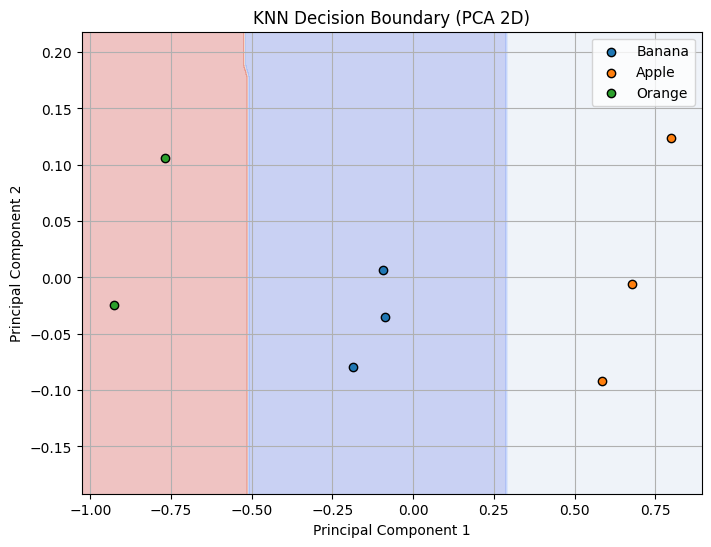

In [71]:
label_names = ['Banana', 'Apple', 'Orange']
plot_decision_boundary(knn_pca, X_pca, y, label_names)